<a href="https://colab.research.google.com/github/lauxpaux/HappinessResearch/blob/main/HappinessDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What makes a country happy? 

For this project, I will be using the World Happiness Report 2022 dataset collected from kaggle found [here](https://www.kaggle.com/datasets/mathurinache/world-happiness-report) to showcase determinants of happiness around the globe. 



### Assumptions before looking at the data


As a starting point, I'm going to list my biased assumptions prior to looking at the raw data by formulating a series of hypothesis to test. The reason for this being is to avoid as much as possible to manipulate the research to my assumptions rather than analyzing the data as well as to assess interesting discoveries that help me formulate my research problem better.

**Personal (biased) assumptions:**
1.   Economy is a strongest determinant of happiness
2.   Freedom is a close second determinant of happiness
3.Social support is a strong determinant of happiness



**Curiorisites before primal data investigation:**
1. Is there correlation between health and happiness? 
2. What is the correlation between health and government trust/corruption?  
4. What is the correlation between family/social support and life expectancy? 
5. What is the correlation between social support and economy? 
6. How does generosity affect health? 
8. What is the strongest determinants of happiness and the least? 

### Impressions after peeping at the data 👀






Listing assumptions after investigating the raw data, particularly the top 3 happiest nations and top 3 unhappiest nations.

1. It turns out, the top 3 nations do not have the highest GDP and the unhappiest nations do not have the lowest GDP.
2. The top nations report some of the highest satisfaction as far as freedom, the unhappiest nations report considerably lower satisfaction in freedom, with Afghanistan (the unhappiest) having the lowest scores.

3. The top happiest nations report some of the highest social support however the unhappiest nations do not report the lowest scores in social support.  What exactly does social support mean and is it worth investigating? 

At this point it is important to establish that I still do not have my research question as nothing in particular has sparked my concrete interest. One of the the most important parts of this exploration process is to pose a simple straightforward rewarding question that will derive focus and aid in selecting and producing a machine learning model. 

### Finally let's begin! 

In [1]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pylab as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Happiness Dataset/2022.csv')
#looking into the top 5 happinest nations
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [3]:
#looking at the 5 unhappiest nations 
df.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()
print()
print('Shape:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [5]:
df.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,147.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,74.000000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.579338,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.500000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,74.000000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,110.500000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,147.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [6]:
df.nunique(axis=0)

RANK                                          147
Country                                       147
Happiness score                               141
Whisker-high                                  144
Whisker-low                                   141
Dystopia (1.83) + residual                    138
Explained by: GDP per capita                  141
Explained by: Social support                  133
Explained by: Healthy life expectancy         134
Explained by: Freedom to make life choices    128
Explained by: Generosity                      116
Explained by: Perceptions of corruption       116
dtype: int64

## Data Cleaning



Let's get rid of redundant columns. For our exploration, we don't need to know the numeric rank of each country, the whisker-high or whisker-low scores and 'Dystopia (1.83) + residual' is no use to me in this moment. 

In [7]:
df = (df.copy()
      .drop(['RANK', 'Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual'], axis=1)
      .dropna(axis=0)
      )
df

,Country,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
141,Botswana*,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda*,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


Our columns have longer names than we would like so let's rename them:

In [8]:
cleaned_df = df.rename(columns={'Country':'Country','Happiness score':'Happiness score', 'Explained by: GDP per capita':'GDP', 'Explained by: Social support':'Social support', 
                    'Explained by: Healthy life expectancy':'Life expectancy', 'Explained by: Freedom to make life choices':'Freedom to make life choices',
                    'Explained by: Generosity':'Generosity', 'Explained by: Perceptions of corruption':'Perceptions of corruption'})

In [9]:
country_names = {
    "Luxembourg*": "Luxembourg", 
    "Guatemala*": "Guatemala",
    "Kuwait*": "Kuwait",
    "Belarus*": "Belarus",
    "Turkmenistan*": "Turkmenistan",
    "North Cyprus*": "North Cyprus",
    "Libya*": "Libya",
    "Azerbaijan*": "Azerbaijan",
    "Gambia*": "Gambia",
    "Liberia*": "Liberia",
    "Niger*": "Niger",
    "Comoros*": "Comoros",
    "Palestinian Territories*": "Palestinian Territories",
    "Eswatini, Kingdom of*": "Eswatini, Kingdom of",
    "Madagascar*": "Madagascar",
    "Chad*": "Chad",
    "Yemen*": "Yemen",
    "Mauritania*": "Mauritania",
    "Lesotho*": "Lesotho",
    "Botswana*": "Botswana",
    "Rwanda*": "Rwanda",
    }

cleaned_df['Country'] = cleaned_df['Country'].replace(country_names)
cleaned_df

,Country,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...
141,Botswana,3.471,1.503,0.815,0.280,0.571,0.012,0.102
142,Rwanda,3.268,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034


Now we have a more straightforward dataframe without the long columns names which will help us visually as we change/plot values 

## Visualizing Data

Variable selection

We have some categorical and numeric values so we will use variable 'cols' to isolate numeric values from our dataframe 

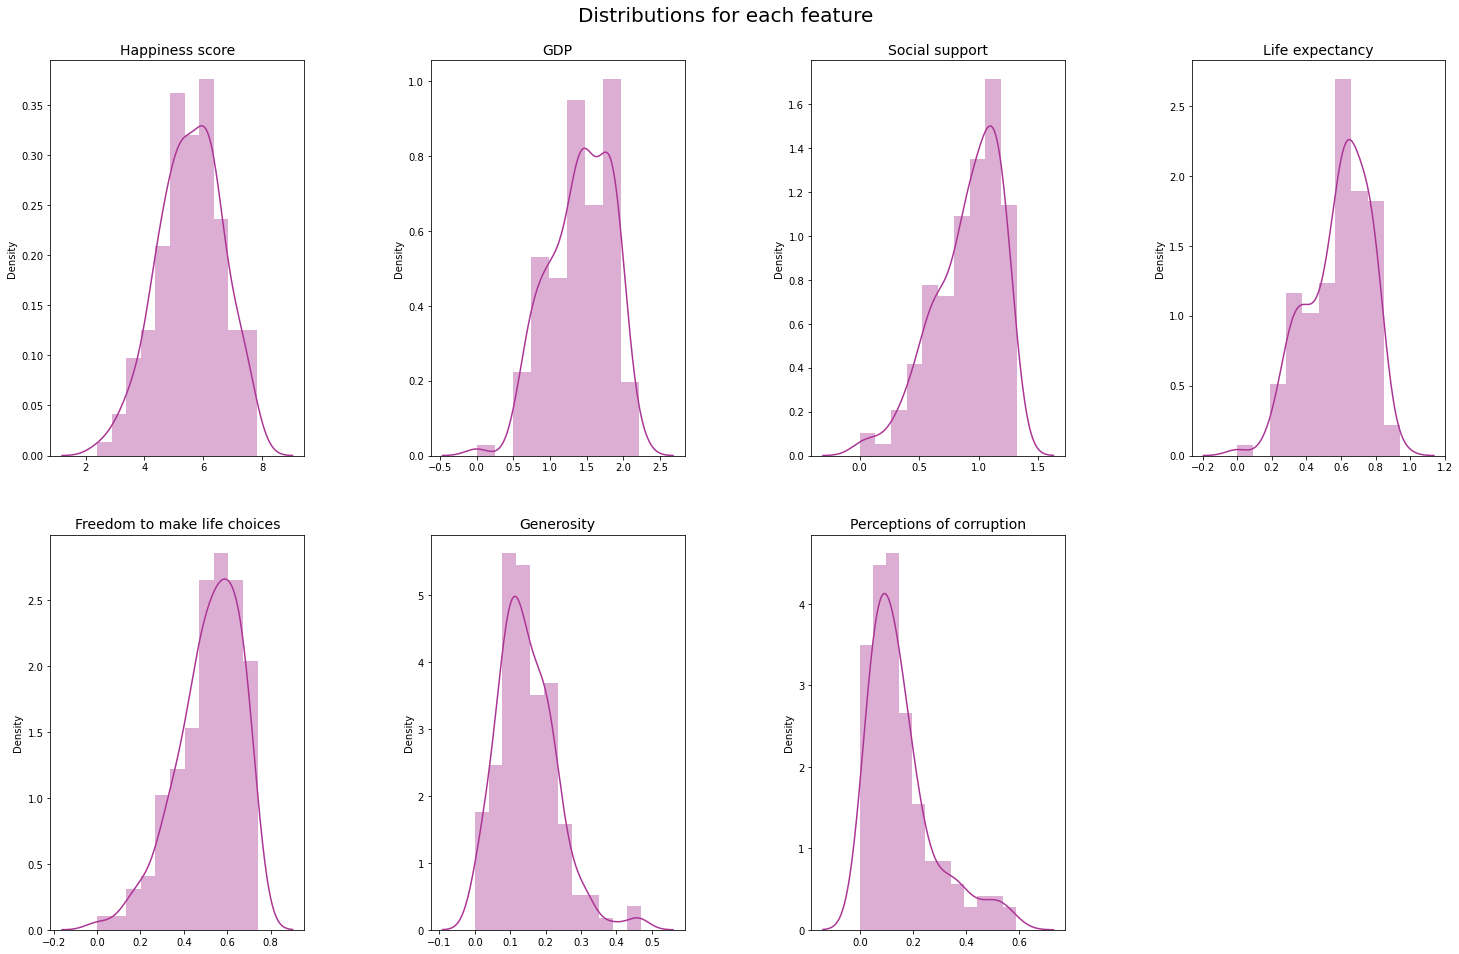

In [10]:
cols = ['Happiness score', 'GDP', 'Social support', 'Life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption' ]

plt.figure(figsize=(25, 15))
plt.suptitle('Distributions for each feature', fontsize=20)
plt.subplots_adjust(top=0.93, wspace=0.5)

for i in range(len(cols)):
  plt.subplot(2, 4, i+1)
  sns.distplot(x=cleaned_df[cols[i]], color='#AB3595')
  variable = cols[i]
  plt.title(variable, fontsize=14)
plt.show();


Standard deviations for each feature: 

In [11]:
for i in range(len(cols)):
  print(cols[i] + ': ' + '\n', cleaned_df[cols[i]].std(), '\n')

Happiness score: 
 1.086842607236694 

GDP: 
 0.4216631116608076 

Social support: 
 0.28012154086585683 

Life expectancy: 
 0.1763363306626657 

Freedom to make life choices: 
 0.14585873045154746 

Generosity: 
 0.08279872899332319 

Perceptions of corruption: 
 0.1275143531150681 



Describe the distributions

---



---



Exploring the correlation between all of the variables

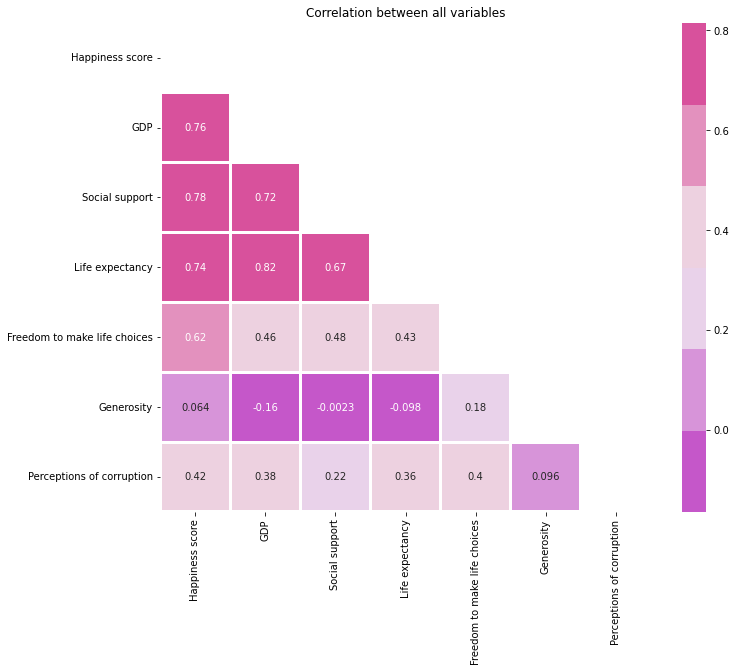

In [12]:
corr = cleaned_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(306, 340, 67, 55, n=6),
            mask=mask, cbar=True, linecolor='white',  linewidths=2).set(title="Correlation between all variables");

The heatmap aboved demonstrates that the strongest correlations with happiness scores are social support, GDP per capita, and healthy life expectancy. Furthermore, GDP per capita is strongly correlated with social support, along with healthy life expectancy, the strongest relationship across all variables. Based on my general understanding, these findings aren't surprising but they are helping me come closer to my reserach question!

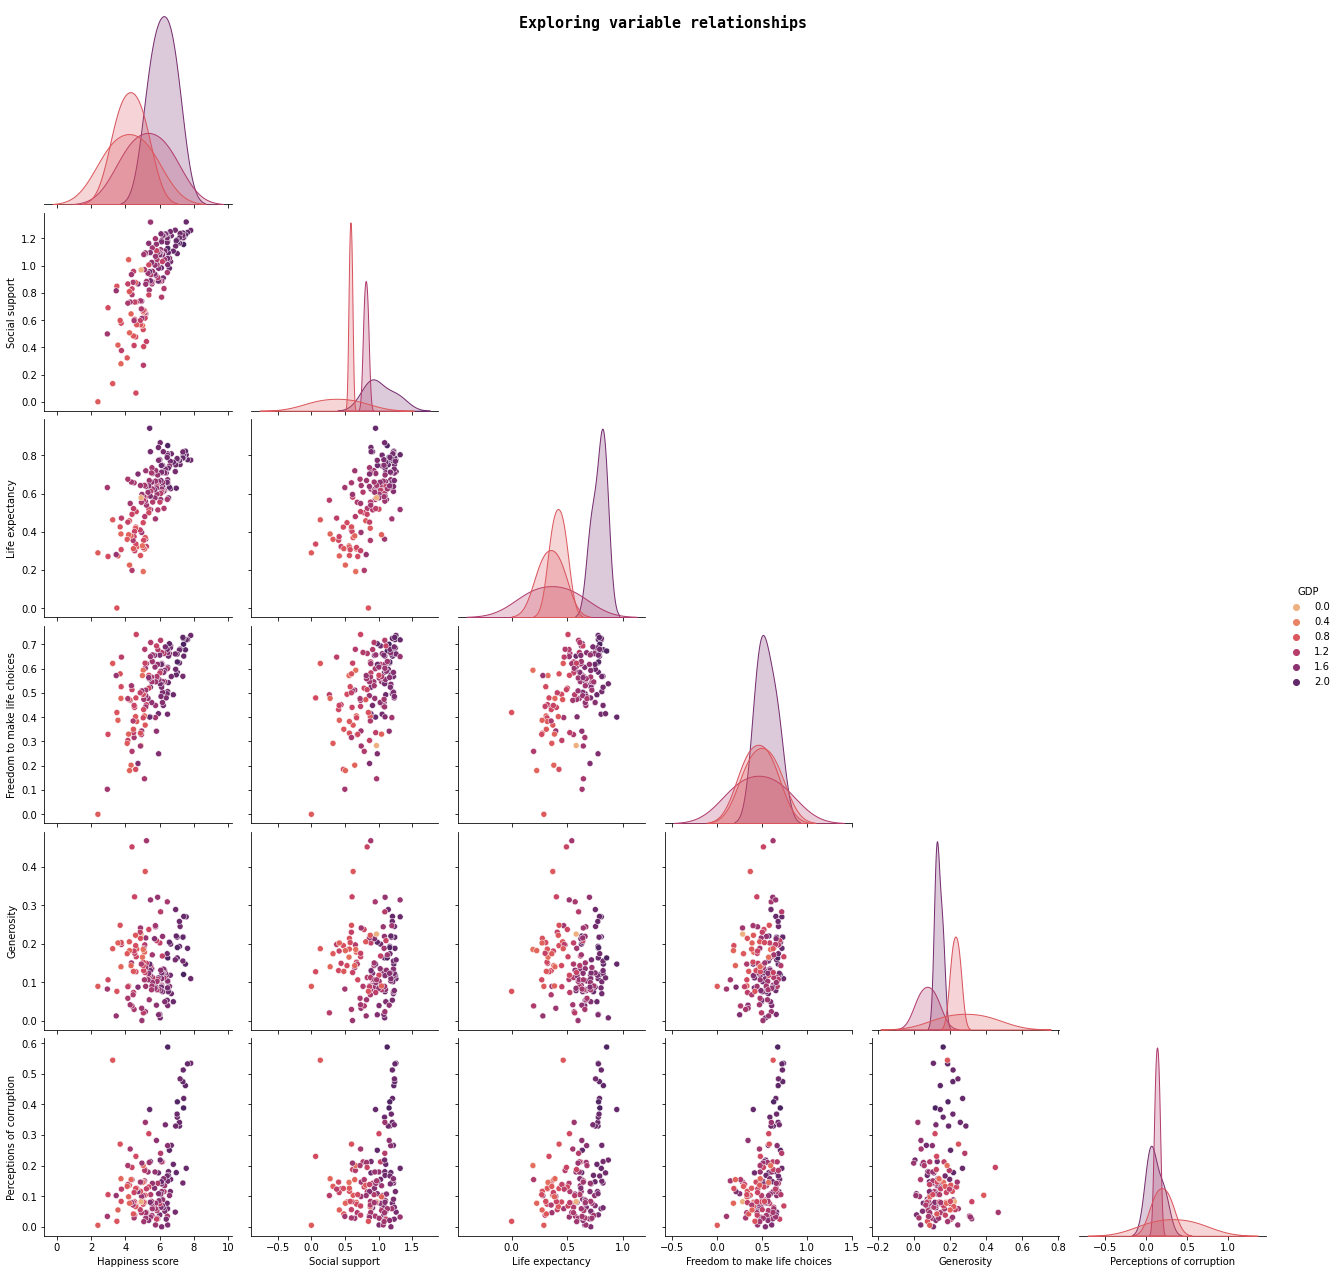

In [13]:
pplot = sns.pairplot(cleaned_df, hue='GDP', height=3, palette="flare", corner=True)
pplot.fig.suptitle('Exploring variable relationships', fontfamily='monospace', fontsize= '15', fontweight= 'bold');

## Let's visualize the happiness spectrum

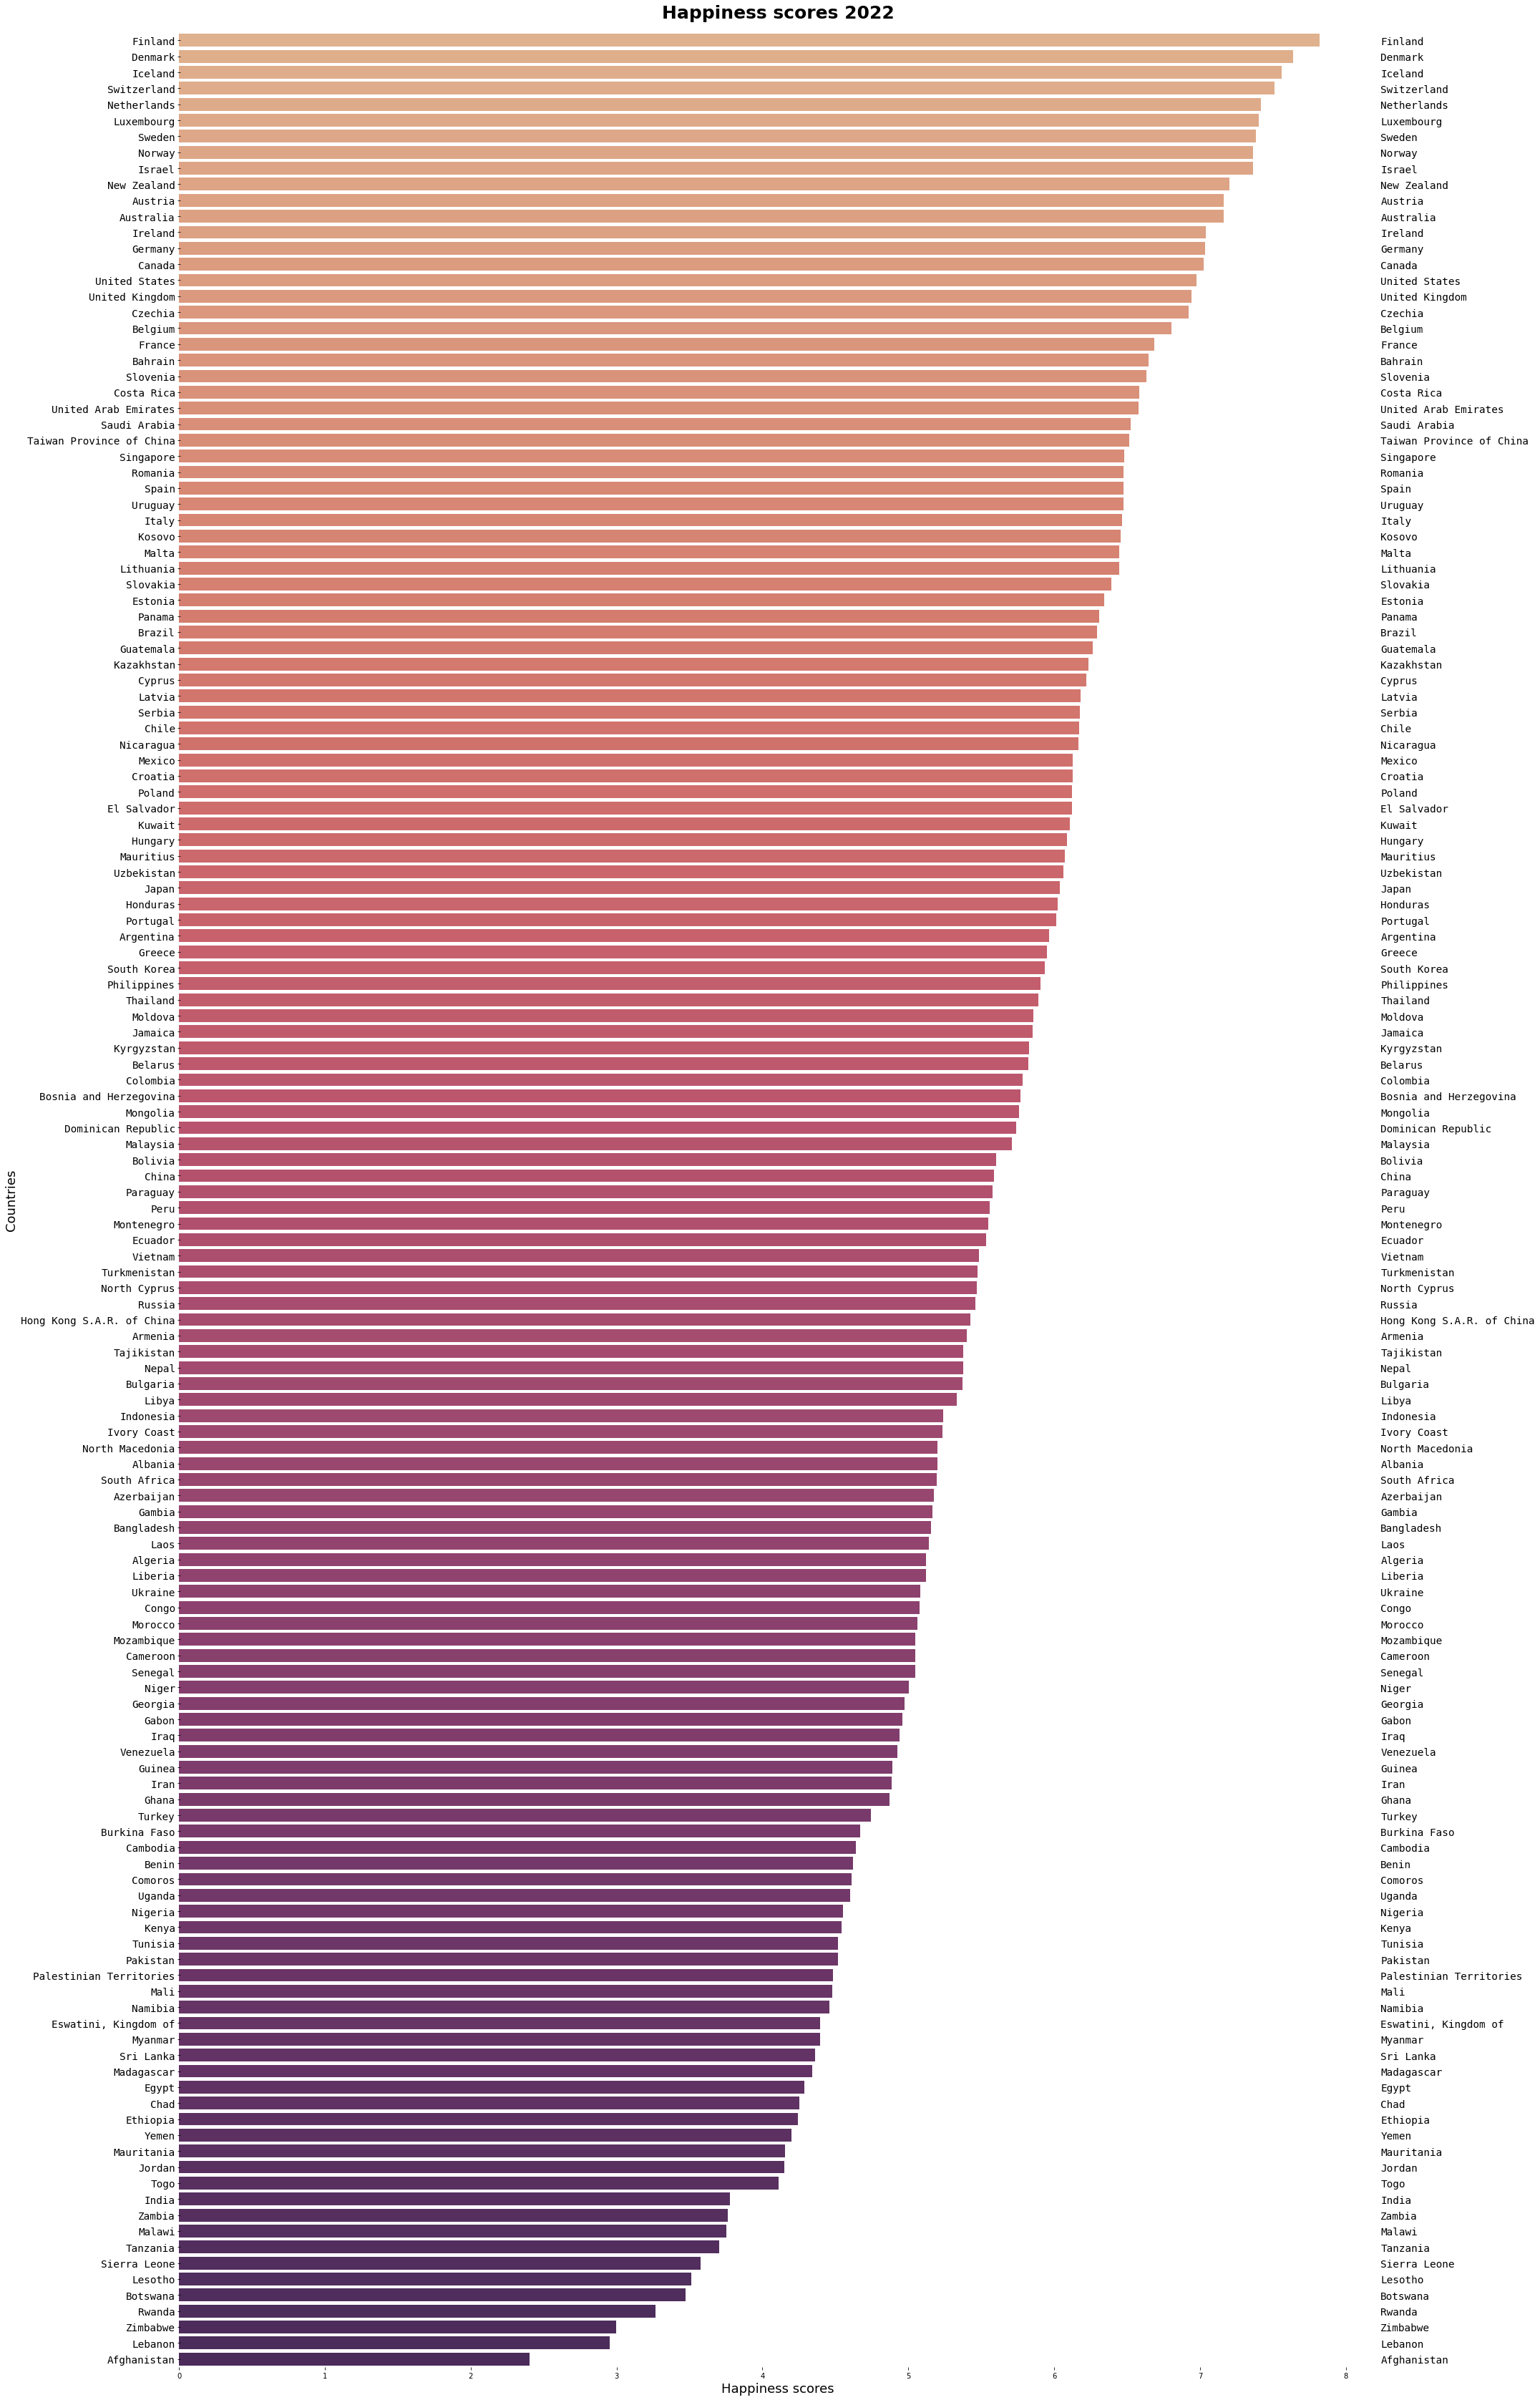

In [14]:
#setting plot styles
bodyFont = {
    'fontfamily': 'monospace',
    'fontsize': '22',
    'fontweight': 'demi',
    'picker': True
}

titleFont = {
    'fontfamily': 'sans-serif',
    'fontsize': '25',
    'fontweight': 'bold',
    'picker': True
}


fig = plt.figure(figsize=(30, 60))
sns.barplot(data=cleaned_df, x='Happiness score', y='Country', palette="flare")


#checking that the axes is correct to customize visuals with matplotlib
ax = plt.gca()
#print(id(ax) == id(plt.gca()))

#axes customization
ax.set_title('Happiness scores 2022', fontdict=titleFont, pad=20)
ax.set_xlabel('Happiness scores', fontdict={'fontsize': '18'})
ax.set_ylabel('Countries', fontdict={'fontsize': '18'})
ax.tick_params(axis='y', direction='inout', labelsize='x-large', labelright=True)
ax.set_yticklabels(labels=cleaned_df['Country'], fontdict={'fontfamily': 'monospace'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

Classifying continents 

In [15]:
continents = pd.read_csv(r'/content/drive/MyDrive/Happiness Dataset/world-happiness-report-2021.csv')
continents_feature = ct = {k:v for k,v in zip(continents["Country name"],continents["Regional indicator"])}


In [16]:
cleaned_df["Continents"] = cleaned_df["Country"].map(continents_feature)
cleaned_df.isnull().sum()

Country                         0
Happiness score                 0
GDP                             0
Social support                  0
Life expectancy                 0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Continents                      3
dtype: int64

In [17]:
cts_renamed = {
    "Sub-Saharan Africa":"Africa",
    "Western Europe":"Europe",
    "Latin America and Caribbean":"South America",
    "Middle East and North Africa":"Africa",
    "Central and Eastern Europe":"Europe",
    "Commonwealth of Independent States":"Asia",
    "Southeast Asia":"Asia",
    "South Asia":"Asia",
    "East Asia":"Asia",
    "North America and ANZ":"North America"
    }
cleaned_df["Continents"] = cleaned_df["Continents"].replace(cts_renamed)

In [18]:
cleaned_df.describe()

,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.553575,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,1.086843,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.888750,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,5.568500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,6.305000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,7.821000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


In [19]:
cleaned_df.head()

,Country,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,Europe
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,Europe
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191,Europe
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,Europe
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419,Europe


In [20]:
NorthAmerica = cleaned_df.loc[cleaned_df['Continents'] == 'North America']
SouthAmerica = cleaned_df.loc[cleaned_df['Continents'] == 'South America']
Asia = cleaned_df.loc[cleaned_df['Continents'] == 'Asia']
Africa = cleaned_df.loc[cleaned_df['Continents'] == 'Africa']
Europe = cleaned_df.loc[cleaned_df['Continents'] == 'Europe']

 
 '#F17F35' = Orange
 '#E0288A' = Pink
 '#AB3595' = Orange

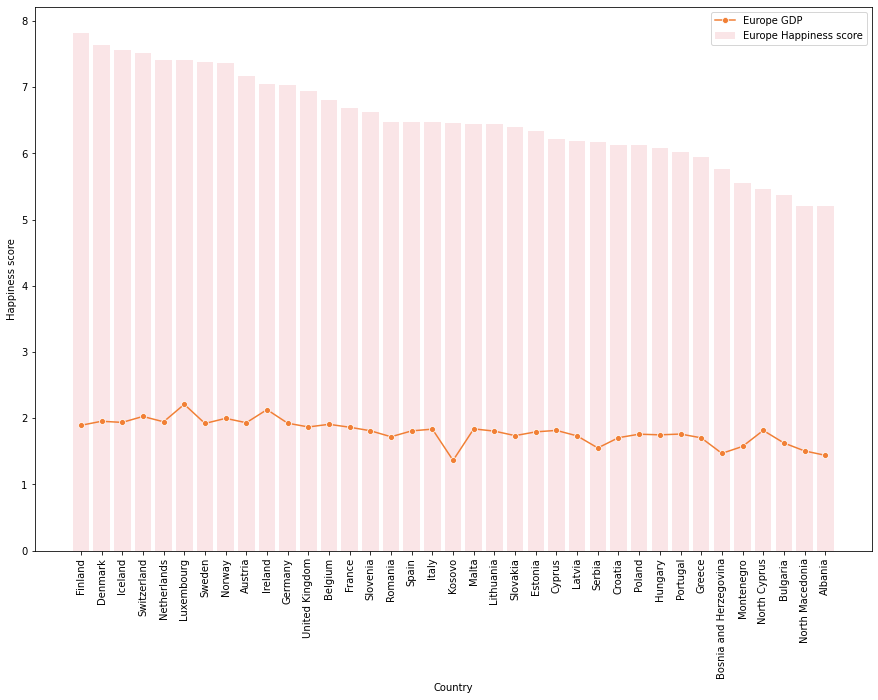

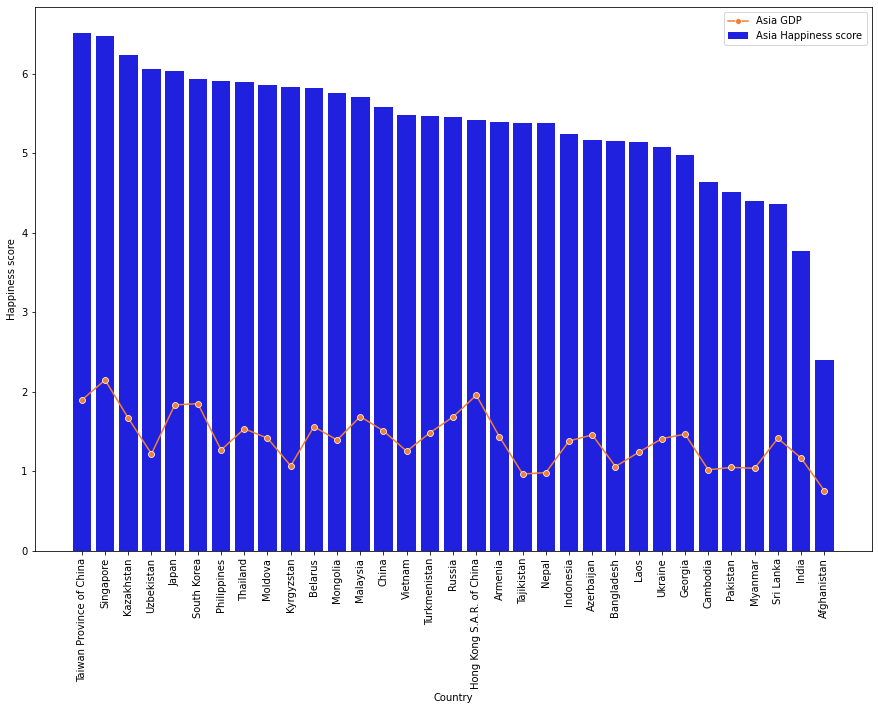

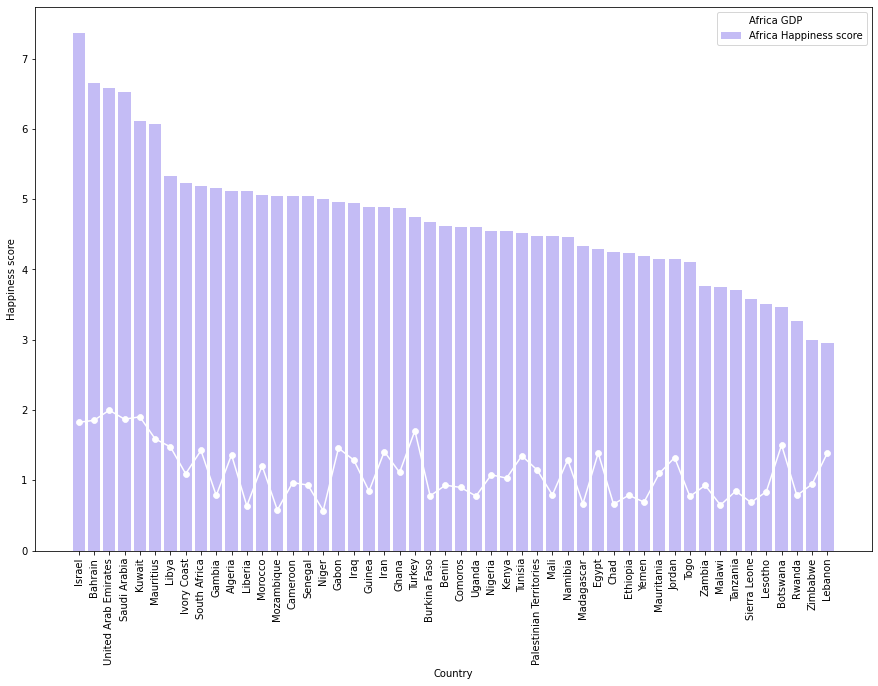

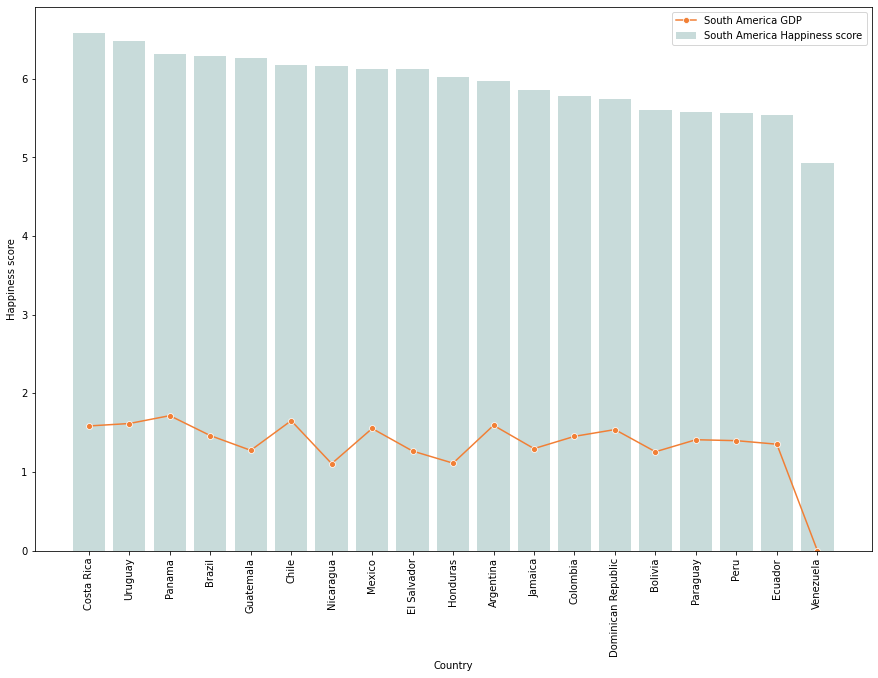

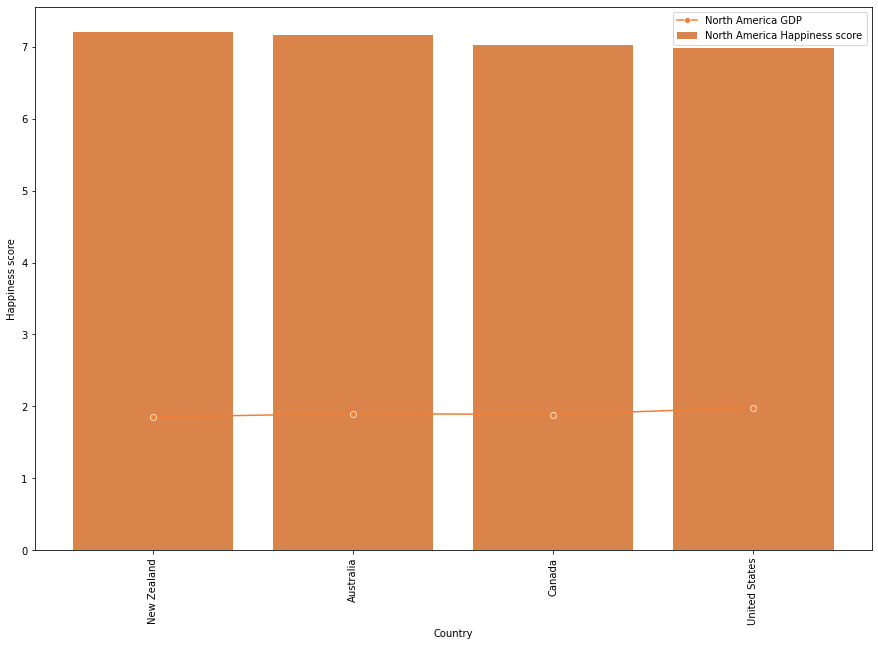

In [88]:
#Europe
plt.figure(figsize = (15, 10))
plt.xticks(rotation = (90))
sns.barplot(data=Europe, x='Country', y='Happiness score', label='Europe Happiness score', color='#FDE2E4')
sns.lineplot(data=Europe, x='Country', y='GDP', marker='o', label='Europe GDP', color='#F17F35');

#Asia
plt.figure(figsize = (15, 10))
plt.xticks(rotation = (90))
sns.barplot(data=Asia, x='Country', y='Happiness score', label='Asia Happiness score', color='b')
sns.lineplot(data=Asia, x='Country', y='GDP', marker='o', label='Asia GDP', color='#F17F35');

#Africa
plt.figure(figsize = (15, 10))
plt.xticks(rotation = (90))
sns.barplot(data=Africa, x='Country', y='Happiness score', label='Africa Happiness score', color='#BDB2FF')
sns.lineplot(data=Africa, x='Country', y='GDP', marker='o', label='Africa GDP', color='w');

#South America 
plt.figure(figsize = (15, 10))
plt.xticks(rotation = (90))
sns.barplot(data=SouthAmerica, x='Country', y='Happiness score', label='South America Happiness score', color='#C5DEDD')
sns.lineplot(data=SouthAmerica, x='Country', y='GDP', marker='o', label='South America GDP', color='#F17F35');

#North America 
plt.figure(figsize = (15, 10))
plt.xticks(rotation = (90))
sns.barplot(data=NorthAmerica, x='Country', y='Happiness score', label='North America Happiness score', color='#F17F35')
sns.lineplot(data=NorthAmerica, x='Country', y='GDP', marker='o', label='North America GDP', color='#F17F35');




Especifically, I want to know which countries are outliers for corruption.

## Which countries are most corrupt and what is the correlation between happpiness score and corruption?

In [24]:
from scipy.stats import chi2
from matplotlib import patches

Mahalanobis distance

Establishing covariance between 'Happiness score' and 'Perceptions of corruption' features

In [25]:
cov_df = cleaned_df[['Happiness score', 'Perceptions of corruption']]
cov_df = cov_df.to_numpy()


#calculating covariance matrix
covariance = np.cov(cov_df, rowvar=False)

#calculating covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

#Center point
centerpoint = np.mean(cov_df, axis=0)
print('centerpoint', centerpoint)

centerpoint [5.55357534 0.15478082]


In [26]:
distances = []

for i, val in enumerate(cov_df):
  p1 = val
  p2 = centerpoint
  distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
  distances.append(distance)



distances = np.array(distances)

cutoff = chi2.ppf(0.95, cov_df.shape[1])

outlierIndexes = np.where(distances > cutoff )

print('--- Index of Outliers ---')
print(outlierIndexes)

print('--- Obversations found as outliers ---')
print(cov_df[distances > cutoff , :])

--- Index of Outliers ---
(array([  0,   1,   3,   6,   7,   9,  26, 138, 142, 145]),)
--- Obversations found as outliers ---
[[7.821e+00 5.340e-01]
 [7.636e+00 5.320e-01]
 [7.512e+00 4.610e-01]
 [7.384e+00 5.120e-01]
 [7.365e+00 4.740e-01]
 [7.200e+00 4.830e-01]
 [6.480e+00 5.870e-01]
 [3.702e+00 2.700e-01]
 [3.268e+00 5.440e-01]
 [2.404e+00 5.000e-03]]


In [27]:
print('Outliers for correlation between Happiness score and perceptions of corruption:')
print()
for i in outlierIndexes:
  print(cleaned_df['Country'][i])

Outliers for correlation between Happiness score and perceptions of corruption:

0          Finland
1          Denmark
3      Switzerland
6           Sweden
7           Norway
9      New Zealand
26       Singapore
138       Tanzania
142         Rwanda
145    Afghanistan
Name: Country, dtype: object


In [28]:
print('The identified outliers for happiness score and perceptions of corruption correlation:')
corruption_df = cleaned_df.loc[outlierIndexes]
corruption_df

The identified outliers for happiness score and perceptions of corruption correlation:


,Country,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,Europe
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,Europe
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,Europe
6,Sweden,7.384,1.920,1.204,0.803,0.724,0.218,0.512,Europe
7,Norway,7.365,1.997,1.239,0.786,0.728,0.217,0.474,Europe
9,New Zealand,7.200,1.852,1.235,0.752,0.680,0.245,0.483,North America
26,Singapore,6.480,2.149,1.127,0.851,0.672,0.163,0.587,Asia
138,Tanzania,3.702,0.848,0.597,0.425,0.578,0.248,0.270,Africa
142,Rwanda,3.268,0.785,0.133,0.462,0.621,0.187,0.544,Africa
145,Afghanistan,2.404,0.758,0.000,0.289,0.000,0.089,0.005,Asia


From this we can see that for some reason, over 50% of the happiest nations in the world report high levels of corruption while some of the unhappiest nations in the world, Afghanistan and Tanzania report having some of the lowest perception of corruption.

Identifying the general top ten countries that perceived to have the lowest corruption rates:

In [29]:
cleaned_df.nsmallest(10, 'Perceptions of corruption', 'all')

,Country,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
46,Croatia,6.125,1.705,1.183,0.709,0.535,0.109,0.000,Europe
145,Afghanistan,2.404,0.758,0.000,0.289,0.000,0.089,0.005,Asia
27,Romania,6.477,1.719,1.006,0.655,0.605,0.039,0.006,Europe
66,Bosnia and Herzegovina,5.768,1.468,1.068,0.665,0.448,0.244,0.006,Europe
97,Ukraine,5.084,1.411,1.081,0.583,0.473,0.188,0.017,Asia
140,Lesotho,3.512,0.839,0.848,0.000,0.419,0.076,0.018,Africa
84,Bulgaria,5.371,1.625,1.163,0.640,0.563,0.123,0.021,Europe
34,Slovakia,6.391,1.736,1.232,0.707,0.479,0.118,0.025,Europe
63,Kyrgyzstan,5.828,1.069,1.109,0.638,0.693,0.208,0.025,Asia
60,Thailand,5.891,1.535,1.096,0.697,0.617,0.321,0.026,Asia


Identifying the countries that perceived to have the highest corruption rates:

In [30]:
cleaned_df.nlargest(10, 'Perceptions of corruption', 'all')

,Country,Happiness score,GDP,Social support,Life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continents
26,Singapore,6.480,2.149,1.127,0.851,0.672,0.163,0.587,Asia
142,Rwanda,3.268,0.785,0.133,0.462,0.621,0.187,0.544,Africa
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,Europe
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,Europe
6,Sweden,7.384,1.920,1.204,0.803,0.724,0.218,0.512,Europe
9,New Zealand,7.200,1.852,1.235,0.752,0.680,0.245,0.483,North America
7,Norway,7.365,1.997,1.239,0.786,0.728,0.217,0.474,Europe
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,Europe
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419,Europe
12,Ireland,7.041,2.129,1.166,0.779,0.627,0.190,0.408,Europe


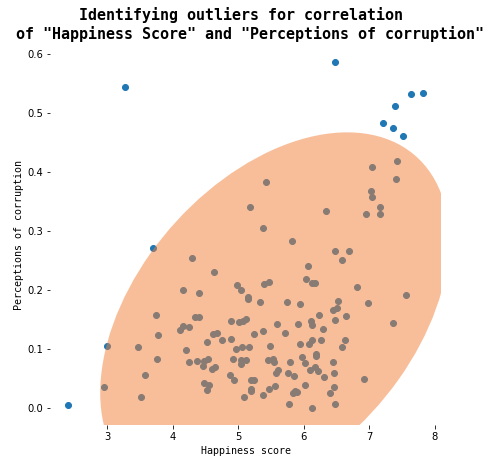

In [31]:
#Finding ellipse dimensions
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                          width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2, 
                          angle=np.rad2deg(np.arccos(v[0,0])), edgecolor='#E0288A', fill=True, linewidth=0)
ellipse.set_facecolor('#F17F35')
ellipse.set_alpha(0.5)
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot()
ax.add_artist(ellipse)
ax.set_xlabel('Happiness score', fontdict={'fontfamily': 'monospace'})
ax.set_ylabel('Perceptions of corruption', fontdict={'fontfamily': 'monospace'})
ax.set_title('Identifying outliers for correlation \n of "Happiness Score" and "Perceptions of corruption"', fontdict={'fontfamily': 'monospace',
                                                                                                                       'fontsize': '15', 
                                                                                                                       'fontweight': 'bold'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.scatter(cov_df[: , 0], cov_df[ : , 1])
plt.show()

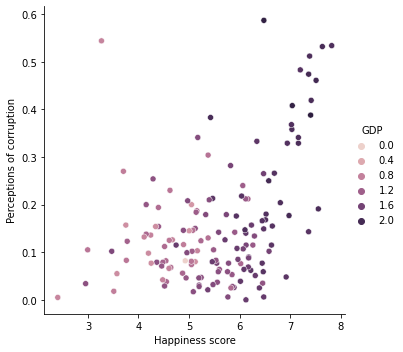

In [32]:
sns.relplot(data=cleaned_df, x=cleaned_df['Happiness score'], y=cleaned_df['Perceptions of corruption'], hue=cleaned_df['GDP'].loc[:])

Box plot to visualize the highest and lowest values for each column

Who has the highest values for perceptions of corruption?

In [33]:
corruption_df = cleaned_df[['Country', 'Perceptions of corruption', 'GDP', 'Happiness score']]
corruption_df

,Country,Perceptions of corruption,GDP,Happiness score
0,Finland,0.534,1.892,7.821
1,Denmark,0.532,1.953,7.636
2,Iceland,0.191,1.936,7.557
3,Switzerland,0.461,2.026,7.512
4,Netherlands,0.419,1.945,7.415
...,...,...,...,...
141,Botswana,0.102,1.503,3.471
142,Rwanda,0.544,0.785,3.268
143,Zimbabwe,0.105,0.947,2.995
144,Lebanon,0.034,1.392,2.955


To do:
Line graph depicting relationships 
Load other data to study happiness over the years 
Correlation types (spearman, pearson, kendall)

boxed plot 


Ideas:
1) Set continent and examine happiness across continets
4) Which country has been on a positive trajectory over the past five years
5) Which country is on the decline in terms of positivity
7) Is corruption increasing in the world?
8) Is generosity?

# Can a simple linear model predict 'Happiness score' and 'GDP'? 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = cleaned_df['Happiness score']
y = cleaned_df['GDP']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=100)

In [37]:
X_train
print(y_train)

132    1.100
99     1.208
142    0.785
90     1.425
82     0.966
       ...  
87     1.094
103    0.570
67     1.393
24     1.870
8      1.826
Name: GDP, Length: 116, dtype: float64


In [38]:
import statsmodels.api as sm

#adding a constant to get an interception
X_train_sm = sm.add_constant(X_train)

In [39]:
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const             -0.289712
Happiness score    0.303432
dtype: float64

In [40]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     155.8
Date:                Fri, 16 Dec 2022   Prob (F-statistic):           4.64e-23
Time:                        00:10:09   Log-Likelihood:                -16.907
No. Observations:                 116   AIC:                             37.81
Df Residuals:                     114   BIC:                             43.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2897      0.138     -2.098      0.038      -0.563      -0.016
Happiness score     0.3034      0.024     12.480      0.000       0.255       0.352
==============================================================================
Omnibus:                       18.632   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.567
Skew:                          -0.628   Prob(JB):                     4.22e-09
Kurtosis:                       5.530   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

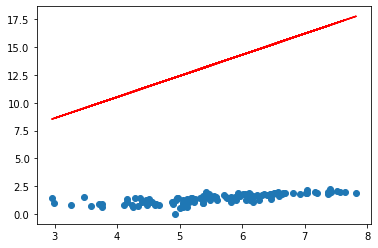

In [41]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 2.9078 + 1.9029 * X_train, 'r')
plt.show()

In [42]:
#Error = Actual y value - predicted y value
#Using training data to predict y value
y_train_pred = lr.predict(X_train_sm)

#Creating residuals
res = (y_train - y_train_pred)

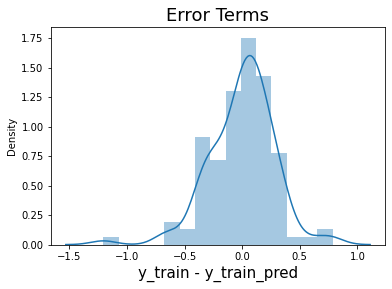

In [43]:
#Looking at distribution of residuals
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=18)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

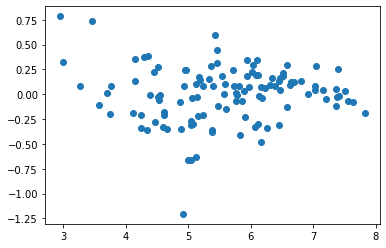

In [44]:
plt.scatter(X_train, res)
plt.show()

In [45]:
#adding constant to x_train
X_test_sm = sm.add_constant(X_test)

#predicting y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

#Printing the first 15 predicted values
y_test_pred

75     1.389179
28     1.675316
41     1.585500
46     1.568811
40     1.597940
131    0.983794
51     1.552426
121    1.070575
11     1.883470
113    1.118214
32     1.666516
26     1.676529
54     1.537557
15     1.827335
109    1.193465
145    0.439740
77     1.371277
29     1.674709
37     1.619788
111    1.149771
89     1.287833
88     1.287833
16     1.817019
135    0.856352
97     1.252938
62     1.485367
124    1.044177
73     1.397068
140    0.775942
92     1.277213
dtype: float64

In [46]:
#importing r2_square
from sklearn.metrics import r2_score

#checking the R-square value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.5991509770059811

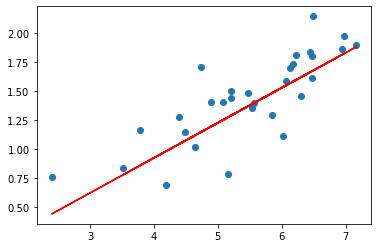

In [47]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Our model was 59% accurate when predicting happiness score:: based on GDP
gEuRPDh8bCFwQGKcaO9QhEcTFKnvfivIBoRV+cKsKUtrjpoKsEJneFGKX3PwYZV88Pg9OSAU/nirOi4pVxIkXZnDHRSniwVeBcMAGgYAJpFBSQA7IAMKWvvo++KZoCQZcIAFpQADslZqhHgnyFhF8xoBC8CdEApA73C9A3ioA+VD/ZVireNqDVHlrvrxHJngCcTYIA1nwXSrvJRr2Fg8eQ43wH965UHgw3iwosvZ/rx/SftOwoCZcqZEOeWSqD1kSg4iBxFBiMNEG18d9cW88HD79oTjhHrjn0Di+2ROeENoIDwkdhE7C7WnChZIfohwPOiF/sDIXKd/nAreEnK54AO4D2SEzzsD1gT3uAv2wcD/o2RVq2cq4ZVlh/sD9txF89zWUdhRHCkoZQfGnWP/YU81WzXWYRZbr7/OjiDVlON/s4ZYf/bO/yz4f1mE/WmJLsUPYeew0dhE7htUDJnYSa8CuYMdleHh2PZbPriFv0fJ4MiGP8B/+hr6sLJO5jjWOvY6fFW15ggLZHg3YOeKZEmFaeh6TBf8IAiZHxHMYxXRydHICQPZ/UWxfrxny/wbCuPRNtwiucR/R4ODgsW+6sI8AHDaBy7/zm86qHW4TcJ++sJonleQrdLjsQYC7hDpcaXrACJgBazgeJ+AGvIE/CALjQCSIBYlgKow+Hc5zCZgBZoMFoAiUgFVgPSgHW8B2sBvsAwdBPTgGToNz4DJoBR3gLpw93eA56AdvwScEQUgIDaEjeogxYoHYIU6IB+KLBCHhSDSSiCQjaYgIkSKzkUVICbIGKUe2IdXIr8hR5DRyEWlDbiNdSC/yCvmIYqgqqo0aopboaNQDZaFhaCw6BU1Dp6OF6GJ0BVqGVqF70Tr0NHoZ7UA70efoAAYwFYyBmWD2mAfGxiKxJCwVk2BzsWKsFKvCarFG+J2vYZ1YH/YBJ+J0nInbwxkcisfhPHw6Phdfjpfju/E6vBm/hnfh/fhXAo1gQLAjeBE4hImENMIMQhGhlLCTcIRwFq6lbsJbIpHIIFoR3eFaTCRmEGcRlxM3EfcTTxHbiI+IAyQSSY9kR/IhRZK4pDxSEWkjaS/pJKmd1E16T1YhG5OdyMHkJLKIvJBcSt5DPkFuJz8lf6JoUCwoXpRICp8yk7KSsoPSSLlK6aZ8ompSrag+1FhqBnUBtYxaSz1LvUd9raKiYqriqTJBRagyX6VM5YDKBZUulQ+qWqq2qmzVyapS1RWqu1RPqd5WfU2j0Sxp/rQkWh5tBa2adob2gPZeja7moMZR46vNU6tQq1NrV3uhTlG3UGepT1UvVC9VP6R+Vb1Pg6JhqcHW4GrM1ajQOKpxU2NAk645RjNSM1tzueYezYuaPVokLUutIC2+1mKt7VpntB7RMboZnU3n0RfRd9DP0ru1idpW2hztDO0S7X3aLdr9Olo6LjrxOgU6FTrHdToZGMOSwWFkMVYyDjJuMD6OMBzBGiEYsWxE7Yj2Ee90R+r66wp0i3X363boftRj6gXpZeqt1qvXu6+P69vqT9Cfob9Z/6x+30jtkd4jeSOLRx4ceccANbA1iDaYZbDd4IrBgKGRYYih2HCj4RnDPiOGkb9RhtE6oxNGvcZ0Y19jofE645PGz5g6TBYzi1nGbGb2mxiYhJpITbaZtJh8MrUyjTNdaLrf9L4Z1czDLNVsnVmTWb+5sfl489nmNeZ3LCgWHhbpFhsszlu8s7SyTLBcYllv2WOla8WxKrSqsbpnTbP2s55uXWV93YZo42GTabPJptUWtXW1TbetsL1qh9q52QntNtm1jSKM8hwlGlU16qa9qj3LPt++xr7LgeEQ7rDQod7hxWjz0UmjV48+P/qro6tjluMOx7tjtMaMG7NwTOOYV062TjynCqfrzjTnYOd5zg3OL13sXAQum11uudJdx7sucW1y/eLm7iZxq3XrdTd3T3avdL/poe0R5bHc44InwTPAc57nMc8PXm5eeV4Hvf7ytvfO9N7j3TPWaqxg7I6xj3xMfbg+23w6fZm+yb5bfTv9TPy4flV+D/3N/Pn+O/2fsmxYGay9rBcBjgGSgCMB79he7DnsU4FYYEhgcWBLkFZQXFB50INg0+C04Jrg/hDXkFkhp0IJoWGhq0Nvcgw5PE41p3+c+7g545rDVMNiwsrDHobbhkvCG8ej48eNXzv+XoRFhCiiPhJEciLXRt6PsoqaHvXbBOKEqAkVE55Ej4meHX0+hh4zLWZPzNvYgNiVsXfjrOOkcU3x6vGT46vj3yUEJqxJ6Jw4euKciZcT9ROFiQ1JpKT4pJ1JA5OCJq2f1D3ZdXLR5BtTrKYUTLk4VX9q1tTj09SncacdSiYkJyTvSf7MjeRWcQdSOCmVKf08Nm8D7znfn7+O3yvwEawRPE31SV2T2pPmk7Y2rTfdL700vU/IFpYLX2aEZmzJeJcZmbkrczArIWt/Njk7OfuoSEuUKWrOMcopyGkT24mLxJ3Tvaavn94vCZPszEVyp+Q25GnDg/wVqbX0J2lXvm9+Rf77GfEzDhVoFogKrsy0nbls5tPC4MJfZuGzeLOaZpvMXjC7aw5rzra5yNyUuU3zzOYtntc9P2T+7gXUBZkLfl/ouHDNwjeLEhY1LjZcPH/xo59CfqopUiuSFN1c4r1ky1J8qXBpyzLnZRuXfS3mF18qcSwpLfm8nLf80s9jfi77eXBF6oqWlW4rN68irhKturHab/XuNZprCtc8Wjt+bd065rridW/WT1t/sdSldMsG6gbphs6y8LKGjeYbV238XJ5e3lERULG/0qByWeW7TfxN7Zv9N9duMdxSsuXjVuHWW9tCttVVWVaVbiduz9/+ZEf8jvO/ePxSvVN/Z8nOL7tEuzp3R+9urnavrt5jsGdlDVojrendO3lv677AfQ219rXb9jP2lxwAB6QHnv2a/OuNg2EHmw55HKo9bHG48gj9SHEdUjezrr8+vb6zIbGh7ei4o02N3o1HfnP4bdcxk2MVx3WOrzxBPbH4xODJwpMDp8Sn+k6nnX7UNK3p7pmJZ643T2huORt29sK54HNnzrPOn7zgc+HYRa+LRy95XKq/7Ha57orrlSO/u/5+pMWtpe6q+9WGVs/WxraxbSfa/dpPXwu8du465/rljoiOthtxN27dnHyz8xb/Vs/trNsv7+Tf+XR3/j3CveL7GvdLHxg8qPrD5o/9nW6dx7sCu648jHl49xHv0fPHuY8/dy9+QntS+tT4aXWPU8+x3uDe1meTnnU/Fz//1Ff0p+aflS+sXxz+y/+vK/0T+7tfSl4Ovlr+Wu/1rjcub5oGogYevM1+++ld8Xu997s/eHw4/zHh49NPMz6TPpd9sfnS+DXs673B7MFBMVfClR8FMChoaioAr3YBQEsEgA7vZ9RJivufvCCKO6scgf+EFXdEeXEDoBZWsmM8+xQAB6BYzofcUGRH+Fh/gDo7D8vQXU1+r5QVIrwHbPWRoQ5d/nzwQ1HcOb+L+8cayFhdwI/1vwAJY3sD7LokOwAAAIplWElmTU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAIdpAAQAAAABAAAATgAAAAAAAACQAAAAAQAAAJAAAAABAAOShgAHAAAAEgAAAHigAgAEAAAAAQAABaKgAwAEAAAAAQAAA8YAAAAAQVNDSUkAAABTY3JlZW5zaG90AjwtbgAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAddpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDYuMC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAgeG1sbnM6ZXhpZj0iaHR0cDovL25zLmFkb2JlLmNvbS9leGlmLzEuMC8iPgogICAgICAgICA8ZXhpZjpQaXhlbFlEaW1lbnNpb24+OTY2PC9leGlmOlBpeGVsWURpbWVuc2lvbj4KICAgICAgICAgPGV4aWY6UGl4ZWxYRGltZW5zaW9uPjE0NDI8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpVc2VyQ29tbWVudD5TY3JlZW5zaG90PC9leGlmOlVzZXJDb21tZW50PgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4Ki+5ZmQAAABxpRE9UAAAAAgAAAAAAAAHjAAAAKAAAAeMAAAHjAAEcQw6dWWwAAEAASURBVHgB7J0HfBRFG8bfAIEQSui9d6QpgjTpRQQEQUApIkhXijRBUbEgIoh+FCkCghQp0qV3BASkCNKblNB7CzXl22fOOfY2l+SSXMIdPOOP7O60nf3P7sQ88847PmFGEAYSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESiCMCPhSi44gsqyUBEiABEiABEiABEiABEiABEiABEiABEiABEiABElAEKETzRSABEiABEiABEiABEiABEiABEiABEiABEiABEiABEohTAhSi4xQvKycBEiABEiABEiABEiABEiABEiABEiABEiABEiABEqAQzXeABEiABEiABEiABEiABEiABEiABEiABEiABEiABEggTglQiI5TvKycBEiABEiABEiABEiABEiABEiABEiABEiABEiABEiAQjTfARIgARIgARIgARIgARIgARIgARIgARIgARIgARIggTglQCE6TvGychIgARIgARIgARIgARIgARIgARIgARIgARIgARIgAQrRfAdIgARIgARIgARIgARIgARIgARIgARIgARIgARIgATilACF6DjFy8pJgARIgARIgARIgARIgARIgARIgARIgARIgARIgAQoRPMdIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESiFMCsRai79+/H6cNZOUkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQALeTYBCtHf3H1tPAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAh5PgEK0x3cRG0gCJEACJEACJEACJEACJEACJEACJEACJEACJEAC3k2AQrR39x9bTwIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIeT4BCtMd3ERtIAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAt5NgEK0d/cfW08CJEACJEACJEACJEACJEACJEACJEACJEACJEACHk+AQrTHdxEbSAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQALeTYBCtHf3H1tPAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAh5PgEK0x3cRG0gCJEACJEACJEACJEACJEACJEACJEACJEACJEAC3k2AQrR39x9bTwIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIeT4BCtMd3ERtIAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAt5NgEK0d/cfW08CJEACJEACJEACJEACJEACJEACJEACJEACJEACHk+AQrTHdxEbSAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQALeTYBCtHf3H1tPAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAh5PgEK0x3cRG0gCJEACJEACJEACJEACJEACJEACJEACJEACJEAC3k2AQrR39x9bTwIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIeT4BCtMd3ERtIAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAt5NgEK0d/cfW08CJEACJEACJEACJEACJEACJEACJEACJEACJEACHk+AQrTHdxEbSAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQALeTYBCtHf3H1tPAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAh5PgEK0x3cRG0gCJEACJEACJEACJEACJEACJEACJEACJEACJEAC3k2AQrR39x9bTwIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIeT4BCtMd3ERtIAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAt5NgEK0d/cfW08CJEACJEACJEACJEACJEACJEACJEACJEACJEACHk/AqRC9/OxK+ePSZvmkWF/xT+Qf6UPcv38/0nQmkgAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJPNsEwgnRY49MkI2GCI3QKHsDeSPn65ESim8h+t69e3L58mXJkiWLJEqUKNK2WRPDwsLk5MmTkjFjRvH3j1xgt5bldfQJXL59UZbtmS+vv9hMUiYNUBXM2jpJiucoJYWzFIu0wuOXjkiAUSZdioyR5mNi7Ag8Cnkkxy4ekpzp8oh/4mSxq4ylSYAESIAESIAESIAESIAESIAESIAESIAESCACAg5CtFmEfjt3M6mdtVYExR5Hx7cQ3adPH1myZIlqwJw5c+S555573JgozpD/s88+U7k++eQTad68eRQlns7khw8fCv4lT548Th/w28WfyLJ/5kufOl9K3effkF2ntknP6e9KkazPy4/vTI/w3kOWfCpL98yTxImSyMoPd0WYjwmxJ9BkZDXBhEHp3OVlaLPxsa/wKa4hJDRETl/9V/x8k0qmVFnFx/iPgQRIgARIgARIgARIgARIgARIgARIgARIwDUCdiHaLEJ3LNBWKmV42aUaXBWiz5w5Ix988IFcvXrVXm+pUqVk6NCh9uuoTnbs2CGtWrWyZxs/frxUqFDBfh3Zyc2bN6VGjRoSFBSksnXo0EG1J7IyISEh0rp1a0HbdYAl9k8//STJknmX9WhgYKAcOXJE/Tt//rx6nC+++EJ8fOJGTINo9+p3peVh8AOZ1WW1ZEyZWb6Y30vWHVwuHar2lObl2mqk4Y7dp7WWPae3q/hFPTYb1tSpwuVhhMiVO5ckeZKUhjDqF2Mc1QcXF/RVesPy/Leua2Ncz9NccNfJrfK/FQMNEfqE/TETJkgozcq2ldaV3pdECaK3MsNeCU9IgARIgARIgARIgARIgARIgARIgARI4BkioITomIrQ4OSqEL1hwwbp3LmzQgsRN0mSJFKyZEkZMWKES7ghCjds2FCOHTtmzx8dIfrrr7+W6dMfW+G6KkQ3a9ZMzp07Jw8ePLCL2PPnz5eCBQva2+HpJ7Nnz5Z9+/aFa+bnn38uCRIkCBfvjojNR9dK/9+6Sp70BeTn9vOVIA1hGqLnvO4bJE2ydBHeRgvWyACLaFhGMzgSOHc9UJqPqS3Z0+SSqZ1sKwQcc7h2Vf+HCnLr3g3JlS6fTO6w0LVCz1AubZ2vHzlpYn/1LuM9RiiRo7QMbzlZnfMHCZAACZAACZAACZAACZAACZAACZAACZBAxAR8xhweH6Z9QkfHElpXGRMhesuWLRIQYPMZrOuJ6jhjxgz56quvpEmTJnLw4EElrLoqRB86dEgaNWokuXLlkipVqsjkyZPFFSHa3CZdB+IWLFggBQoUMCd79PnatWtl165dkj17dvH19ZXdu3er9salEN1v9nuy9dgG6VbzY2lUuoWs3rdEBi760PANXVzGtJ4RKa/rd6/J4fP7JGfaPJI5VbZI8z6ribAYh+U4LHPX9PsnxhgCDSvf8zfPSqHMRWl5bqEYGhYi1b4prmJh0f/tW2OVYB8cGiyDFn0kaw8sVWn96g2S2sUbWErzkgRIgARIgARIgARIgARIgARIgARIgARIwEzAp/nG1mGIiIkIjXLxIURfv35datWqpSyS169fL126dHFZiMYGhXDnsXPnThk9erQSYeFa41kSotFPOpw+fVomTJigLuNKiL738K5yy4GbLOrxp9qosNvUVvJP4E7pW3egvFqioW4OjzEk4C4hOoa3f2aK1R1WVj3rjPdW2DfcRMS1oCvSaHhllVaxQA35qvFwdc4fJEACJEACJEACJEACJEACJEACJEACJEACzgkoITqmIjSqjA8h+ssvv5SZM2dKt27dpFOnTtK0aVOXheilS5dK7969pUyZMjJp0iT53//+p3w8U4gWcZcQDR+6Jy8ft79hRy7sl+V7FyqXGp2q9lLuOH5c861Kb1e5u/gnTib+SZJLrWKvSQIfm2uQPw6vliW75wgmDnR4LmsJaV3xPX3pcJzz1xT569/NKi5TQFbDMjiBrNy3WB6FPJQyeSpK/wbfyri138maA8sk6MFtyZ+xsHz2+neSJXV2VWb06iFy8oqtzc8b7hWal28n20/8KXtObZejFw8qn8kFDSvhSoVqSEDS1A73Nl/Aenv65vFy6Pxe5UMYLhuyp8kpBTI9p+pE26zB+qxpkqWVfq8NktCwUFl3YLlsObZePRvqKpW7nPSr97XAJYQ5xEaI/mXjGNl/1mYVr+us90ITqVSwhr4Md/z9799k05E1qn9gHfx+zX7y84YRRls3yLkbgZLBiKtRpJ7qL1hpRxTOXj8tfxxaJUcuHFDvRaEsxaRm0Xpy8eZ5mbp5rKofz9rVqD+d4bc6tmHyxtFy4OweezUv5XlZGr/0tty5f1tW7l2kWO8xJkhS+6dR7W9f9QN7XpxgUiVRwkTimzCxQzwu3h5bVwKvnZQcaXPLlI6Lw6XHNgITNzO2TJRjFw8p4RsuarKkyi4FMxeRQ+f2Gd9XYhnbZpbT2+A7WH9wpZFv739tzGNsElpCKheuKRsPrZEle+aqcsn9UsqHdb8y3r0Q+d/ygXLDeJ8RzO9D0IM7MnzF1/Y0+JXvXL23sg5XmU0/4DJmye658u/lI+p7uGBY2/v5+qtvomWFDvJygeqm3I9PY9tPqAnf87TN49S7hfcsoeG7G65rSuYqY7yX70syY8xhIAESIAESIAESIAESIAESIAESIAESeHIEfLZf2RlWKm3JGLcgroXoAwcOSOPGjSVNmjSycuVK8ff3d1mIxsaEr7zyily7dk3mzp0rhQsXphAdBxbRtYaUVH5zo/sSTWw3X/JmsLk40RbT5jogDs7/YKM5yn6ufRvbIywnEO2wUaI5QEDFxolmi22kYzNECNU7T24xZ1fnqOfj176RKoVfCZe2YOcMGbnqGyWohkv8L+KdlztLm0pdHJLNmzHqhFV9/5aPZ7+vxHAdp4/NjU3xOlTrKccvHZYe099VPp11WkRHuNqISKTUGxSay9Y0RGSI9xGFN0fVkIu3ztuT0TcQ4a2hdO7yMrTZeGu0uv71zwny0/ofnKZZ63OXuwvrs6Kfv24ySjpPfkuu3rkcri0/tJgkL+R8KVy8NeL+o/tS/4fy6h2rWri2DGg4zJolVteYrPhsbvco61ja+y81sWPOiEmGz+YaG8M6eb6sqXMYgmwKQ6zdby8yrs1sNQkCJjqYrbx3G25gPjDcwJiDsw1HIe43GlE53HfnUK5KDzVBY47DeWz7acya72TWtknWau3X+I4HNh4hmIhgIAESIAESIAESIAESIAESIAESIAESeDIE1GaFsbl1XArRoaGh0qJFC9mzZ48MHjxY6tevr5rqqkW0tn6Gf+iBAweqsjqOFtHus4jed+ZvOXPttOILlwU/rftencMNh49h8Tx85UAl/r5ZprXkNjYvREjul1wqFKgmPsZ/CJduXZDthoUzrIJhwbrsn/nKSjUiIfr4pSPKgnreDtsGlNgUsalR/29//aIEW1Wp8aPhi83krmHVusKw0EbAhnzYmA/Wpgt2zrT7+VWJxg9sPpfF8EsN68qD5x77Xh7U5Ecpn7+KziZmoRAiFyy/n89VWllh7j+zW340LK5hiY3QvVZ/aViqub0srET3n9kj/xrPMH2LTbTNm6GgajesiSvkr6asbNcdXC6w7Py0wVCpXqSO4Td7v3Sc1NReT2QnEBynd17mNAvqgUUyAiydIUpGJUSDx/J/FsjMrT/b6yye/UVpVKqFsridt32aXZge2WqqFMvmOLmF+wxb9rkqC4vnCvmrSgq/ANlzeoeyntWVYrKgR+1P5UVD0PZN6KujY3zEs564fEzWHVwm245vVFb6YIzJCAiyeG7DwFdZ099/dFemdlxit5qP7KawqJ9tvGsIrorXkdVnTkPb6n1fVk1wFMn6vPSqM0Bt+gmhd9Hfs2XihuH2yY/fe24xOKa0Fz9t+PxuNa6e/RrvOiyorwddVRMtepNFZMBkRYeqPQyLYZv7EWwwOnH9SNUf6B8I9ggos9ZYWXD/0T1lcYwJiTYVu8g7FTurdP0DltMQ52GJDOv6UrkrSJ4M+WXHiS0yd/tUJYyDPdqMVRHmEJt+mr3tFxm9ZoiqDhbQnav3kcJZi8uj4Iey6fAaGbtumBLHce9pnZbS77wZPM9JgARIgARIgARIgARIgARIgARIIB4JeLQQ/fvvv0vfvn3VxoCwaE6Y0Lbk3xUh+tSpU/Lqq68qlOvWrZOMGW3L/ClEx62PaC0KaSHr4s1z8uaPNQ1xKqGs+HCXJDJEqqgC3FN8saBXpEI06oBg/d4vNoFXC3IQWDv83ETdov4LTaXnqwPUubbaHtx0tJTNZ/Ptu/jvOfLdMls6rKJHvD3FEKnzqvz4ActSWCDDshri6dxu65WABkGu7rAySqBD/K+dl0tqw72GOUBMbP1TfbsVMSyxIbKaA9wYNB9T2x4FMR1tSO6Xwh4Hy1s/Xz/7NdqCzfL+PrVN+v/WVXHFs1uDVeizpuvrIUs+laV75kUpRCM/3C28O76hKmoVriF0NhxeSaW1r/KBtCjfXp3jx617N420iooXNqv8zrCYNrtJMIvUELfBwN1h0a7Z8v3yL+zV1i3xhvSu+4V9IgQTICEGV2cuOOyF/juBO5KPjM04EV7MVU6GNbf5XP8vOdaHk1eOGe+ObfND1I17mANcx7z/Swv1Xq796B/DvY1tXAyTMGnz0+vGJMoxlf3zht87WPKjjz6c2VG5nkGGOiUaKbcc5rq/X/alIXbPUhMFWog2p/eY3sZ49/5yKkQjH977JMb7ql3u6LIQufG+Iox+51eB2x1nIbr9dPn2RWkyspqqCt/ivG4bwrmxOWi4J9HW3hDdv28+0dmtGUcCJEACJEACJEACJEACJEACJEACJBDHBDxWiA4JCZHKlSsrtxrw7QwfzzpoIXrMmDEqqly5cpI4saMPVwjYELKxseF77z32M2wWoitWrCg5cuSQ9OnT66ojPB46dEhgWY2wYMECJY5HmNmDE+J6s0JYY8Iq8xtD8C1nCL6T/hglv2waI7WK1peP63/jEpnoCtEQudf0s1kvQ4yrOqious+Xbwy3+z3WriXMLh/MQvSoVtOlaLbnw7XPbPms64Mv6T4zbELrgNeHSdXnHovJ5grMFsx96nwhdZ9vbE4WsxANS+yhb41TFrsOmSK4iI2PaHOVMRWinQnr2mcyRN4+db+032arIdz2+0+4ndd9g6RJls6epk+QjnzxIUS/XaGTtK1sE0X1/V09YqIDoiashDF5AQvblEkDXC3uUj5MPtQe+qLKCwtf+DeGb3NMUKT2T6uOt+7dMPxGX3WYODG/T9qdi/WGWLEA4RbtjwshWltP4/3EJNSNu9dVe+ErHascELSFv7VtuDYL0a700/J/FsrgxR+rquDrGm5SnIX+c7oKfNlj9cJKY0KMgQRIgARIgARIgARIgARIgARIgARIIP4JeKwQffToUWnQwGYVGBWWX3/9VZ5/3lFELF26tMBHdFShZ8+e0q5du6iyCYVo54g6/NzUWHJ/yZ6o/dJCpINrBWx+BnEKApB2IQAhckybmRFaR8dGiEZDqgwqotoz1dhALruxkRyCFsghVkGAQ9BCNFw0LOm1VcVZf0DYrjG4hHqGluU7SLsq3Q3XCCPVxnrIu6z39nAWmOY6tCV2PUOE7m2I0eZgFg7Nlq3mPBGdP2khev3Hj30M6zZ+vbCvrNq/OJzAOXXTWJn4x0jlEmHGeyt0dofjol2zDIvlL+NciIbV+c/tbYKoQwNcuIAlcqdJb6p3AZMf49vOUS4zXCga7SzfLv7ELtxaC+Pe8HXcrFxbxUunrz+4Qj6f31Nd/tLxd8mZNo9Ocjj2/LWtEmXdLURj4gV1a5c0Djc1XfR/bbDUNDYqdRa0EO1qPw1d8pl940Vn9TmLg7sf+CRnIAESIAESIAESIAESIAESIAESIAESiF8CHitEw3K3dm3n1m1WRFu2bJGAAEerxJdffllZU1vzWq/Hjh0rlSrZXApY08zXFKLNNB6fwwoWlpkIWoCCUObn62+/RhrEXh1S+adWvpojcoMQ30K03sRQt896fPW70srlwCvFGshHrw2ScWu/lxlbbcv7oxKQ9aaKlQrWlC/f+J9D1WYh2pmw65DZcuGJQvSgRR8ZvpYXhROif90yUfkNT5s8vXJvYnkUdaldusS1RTQ2K4SAHN0AkfW9X5rZRejR78xQvpejW4+r+eEqZMGOGUrYN/sqt5Y3++Oe89dUGbV6sMqywBBbU0Ugtg6Y10M2HFoZrp9QMKauOeB+pfHIqnZfzOXyVVF+wosYqwwSGE64D53bJz+u+Vbxc0WIdrWfvpjfy/D/vVw9Mya/IgsJDX/1uY3NUeHuRPumjyw/00iABEiABEiABEiABEiABEiABEiABNxLwGOFaDwmxGhnmyH27t1bjh07pvxHv/LKK5IpU6ZwVK5cueJUiJ46darA33TdunWVy45cuXIZm5X5hCtvjaAQbSUS/rrh/yqqDet+fGe6YJO1ESsHCTYTbFy6lXSp2Td8gQhi4luIRjMismyGhfcbI6qolnau1lveLNtGdPsQCetaWG86C9hcDpvOITjb3C1WQnTgDuk+9R1V99qP9obzyasSXPgRU9cczoTziIRosyuTMa1nSuEsxRxaBtEVvqfh29gThWhsxtl92jt2ERpuXKzP4PBAbrjYdGSN2jgTqwjgd/mKsergUchDY3Lnjuw6sU0mbbRtJAhXFAMaDlN3hOsJWCQjmH2hq4j/fsDCv+nI6gLfypFZREfkSxn9BF/h1vfZ7MJmYrt5gs03rUFP6LhTiJ62+SeZYGzeiLCq798u+fi2tovXJEACJEACJEACJEACJEACJEACJEAC8UPAo4VoK4LQUGNDMcN3dIsWLWTfvn0CH9HwI+1qCA4OlhEjRsiECROUOw645XA1UIiOnJTeEAxL3rH0HYJXvWHllFX0pPYLJHf6/JFXYErVQq+uy5TkcKo3KzT7iEaG6LrmQBnr5nuIwzN8OKODQEhF0NanegNGxEUmnGphFvmwAR/ymkNshOhjFw9Ju4lvqOpmd1kjGVKGn4yBP2BYxVo3jjO3IT6EaAipjUZUVoIqrFYhkurN6pA2dOkAWXtgqWpWZDzN7Y7uuXb54Kqlra4f73WXKS2UCA33MhDS8xpWtTogPXWyNAIfyO4Kp67+K++Me01tbvmr4coE77c1aH/cEHwh/CLAbzQs8BHSp8go0zsvC+dzfM5fUwyr6W9VHmdCtPbp7uzbM7/3ViH6t21TlMUz2rq8z45wgvDaA8vkywW91X3dKUSbJzm61OgrjV9qpe7h7Ae4JjBsobW7Hmd5GEcCJEACJEACJEACJEACJEACJEACJBB3BLxGiL5z545UrVo1nN/njBkzyvLlyyVJkiSRUurUqZP88ccf4fLMmzdPChUqFC7eGuHtQnRYWJgS8QMDAwWbPyJ88sknkiBBAkmUKJH1caN9/Z0hJi7ePUdalGsv7at+INp1RFRuL/SNYO2pw/qDK+XrRX3VZnBzu63T0cbRR/md1hGwVO0ypaUS6mANmcDHJthpIdrsJ1f7iO5Ze4DUL9lUVaF9ROv6IIK2rNBBiYpnrp2SCeuHK+tPpL+Yq5xa0q/zDl8xUObvnKEusSljv9e+loCkqdU1xNWRq76RpXtsAuELOV+SH1rYmCMDLIBDQoPl3I0zSnBEHNpvDokM/9qRuQ+A7+3XDQt0BFjFdq7eR9KlSC+Hzx+QHf9uVn1x8db5cJtE6nvrew1b+rks37tQ1WHeTNLHcGOQKIHje3H80mFpO6GRKurMJcnAhR/K6v1LlKj/kbExpVkAN1vMogK46fBPnMxgEKhEXt0edwvR8E8eGhai/IEPX/m1sl4f9+4sfTvj6PhOmRLkimE1/OaPNe3t61n7M8mZ7rHf5dv3b8knc7opwRibN7or6Ekd1JfD8HE+uOkYtVmhrt/cD9ZNQM1uYyAmv2eIs3ky5Jc7RlvxvsOHtw7OhOg1+5fKVwv7qCyvPd9EmpR5R7UBbfpsbndlSY1E60aCevIIaSj3TsXOxvuYUW1cOnPrz/ZvAel96w6UV0s0xKk9xLSfMFnUbsIbAiYI71fvK41Kt1BjAtJOXD5qfA9b5Pe/Z0vgtZMqz+p+e8K92yqBP0iABEiABEiABEiABEiABEiABEiABOKUgNcI0Xfv3lXWz9YNCLNnzy6LFi2KUoju3LmzbNiwwQFmsmTJZMqUKVK4cGGHeGcX3ixEjxo1Si5deryhoLPnq1ixotSsWdNZUpRxEPpqDy2t/MP+2nm5Es20NXDbyt0M0apjhHWYrWUjzGRKeLV4Q+lbb6ASoCFEm8Pb5TtK2yrd7BbRSHvn5c7SplIXaf1TA+X6AXHa7YAWomHFCWtXtMVZyJo6h4xqNc2wfE1rT34U8khtXKcFMCRAXIV4CwFYB8TBIlz7r4Vbg/YTG9vFTZ3PekT+RT02W6Mdrs3+cR0STBdtK3WVt1/upGL2ntklXae8bUqN/PST+kOkRtG6KpPe4M5c4s0yrZUAfvrqCWkzvkG4Z7JawkOMhlj9MPiBuRol5EKshyDuTiF63vbpMmLVIId7ObuoUaSufNJgSLgkbS0eLsESEZnva0tWly7NQrQuAFE5Y0AWJQTrDUHx3v707m8ObjCCjQmOPjPay9+n/tJFwx3xrqMPnAnRiG84vLKDf3fcB0KxNaCeed02SHK/FHL3YZA0MVx+aD/x1ry4ttbzfYufpWTOMhLbfsLKgtbG+6ffK9wnXfIMyk2QjtPtwSaPQ94apy95JAESIAESIAESIAESIAESIAESIAESiEcCXiNExyMTp7fyZiEaLkzOn38sjjp7QLg4qV69urOkKOO2Hv9D+s3qLLnS5VObEEK0gj9YiEBzuq5VlpERVQJBF5a9kQlY5rL1nm8svet8oXzhwieuObSq0EnerdxVWox5Vc5eP62S2lf5QFqUby9j1nwns7bZrJJhwfyN4R5CC9GwOoXbDViT7jm9Q5WFmJU9TW6pXqSOUb6d3drafD9YXC7YMVN+Wv99OBEb5VtV6CwtKrR3sL48eeW4YVXc0KmwZ67bFXET1s0/LPtSVhgbBJoFt6SJ/aWysTli3Rcaqw3jdL3mDfd0XGRHsxANy1/4LTaHZmXbSsdqPeW8Ydndcmwdh2eyubGY4SCSoiwEy/1n98jRCwfFN4GvFMpaVAplLiaTNoyUX40NIEvkKC3DW0423ybG50t2zzXcfnwWZXlnbllQSL8fUVVQ7bk68tnrQ6PK5nI6LLEbj6ym8kOAvm5Yv1sDvrVedQY49K85z/J/Fir/7PC7jXcDrjrAuYOxWmH6n+OV6O9MiEYdRy4ckE+N/jZPqOCd6vnKZ7Lt343K6h35EAe3MPBjjYBJlk/ndLd/eyrS+IHJhX71vpZV+xbbfVvj+xjabLwSomPbT7gPrNNHrvxGbZap76uPuBdWDbz2QhP1ful4HkmABEiABEiABEiABEiABEiABEiABOKXAIVoF3l7sxDt4iPGOBsE4T4zO0ifOl9J7eINBFaZTUZUlXwZCymxKcYVx3FBLTRCiJ7S8bHLAgi8ZrcSrjQDrjIgMsPlRs50eZVFpivl3JUHm89du3NFMgRkFoiX3hYGzOshGw6tFFqs2noOlvbJk6RQVtCw1D9z/ZTcuHtdkvr6S9bU2R2s86Pqa+v7PPj3jyMVonV98DEOa+P0hv9xuNhxJWByBmUCDSv5NMZqgDyGP22rixdX6olpHqzOOGvcH651YKmd2fDdnTZFhkjd3MT0XixHAiRAAiRAAiRAAiRAAiRAAiRAAiQQPQJPRIgeO3aspEqVSjJlyiQZMmSIXovjOTd8Kl+/fl1Onjwp/fr1U3dfsGCBFCjweMOyeG4Sb+cmAhEJ0W6qntW4SAAi/hsjqiiLavgX7lXncxdLMltMCLgqRMekbpYhARIgARIgARIgARIgARIgARIgARIggYgIxJsQjY0CsWGgOWCjwXXrzJvRmVOf/Pn9+/elZMmS4RoCn9T58uULF88I7yEA9yFTN4+TyRt/VG4L4K8WIaGx4WHm1NloQRlHXQm3D9uO/SEBhtV2Ut+kagO537ZPsbs2GddmthTMXCSO7v7sVguL+fuP7ikAYw03NZuPrhO4qPnotW8M/+UBzy4YPjkJkAAJkAAJkAAJkAAJkAAJkAAJkEC8EYg3IfrevXsyffp0uXXrlv3hChUqJHXq1LFfe+LJjBkzHPwrp0uXTlq2bCkJEiTwxOayTS4QgKuDet+XdfBpbC6m/VCb43juHgINDX/gznweo/aOVXtKs3Jt3XMj1mInMH/HDBm+cqD92noyvfMyw91HDms0r0mABEiABEiABEiABEiABEiABEiABEjArQTiTYh2a6tZGQnEggD8yLab0Fj53bVWY9tksBMFUSsYN10v3TNPWaLDHYdfIj/JbfgQzmv8q/9CU8lu+Or29tDr13Zy7kZgjB7DN6Gvg6/yGFXipNDmo2tl4MK+TidesNHg2Daz1KoAJ0UZRQIkQAIkQAIkQAIkQAIkQAIkQAIkQAJuI0Ah2m0oWREJkMCzTqDJyGqCTf5iGtb0+yemRVmOBEiABEiABEiABEiABEiABEiABEiABDyagM/69evDkiZNqjYOzJo1qyRMmDBaDYYfZQYSIAESIAESIAESIAESIAESIAESIAESIAESIAESIAESiIiAz65du8Lu3Lkjjx49khQpUkjp0qUjyus0nkK0UyyMJAESIAESIAESIAESIAESIAESIAESIAESIAESIAES+I+A3TXHxo0bJTg4WCpXrhytjfgoRPNdIgESIAESIAESIAESIAESIAESIAESIAESIAESIAESiIyAz9mzZ8MyZswYbZcculIK0ZoEjyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAs4I+KxZsyYMCSlTppSiRYuKn5+fs3wRxlGIjhANE0iABEiABEiABEiABEiABEiABEiABEiABEiABEiABAwCPhcvXgw7c+aM3LhxQ1lFwzVHdAKF6OjQYl4SIAESIAESIAESIAESIAESIAESIAESIAESIAESePYI2H1Eb926Ve7evSvlypWTpEmTukyCQrTLqJiRBEiABEiABEiABEiABEiABEiABEiABEiABEiABJ5JAj6nT58Oe/DggQQGBqpNCitWrMjNCp/JV4EPTQIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAJxQ0D5iPbx8ZFkyZJJgQIFJFWqVNG6Ey2io4WLmUmABEiABEiABEiABEiABEiABEiABEiABEiABEjgmSPgY7jjCEuSJEm0rKDNlChEm2nwnARIgARIgARIgARIgARIgARIgARIgARIgARIgARIwErA7iPamuDqNYVoV0kxHwmQAAk8WwSOHDmiVtlkyJDhmXjwR3dCJehcsATkTSw+CZ+JR+ZDkgAJkAAJkAAJkAAJkAAJkAAJkIDLBChEu4zq6cgYFBQkt27dkrRp00rixInj9KFCg8Pk5tGHcu9ysDy4FiKJkiaQlHkSS0D+uL1vnD7UE65806ZNYvh1V61A/zVo0EB8fX1dbtXNmzdl1apV8vDhQ3sZuOapWrWqZMqUyR7HExKILYFPPvlEhg0bJunTp7e/s7Gt05PLP7geIvNrnVBNLPNRBsndKKUnN5dtiwGB4OBgOXnypNrQOUuWLIKxk4EESIAESIAESIAESIAESIAESMB1AhSiXWfltTkhOq5YsUL27NnjIECmS5dOmjRpIpkzZ3b7s51afFt2/++K3LsZEq7umj9nk7TF/MLFMyJyAjdu3AjXV9u2bZPixYtHXtCU+v3330v//v1NMbbTb7/9Vrp16xYunhHeS+Dy5cuSIkUK8fN7Mt9ay5YtZe7cuQrghQsXJCAgwHthutDym8cfyrK3bJNEzzVPLcV7pHWh1LOXJSwkzJicDBH/TIm85uG3bt0qAwYMkD/++MPeZnxbGEvff/99SZTIe57F/gA8IQESIAESIAESIAESIAESIIEnQIBC9BOAHp+3hAA0YcIEBwEawpTZpUr79u0le/bsbmvWvUvBsrDuSXt9KbP4SuKUCSXo/CMlTFcbnVUylE5qT+eJ6wRGjhwpBw4ckMmTJ6tCEEhKlCjhcgWHDh2SiRMnCkTt0NBQZR0NwXLw4MHSvXt3l+thRs8mcObMGcmfP79UqFBBVq9e/UQa27NnTxkzZoy6N9437EXwNAfzuFe8Q1p5rn3qp/lxY/xsOwZelmMLb4q3/B7Qlv36gbNmzapWFd2+fVtFvfHGGzJt2jSdzCMJkAAJkAAJkAAJkAAJkAAJkEAkBChERwLnaUiCJfTmzZvVo8D9QqVKlSRhwoRy9uxZGT9+vBIjkyVLJn379nXb4/797RU5POeGJEubSKoZ1s/JstBazG1w/6sIPnchhERXiLa2o23btvLrr79SiLaC8fLrHTt2SMWKFZVF9KVLl57I01y/fl327dsnefLkEYh3z0K4feKhPDT8RKcuaGwAnJhuG5z1+cYu5+XstiB5qV8GyfOGZ7svCQkJkeTJk6vHePHFF+WXX36RvHnzClx09OvXT3788UeVNnPmTOUmydnzMo4ESIAESIAESIAESIAESIAESOAxAQrRj1k8lWfbt2+X33//XWrWrKmEKfNDzps3T3bv3q2ievToIalTu8eCb2mDU3Lr3CMp1DSVPN8nnfmWPHcTAQrRbgL5lFbjCUL0U4qWjxVLAlqILtUrveR7y/PdtTz33HPqibds2eLgXubq1auSLVs2lYZVRSNGjIglGRYnARIgARIgARIgARIgARIggaefAIXop7+P5e7du+Lv7x/uSY8cOWJfUgx/rgUKFAiXx9WIuxeC5dr+ByJhYbL1i0sSfD9U8r2WUjKVf3xfnwQ+kraEn/ilTWivNuR+mOwddVUe3HjsSzpf0wBJW9xPgs4Fy7n1QXJh6125+Pc9SV/UT/I3C5AslZLZy+uTW4Z/1n/n3xL4ab1lWCUm8k8gqQskkTRFk0jexgGS0O+xdeKJBbfk0o57qmiyTMZGfwlETi27LcH3QiVrleTygiGeH5x4XU6vuC13jU0WM76QVF78OL1bfZrC0m7p0qUydepUgbsMuFDBZoGFCxdWLhVWrlwpb775pvTq1Us/osPRKkRfuXJFhgwZIrBC1QE+TD/77DNJlSqVjgp3jIlF9IYNG2TGjBnK2nXnzp2SO3du5R6kXr160qxZM0mQwADqJMBdxJw5c+Tw4cPqH6xl4accQs97770n1apVc1JKZPTo0fL333/b02DV//bbbyuL8EWLFsnatWuVi5EcOXJI48aN5YMPPlB5IcbChcmDBw/Uxpxffvmlyoc2wNcrRCTcE0vvI2Nkv7ELJ7BQh9UkLCbhN7ZMmTKq/djg7OWXXxa4Vvnzzz9l1KhR8tdff8lLL70kX3/9tUqzVo93BEv+sbnkP//8I0ePHpVixYqpf+3atZNy5cpZi9ivYyJEY5wAIwhsOkBgQxuxQebixYsVa7ArW7asdO7cWV599VWdVR3hBmT27NnGMBBmj3/hhRdU/9ojIjmB2xm4joE/ezyz/ibQr1jJActTtLFQoUIOtWB1ACz7FyxYIKdOnRJ8D7BcxbuFCTZ8T8OHD1ebcjoUjOWFs/ErQUIfKdwutSTPbowtloBx8tCk6/IoKFRtdJf+RT85teS2XDn0QFLlSizFu6YV35QJZO/Iq3Lpn/vinyahMealkvz/CbbXjXzHZt2U0Edh4mPcp9j7aSSBr49c2HxXkPbodqikMqyx0xRLEqUf/vMb78rZDUFy89gDuXPmkSTL7CsBxmayGLOz1zKsgB8PmeopnD1rTMbq+Baire8kNs8cNGiQWg20fPlyWbdundpDAd9srVq1VJr59yW+C3zLzjb3rVGjhlpxhDEJq4/cHXbt2qVWLmHC+Pjx45IyZUr1TmNfAMTBzRbGs4jCsmXLZOHChep7Qnl8E88//7wapzFW4XvD+Gp+Xl0XnmfJkiVqnD927Jga5/E9YVK7YcOGTjdqjOlYre+JI9o5duxY9f1j3Mczos1wMwR/3NpC3VyG5yRAAiRAAiRAAiRAAiRAAt5DgEK09/SV21sKQXHNmjWqXgiesdlMbE3rM3J5//0o25jDEHrLD81kz3fzmLHBV7PT9mucPP9eWklniL/ru55TgrY5MZFfAnl9ZS5JlNQmdoYGh8m+UdfkwPTHAqw5P87hIuSlzzNIxrI2UVxbbFvz6eukAQnDbbKY1hC1a053nx/tL774QrnD0Pd0doQAiD5yFqxCNAQL/KFuDRBZIBpGFKIjRN+8eVPg9xeCX0QB4ijEdasrBgiFRYoUEfijjihApIXAag36WXX8K6+8ooSK+vXry969e3W0/QhmYIfNxSDO6wCfyRBzrQFCOoRbZ2KMNW9U171797Yv13eWFyKYMwZwlZMmTRp7EYj16BsI/RGF1q1bKytMX1+b4Iky2HzU2TNa66hbt244AWv//v1SqlQph6wQ7NCnYK194uoMmOg4ceKEwLWPDi1atBCstDAHTK7g/YwswF85NsyEyBxV+OGHH6RTp072bBAQa9eubXdBZE+wnMCVAt4Jd4abR43xq7nj+IX6K36bWbJWe8xF3zNw5R3Z3P+CvnR6xBiHiTxzqPxDFsn8sr/sH3dN9k64Zk8q2DiVHF98K1x+ZMhTJ6W80Dud+KawjZW60P0rIbJj4CU5szlIR4U7ZiyeVEoPyCDJczwW02MzVu8eekVOGRN7zjavNd8cz175f5kl/Yvu20PAvGmmvhfGMkykOBvL8M5jhVBUAfssYPIW3zPqwkaw7gwQ0F977bUoq8Ski/kbRAH4ZO/SpYt9s9DIKsGEGCa4dLh48aJ07dpVraTScdYjhHf4f4fbHXOI6Vit6/juu+/k008/1Zfhjhg/MQnq7HdduMyMIAESIAESIAESIAESIAES8EgCFKI9slvivlFBQUEydOhQZRWWOXNm9Yd0bO4auOKOnF5+GwbRcmHnPSWMYJPClLkT26v1MSzscjdMGc6iGdbJD66GyKEp1+XqkQeS2ihz3bBqRkhfxE+yVU2uLPZOGPXDarDGFGM59H/WensNEXr/LzZhBmJx0U5pJSBfYmVxeGn7Pdn5/WPhs86sHJLSsPiDH9fTRnv3TrSVy1zSX/I2SSnH596S8zvu2ttbtE0aCb4bKodm3VBx9ebmdBBm7BmjeQIrr/Lly6tSsFiG4Ig/4CEADBs2TFnNIhE+STdt2uS0dv0Hv/YRjSN8gCNAcIUlK8SCqDYyjI4QrfPiHhBBIb5AxIUQAstdCDgIEC5hgQorQh3u3LmjRAtYt8HSG/6L8+XLJ1juPm7cOCUoOxM2UR6W0//++6+yyIXIDTEC1okQb3F/WGH7GC8XRCW0BaInrJ0hxmzcuFGaNm2qm6EEFwiSCLCWhrUxAr4FCDexDbg/nknfE4I8NoKE2AOhXYfmzZsLLIX79Omjon766Sdl5Y0LfJtgqAVliLPYEA3PDeEX4vrcuXNVOZTX4q0zIVllcvID9cOS3BrAC8IaRDWI4BCotNiPMg0aNFBtAGsIzOvXr3ewjIRlPyy+Yc0Ni03U44oQDVELkxwIeA8g6MP68vz588oq02xtOnDgQIeVArDC1CsHYI0NK/ekSZOqlQboa93HqPOrr76yPnKsry9uM8YvY+UEwp7hVyToanCEQjQsmS9uvSd7f7wq144bK0iMABcVGDfNY1W6Qn6SxxgrD/1yXbk5yv1KCikzMKOyeMa4tmPQJQdRF2Nm+pJJJTRY5OK2u3L7wiNVNwTlKuOzis9/WnRYSJisa3dOLu2zrQjJXTOFMfYFSLKsieTexWA5tfSO8u+Pwhi/XzHGTPNqkpiO1Vs/vignV9k291MNi+RHpe8yS5bK4UX8SIpEmnTu3Dn1LmIF0EcffaTywqoX7wXeNYwfEFRhOYxvF99WnTp1Iq0TifgO9cSGnvyKspCLGWCFnStXLjX5g0kgvLcQvTEZhHccz6EnhvB7A5bS5mCeEMI3jLEbK0YwRqC8/qZRxjxZaZ3UwTiFyUG0BePtrFmz1GoOlMPvGfzeMU/gxXSsRn1YSaInmCA0Y6UKfn9hRQsmzPHMGJvQZ/gdap3sRB0MJEACJEACJEACJEACJEACnk+AQrTn95HbWwiRCOIfRCOEjh07uvWPug0dz8n5XXflhW7ppODbEbuFsD7YjoGX5djCm/Zoq1WhXo6uRZXrBx/IilaBKn/2irC0zqiWq9srME7unH4ky1sEKmE8Td4kUmumzar5xuEHsrylrewb6/KIb/IEyq3Hsrds1o1F3kkjxbrYLFQX1jihRJ9qo7NKhtKxt9SDmNqhQwfVTIilSZIkMTdZ5s+fLxAAYA0H0cBZMAvRWF797rvvqmwQh+HqAUKcK0GLyxBLu3fvHmERLPFu1KiRSoeQDBHXGqZMmaLeJcRjEy/dJp0P4gqEaKvrDgghWvjZtm2bYNm5s/Dbb79Jq1at7EkQFiHCQoRGgFUthBTrEnoIMBAwIOxD0DDzhrgKwRRCL8R0dwXNH4I8RHd8c5jwgXhktnTX/GEF+PHHH6vbQ4DBhASCM46Ix0SDbi+Ed4i9CBBtwADCN5hqcV8lmn5YLShNSeq0W7duyiWAjsd7aLbOfPjQcH9jTDRY+1LnxxHi8euvvx6lEA1xHaIzAvoIPu2t/urNluZWIVqzqF69upqsUBX99wMuQvr37y+wonbXZIO5fuv5yrcClcBsHbus+Tb3OC+Bm4KkWLs0UqSjbZz5s88FOb3+jsraeH0eSZQsgZww3A1tM0TnDEWTSrVJWe3VLHntlF1sxgqSgq1SG2OfLRnj5N6R1+TgDNsqkdK900veNwNU4tFfb8rOH2yTcyW7p5MCLcOPz2dW3ZFNH9t+NzzXPLUU75HWfl99Et2xWgyhXVt5b+p2Xi7svqd+P+Rt7CigJkjko1yN6Pu48wjXQBBPdcD7AutafCM6wMoZY1RUAcIzrPARIGT//PPPURWJVjrcUxQtWlSVMQvFupKDBw8KVoZgXMMkH9zW6IAVCRCiEfB7BlbGetUE4pAfKyIwRiCY6zdP6kT0vcD9DZ4ZARNA+B6tIbpjNcR0iN0IEJjhlscscCMe4jnGToSIfgepRP4gARIgARIgARIgARIgARLwaAIUoj26e9zfOAgzsGqCeIkAn5jwXevO4A4hutoYQ/QtFbmYenDCddkz7qpq+uvLczv4njY/z7GZN2XHMJv40mBJLkmaIZFoIRpLwRtv/G95sSGWzHzpmCpaZXgWu3/rVYaQDUvtl7/JJNlqGL5TYxlgMQoRBAEimrZ2hWuUtGnTKiEEPoVxbRXk9K21EI16tHsVq8sCnTeyoxZCoxKizUIgrN4gqloD3i0IohBHIKTD1685QCCFT1YIILCugy9iWPJlz57dvqw9MmtEs7gBa0QsH3claCF6+vTpdjFdl4MVN6wNI7M+13mjc9RCNETuggULqqKwbIQV5ocffihwzYIAi3gIPvB9CsEIAUI8rKHBEoKXWWRSGYwfEKq0KINJJbNAjzwx8RGt68bRLERrMd2c7sq5q0L0pEmT7D6k4Rvama96TDJAXIMIBrGsTZs29iaYLVNxDr/c8PmtvycI5hCx0A/WSQp7JW46ia4Q/VK/DJLnDZsYC9/Ru0dfFbMboPOb7sqGHueUdXKdhTntrdRCdPaXk0mFH5x8i4aB9tq2NndJ5vr02Iy4GlOz2y2l7RX/d/Jnb0MU33BHUhg+9Ov+/vi+Op9ZiHZlrNblcIxvH9H63mYhGmMuxifzpJTOF9URvzurVKmiJpUgbGMVQWzcWjm7HwRxPfbDOhirBTBOYryECx+I53AvghUY8PtsDpgAhMCO1SJY1aDHInMeTIDCDQ/GYfM3Bz//+H2C8RC+4COaaNIW17iH/n8Jc/3RHathjf7WW2+pKrDaAiK7s4C9BPD/L1gdAr/1DCRAAiRAAiRAAiRAAiRAAt5HgEK09/VZjFsMoRAbG+lluRC8sAmYu4MWO2JqEV2iY1q12VdU7dpoWNad3RKk3HdUn2y464ggwBXHkqa2P1q1r1WnQrRRfmZpmxD92vyckiybzT/qurZn5eI/96TC15lsm3hFcB9Xo2G1ik3esAzcWYBFGIRFLInOkiWLsyzKlYdemq0zxGR5uKtCNCYrIvNXrNugj1gOri3uEIcl4fBfDOvXyILV8tacV4sbzixfzfms51qIhpsTCCzmAOtbuNHAZlgR9Yc5v6vnWvwxC9GwDoY4C+tJbVH4zTffKKtu7WMW4hI26ItOgCU7JhLMwV1CNCzOtfsQc/2unLsqRMMlCkRBiHqwhIwo4LuBmJgzZ04Hty94pyA+W78HXQ/69p133lHflNXKUudx19EdQnRew7dz6S8yqCbBFcbazmcjFKLLf5lJcrzqfHLsqDEBt/O/Cbg3t+ZT9c0qaxvf4Hao6Hs2S2xnz35inmGJ/c0llaRXjJjzaSHa1bHaXNYThGirFbG5fZGdwxK5cuXK6l2DGIwxxdnESWR1uJoGS/6I/E7j3hDTMZFZsmRJhyr1RJYeUxwSTRcQo+EGSLu4wKoNvREg7o2VGREFsxsNZ65BojtWY0WInoiL6J7WeLhc0WK9NY3XJEACJEACJEACJEACJEACnkuAQrTn9o1bWwYRGn8cwpoVAUvhsbxVuzVw581iK0RjqXmhNqmjbNKGzoYLEMOnc9YyyaTiqPBWgbqCe5eCZWHdk+ry5cGZJVv1ZM4too0c8SFEoyEQAfDHPJZRmwVb1cj/fsDaDNbTsO60Bm0RDREBQitEVIgT8Nmr3RxYyzi7dlWI1uIG6jAvb3dWJ5a2Y4MwWNUiQFyFMK39e0L4hTUefCTj/cM7+cEHHyhxxxUhGtZysIx1NUQmRC9evFgJ5J4iRMNdDvodAf0ZlSgNC0lYdGv/4JqJu4RoVzdu0/c1H10VorUFZ2ys0o8dO6a+J1jURzTZAdcysIqPyxDfQnTl741NDCv6O32kU4tvy5YvLqq0RqtzK/dDs8oeV9cvdDHcJr0TflzRFcHn/+ZPbO45Giw2VpFkfOzvHXm0EO3qWK3rxdEThOh792w+ss3tiuoc4xT8j2PCA98mXFpgA9a4ClgFMHPmTDXWYcIsooDfERhLddC/G8z+43VaZEesWMFzIUS1Qsbs/gOrM6wTplqIdnWshsU3/MQjRPX7BSsc8PsIKyni4v9fVCP4gwRIgARIgARIgARIgARIIM4IUIiOM7SeUzH+oMVS3cOHD6tGwfckrFPj6o+4+BKi//nhqhz49bokDUgo9VfmjnCZ+YU/78r67ufUs786M4cE5E38RIVoWKFt3rxZatSooZY+Q5S+fv26wO8ujliaPH78eNVeZ+4kkKDFBoghEHnhDxiCNpYsY6k4rEZdCa4K0XopNjb5WrRokStV2/OsXr3a7l/YbCFsz2CcYONCLBP3ZCEaPq7hWgNHWLQ7myDQzxRTi2hMGGXMmFGJXVZfyLpuV46wXtcud/C+RbTEPqK6tGuO+BCi4VJG+8fG+++Kj15zu7GhYWBgoN1VCcR8PDMsqHGOZ8D3hoBNL525lTHXF5vz+Baii7dPK891cD5pt3vIFTn02w0xux/S7cMmhWUGZYzwUfUmsCj7huGvWvuf1gXcIUTHRMTW94/J0eyaI7pCNMYtuLHSIjTcV2DcjcuAzUQxYYfJJow5mMjDO413G5sE6s09rZbPeuVFTMZq7TPfmWsl87PCtRDEagjX+P6s7oOiK0Rjs1a9RwEmLuPahY75WXhOAiRAAiRAAiRAAiRAAiQQvwQoRMcv73i/G4QtWFVhSTECLKfwh6oWofGHLUScPHnyRFusiuhh4kuIDlxpWO31t1ntler2OZSYAABAAElEQVSVXvK9ZduQy9yusJAwWdXijNpADPFNt+QVbIj1JF1zQFyG2w0ICdhY0BogOsBXNAL+4IdPYWvQQjQEiRIlSigBG0vG4VsYFrVw0wFROqrgqhBt9sNr3hzPWj8mPWA5CCtkLdTqTQwhWkAMsooM5o0QPVWIvnXrlhLLze4fjhw5ovy2WhngOqZCNMpC5IZlOywD0b8RuZOAmIbvGhNLVqaHDh2yW0nCQtiZZTV8dGNpuzOROj6FaPii1T5hI3IJoN0KwWry888/l0qVKgGVCtiQDRuAwu0QNmGzBrAEUwQIiOXLl7dmcdu1Fnpd3azQmY/o6LjmQMNfW5hLkmVxtFi+efShLGtuc0eUtZyxYmSEbcXIrm8uy5F5tg1hXzF8RKculCTcs989HyyL6p9U8eay5oyxEaK39rsoJ9fclgKNAqTkR+HHqNDgMAm5Fya+KRKYbxnr85gK0XBlBXdA+PYxpmJizeyOA+kYr61WwbFpMCZMYG2NVQJ4f2EFbA2YyMQEi1Vw1u5+kH/p0qXhVksgHmI2NkKF/3f8PsLkF4LZMln/blEJph/4/wX9/Pje8N1ZQ3SFaPO+CRCl3377bWuV9muwwZilNze0J/CEBEiABEiABEiABEiABEjAKwhQiPaKbop5I/GHKP6gREiXLp1gwzRzgGCJpbVw0xHbZcYh98MEgtEmw3fzhd33pHiHtFKg5WNxOIGvjxKBzffHOcTisFCRnYMuy/HFtwRWfoXaPF427mPoET4JfazFjHIi6zvY/DcjET6pCzQPsOe9eyFYdg68LGe3BamyZfpnkNyv2zYGu37wgaxoFaisBc0Wf9o1R725OSV5Dkcf0ZH5Yw3XuEgixo4dKz169FA5YM0Gy1ez2AhRDeIaAv6gxwZS5oAl1BA9IIyYxQJYFEOMxhGuJtD3EH+tIgYsr3Xo1KmTspaHewftSgNpsHAzW7ldu3ZN1QmrPAjd2CCvYsWKqppHjx4p376wxIaIAOETwh+WbyNoFw04h6iOjfkgpCMffAMPGzYMSSrAch8TJeaA54XADbcLcOMAUUjXjXyYVPH1tfWVuRzO8T7COhztduZDW2+SBetGiCFWVro+c5/oOGw0+NFHH+lL+xFtTZYsmbqGiwz9XWlLxQkTJqiN95BBi0bw9TpixAhVBm5W4AIAAQIt/MRioggBfb59+3YlqMJqHtfOltHDyl5b/uIdA3eIaNhYDOLVtGnTlM9v9Pm3336r6sYPzRrvJ3xZQ/TV7yrSIQBFxAjp5ncLIhdWXkBQBwcdnPWXtrhHHohhcCuAiQz037Zt29Q3ojflHD58uP37QH7429auWkaNGqXeET3RBr+38EE9efJkZHW7RbQeu1Tlxo/Vb9smvSoMzCRZq9neAaT5JPBxsCre9MF5ObM5SEr3Ti9537SNkXqzwjy1U8pLXzn6iFabBi4yVjn8NwzqzQpRN6yWS/ZIJ+lK+Klx9OK2u7Jr+BUkqfDqDGMVSL7E6vze5WBZ0ui0BN8PVStJXhqQ0cG1x5Xd9+WvARfl1rlHKn/tadklVcHHYrV+3uiO1baW2H7qlSxod6VhmSX9i0nl0Z0QubLnvpzfeFdOLL+t2vf6MmMD2nQJzUVjdI7vEe81hGj9LcLq1hwwfuh3xhx/6dIlNdGD7wwB7pT0t4hrTFBBjI2NWxnUYw0Qt/VmpJh0wZiBzQp1wOomjPEI1m8YbYLfaPwewPiP8RXukLAxI8ZqjHkYu7QLG4wnmMxCwAoCuL3A82K8wBijJ4mQjt83+N2ECU8EfJvIr4MeP6I7VuM7b9CggVpxgrrw+wVW2RhrkIb7YVzEOKxXN6CNkY1Fuk08kgAJkAAJkAAJkAAJkAAJeBYBCtGe1R9ubQ02ZIIlqysBmxaa/6B0pYw5z9aPDSu3VbY/1s3x1nPrhn87vrwkx36/Zc0W7hrCTvZXkoeLDzoXLGvfPSNBV4PtaemL+MmD6yF2MQUJZivDzT0vSODGO/b8OHmhq+EztVUqu49oxJXsbgjbLVPJ+vZnlbCOuFzVU0jZwREvaUeeqIJZiNZ5sSQawhs2a4OAgGC1NsMf+RAYtAiAPGYh2iwiIE0HCMRY4g1La/Sxrl+nR3S0WvyaBWWUgVABy2dnmxjCcrV169aqaljflS5d2i58qEjLDwgmWuxBkhaN4aYEVttRBYiNQ4cOdchmXu6tE8wbHULo0Rt36nT4HX3rrbf0pf1otqrVkc4s9yCEWjf30/0IH8Ww/kbAhNCsWbOUiAyrdwTwxKQQRDFYymOCQgeI/wEBAQIXAeYAbugXs49YnW62btRx1iPcYmAyAkFvGmjNY7125i4muu+WdTUAJjpg4alXbuCe4IEJBHPABm0QqbTQjzSzEI1rMClbtqwS3fBu6vcKgrt5sgV5YxP+nXtL/hps29DPlXoaLMklGK/Wdz2nhFZdJlnaRFJnQU45Nuum/D3KJiBDpG24Krdc239f1nSyjQfIX3u6sdKgQGLRQnRA9sRyM/DxxJKuUx/Nk286DmLvhp7n9KUSpFMY9QSdf+Qwjpb5yJi4a2SbuEPm2I7V+obYPHZFqzMODHSaPsLdUj3DN3VCv/ATkDqPK0eMYXBRo9+BiMpgssTZRpnYsM88URZReUxkReTrP6IykcWbhWidr3DhwkoEP336tH3cwruO8b1gwYI6mzqiLZjAND839hOwjv2YgOzdu7dDWWfjPCygT5486VAev8ewCagOsRmrUQcmCrBaQX/zeDbcF8+r4/S9sAeBdl+l43gkARIgARIgARIgARIgARLwDgIUor2jn2LUSliCwZoSFlJRBQg0sJiOaTAv+Y6sDr1ZoM6j/Zjq64iOEQnRyA9L7IMTr8uhmTfCiRsps/jKC33SS+aXH2/opZeGm++lRec1rc/IZUP8QdDWiqh7z9irKs4saKuIGPzQVrj4QxvMtWWauSpY/g4YMEBZDut49CcENi2eojxEaQiUCFiyjHSz+IA88GsM9x2wVoUgbRaydd3WI8pBxDNb4el7wLp2yZIl1iLKUrpNmzbKCta6bBqCEARPWLWZA8RZCITYjAviJALujU0EIRSbN8Uyl7Oed+3aNdykizNhRAvAKK/9oeq6cF8IybAetAZY5XXs2FFZ5CEN4jJcjpgt2REPy0W0xRz0PSEsa1cssBRGebPADbEZYpi28oPLCmziaBZndb0VKlRQy9dhRahdoOg0fcT7ApEb4rpZyIEghWdEG8wCNvp15MiRuniER2dCNCwt8Y45e5edVeRsIzW8nxDGIfyZ32GUx/PCkr5hw4bhqoOQBjcDeC6Mdday6NdevXqpf5ptuEpiEHFiwS3Z9rVrQjSE5bpzcsj9ayFqJYb5dhBd6xrWzrBG1r7slTi9MKcE3w2V5U1Oy72bIcryueakbMq6WQvR1cZkVXlO/n5bru69r4RkiNNpnksiz7VPIylyOl8pgNUiu4ddkdPrHSfk0K7MpfyNMTOdpMxjs6LWbXXHWK3runn8ofz12UW5euSBjlLHLC/5S/bqySV77eSSyD/2rjkwsYPv3PpOONzUuIhISIbbicjcROh68G5+9913+jLWR1hiaz//EKCdjQFVqlRR/s/N37D5xvjm+/Xrp/YcMMfjHCugMPGE3wfOAgTrvn37qlUo1nS4AsGkn1X8js1Yre+B7xdjpF4douNxxHcM4Rttj6jd5vw8JwESIAESIAESIAESIAES8EwCFKI9s1/YqpgQCBPB0vM7gY+UiJHCcK2RKFnsxYyYNCWyMhAIYdkKKzz8cY0N2uB3E3+Ew9coxN/kycNbf0dWZ3ynwbc4REdsVAU3G9myGQLZf4J4RG2BmIvnhGUdBHhYu7lTGIzovu6MxyoDuKewCtDuvIe1LrwXmGTAEWIrXG5E9/4XL15UYjTKwy+0Jwe8JxDCICLinYLVfZo0aSJsMqyx4XIErgrwPp07d065GLh//75ihWe2+tCOsDIvSTAL0RlKJbW3Gi6O4MrI1QBXG0Fngw1r6GBJmj6hJM/uK3ChFF8h9FGY3Dn9SBIm8ZGkGRPF673j6xljeh+438BGhfje8Y6fOnVK/a7AagD8jojsmzDfEytpMH7gu8BYDYHbvKLAnNd6jrK4L8ZttAOTZfHxLcGlDiyk8bsCDPANY4WEM/cp1jbzmgRIgARIgARIgARIgARIwLMJUIj27P5h60iABEiABEjAgUBEQrRDJl6QAAmQAAmQAAmQAAmQAAmQAAmQgIcRoBDtYR3C5pAACZAACZBARAQe3gqVZY1OKXcd5T7LKOlK+qmsiVMmFN8U0TCHjugGjCcBEiABEiABEiABEiABEiABEiCBOCJAITqOwLJaEiABEiABEnAngcO/3LBvaOis3kZr8kjilBSjnbFhHAmQAAmQAAmQAAmQAAmQAAmQwJMnQCH6yfcBW0ACJEACJEACURI4uy5Idn17WUKDDYf4luBv+FiuOj6rWzb5s1TNy2gQwIabCxYsiEYJx6yjR4+WIkWKOEbyigRIgARIgARIgARIgARIgASeEgIUop+SjuRjkAAJkAAJkAAJPFkCAwcOlBEjRsS4EcuXL5eSJUvGuDwLkgAJkAAJkAAJkAAJkAAJkIAnE6AQ7cm9w7aRAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQwFNAgEL0U9CJfAQSIAESIAESIAESIAESIAESIAESIAESIAESIAES8GQCFKI9uXfYNhIgARIgARIgARIgARIgARIgARIgARIgARIgARJ4CghQiH4KOpGPQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAKeTIBCtCf3DttGAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAk8BAQrRT0En8hFIgARIgARIgARIgARIgARIgARIgARIgARIgARIwJMJUIj25N5h20iABEiABEiABEiABEiABEiABEiABEiABEiABEjgKSBAIfop6EQ+AgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAl4MgEK0Z7cO2wbCZAACZAACZAACZAACZAACZAACZAACZAACZAACTwFBChEPwWdyEcgARIgARIgARIgARIgARIgARIgARIgARIgARIgAU8mQCHak3uHbSMBEiABEiABEiABEiABEiABEiABEiABEiABEiCBp4AAheinoBOj8wjBwcFy+fJlCQgIEH9//+gUZV4SIAESIAESIAESIAESIAESIAESIAESIAESIAESiBEBCtExwuZdhR4+fCgbNmyQI0eOyMWLF+2NT5EihTRs2FDy5ctnj+MJCZAACZAACZAACZAACZAACZAACZAACZAACZAACbibAIVodxP1sPrCwsJk+PDhcu3atQhb1qpVK4rREdJhAgmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQQGwJUIiOLUEPLw9XHAMHDpREiRJJ5cqVpVixYgJL6AMHDsjcuXMlNDRUXffp08fDn4TNIwESIAESIAESIAESIAESIAESIAESIAESIAES8FYCFKK9teei0e5Hjx5JwoQJJUGCBA6l5s2bJ7t371Zx/fv3lyRJkjik84IESIAESIAESIAESIAESIAESIAESIAESIAESIAE3EGAQrQ7KHppHX/99ZcsXrxYtf7TTz8VX19fL30SNpsESIAESIAESIAESIAESIAESIAESIAESIAESMCTCVCI9uTeicO2wWXHuHHj1OaF2bJlkw4dOsTh3Vg1CZAACZAACZAACZAACZAACZAACZAACZAACZDAs0yAQvQz1vunT5+WQ4cOCayhHz58qNx1tGjRQvLnz/+MkeDjkgAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJxBcBCtHxRdoD7hMWFiYDBgxwaEnz5s2lUKFCDnG8IAESIAESIAESIAESIAESIAESIAESIAESIAESIAF3EqAQ7U6aXlDX9u3b5fDhw3Ls2DEJDQ1VLS5btqzUqVPHC1rPJpIACZAACZAACZAACZAACZAACZAACZAACZAACXgjAQrR3thrbmhzUFCQzJs3T44ePapq69WrlwQEBLihZlZBAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAo4EKEQ78nimru7cuSNDhgxRz/zKK69IhQoVnqnn58OSAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAmQAAnEDwEK0fHD2WPvMnToULl9+7YULlxYmjVr5rHtZMNIgARIgARIgARIgARIgARIgARIgARIgARIgAS8lwCFaO/tu1i3HAI0hGiESpUqSY0aNWJdJysgARIgARIgARIgARIgARIgARIgARIgARIgARIgASsBCtFWIk/Z9bhx4+T8+fNSsmRJKV68uGTPnl0SJkwoV69elWnTpqkjHrljx46SNWvWp+zp+TgkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAKeQIBCtCf0Qhy2YeLEiXLq1CmHO/j5+cn9+/ftcWXLlpU6derYr3lCAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAu4kQCHanTQ9sK6goCBZsmSJHDlyRB4+fOjQwkSJEkmtWrWkTJky4uPj45DGCxIgARIgARIgARIgARIgARIgARIgARIgARIgARJwFwEK0e4i6QX13Lp1S06fPi3BwcGSPn16yZAhg/j6+npBy9lEEiABEiABEiABEiABEiABEiABEiABEiABEiABbyZAIdqbe49tJwESIAESIAESIAESIAESIAESIAESIAESIAESIAEvIEAh2gs6iU0kARIgARIgARIgARIgARIgARIgARIgARIgARIgAW8mQCHam3uPbScBEiABEiABEiABEiABEiABEiABEiABEiABEiABLyBAIdoLOolNJAESIAESIAESIAESIAESIAESIAESIAESIAESIAFvJkAh2pt7j20nARIgARIgARIgARIgARIgARIgARIgARIgARIgAS8gQCHaCzqJTSQBEiABEiABEiABEiABEiABEiABEiABEiABEiABbyZAIdqbe49tJwESIAESIAESIAESIAESIAESIAESIAESIAESIAEvIEAh2gs6iU0kARIgARIgARIgARIgARIgARIgARIgARIgARIgAW8mQCHam3uPbScBEiABEiABEiABEiABEiABEiABEiABEiABEiABLyBAIdoLOolNJAESIAESIAESIAESIAESIAESIAESIAESIAESIAFvJkAh2pt7j20nARIgARIgARIgARIgARIgARIgARIgARIgARIgAS8gQCHaCzqJTSQBEiABEiABEiABEiABEiABEiABEiABEiABEiABbyZAIdqbe49tJwESIAESIAESIAESIAESIAESIAESIAESIAESIAEvIEAh2gs6iU0kARIgARIgARIgARIgARIgARIgARIgARIgARIgAW8mQCHam3uPbScBEiABEiABEiABEiABEiABEiABEiABEiABEiABLyBAIdoLOolNJAESIAESIAESIAESIAESIAESIAESIAESIAESIAFvJkAh2pt7z8Pbfvn2RVm2Z768/mIzSZk0QLV21tZJUjxHKSmcpZiHt957mvco5JEcu3hIcqbLI/6Jk3lPw9lSEiABEiABEiABEiABEiABEiABEiABEiCBZ4YAhehnpqsfP2hYWJhcunRJUqVKJUmSJHmc4Oazbxd/Isv+mS996nwpdZ9/Q3ad2iY9p78rRbI+Lz++Mz3Wd4PQveXoegkOCZYkvkmkdvGGkjBBwljXG5cVPAp5KOsPrJDb92+p22RMlVkq5K8Wq1s2GVlNwKJ07vIytNn4WNX1NBX2xvfjaeLPZ3n6CISEhsj6gyvk5t3rDg9XOGtxTi46EOEFCZAACZAACZAACZAACZAACZCAMwIUop1RecrjNm/eLCtWrFBPWa1aNalSpYrbnxiCxavflZaHwQ9kVpfVkjFlZvlifi9Zd3C5dKjaU5qXaxvre3429wP54/Aqez0T2s6VfBkL2a898WTtgWXy5YLeDk1b//F+h+voXlQfXFzAO32KjPJb17XRLe41+fGMF2+ekyyps7vUZm98P1x6MGYigSdEYPuJP6XPjPbh7l4gUxH56d3Z4eIZQQIkQAIkQAIkQAIkQAIkQAIkQAJmAhSizTSegfOgoCAZOnSohIaGqqctVaqU1K9f3+1PvvnoWun/W1fJk76A/Nx+vhKkIUxDTJzXfYOkSZYu1vfcfXq7zPlrqmw6skbV5Q1C9I2712T06qFy+uq/cuj8PtXu2ArR9X+oILfu3ZBc6fLJ5A4LY83VUyv4dE532XhktQxuOlrK5qscZTO98f2YtXWyTNk8VkLDQsI9n18iP/FL7C9ZUmWX115oIpUK1ZQEPgnC5WMECcQVgXsP78rIVd/I1TuXjd8hIXLyynG1GoNCdFwRZ70kQAIkQAIkQAIkQAIkQAIk8HQRoBD9dPVnlE8ze/Zs2bfPJoAic1wJ0f1mvydbj22QbjU/lkalW8jqfUtk4KIPjeXbxWVM6xlRtjM6GaoMKqKye4MQrZ/ryIUD0uHnJuoytkJ04NUTcv7mWSmUuajhizuVvsVTd+zwc1M5cmG/dK7WW94s28bl5/Om92P4iq9l/s5fXXq2WkXry8f1v3EpLzORQFwQ+G3bFPlxzbdCITou6LJOEiABEiABEiABEiABEiABEnj6CFCIfvr6NMInCgwMlPHjx4u/v78UKFBAdu/eHSdCNKzmYP2MsKjHn2qjwm5TW8k/gTulb92B8mqJhhG2MSYJ3iQ06udzpxCt63zaj1qIblu5m7xdoaPLj+tt78f9R/dl/LofZO6OaWpyYchbP6lnvfcwSE5fOyk/bxgpB8/9o+I+qjdIXinewGUWzEgC7iRAIdqdNFkXCZAACZAACZAACZAACZAACTz9BChEP/19rJ4QGxSOGDFCrl69Kk2aNJETJ07Ijh073CJE7zq5VU5ePm4nCavV5XsXSuJESaRT1V7KHQes5hDaVe4u/omTiX+S5FKr2GsOrgXW7l8qK/cvluMXD8m1oCvKfQd8Pjco+absOrlNjl06LF83HilJDfcE5qCFxp/e/U32nNohK/ctkn8vH5FU/mnUBn5dan4kyf1SmIs4nGN5+bTN4wxr2wNy9vppY8PDRJI9TS4pmauMtK74viQz2hpRuB50VaZsGiP7zuyWU4a7DWyWmDkgm7xcoJoUzf6CTPrjR6P9bxkbKTqKhc6E6L1ndglcM8Cvtg5oR9daH+lL+/GXjWNk/9nd9muc1IO7hoI1HOL0RWhYqIxaNVjOXDulosrlqyLl81eWcWu/lz2BO9TmidlS55SWFTpItede1cWcHsHoj0OrFC+4WimUpZjULFrP8N98XqYabiXwrqGPutbsJ+kMv9XuCrEVomP6fmBjyclGP+4987cEXjuh+idTQFYpaFigt63cVbKmzuGuR7TX85PRL79uneh0Y8/g0GB5c1QN5R6hYoEa8lXj4fZy7jg5dz1QZmyZKDtOblH3QJ3wP14g03Ny03ABc8r4Xsa0nikZUmZyeru//t0kewP/lqMXDxrfcFp5LksJw41IDeObvmq8b8PUeIDvpGO1XoY7mbzGNzLKENb3qroKG+9Sm0pd7PVOXD9CDhvjCYKPj4+x6Wljp+940IM7svjv3+Tw+f3qOzx3I1DdJ1NAFoHleDPDJ72zjUz/OLxaluyeo95Z3APt7ffaIMM1SqisO7BcthxbL3/9u1nVVSp3OelX7+tw4098vh/zd8xQbUJbdcifsbC0r/qBuly1b7GsPbBUtVenYxzuWK2nGtN0HPp4ye65apw8bayouGCsqPDz9Tfy2MaAlwtU11kjPboqRLujj9GQ2IzVkT4IE0mABEiABEiABEiABEiABEiABOKFAIXoeMH85G+yfft2+f333yVDhgzSpUsXWbRokduE6FpDSjqIp64+7cR28yVvhgICv8kD5vWUPYbP56gCBDCIVeaghWi4pYCvZGtIbQjSs41N/HwT+lqTZMya72TWtknh4nUERJyBjUfIS3le1lH246q9v8vgJf0dRB97oumkaLYXZFSraaYYUSKu1TUHLF3hH9galvfZYYhESR2i9QaF5siaRepJ/wY2wd8cj3NwgS9pHbQoByHZGt6v3lealGlljVbXv/45QX5a/4PTNHC+bvSlDv0Ma12rAK/TXD0OWvSRrD+0Isr3C88zqMmPUiZvxXBVx+b9wOTI4CWfRHr/6Fpoh2ugk4jIhGhkx4Zx2Dguc6psMuM928ajTqqJdhQ2g2w+pnaU7/SXbwwPJwhfuXNJvpzfW618sN4Y31GF/FXVZqU6DZNSLSq0lxqDS9jvlyxJClnSa6vKAj/Z1b4prrOr4ws5X5IfWoT/XjtPbma3Enco8N9FiRylZXjLyeGSuk9rHW7cWdX3b/l49vuKr7VA87JtpYMh6uoQ3+/HGyOq2CcHdBtw1O59IuLQ0dggFmI8wp37t6XRiMqRvtMdqvSQ5uXbqfyR/XBFiA6TMLf0cWzG6siegWkkQAIkQAIkQAIkQAIkQAIkQALxR4BCdPyxfmJ3un//vgwZMkSCg4OlXbt2kiNHDrcK0fsMS9Ez106r54Ml80/rvlfncMPhY2ymNnzlQIG7jjfLtJbcxuaFCMn9kksFw2rYx/hPu+1AfNrk6eX1F5tJVmNDtsOGhfJqw0IaG2Pp8H3ziYalcll9qY5aaMRFxpSZDYvKrvIo5KHM3T7NsKA7pvJ0rtbH8CvcWp3rH7O3/SKj1wxRl7A87ly9jxTOWlweBT+UTYfXyNh1w5RYA5FzWqelSvTTZWG93HXK2/pSahSpKxDJQoxNILcd/0M2H11nT8uboaBMbDfPfo0TZxbRUw2r7IkbRqh82Hiw3vNvKGE1e9rcDmVxActP1IHwu2EJCiv0yIRo5Pv71F+G5fdPstOwdNWhnmFhWs6wjN52bJMs2TNHCYJ43iW9toUTv3GfYcs+V0Vh8QxhMYVfgCHk7VCWlbpO9EGP2p/Ki7nLOxX/dT5Xjr1+befQ3sjKfNpgqFQvUidclpi+H2DccVJTVR+eF2JeufxVDC5+hgX83/K/5QPVRm3I8HnD76VK4VfC3TumEZEJ0bfu3ZQ3f6yhvil8C/gm3BW0kAlBeFCTkVI0W0m1ceK24xvlm9/7S9CD2+pW1ufF9/bWj7Xs3yomJZ43vgdYFuO9M08QgWX/+oPlxVzllHXxgbN7ZN6O6ca3vkRdL+v9eEIKYvuFG2fV9wSf80WyPi8/vjM93OO2ndBIjhsrJlBnOWMjy2LZS8q/l47Iwl0z7ZuCOhs7YAm8/8welXf6lvGqXnyvqAvfQYX81SSH8f2tO7hcrZYwv2NP4v3ASg9s0Lp0j208wTf/Vrl3jQm9gqrt52+ckX9O75QRxoaC6Ct8i1hRoVkjE6zH6/9QXq38wAqKUrkrSJ4M+WXHiS3GmDlV9SGe/feeW9TqFVVxBD9cEaJRNLZ9HJuxOoKmM5oESIAESIAESIAESIAESIAESOAJEKAQ/QSgx/cttfUz/EK3bNlS3V7HuXuzQi0YQKT8uskow13DOUM0q6lEnRUf7pJEhtsLc8Cy+KFLB6ioSgVryqevD3UQLyGatJv4hkBgQXAmJmmhEYLRpPYLHZbg1x1WVgkyEKe+aTpa1YEfl29flCYjq6lrCGPzum0It+Qe7gI6T35L5TELfrDUfP1/lZS4BsFm9DszDDcNtg0TVWbjB5a9D136mbqMSohe3W+PwPIXS+oR3qv+oTQt8446d+XHkCWfKmEqKiEaden+wbnVvzCsO79c2AdJMq7NbIdngvjZcHhFJVRjw8nvmo13cFliFqmLZ39RRrw9RdUT2x+wpsQkBsJ7k5uriYW3K3QyrDvfdaga1u6+CRM7xOmLmLwfKIv3A+8JgpUH4mBZCuthiKyw+IXlegJj4sUdQQvRmCCBqI9w+94t5XZijiEWamF3sPFOlzXebXcFvbrhzTJtjImZ3g7V4nnf+6WZwJUDLPxh6a/DqFX/Z+9O4GWq/z+Of7XTYmmRogXttC+0UurXpqSdFpKkhdKiqFAqrfZsaZOStFJJSKXSpk0LUmmnSLRIi/95f/U9/++cOTN37szce8e9r+/j4c7M2c/znJnrvs93PucWM+6tVcf8pH3OsvPqvaH21z9/mQHBTRjHv/eofa0yH48G31Dw2/Q5U8w14zolBdFumoeCUiG6wJUqiFa5kr//+dteJHDz6FFlM5rf2dgOOie4QHXWgef7o8PnKlWhY+la3eCCmc5hv6SPanfrIoRrZXV+LP/rD3PMHfvZ96IC5jta3e02yT7qYmDL/qvOieta3B5bakfvqXWDfYmer6/OnWq6P3qxXc5dZz9kdt5yt4RlR19kGkRrvmyPcS6f1dHt5TUCCCCAAAIIIIAAAggggEDZChBEl61/ia994cKFZtCgQXY9Xbp0MdWqVbPPSyqIPmvYsTaoUuir8Fe1Qe8PaiirTmu3425O2l/X41U9MB/r9GJSL1zNoNIdp9/1PxtIunIe/oJc0Bjtpalp+ozvZutVq4fxfec9Fc428YOnTJ8J3ezrK4+5wTTd6f9DqHCi4En3cRcH9aln2KBxUhCkq6m3pHpgqqUrY6E6zve+Msj24I72WvV7RPs9MPucOtTWtbYLz/BHNkG0ypg8femrCWv4PbgZ3tG372uHRS3VG/WqsRfYcY93fsnW706YOXih8Zoun0G0v45ca0RH90nLTnV+/BQE0Cf9d6FC54bOkbimnrwjpvWzo+5t/2TQ43+7uMmKPcwF0elmbN/kEtN6//YJkygs/W7JVwnDUr1Yb63KZovqdRJGtxl+vA37Faxf1Kxr0FN2+yCM3chUrVI9qLle3fwb9Pj/9PsPbSDsz6ibkyrcVL3iEe3G+aPsc11QaDu8hV12SQTRWolqnb/0ySR70WrRrz/Z0Fg9gl+a/YL9ZsORDY+39Z+TNi4Y4AfRKuNx22nD7Hs+bloNK+vzY/DkW8yjb64K/h/rNM1+k8Rt65AptwXlhu4LbhJbzTx5yStJYbOmU0meqR8/Z8uS6GLhkt9/tqG7ap8/98ETdlF+72+37OhjaQTRuXxWR7eX1wgggAACCCCAAAIIIIAAAmUrQBBdtv4lvvb777/fzJs3zzRq1MgcffT/ly3wg+iddtrJ1o6uWrVqsbdH4eCioDasa66MhkIQ9VJViKzQQ8HWhkGgpVZj/U3MkLZjbO9o1S1W706FfT1OuMMtJulRy1HQpZq40eaCaAVgCsL8ppt7qTSIeks/0GFCOOq2Z64LSlE8Fr7O5MkTQaijkgNPz3zE3DnxejvLIxdNtl9/j5tf4Zt6jyp40w0a/eYH0W64emarBIjKkxSnZRNEb7/5Lmb4OWOTVnNCv4NsnedoT8pR04eakS8PTFuT2LkUahBdnPNj2ifPm55P/H8t4CSomAHXHHeradbgmJgxxR/kgmj1Kt59q33tzeR0k0jX4mqla5xu7jfqtWFusiIfxwUXfzbZYLNwusmznjG9n74yfB19ovOm5d6tE2p/+72OOx3ezbTcp3V0NvtaN0AcFvRqzncQrZt7qqSILhCla+m+MeAH0VOv/iAIb1f15k61vLI+P/Q5q3rRavqGgG6aqaYLESq7IZNUF8lUUqTLQ+3CMit2xpgf3Zv3MYcHN5RN10ojiM7lszrdtjMOAQQQQAABBBBAAAEEEECg9AUIokvfvFTX2LNnT9uLsaiVHnjggeaII44oarKk8WcOPcYs/m2RHe7qxyo8W2/tKglBh3o8u6aeleqdrFIK7qZ7qlV8+dG93CTFenRB9N3tHjP1a+6YMO+T7zxs+j2fHET3euKy8MZpCs3TtTWDcgvbBj1D9RV41bR+ZMZ9ZsjU2+wsqqW8/robpJs9dpwfRG9ZfavA8CcbtCukU3kRvyRA7AK8gfkMot3N0KJBtCuNoJBcPTDjmiv7UahBdHHOD9XglauaLhCkKvuh8To/NqxcNehFO9zUrLqFBuXcXBDtl6J4be400+3RC+2ydc6MOn9CUmA6dOodZsyMezJe/5gLJxn1gvWberU/FVxsefPz6fYikj/OPfdv0PjlT/NMm+HH2VHpblDpyvDkO4i+49meYdkP9WbeLSgN03CrvUzV4H09/8d55u6X+psFS79PW0PdD6Ldjf/cvsY9lvX5oW1yn2H6bJ1w2ev2s+nxt0YH9aFvsuWJ4uq8q8TOSQObhrXvG9dvYhoGdcB3qb17cC5VMp9+N8sMnnKLPe6FEkS7/dQ+F/ezWvPQEEAAAQQQQAABBBBAAAEECkeAILpwjkWJbMn1119vb1JY1MJPOeUU06BBg6ImSzve9abVzcQUoA2YdJO9CZlqxl50eNfYeduPPMnMXfCJvdlW9IZ+sTPEDMwmiNZN+xRQqb3Q9d20QWN0lbr52qWj29rBcTWro9PHvfaDaJX8+HrxfHPePSfZAEhlRIa2fSShHm3cMtyw0giiddO4Kx5eVQYirjeubkp3zogTbOmFkg6iT2/UznQ4NPPeytmcH/6N6LI9xu74ZPMYF0RrOa5nup63Pegic/ZBHfU0bPOCG/RN+vD/S9CEI2KeKMA844DzEko36KZyVYILK9tsUs+o7vLCX743K/750/z+529m/k+fm77P32BDTAWCrrSLakAffsvudg3qLd3piFUlb6KrvGXCNbbsQ7ogWhexplz1QXRW48pN+MG8JnI16PU8VQ/g7o9eZG92mGmP6EyC6LI+P7S/unGh3nNqqhW+X/2DTcugdv3PwbdHdGNY3Xw12l6ePdlc91hnO1ift+4mh/50rsxKSQXRxT3GuXxW+/vFcwQQQAABBBBAAAEEEEAAgbIXIIgu+2NQoluwdOlSs2zZsqR1TJs2zcyePdvUrVvXHHXUUbY0R6WgR1y2zd3YT6UrVMJCZSmOvaOx7RWdrnbuwEk3m8feftCu9saTB5oDtjs0aRNUu/i+lweb14Oemne2vsd+td+fKJug0Q9WVQv3pH3P8heZ8Hz+os/NGkF/wzpBeQ813UBRNwtT083k7u8wPiHMsyOCHwqs75p8q9l/uyam7cEXucH20Q+iXfD1wdfvmE6jVm2Hwty+re9NuPFiwgK8F6URRKssSssBh9he2wohFXy5G5lpnG446W62WFJBtMoJqF53qjIuCkT/CM6VaK/JbM4PlTg48ra9rPK+dQ80twY1g1M19Wb/Ycm3oUeq6YozPFUQrcBfvY9V8kVtVFBuxp2XxVl+qml1s8J/ggB6VIdnkupHa57+wU0Hn3jnITu7X8JCNdzdDUXjtkkXm3TRSS0uiJ71zbvmogdW3Ug1Wi5EpX1aBctXr+ZoED3rm/eC+VaVAoneQFHr+nrxl9ZLy8hnEF3W54f2Te3C+1ubj759z9ahb7l3K3vDRw1/ovPLpvr6G+tpQnOlNBQG6+aa0Z7+qht9/ZOX23nyHURne4xz+axO2HleIIAAAggggAACCCCAAAIIlLkAQXSZH4LS34B//vnHjB8/3sycOdPsueeepkWLFjlvxO1BEDnhvXGmdeP2pn3TS+xNsDo/2MbWT1Yd5VRN9WVPGXSYDTgVjnQ89HJz3J6n2prSChafD24qOGTq7WGZj2Ftx5odau0SLk7B3KE3N7Svo+M00H1VfVVg/HRYykBB+bl3nxjWlVVvStW21TZo3Bc/zjVvf/66Gf/uWBtmaVmTr3rf1rXWc7+Xnurmdj++j9l647oaZUPCkS8NMC99Osm+jgtm1fP0gvtb2fEuiNaLV+dONd0fvdgOP3D7w4K62bcH27RWQtCtfVZY6JpKE0wMesEqoPVvCFkpKBmxVjCv3x6Zca/1VC3tYUGN6DWCaVzTck/sf4jtURlXYsHvTal5VKZDta+/W/K17cntlhO3v25cLo8ucNcx6n3SQLNfvQPNL0GpgXe/fMNaT58zxW7HoxdPDS9WZHt+aDuHTLk9uOnbvXaTdaO7C4ILFhsFJTjUFi79IQjF3zAvzBpv3vnydTus/xn3GZWGyLUpNB3+Yl+77h1rNTCDz34o4YKELoycPay5XU3dTbe3NweUST6aC+1VjqRXy75GIbxruiB02uAjbE33aIkWXSDQhQI1bcu5h3S24aj83/r8VXNPUF/ctbggWr149Y0KtZ222NWcH/R433Wrvc2iZQvNzeO7h8YaN/jsB8P3serLq868mt6HXY/tHfTy3d7Wph8/c6y5b/pd4bl56M5Hm2uOvyXpnNd76bsl34Sm+oaE39YKat2rJE+0ldX54W+HH9LqIqActZ/XtVhVOsifVs9f/Hii6fXkZXZw891Ptj3qNwnKAenChkq6qOSIa12P6W2O2m1Vj2s3TI/6XDbBZ6TauDdH2brf6lk9NKj771rcZ0+2xzjXz2q3TTwigAACCCCAAAIIIIAAAgiUvQBBdNkfg1LdgiFDhpjvv/8+aZ3t27c3derUSRqeyYB/V/4T9B7dx35l/6GOE21PypuevtpMmvV0cBOtTsHNtDqkXczM+W/Ysg8K4FxTEKaetn47db+2wdfNV/XW0/ARL/Yzo18f4U9iGtTew6hnpAKwFkGwpaDKb34vP9WFbTPieLvdmkYBmm7cpsBEN/vyW7RXrMKRyx461/bQddO5MNDfD4VDfYOAUqUO1PSV/gvuPz0MxzTMD6KjYa/Ga7mu3uuH38w0Fz9wpgZn1NwN9Jb/9Udwc7OmYaDvZr7l1KFBoHuQeea9x4Jezde5wfZRpRvGd3k1DP00UNvX+6krk3xqblTL7LH1vjYQL6kgWmUnXPmShA31XuimmE9dMt3Wdc71/FBpCl2s+PKnz8I1KIBVb1hXD92N0HFWz/hob2w3PtPHwZNvMY+++UDS5NHz7/5Xhph7XxkUTpeqFEM4QYZPXBDtJtf7cItqdYLwcUXYC1vjuhzZI7hgdIqbzD7e+/Igc//0IQnD/Bey0fsxLojWdFeO6WDrUrt5dN777yU3XI+3nT7C7LPt/naQSsYokE3Vop8l7uZ+Km2hXtqp1uGWp+12ZUjcMD2Wxfnhr989P3VQM9tb3L2+77ynw88bN8w96mLCyQMPSzp/3Xg9Rt31LZQ9t171DRCVJNI3PTJpcUF2tsc4l8/qTLaVaRBAAAEEEEAAAQQQQAABBEpHgCC6dJwLZi1Dhw413333XcL2rLHGGqZdu3ZZB9Ez5r1srnqkYxB+1Lc3IVSwozqjCnPHBb1T1eOuqPbTrwvNLUHPx7hAac9tGpmzDzw/qbep3yvZLV89UtUzVUHx8X0PTAqiXTDrplePbJUHUWgebQpk1Mu4+R4nJ63bTfvc+0/Ym4NFQ3OFuKqX26pxOxuKuul1Y7d2d58Qhl/qmTyi3Tg32kx4d5y5/bke4Ws9URA29qIptmZ0XJCdMHHkhdtfhWYtg97OfjCv/VPP4sb1DzETg57nfSYk1vZVuDz6golJvaoVZn0U9Oie+8MnZu011jY7btnA7Firobn3pYHmoRkjrZWOQUk0lTS5dlynhOBN65Hj4Q2am2N2PzG8eWQ+zg9dZBkT3JxyZFBPPC6w1Pl2/B6nmIN2PDwoc7B2zrs8ctoAM+q1YUnLaRQcI5VDcU0XWuTw6twX7aDi1s12y4k+qnexzhHXuzY6Xudih6aXBs6rymxEx6tEz4hp/cxnCz61y9H7QN9gODkofaM60zc8dUXKIFoXgG56qmvSZ0CroCb45tVqmzsn9rKr03mrG0Pqc0FN7+Gbnr7Klu6xA/77ofNXPaTVO9fVdNeoNgddGPy7ILjAkPhe9Of1n0d7f/vjSvv88Nftnk/75HnT84lVNdP1Xr7ZO0/cNP6jAvhrx3U23/78lT/Y6ALSVcfeGPTynxBe5LDWQejvguirx16Q5JywEO9F3Lcqsj3GWmyun9XepvEUAQQQQAABBBBAAAEEEECgjAQIossIvjytVl/Lv2LMeeaKo28wR+56vO0peHLQ+7Z+zR1tz8Xi7KsCU90UTTch22TDzUztGlvb8g/FWUY20ypQ+jboIf1NcNPADdbb0NSquqXZOFh/3Ffy45b/82+L7M3DNH2tIDTbvNqWGc8bt7zVcViPxy+1JTKivXdLYl/UQ1dB4nprrWeto7VuS2KdPy1bYL4I1rlGUEu9VtXaZrOqtZJC+pJYb2ku88dgH3Uub7/5zjZ4V41l1cDWeb1FcF5vutHmCaUt0m2bwnK/9MuUj55NG0S7ZakGu0pFVF6nstkqKHfjL8NNE/e46Ncfg8+OebZHr8p0qCd0abayPD9e+mSS+fXPpaZJcOFs/eBmk0U1XahTL+OvA+caQS//ukE5k2gZn6KWkcv4bI+x1pnrZ3Uu2828CCCAAAIIIIAAAggggAACuQkQROfmx9wIIBAILAl6s544oIkNL1V79rKje+KCQIJApkF0wky8QAABBBBAAAEEEEAAAQQQQACBciNAEF1uDiU7gkDpCKg8xhufvWyqBnWRK69d2d7M8dG3HghresfdNLJ0toy1FJqAynz88l+d9tfmvGhvlKnyHve0f8LWYy+07WV7EEAAAQQQQAABBBBAAAEEEECg5AQIokvOliUjUC4FTghuAqlar3GtQ9Mu5vSgLjYNgfmLPjdnD2ueEiLuhocpJ2YEAggggAACCCCAAAIIIIAAAgis9gIE0av9IWQHEChdgWfff9yMenWYLcehGs3bBvVl6wX/jgtu2ldn421Ld2NYW8EKqGZz2xEtzPK//kjaRtX07n5cH7P/dk2SxjEAAQQQQAABBBBAAAEEEEAAAQTKpwBBdPk8ruwVAggggAACCCCAAAIIIIAAAggggAACCCBQMAIE0QVzKNgQBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgfAoQRJfP48peIYAAAggggAACCCCAAAIIIIAAAggggAACBSNAEF0wh4INQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEyqcAQXT5PK7sFQIIIIAAAggggAACCCCAAAIIIIAAAgggUDACBNEFcyjYEAQQQAABBBBAAAEEEEAAAQQQQAABBBBAoHwKEESXz+PKXiGAAAIIIIAAAggggAACCCCAAAIIIIAAAgUjQBBdMIeCDUEAAQQQQAABBBBAAAEEEEAAAQQQQAABBMqnAEF0+Tyu7BUCCCCAAAIIIIAAAggggAACCCCAAAIIIFAwAgTRBXMo2BAEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKB8ChBEl8/jyl4hgAACCCCAAAIIIIAAAggggAACCCCAAAIFI0AQXTCHgg1BAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTKpwBBdPk8ruwVAqUmsGTJEjN58mSzYsUKu87NNtvMNGvWrNTWvzqs6O+//zZffvmlqVy5stliiy1MpUqVVofNZhsRQAABBEpZ4PPPPzdvvPGGWblypV1zw4YNjf7REEAAAQQQQAABBBAoDwIE0eXhKKbZB4WD999/v/nll19ip1pzzTXN4Ycfbho0aBA7noEIFCVw6623mh49eoSTbbjhhmbhwoXh64r8ZMaMGdbm5ZdfDhnk0717d3PhhReatdZaKxzOk8ISWLRokVm+fLnZcsstC2vDvK358ccfjc6n9dZbzxta2E91UeaHH34wtWvXLuwNLZCt4xgXyIEoxc046qijzLRp08I1nnjiiebBBx8MX0ef6PfMXnvtZdZee+3oKF4jgAACCCCAAAIIIFBwAgTRBXdI8rtBClP69++fdqE77bSTOf3009NOw0gEUgnMnj3bDB8+3MyaNcsocCWIXiV1zTXXmDvuuCNkU6C5dOlSs2zZMjusqHAhnJEnpS7w6quv2l797du3NwMGDCj19Weywm+++cZst9125oADDrDfSMhknkKYplOnTmbEiBHm+eefNwcffHAhbFLBbgPHuGAPTYlu2HPPPWf0T2H03LlzTbrfFfqdUrNmTbPvvvvaeapUqVKi28bCEUAAAQQQQAABBBDIVYAgOlfBAp/fD6KPOeaYpK1dZ511zPbbb2/WX3/9pHEMQKA4Ah988IHZb7/9CKIDtH/++cdssMEGlk891fSthHr16hn1Br3qqqvM4MGD7bgxY8aY448/vjjMTFvCAuqBqmOmx3Hjxpm4z80S3oSMFv/222+bgw46aLV7v7Vs2dIGZnfddZdp27ZtRvtaUSfiGFfUI79qv4cOHWouvfTStEG0pjzuuOPMCy+8YAr5wlnFPpLsPQIIIIAAAggggIAvQBDta5TD5y6IXmONNUzPnj3L4R6yS4UiQBCdeCR23nlnO+D11183VatWDUfqPenKEhAchCwF8+SSSy4xw4YNM9tuu63ROV2o5VNW95CyX79+pkOHDgVz3AtxQzjGhXhUSm+bMg2idY+G5s2b2w3TN5N00ZOGAAIIIIAAAggggEChChBEF+qRydN2lUYQ/fvvv5vrr7/eaF2uKWDTV0W/+uorM2HCBDN16lRbtqFRo0amY8eORjUQ89VU6uChhx4yTz75pJk/f7756aef7B9iCgKrV69uJk2aZMuTNG3aNHaVKi0xffp089FHH5l///3X7L777qZJkya2NmzXrl3DUgqnnnqq/bq+vlL+2GOP2RsJqSe5yi+o1raavk77xBNPJNxkSF9Fjzat55lnnrE3JJozZ4759NNPbd1U9U7Xuq+44oqE8NLNr2kHDRpk/vjjDztIIZnsN910U/POO+/Yr7vrj9LPPvvMLke1iHfYYQc3u31Ub13Vm1QPKgVt+uqvuxnSueeeaxo3bpwwffSF5lG4Ki/1qN9jjz3MIYccYhYvXlwiPaK1ve6mTdFtib7WBRf9y0eT49ixY8N1y/imm26y58jEiRPNiy++aL3Vy/mII46w4/yvRet9oeMjo2jTzRxV/kGlCXQ+5bvNnDnTlj947733zLx588xGG21k9H7YddddjYapprB6+6ZqOo+feuop8/7779v5FWzofaESPqpH+vHHHxv1aPX31y1L+6NzW4GIzkMFulq3atGfcMIJsTdq1LLeffddtwjrcuaZZ9r33tNPP20/P3S+brXVVuakk04yCoujTfup4Ebnp5alfdQ2q3SF6nG7HurR+fzX/kWC3r17m8suu8wfHT6/9957zWuvvRa+1s0n9Xmn94/aJ598Yv1dGRYN23PPPe1nn57no+UaUr700kvm4YcftsdJnx06Trvttps59thj7XFO9T5SuQiV1pgWlA344osv7K7Ur1/fWuszQOeGjtnmm28eu5uuR3ShB9Ec49XjGOv3/rPPPms/p6tVq2Z0zwL9TnvllVfs55fqJuv3mz5r69atm3RO5vo5rwXm8jtV/xfQe0mfy/p/gEo46X142GGHmdGjR2fUI9r9v0X73aZNGzNkyJCk/WQAAggggAACCCCAAAKFIkAQXShHooS2ww+iL7jgAvPll1+aX3/91dSoUcP2ytxkk01yXrMCyb333jthOQrsFGjqK6N+GKOJVENYAUY+yoEoBDzyyCNtqJewAZEXKofg31BPo3Ujx9tvv93ccMMNkalXvVSNX4VRrilA0R+GrVu3No8//rgbbP/odT1cW7RokRAspqqXrDBZYXOqpj9GFQJGjRQARYNtBUr6I7Zz585Ji/vf//5nA3o3QqF7u3btbGjthkUf9Yes6uJGb3ykYFW96gcOHBidxb5WaKdQPtU+x85UxECt68orryxiqsTR+mPcHY/EMcV7dcYZZ9gLDv5cuumnLqTowke06ZzX16iLaroBni44qPSDlnXnnXcWNUuxxvu949LNqAs20fNryZIl5qKLLkra77jlvPnmmzbgceMWLFhgLr74YjN+/Hg3KOlRYZBCkmggtNlmmyV8Tui8Vaisz48PP/wwaTk65xX8uqb38bXXIAi7rwAAQABJREFUXuteJj3qIoJCV4XS6dptt91mrrvuOjuJ3n86TnFNweu3336bMErvWQXvanHv03y8L/T+Pfnkk+1nTsLKY16opEjcxQadw126dIk9h91i9Nk9atSopBs1fv/99zYki36mu/nco84BXWxxTRf05K9zPl2TkT5bDzzwwHSTlco4jvGytM6Fcoz1WeHfDFbvX12cjWu33HKL0f+D/G855Po5n8vv1K+//tr+DpgyZUrS5urCkN4Heh+mqxHtZtS+6fezmv5PFv2MtSP4gQACCCCAAAIIIIBAAQgQRBfAQSjJTXBBdKp1qMegesDF9dpMNU/ccPU+UsigUE2969QDyQVICjVUB1fhswI83RxRPYDUizDXpp6Urteieq8eeuihpnLlyrZnkcJn9aJUu/zyy5MCZ4UxrueQgioF2upBre1Xb1W/PfDAA7bXrwIzBVAKwhToqukPUfXUVFMQpd6Y6jXYrVs3O8z1XrYv/vuhwFZBt3o9ab0y+u2332yIp5BaLa5Hpi4iqEeqAkP1GFVTIKdQUE3BnXona/sV6CjE7dWrlx2n5Ws9CmrV9Me6/sDVvuvYqCeZenqrKSSP/jGvHuHq6aim80a9gNddd11r4QcB+Qjc7EqCH9qm6AUENy7Vo3qVbb311qlGZzz8u+++swG/eqFfffXVdj716tU5pX1U72D9sa+ew+ohLrujjz66yOX7+xQNVIucuYgJdLFgm222saGuzgVdZFGYquBQ7w/thwsRFRyrp7Tf/Isseg/rHNe5rWBD87v3tOZRj3B9w0EtekGoVatWtnewtkXvl0ceecT25Ne0usGezmG/N7V6T3/++ef22xMKXnRO6jNJ8yqQkbU+L/T5oQBdPb7dxQbV3z7//PO1aBs0632lHoV//vmnUcCjfdZnk46Z3psKjOOa9kHHU9Nq3917Km5a9b7WDTrdjQz1WSIrF/7oOOgzTu8vNYVlffr0MTvuuGPc4jIeFnfRL9XMeq/rmyjRpu10F1J00UkXQ2QsV31TQhdU1DS/vk3ih3annHKK/YzS9PpM1OeAemPqGyW6gOF6SKuXqvbZtXPOOccG0e51usdM30fplpGPcRzj1eMY6+K63uc6//ym3636Bog+5xSau889fT7om0Ku5fI5n8vvVN1ksEGDBuHFGV040gV9/Y7X71n3e1rbmUkQrQtn7vM47ve3218eEUAAAQQQQAABBBAoawGC6LI+AiW8fvV+U+ippq9aK4RRvVoFpuqZqaZgyIWadkAOP9RbV70BXVN45WoXaph6ISvYSPW1bzdfpo8qAaLwRH90qgSI31TOQX9w9u3b16ino/+HqoJzBalq2j5ts1/HV3+4KnRx7YcffkgYr6Bp4403tqP9INpNr6/m66v4anFBtIbrD864cgEK0xVsKkhUgJeqqdyBC350XPX1ZL8Hp46vyhO4pj/A3bmgm+UpHIo256nhCvt00UBNPSvdOaJwW71P/YBKoZSr95rPIFrrVuieaVN46Qecmc6XbjpdVNB7xDWda+rdqf10LWrthkcfFTzrwoOawtV77rknOklOrxWeKdxQ84Nit1CdlwoIFbbq/HMlZTReFy4URKudd9559tsCfq94Ta+wxAW0/vL9C0LR95pdYPBD4aT2WU0Xj/xvG9iBwY9HH33UnHXWWe6lvYCkCyLuopVCTwXG7sKZQiaF3Wp6D6gsR/T4Kzx3vad1MeW+++6z00d/6L2k95SaelW6iw/R6dxrfQYoWJalPkP0Wec3OemikJr/XvKnyea5AnYZaPm68KHz0H0O+MuL9nbXOJVc0Tc71FJZ+O/l6OeELkpof3WBQxf3/KagT2VTdFFKn18KqV3TZ7G81DSNQnpdkIl+Bul8c8fWzVuWjxzj1eMYK0z26yKrNJB+j7qmc1Y3xnQ9j/Xe0cUmv2XzOZ/L71R9g0kXs9SiN0XVe1xhsvu/VCZBtN5jugCrfU31bQh/f3mOAAIIIIAAAggggEBZCRBEl5V8Ka1Xf5wooNxiiy1sL0EXAP/1119mzJgxYa8bfT3VDzGz3Tw/iFZvuoMOOijbRWU0n9+7VM/3228/ozqRCpUVFCssVRClOsl+wKFQeuTIkbbnpcIrzRNtN998c9gruCSCaP3hq95/qmut52rqca0aqwpyiuqV6YJohaQKmFL19HT7pd5h6mWlcFmBqB9CumkUZLrQTjdsc6GgQnH1BN5rr71SzqvwUr1Z8x1Eu20rq0c/oFAgoPNGPcGL23RcmzRpYnvm6ZjpYoh/8aO4y4ubXoG4evWrqQyFeurWqVPH9nxWOR4dG12ccnXU/WW4Xqvq7apvBeibBdGmiwLqtaeeyn7pCn2rQiGPzg8Fke5zJjq/63Gtdcgj2vwgWu9nlfpI19Qb/bTTTrOTqJev3wvXn09fx9dFHfW0Vt36uKZw1NWuVxirEhhFNQVJriSOenmrJ7ZrrkxPSVxw0DqyqRGt8Fjhspp6odeqVcs+93/od4Y+IxRoqWe7znfX5CMnOaocin5n6JzSuaXPUNXKVa9t38HN6x5XlxrRbns5xoV/jP0gWhdb9X6PNl200u9UXTDxvynkpsvmcz7b36m6kKT3jZrKOblvIbht0aM+y3UxWxeZMgmiNY/7zEn1+appaAgggAACCCCAAAIIlLUAQXRZH4EyXL963aiuoP4oUriksDHX5oJo9WJMVwM51/W4+fVHmsJn97VbN9w9qlfe2WefbQNVv6ekai8qbFMvX9cryc3jHlXiQTfiU8t3EK0ehXF/fLp161FhkHpSpmouiFYAuP/++6eazA5X+Jjq5mGpZlTApnICaq6Gb1xPSDe/LnjoD+Z8BtHqeax1qjduJk01z3WzPAVl+Wp+QBHtRZzpOtQTWb1jdZ7KR6UM8nHhJ279+hZAqrrTWreOkXq+ux77bhkuVCmqbrXCaH0l3V34UPjoevZr3eolmKr5ZTTiSoO4IDruGw5xy1TPfAWixWkKrVxY78/nb5vOIdWzLqopLNJxVGirEEjnq5rfG9oP7ItaXnHGZxNEu8+9TNcTvRimnqbq0ZyqKahWuY90v0tWtyCaY5x4tAvxGPtBtL7t5T6bErd81bdQ9M0M7YN/nwdNV9zP+Vx+p/r/t/C/WRLdXpX30je6Mg2i9dntvvGhz+lsLphGt4HXCCCAAAIIIIAAAgjkW4AgOt+iq9nyVBpANRb1h5srrZDLLrggOtMbt+WyLjev/vBUiKTexXFfUdd07kaDbh73FfMLL7wwZZClG3O5mq/5DKLVU1w1s9XUa1VfIVZPUn2tVutRr2JXSzuTIDqTOsNarnpJqSmMLCqUVu1gBcBNmza1pUXU41FNNXEVYsY1hauqoZzPINr/6nPcOuOG6caN6gGfr+YHFKnKrKRbl3qe6hi7EFrBwy677JJulpzGqXyFvu2gwEUlZlK11157LbzQomncxYbi1hf1e/fpwoXrIRy3Xr/8h3rf65safnNBtHo2a/uLan6dd798Stx8+naEwvZ77703LPXhT6eLZ/oWhJpqSWdaz1nLcz0w3Vf+3TcI9E0T9/V6f135eJ5NEO0uNmj9RXmprI+2X5/pflOPdwXu+rxNdQGwX79+KX+frG5BtPadY+yfAaueF9Ix9oPohQsX2t9ByVtsjH7f6/880Qssmra4n/O5/E7V7wB3PwG9j1P9PtDnqe7xkGkQrfsp6JskavommG64SUMAAQQQQAABBBBAoNAECKIL7YiU8vaoN7D+AFMI6m6+l8smlHYQrbBYd5535ST0x6F6a6q3t54rEHc3HtTN0NxX0V1QpF6P6v0Y1/x6qlqWX0bBrxEdF1qptIarURkNL10YpN7YKn/h6t+6bVDIozIJmfaIziSI1tfta9asaYOjuJsgunWnetQftCrHoFIJ7g/d6LS68aOCwXwG0aoprt5j2v5Mmnrm+rVCM5mnqGmKG1D4y1MorlrkLoRW73WFICXZdIM6fcNBFxN0nqq3rt4Pel+ofISOkVq057P7WrcuJribUma6nbqxnfY1WsohOr9CFYUrOkf03o2WhyluEO2XTVAPRb/8TnTdRb1Wz0N3g1EXKBc1j8brHNW3E/T+UGCkz0BXG7okwyB9o0M9nNV0bFOVQ7ET/PfDlUbJ5hhrESpjpNrTeo/pAoQ+F925pc9X7bvON4XcmjauuSD6xhtvDM/FuOnSDdM3DHSBxzVd0Ite1HDj8vHIMV71+VGax7g4x80PoidPnmwv8Ebn1+8QfXtK78m4+ujF/ZzP5XeqLv7r97ta9D4a/na7GwRnGkSr5MjAgQPtIuIu9PnL5jkCCCCAAAIIIIAAAmUlQBBdVvIFsF4FNwpf1INStZwVTuTaSjuIdnWJozf7cfvh1331S1j4vR/Ve9T1UHbzKdhRuObuXB8NovVHqCv1odqz0a+i++URokG0q70bd1M3BYcnnHCCrbObzyBa++XquyokUiDptt/ts3vU9iro0U3vXLDn/iDWNAqAomHv4sWLbQ9SF7iqV1p5acUNKNx+K/BQiQmZqFSIAhK/HIfGq455PgM0BUXqXace9jr3/RtKuu1q1qyZvTgTDSP9mugqs6Le8NGm94VqDKtX/+jRo+3FDU3j90yO1kp2y9AFI7f/qW6mVdwgWr26ZaymUNrdUNOt03+UjcJad3NDf5ye+zco1XM5Zdpkce6559rJ9e0ShdIqUaGLMyXV/K/365sgcd9yWLRokS1D4kJqXURSr0m1dDdQ1O8Evc/1zRG/fr5eq1SFQnDVHo82hcvuJpSpytjIRZ+Z0Qshblm6f4E+B/0Lf26ce1RZGX1GuTZx4sQw/HfD8v3IMV4lWlrHuDjHzw+i9dmni3Hud5dbjkpW6JxTi/vdm83nfLa/U/X+cjcT1e95fY75NxbWNvqfbZkG0e5Ck+bP9OKUpqUhgAACCCCAAAIIIFCaAgTRpaldBuvS16j1R716Yao3sAskdLOyBx980ChAVNPN+/TV/GybesfpjyvdeEdffe3Zs6d97pan9caFYm58to+6EZj7Cv+gQYNsT2LXw1i1a7VfrmaigijXI/rnn3+2N9RS7z01lSNQj1CFswp41DPSL/MRDaI1j3phK0xUsKta2+oBrYBa4ZPrWanpFET6++56jyqw0jHYZ599jMIX3QxQ5TC0TDX9gaqemf68Gq7eeWquF6bmcz3CNVy9TKM9TTXc76Wt0geqI+xKj2gb33rrLXvDOZUS0Gu/zILf+1Khqr6Wrf3Vet544w3bE9J5qbergoHodmsbVqem81nntQIK99VpXbzx29prr53Uo13jFcQryJejmkrHOGu9Xrp0qVEYq9BEJU3y1XTuuHNBvf3vvvvuhMBw9uzZRnXT1XTRSOeta9omBXwKUXUMddOvU045xdYZ1fmpGwNed9114ftC54v2UU3vD/X01/7q/NA55N84UOG0Lhq5Czs6ZzS9a+7zQ+Ue9G0Ahct+DVe9p2UdbXq/6SKS3gNq+oaBemXr3NM4rU/nvcrduG9GaBvjzk3dZE89ydV0gz4tJ9Om7df+uPeA5tPy/GOe6bIynU41YN3nmQI29YaUvW4CqX3VZ4vet/5x1ue9jr8+91SqR17uhrI6xurFrJtoKtTXvkRr6bqLaPrs0jmtnsiu+Rfv4kofuOlcuR2dY7rwoF7dOvd0jujbKSpLpGOkXqP6Fke0qba4fzFB+6PQzn3uR6fP12uO8apw012gLcljXNxj5gfRmlfbpv+DqLyOLsbowoe7SafOe5XDcBdic/mcz+V3qv6/4u6jod8DqnWvzxBdwJkwYYItI+IcdKFb74u43+tuGj26GvBFXcT25+E5AggggAACCCCAAAKlLUAQXdripbg+BTH6Krz+0HJNf/wrFPYDNfX8y+TGXG4Z0UeFvQpuimrqUaavZeez+UG0lqv9a9SokQ12FcK4IFCBmwIZvylwUU8jN40/Ts8VcKjcgFpcEK1wS+FaJs2vme3fFC1uXtej0o1r3ry5/fqughAFhS7Mc+PjHtVb0A9r3DR+bzYN0x/l6nno9tNNJ0eFQu5mjRqukDzdDRY1j2+pINPVznXLXV0e58yZY/+o9/cnbttTlSBwYVvcPP6wdGGOP12mz/0g2s2jUEKB6FdffRVe5NCx0vkfraWtCx/HHntswnGMno9ars6Fyy+/3K3CPup80cUc1xSKqge0AkWF264NHTrU3kDUvVbAkklZIH3OqCdjtOlCgW7W6S4qad+0Xu2vG+bmSVezWRfs1ENdTWG4C67cvEU96iv2ujGqmvZHQVNJN78neqp16Vsv559/fjg67jipp7M+L6NNF9XUg9k1F0S71zo3dEFM5Tl00dO1Bx54wJx88snuZcJjJu8tnTu6IOjCQn8BuvCoz33X4r6R4sbl+5FjXDrHuLjHzQ+idSFOn2NxTeeVzh93o9ZMzkUtJ9XnvMZl+ztVv891MdJ/32h5fov+TtVntrtY5k+n5/7nl4JrvS9oCCCAAAIIIIAAAggUogBBdCEelTxuk3rH6Wvm6q0WbfrqqspAuN6e0fGZvvbrEqabpySCaIVhCowUiKhXXTQ41B9yl112mf0X1wtSvaXU81e9UhXG6g9V/SGrPxDV01LLVYsLotXjWr2K1UvUbwpudONH9RxzLRrKqkfx1Vdf7UbbR61LX5vXH5HqIeXCO/e1XF1QUMjuekwnzOy90D6rx6m7OaE3yj7VH76XXHJJwlfb3TTq4ajyBtp3/yv5brx6xapOtB/wyUw9uxR4KjR3rX///hkH9W6eQnlUfU0dv+j5FN2+VEGySsWkKxPhlpPuZplumuI8qie26r2r6Xj45Qvccpo0aWIvKPgXGdw4PerYXnXVVbYHnj9cz1WiRYFwqjBE52zXrl3tjeyi86oUiILkaPjt38AwOo//Ol19cr33FQjpZprRpveDAmJte6rtdvO4HoWaJ66GtZsu7tEPeBWiuuMQN22+hukzQRcbdTM9/z2pzxL1ZlcYHHec9e0QfW4/88wzSZuiz422bdvaeaMXs9RjUxfCUp1bCuzUE7WoC476vaSLeNHwW73o9TtJn3mq9x7X/PBd61ON/qJ6isYtJ5thHONVoWxJH+PiHhs/iNbvdH0LSuWD1FNen+H6farPPf2e8ku+5Po577Yz29+pCqNVLkcX9vym81q/P/X/Ev/ir77p4EJ0f3o990sL6Vtp/sWa6LS8RgABBBBAAAEEEECgLAUIostSvxTXrbq/Con0R5pqEaqe6CabbFJqf8CX1K6qF5BCDfVeVtCsP0gVGquOqb62rkAmWisy1bYo1HGlSzSN/9X3uCDaLUelMtTrU70C1RNz3XXXdaPSPuoruPpDWH8oK9hxvTHTzpTHkQrvFEjpUU7yiuuBGLdK1fvVvOppG1crNm4ehpWOgMpv6EaFOp56f8yfP9+oFI1qkupY1ahRI6MNUUiiY6z3lMr2KFh1dU2LWoDm1Xp1nmg7FG5m+j4satnpxuvikHpI6/0oA53XulCSadkG/wal6XofRrdB3z5RiQsFqwpYFSKVdlPJCoXR2ufq1atntHp9ZqkEh0J3HePatWsnBHXRhWgd+h2iXtDuGOu1ms4tldLwP0Oj80df67NTn4Hqaa1a6ZmcIy4M17IUwJ922mnRxZbIa45x6R3j4h5AP4jW7zO/jE/093pxl12c6bP9nar30meffWZUMk0dAzJ9//rbpm9x6EbH+rzTxaJM/x/iL4PnCCCAAAIIIIAAAgiUhgBBdGkos47VUiDTIHq13Dk2GgEEkgQUNqrMh74dUZzyGn5PWX3dn4szSbR5GaDA3NXdVuCunudx33TJy8oiC+EYR0AK6GW6ILqANrPENkXfeFPHAjV9M0TfGqAhgAACCCCAAAIIIFCoAgTRhXpk2K4yEVBPavX6U1MQrVIYau+//77t7Wxf8AMBBMqtwLPPPmtLQ2gHVWdaPQzjmr5hop6MauqVq/BaJX1UL9//+n/cvAzLTsCvDx2tX53dEtPPxTFO71MoY2fOnBneOFO/q11vYH3zyz0vlG0tie1Q3X3dKFolhfSNmGx6VJfEdrFMBBBAAAEEEEAAAQTiBAii41QYVmEF6tevH9ZmjiK0b98+tgZtdDpeI4DA6iugXtGqraz6yddff72tKxvdG9VtjdZ19aeZMWOG2W233fxBPM+DgHqbuxr1qv+rMlMl1TjGJSWb3+WqHrlK6sQ11YZWneXy3FR6pEGDBrbEzmOPPWaOPvro8ry77BsCCCCAAAIIIIBAORAgiC4HB3F13IWpU6fam2xlu+0KI0466aRsZ085n/6offvtt2PH66aHnTt3jh3HQARyFejbt69Rj89s21133ZXzjUezXXd5m09121XrWXWxdTPTaBs1apTp3r17dLB9ra/IjxkzJvYbFBzjWLKCHMgxLvnDotr1LVq0yHpFqsuuuuJ333137DL0DQX1nC/PTXXe99lnH1uOQzdKpiGAAAIIIIAAAgggUOgCBNGFfoTK6fZNnjzZtGrVKuu969Wrl+nYsWPW8zMjAoUm0Lt375x63E+cONHsueeehbZbbI8nwDH2MMrpU45x5gdWN+fTjS+zbYcffrgZPXp0trMzHwIIIIAAAggggAACCJSBAEF0GaCzSgQQQAABBBBAAAEEEEAAAQQQQAABBBBAoCIJEERXpKPNviKAAAIIIIAAAggggAACCCCAAAIIIIAAAmUgQBBdBuisEgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqEgCBNEV6WizrwgggAACCCCAAAIIIIAAAggggAACCCCAQBkIEESXATqrRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEKpIAQXRFOtrsKwIIIIAAAggggAACCCCAAAIIIIAAAgggUAYCBNFlgM4qEUAAAQQQQAABBBBAAAEEEEAAAQQQQACBiiRAEF2Rjjb7igACCCCAAAIIIIAAAggggAACCCCAAAIIlIEAQXQZoLNKBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgIgkQRFeko82+IoAAAggggAACCCCAAAIIIIAAAggggAACZSBAEF0G6KwSAQQQQAABBBBAAAEEEEAAAQQQQAABBBCoSAIE0RXpaEf29ffffzeLFy82VapUMdWrVzeVKlWKTMFLBIoWWLJkiZk8ebJZsWKFnXizzTYzzZo1K3pGpkAAAQQQQAABBBBAAAEEEEAAAQQQqDACBNEV5lCv2tFvvvnGTJkyxXz77bdm+fLl4d63bNnS7L777uFrniCQqcCtt95qevToEU6+4YYbmoULF4aveYIAAggggAACCCCAAAIIIIAAAggggABBdAU6B1577TUzceLEcI/XW289U7VqVbPJJpuYI444wvaKDkfyBIEMBWbPnm2GDx9uZs2aZV5++WVDEJ0hHJMhgAACCCCAAAIIIIAAAggggAACFUiAILqCHOxnn33WzJgxw+5tnTp1zJFHHmn0SEMgXwIffPCB2W+//Qii8wXKchBAAAEEEEAAAQQQQAABBBBAAIFyJEAQXY4OZqpdUR3ofv362dE77bSTOfXUU80aa6yRanKGI5CVAEF0VmzMhAACCCCAAAIIIIAAAggggAACCFQIAYLoCnCYR40aZebOnWvWWWcd07VrV7P22mvnda9108Prr7/eLFq0KFxu+/btzb777mu++uorM2HCBDN16lRbtqFRo0amY8eO5qijjgqnzfXJsmXLzEMPPWSefPJJM3/+fPPTTz+ZevXqmZ133tmWG5k0aZLp37+/adq0aeyqVFpi+vTp5qOPPjL//vuvrZXdpEkTs+WWW1ovLV9NAb5uwvf888+bxx57zKxcudKsv/765o477jBrrrmmnea5554zTzzxhB2nAQ0bNjSdOnWy4/wfWs8zzzxj3njjDTNnzhzz6aefmh9++MFsv/32Ruu+4oorbNkUfx4917SDBg0yf/zxhx211lprWftNN93UvPPOO3bbdOPAzz77zC6ne/fuZocddkhYzD///GMefPBB88ILLxiFxzo3tJ36d+6555rGjRsnTB99oXlef/1166Vzao899jCHHHKIvfElPaKjWrxGAAEEEEAAAQQQQAABBBBAAAEEEJAAQXQ5Pw+WLl1qbr/9druXCn8VMv7999+2R3S+ekUrwN17770TJG+66Sa7ruOOO864INdNoBrCX3zxhQ1x3bBsH7UvKjPy6quvpl3EVVddlXBDPU28YsUKa3PDDTfEznvNNdeY3r17h+N0Q8fRo0eb1q1bm8cffzwcriC3du3a9nWLFi1sGOxGpqqXrDBZYXOqphD8/fffTzIaMWJEUrD90ksvmffee8907tw5aXH/+9//bEDvRih0b9eunQ2t3bDoY5s2bcyAAQOSLljogkPPnj3NwIEDo7PY15dddpkN5VPtc+xMDEQAAQQQQAABBBBAAAEEEEAAAQQQqBACBNHl/DCrZ+wDDzxg91KhsG5YqB7Daptttpk59thjzTbbbGNf5/LjlVdeMT/++KO58847bcip3rUffvihXaTC7+OPP96Gz+q5rPIg06ZNM5UqVcpllXbeu+66yygAVRs7dqw59NBDTeXKlW0PY4XP6vWrdvnll5to4NylSxczZMgQO149ihVoV69e3W5/NNiWoXr9yuzbb781Cn8V6Kop3N1qq63sc3m/++675ptvvjHdunWzw1zvZfvivx/qRa2g+7DDDrPrldFvv/1mxo8fb3s8azKF4G7f3Ly//vqrrfW9ZMkSc+aZZ9rB6nn+5ptv2uc6xtpObb/C8iuvvNL06tXLjtPytR4F52rqxX7iiSca7bsuDNx66622p7fGKSTXeL+pR/jTTz9tB+2+++72BpfrrruutdBNCl0jiHYSPCKAAAIIIIAAAggggAACCCCAAAIIOAGCaCdRTh91g0LdqDBdUy/ePffcM90kGY9TGQr12nVN4XDz5s3dS9sLWeUk8tUbWyVAVGZCga5KgPhNpTNUmqJv377mtttuMxdddFE4WsH5EUccYV9r+7TNVatWDccrED7llFPC1yqb4Y9X7+CNN97YjveDaDfDJ598EprGBdGaTqHyBhts4GYJHxWmq/SFQuVHHnkkHB59otIjCpDV1INax1mlPVxbvny5WW+99dxLG3wrAFcbPHiwOeecc8Jx7onz1OuZM2faiwZ6Pm7cuDD4Vrh97bXXGh1H1xTUd+jQwb4kiHYqPCKAAAIIIIAAAggggAACCCCAAAIIOAGCaCdRTh8VzrrestpFlWpQb2X1Xn700UeNAlWFwup5qwAx1+YH0arNfNBBB+W6yLTzqxdvjx497DR6rhrF1apVs6GxgmKFpeqZrTrJqmfsmkLpkSNH2t7AqnmseaLt5ptvDnsFl0QQrV7TqjWtutZ6rqYe1x9//LENonWc/GMX3T4XRG+33XZGtakVRqdru+66q+0NrR7p6tHt6lr788ybN8/W9tawYcOGmbPOOsuOViiu3uV77bVXynnPO+88o3rkBNG+KM8RQAABBBBAAAEEEEAAAQQQQAABBCRAEF3OzwP1ZFXQqrbjjjuaVq1ahXusG+SpVIba4YcfnpfQ2AXRKuuQrgZyuBE5PlGPYIXP0TrUbrEqIXH22WfbQLVKlSpusDnwwANtCQ6Vtxg+fHg43H8iH92ITy3fQbTKhKiOdrqmwFi9klM1F0RPmTLF7L///qkms8N/+eUXs/nmm6edJjpSNaf79OljBysgl7G2W2VO4pp6ZKvUB0F0nA7DEEAAAQQQQAABBBBAAAEEEEAAgYotQBBdzo+/Qkr1flU77bTTjMJL13SjP9Uh/vfff02DBg0SSlG4aYr76IJohayXXnppcWfPanrVZb7//vtt72JXqiK6IHejQTdcNZ3VK/zCCy8Mb+boxrnH77//3tStW9e+zGcQrZ7iqpmtdsABB9i61uppvPXWW9vAW72KXS3tTIJoHV/ViU7XtP3bbrutnURBcVGh9EYbbWRD56ZNmxqVFqlRo4adVzcxVPmOuDZ9+nR7QYMgOk6HYQgggAACCCCAAAIIIIAAAggggEDFFiCILufH/7333rM3rdNuqsxC/fr1E/b4lltusTfJU3kHd/O7hAmK+aK0g2iFxV9//XUYxCpw1U35/vzzTxvqKhB3Nx78/PPPTa1ateweuVITBx98sHn++edj91LlLhRgq6ULonVzQvU295tqPKvWs1q0RrQrkSFvlb+I3rTx4YcftvWbM+0RnUkQrXrZNWvWtL2a426C6G973HOdN7pJ48UXX2xvahg3jW78qBtAEkTH6TAMAQQQQAABBBBAAAEEEEAAAQQQqNgCBNHl/PgvXrzY9OvXz+6lbkioGxO6tmjRItO/f3/7UqUq3M373PhsHks7iHZ1iVWC5Jhjjkna5GnTppmjjjrKDvdLWKh0iGpAq40ZMybsoWwHBD8UZjdu3NjWVNawaBCtYNeV+tANBRVs+003SbzzzjvtoGgQXblyZTs8egNFDVTN7hNOOMG8/PLL9kaB+eoRrWXLQR666KCbWLrt1zi/aXt1s0X1knd1tU899VTz9NNP28lmzZpl6tWr589idJ4pjFf5DoLoBBpeIIAAAggggAACCCCAAAIIIIAAAggEAgTRFeA0GD16tJk9e7a9cV/Hjh3tDfoUpOpGea5+dNu2bcPSDdmQqMyHSnyoHMc999xjevbsmVCaQzdE1I0D891OP/108+STT9rFDho0yPYkdj2M//nnH6ObEt533312vN8j+ueffza77babLc+hkapnrZBe4axqQ3fr1s34ZT6iQbTmUTkM3QhRwa56lqsHtFzVM1jzu6Zw1t93Bdzqqa6bCz744INmn332MX/99Ze9GaBqMGuZauoRrZsV+vNq+IoVK/Rgy6yol7JuIuiX5tBNCONuROj30tZNKxWUu9Ij2sa33nrLKKwfMWKEDZRVH1p1otXeeecdW1dbzzfddFN7cUP7q/W88cYbRhcgnJeC6O+++y5puzUvDQEEEEAAAQQQQAABBBBAAAEEEECgYgoQRFeA4/7TTz+Zu+66yygsVqtevbotXaHet2q5luVQ2Dty5Ei7rHQ/FIi7UhfppivOOD+I1nwKQRs1amSDXYWnCljVFBQrLPXbK6+8Ym+u56bxx+m5bnSowFgtLohWLWf1yM6k+TWzVc/6/PPPTzmbAmoFzK41b97cjB071h4/9WqfO3euG5XyUT2at9lmm6TxN954o60L7kaobnTVqlXD/XTD5aiSJe5mjRpe1A0WNY9veccdd5gLLrjALZJHBBBAAAEEEEAAAQQQQAABBBBAAIEKLEAQXUEOvkonqKfy0qVLE/ZY9YpVVsKVYEgYmeGLK6+80gwcOLDIqUsiiL788svN4MGDbe9i7ZsfhGqDFI5edtll9l+0Z7HGqzyJev7qRnsKndXbV72LVeZDNxRUKKwWF0Srx7V6FV933XV2GvejTZs2pkOHDra0hxsWDWVVLuXqq692o+2j1tWjRw97PHTzQhdGn3jiibbntHqcK2R3PaYTZvZeaJ/VS9ndnNAbZZ+q7Mcll1xiy29Ex+nmiapdrX2vVq1adLR56qmnbJ1o3ejRNZmpR7l6cCs0d01lXzIN6t08PCKAAAIIIIAAAggggAACCCCAAAIIlE8BgujyeVxT7pUCad3gT6127dq2N2zKiVeDEerV/fHHH9veywqaVRJCofHy5cvtjQkV7mYasivoVQkR15YsWRLe3DAuiHbTqVTGl19+aXuZb7/99mbdddd1o9I+/vrrr2bevHk2PFeIu/HGG6edPt8jFdyrXIke5aQbOaaqGx1dt24QqXlV2qNOnTrR0bxGAAEEEEAAAQQQQAABBBBAAAEEEEAgQYAgOoGDFwj8v0CmQfT/z8EzBBBAAAEEEEAAAQQQQAABBBBAAAEEEIgTIIiOU2FYhRVQT+oFCxbY/VcQrVIYau+//75Rb2caAggggAACCCCAAAIIIIAAAggggAACCBRfgCC6+GbMUY4F6tevH9Zmju5m+/btzYABA6KDeY0AAggggAACCCCAAAIIIIAAAggggAACRQgQRBcBxOiSEZg6darp1atX1gu/+OKLzUknnZT1/KlmbNmypXn77bdjR+umh507d44dx0AEEEAAAQQQQAABBBBAAAEEEEAAAQQQSC1AEJ3ahjElKDB58mTTqlWrrNegELtjx45Zz8+MCCCAAAIIIIAAAggggAACCCCAAAIIIFB6AgTRpWfNmhBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgQopQBBdIQ87O40AAggggAACCCCAAAIIIIAAAggggAACCJSeAEF06VmzJgQQQAABBBBAAAEEEEAAAQQQQAABBBBAoEIKEERXyMPOTiOAAAIIIIAAAggggAACCCCAAAIIIIAAAqUnQBBdetasCQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQqJACBNEV8rCz0wgggAACCCCAAAIIIIAAAggggAACCCCAQOkJEESXnjVrQgABBBBAAAEEEEAAAQQQQAABBBBAAAEEKqQAQXSFPOzsNAIIIIAAAggggAACCCCAAAIIIIAAAgggUHoCBNGlZ82aEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBCilAEF0hDzs7jQACCCCAAAIIIIAAAggggAACCCCAAAIIlJ4AQXTpWbMmBBBAAAEEEEAAAQQQQAABBBBAAAEEEECgQgoQRFfIw85OI4AAAggggAACCCCAAAIIIIAAAggggAACpSdAEF161qwJAQQQQAABBBBAAAEEEEAAAQQQQAABBBCokAIE0RXysLPTCCCAAAIIIIAAAggggAACCCCAAAIIIIBA6QkQRJeeNWtCAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQqpABBdIU87Ow0AggggAACCCCAAAIIIIAAAggggAACCCBQegIE0aVnzZoQQAABBBBAAAEEEEAAAQQQQAABBBBAAIEKKUAQXSEPOzuNAAIIIIAAAggggAACCCCAAAIIIIAAAgiUngBBdOlZsyYEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKBCChBEV8jDzk4jgAACCCCAAAIIIIAAAggggAACCCCAAAKlJ0AQXXrWrAkBBBBAAAEEEEAAAQQQQAABBBBAAAEEEKiQAjkH0RVSjZ1GAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyFiAIDpjKiZEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyEaAIDobNeZBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyFiAIDpjKiZEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyEaAIDobNeZBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyFiAIDpjKiZEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyEaAIDobNeZBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyFiAIDpjKiZEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyEaAIDobNeZBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyFiAIDpjKiZEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyEaAIDobNeZBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyFiAIDpjKiZEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyEaAIDobNeZBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyFiAIDpjKiZEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyEaAIDobNeZBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyFiAIDpjKiZEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyEaAIDobNeZBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyFiAIDpjKiZEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyEaAIDobNeZBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyFiAIDpjKiZEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyEaAIDobNeZBAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyFiAIDpjqtKf8J9//jFffPGF2Wqrrcw666xT+huQxRqXLl1qFixYYLbZZhuz9tprF2sJ2t+vv/7arLfeeqZmzZqmUqVKxZo/XxP/8MMPRvux8cYb23/5Wm4hLeePP/4w33zzjdl0001NtWrVir1p8+fPt/NVrVq12PP++OOP5u+//za1atUq1rx//vmn+eqrr8wWW2xh1l9//WLNm8+Ji3t+rI7v43x6sSwEEEAAAQQQQAABBBBAAAEEEEBAAgTRBXge/P777+baa681TzzxRLh1hx9+uLn55ptNjRo1wmH5fHLrrbea1157zfz777+xiz3yyCPNBRdcEDtOAz/88EPTtWtX8+mnn4bTHHzwwebGG280W265ZTgs7snMmTPN7bffbmbMmBGOVtDYuXNn07ZtW7PmmmuGw/0n48ePNw888IBRQBnXFOD3798/5fz+PM8//7wZN26cee+998yiRYvCUa+//roNxcMBwRPt4w033GCWLVvmDw6fb7jhhvZYaf3RpgC4S5cu5ttvv42Osq8V3l900UWmadOmSeNzmVcLW7lypT2nhg0bZubOnRsuX9vZo0eP2HWGE/33ZPDgwea+++4LjXbddVfTq1cvs9tuu0UnTXo9ZcoUo/PMrVvr1b6edNJJSdP6AxRcX3PNNeaFF14IB++44472PdK4ceNwWPRJLscpuqzinB9u3mzex7keY7duHhFAAAEEEEAAAQQQQAABBBBAAIFCEyCILrAjoiCqQ4cOZvr06UlbpvDtoYceyqoHa9LCIgP2339/o56eqdrmm29ug+q48W+99ZY59dRTw1EKkX/77Tf7Wr2KFRbvtNNO4Xj/iYLJoUOHhoO0HgW8bv5jjjnGDBw4MBzvP7nqqqvM2LFj/UFJz+WoHrSp2ooVK0yfPn1suOqmadCgge0pvMsuu9gwPBqEP/nkkzZMdtPHPSoAb968edIo9UJWQJ+unX766TbAj06Ty7w6r9q1a5cQ9isIVg9j1xSut27d2r1MetTFgrvuuitpuI73ww8/bOSWqr344ot2/XHjb7nlFnPyySfHjTI///yzOeKII8Lg2z+3NMOdd95pWrRoETtvLsfJLTCb80PzZvs+zuUYu23mEQEEEEAAAQQQQAABBBBAAAEEEChEAYLoAjsq99xzj+ndu7fdqhEjRthequ+//7458cQT7TCFid27d8/7VrsgWr11a9eunbB8BbHq8RrXw1dlB44++mjby1Xj77//frP11lsblW4477zz7PA99tjDPPbYYwnL1AvNu91229nh6lmr8Fbzarh6UqvnrdqQIUPM//73P/vc/+GC6OOOO840adLEH2WfqzzI7rvvnjTcDVAP4TPOOMOo17Oaeue2atXKKAxP11zAqQsD2sdoq169ujnggAPMWmutFR1ly2G4IFoharSpLIl6+caVvPBDyuLOq17nruexHtXjXj23FfRqH9555x27Ka+++mpsyYxZs2YZOatdfPHFtne85j377LPtMZbFs88+a8dHf6jH+t57720vLmjf+/XrZ8u2qCe1eqGrvfnmm2aTTTaJzmquu+468+CDD9rh9957rznkkEPscnTsn3nmGTtc2y7zaMvlOGlZ2Z4fmjfb93Eux1jrpSGAAAIIIIAAAggggAACCCCAAAIFKxCELbQCEQjKYqw89NBDV2677bYrg57CCVs1evRoOzzodboy6G2ZMC4fL4Lw0y4/KJtQrMUF5Q/sfNrmoOdzwrxBeBmOC3omJ4xzL4JgcaX+BTWZ3SD7uHjx4nDeoCxDwjj3IigFYqcJeuO6QcV6DILTcB1BGZSM59W02t+gdEjG87gJgxrYdl4dx+K2XOYNej7b9Xbq1ClptUHJjNDh6aefThqvAUFwbadp2bLlyqC+czjNnDlzwnmDCybhcP9JEBiH0wRlT8JRQemKle68u/vuu8Ph/hM5yfr888/3B6/UvEG4bcf17ds3YZx7kctx0jKyPT9yeR/ncozdfvOIAAIIIIAAAggggAACCCCAAAIIFKKAev3RCkRAQZ5CN/37+OOPE7bKD2YnTpyYMC4fL1wgWNwg+rnnngu3WWFntLmwMCj7EB1lXytQDMofxI475ZRT7LKDUhWx43MJorVOBeDZBMq5BJy5BI25zCvAX375ZaVC0mhbvnx5eAwHDBgQHb3yr7/+CsdHLzZo4qOOOsqOD3o4J82rAeecc44dHw2TNS7o/W/H6QJMtC1cuDBcb9CjPjp65RVXXGHHB6U7ksZpQC7HKZfzI5f3ca7HOBaCgQgggAACCCCAAAIIIIAAAggggEABCFCao4D6quvme7pBn+rgfvDBB6ZSpUoJW6fSCCqRoJsCqo50PpsrzaEa1EFgaetFb7TRRkYlF/Qvui1u3SrHoJIWarqhmyu1oddBgGl22GEHPTWHHXaYUamRTJvKORx44IG2NvBZZ51levbsmTSrK82hG9lpPV9++aXdTm3vzjvvbFTmIlXTtnbs2NGOVv1ilQRRXd/KlSunmiUc7ko+qCRJ+/btbWkK1bSuW7eurZMcVybCzexKL+gY63ir7IpujqgbOmqb69Sp4yZNesxl3qSFeQN0Uz/ti9qgQYPC524S1Q7X+aEWPcYa5up8q+yGK6ei4a6pbIpqUavkjEqf+G3atGkmCKrtIN3E0K/HvWDBAlumRCNVqkW1s/3Wpk0b8/LLL9tB8+bNSzpHczlOuZwfubyPS+oY+248RwABBBBAAAEEEEAAAQQQQAABBMpCgCC6LNRTrNPVlU1Vb1fh8wsvvGCDO4Wv+WwuiI5bpgJG3VCuZs2aSaP9EPPKK680Qa/XcBo/ZFRArXAv06ab4unmeGqqL60609HmgujocL1WvWrVIk5VI1p1p2+77TY7nQJp1bbWviggVmjerVs3s9lmm8Ut2riAM3ZkMFDbHZSwiB3tgsbYkcFA1Wu+5JJLYkP0XOZNtb7gYpit86ybOmrfVS97gw02SJj8ww8/NMcff7wdFlePWXaq9xx3jLX8evXq2XmHDx9umjVrlrDsjz76KLypo256qZtbuqZ5VTtcIX805F6yZInZc8893aQmOq9G5HKccjk/cnkfl8QxDpF4ggACCCCAAAIIIIAAAggggAACCJShAEF0GeJHV92nTx+jsE43qwtqQkdHGxe8qveqeq7msyl8/eKLL+wiGzVqZHvnqreuu4ldUMLC3hwu2svYv1mhQkTdWE69k9WbVcG5enarxYWUdkTMD4WhrVu3tmNatGhh4m7Mp5HqJR2UirDTKbzfd999TVDOwQSlS+ww/VBw74LQcGDwRKG5u1GeP9w9Vyj71FNP2V7Obph7DMqRmAsvvNC+1D4HZSXsje00XKGpmnoJu5sD2gH//dD2yVdN61CvbwX8Cu3Va1hN82n+aMtl3uiy3OvBgwebO+64w77U+ReUQ3GjwsepU6eac889176O9lrWQBf4an8UWvtNvevdRYSxY8famxb64/3gVb3rdRz95t+sUNsalAEx6i1//fXXm6A2eDjp22+/bWrUqBG+1pNcjlMu50cu7+OSOMYJKLxAAAEEEEAAAQQQQAABBBBAAAEEykqgAMqDsAn/CaiOsmoWn3322bEmummfxge9ZmPH5zJQ9XRV/3fZsmUJiwlKdYR1euPqB2viIKwOp9H2ubrQeu7+Bb2OE5ab6oVufuduUKe6wdGbGPrzvfvuuyuDXs8rgzDTH7zSr9Gbqr50EPaG26b62LqZ4o8//rhSN+tz26x542oqB2HhyqCH+Eqt329B+L6yefPmdn7tw88//+yPts+1PG2zamv7N/1TnWZX81jrnzFjRl7nTVpYMMDf13Q3Xgx6socmwYWHpEX5y4mO1M0JnafOk2j77rvvwvG6uWW0BT2fE84nd264ZbrH6Hx6nctxyuX8yOV9nMv5EWfAMAQQQAABBBBAAAEEEEAAAQQQQKBQBLhZYaEciWA7hg4dakM5hZlxLeiFa8dfe+21caNLbJhuMqfALyjPkHIdQU/YlbppnAsG9ajgXGGyniu4Lar5IbQCx6Dub1GzpBwf1CoOt+XXX39Nms7f1qBHb8J4BcVuP7RNxWkKU928Qf3i4sy6MuhNHYauQdmQEp33mWeeCbdToavWnarNnDkznFY3PIy2UaNG2fG6+WO0Kbh2HkHP6ujolZ988kk4PqhFnTReA3SBIOiRHU6n5elGlp06dbLD0p2XsQsMBhZ1nHI5P0rqfZzL+ZHKgeEIIIAAAggggAACCCCAAAIIIIBAaQkQRJeWdAbrUa9khWzqURzXXC/NoCxH3OgSGxaU2whDwLgewv6KFRoqlA5u/Ldy8eLF4XxBWQZ/sqTnQX3msCe0QujZs2cnTVOcAZrfBaDanmjzg81or2tN7+YNykVEZy3yteu1O3LkyCKnjU4Q3PjRrlvbV9yW6bx+D2aFuNH9j643KBkSegQ3hIyOtj285RXciDBpnAaox7nGP/roo0njX3vttXDZfg/xpAmDAbqgoGPjepoHZTrsvF26dImbvMhh6Y5TLudHSb6PMz3GRe48EyCAAAIIIIAAAggggAACCCCAAAKlLEAQXcrg6VYX1EYOQ7n58+cnTKrekC4cVdBVVPvss89sqY2gRnNseYmi5vfHBzdfs+tWcFdUEO3Pp17Qbpt/+uknf1TCc4WLLhTUo3rJ5tr8MDluecHN9cJtU1kMv/kBelx46k8bfe73AFZP4eI2lV2RmXq/F7dlMq/2xx2T4IaKK1X6oqj2+++/h/MEN45Mmly9k7XMrl27Jo3TADdepUeirX///nZehdXFaepd7fajuD3PtZ6ijlMu50c+38dRk0yOcXQeXiOAAAIIIIAAAggggAACCCCAAAKFIEAQXQhH4b9t+Ouvv8LSDCot4Te/Tm9R4aErDeCCuh49eviLKtZz9VJVYKlltW3bNuN533vvvTAoHDJkSMr5FBK7EFo9waPlODT++++/Tzl/qhF+CB7X09YvTfHiiy8mLEalOpxdXF3jhIkjL7QsN69KWhSnqTSFsxg2bFhxZl2Zybyup662T/Wv/ZIlMgpu+JeyRIfriRutT64e8G5/UwXCrke99s0P/RUGu17NxSlFoosaruRLqnrqReEVdZxyOT/y9T6O7kMmxzg6D68RQAABBBBAAAEEEEAAAQQQQACBQhGopA0pqxslst5kgb59+5qBAwea9ddf30yYMMFsvfXWJihFYIKatSa48Zs58cQTTRDaJc/oDdlnn33stN4gE9TENVWqVPEHhc+DHpzmlVdeMU2aNDG77babWXfdde24oBe26dOnjxk9erR9rW0LSjmE88U9CcJFM2nSJBP06LWjN954YxMElKZy5cpJkweBomnatKnRetSC3rFmq622CqcLglJz5plnml133dUE4XA4XE+CchEm6HFs9tprLxP0pjVVq1a144Me22bMmDEmqE9tX5922mnmpptuss/9H9rOww47zC5H848YMcL6aJ1B4G6CANoegzfeeCPBLQhSTVAaxWyxxRZ222vVqhUuVtMGga21D8JZE9yQ0KyzzjrheD2RZXAhwTRr1szUr1/frLnmmna89ueyyy6z69WAoMev2Wabbew49yOXeXWMW7dubRelc2v48OEJ+/XWW29Zp6AeuLnyyivdKsPHV1991R4LDRg8eLAJAmQjQ00/ZcoUs/nmm9tzyO1POGPwJKgrbfbYYw876KyzzjI9e/a0z2V+88032+dBMGzPdfsizQ+dxzKWl1oQGJuddtopaY5cj1O254fbkGzfx7kcY7duHhFAAAEEEEAAAQQQQAABBBBAAIFCFCCILrCjouO8kLIAAEAASURBVHA2qAUdBm2NGjUyM2bMsFvph9PpNvvkk08OA01NpzB4+vTpYcAcnVfBXlALORy83Xbb2eA46J0chsTHHHOMDcjDibwnClyDmswm6LFpQ0kF5moKiQcMGGD8sNabzdx6660m6L3tD4p9vuOOOyZsnyYKetma6667LpxeAbb2UwGlW7+GKczfYIMNwun8Jwp7g1rAdpDmbdiwoQlKeoTza/t0LPwW1LI2Rx99dDhIx6RevXpm2bJl5osvvgiHjx8/3uyyyy7haz1RSK6g3wXvGqZ9U1gdlFDRS9tuuOGGMDR2w3KZV8s47rjj7MUIt7xUj+3atTPdu3dPGq1g9oILLjAvvPCCHadg2bfWcdTFklQtKO9ievfubUfruOiiiCzVdAy6detmn0d/vPvuu/b8X7BggXnzzTfDeXS8gp72JuhFH53Fvs7lOLkFZnN+uHmzeR/neozdunlEAAEEEEAAAQQQQAABBBBAAAEEClGAILoAj0pQisKcccYZCcGmgjf1ltx+++2L3GIF1woTFYyqp6pCvmOPPTblfEE9anPttdfasDpuIo1TT9a43q4KI9WT2m/a1qD0g+nUqZNZa621/FEJzxUSa5qiWps2bRJCZ00f1C22waZ6P8c19f69/PLLw57ScdNomHoxKwj1w2END0p7GAX6cS24CaEN0F3g7U+j3ujq5Vu3bl1/cPhcPc8VyM6dOzcc5p7oWKn3dtTTjc9lXq1TYXBRzfV2jptuxYoVpnPnziYoE5MwWj3ZmzdvnjAs7oXCaoX7fjvnnHPsuVqpUiV/cPg8rne/LooENZxNjRo1wuninuRynNzysjk/3LzZvI9zOcZuvTwigAACCCCAAAIIIIAAAggggAAChShAEF2IR+W/bfryyy9tT2OVeVAv5VRhXapdUEmPatWqZTyfgkYFpJ9//rmdR+tVoBpXVsNfp8o+LFy40AaD6uG76aab+qNL9Ll6kX799de2p+wff/xhS3tou6tXr57xetXbV72/tRyV+Nhhhx3MhhtuWOT8rhe0gnyForJSmJzJcdK8c+bMset0vapVhiUu7I9uSC7zRpeVzWv19lXP8Y022sj2Io+WH0m3TF1AUC9n1/tXy0jX1NNe56TWoeNSp04ds8Yaa6SbJWlcLsdJC8v2/HAbks37uKyPsdt2HhFAAAEEEEAAAQQQQAABBBBAAIF8CRBE50uS5SCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjEChBEx7IwEAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBfAgTR+ZJkOQgggAACCCCAAAIIIIAAAggggAACCCCAAAKxAgTRsSwMRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEMiXAEF0viRZDgIIIIAAAggggAACCCCAAAIIIIAAAggggECsAEF0LAsDEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPIlQBCdL0mWgwACCCCAAAIIIIAAAggggAACCCCAAAIIIBArQBAdy8JABBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgXwJEETnS5LlIIAAAggggAACCCCAAAIIIIAAAggggAACCMQKEETHsjAQAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIF8CBNH5kmQ5CCCAAAIIIIAAAggggAACCCCAAAIIIIAAArECBNGxLAxEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyJcAQXS+JFkOAggggAACCCCAAAIIIIAAAggggAACCCCAQKwAQXQsCwMRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE8iVAEJ0vSZaDAAIIIIAAAggggAACCCCAAAIIIIAAAgggECtAEB3LwkAEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBfAkQROdLkuUggAACCCCAAAIIIIAAAggggAACCCCAAAIIxAoQRMeyMBABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgXwIE0fmSZDkIIIAAAggggAACCCCAAAIIIIAAAggggAACsQIE0bEsDEQAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDIlwBBdL4kWQ4CCCCAAAIIIIAAAggggAACCCCAAAIIIIBArABBdCwLAxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTyJUAQnS9JloMAAggggAACCCCAAAIIIIAAAggggAACCCAQK0AQHcvCQAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIF8CRBE50uS5SCAAAIIIIAAAggggAACCCCAAAIIIIAAAgjEChBEx7IwEAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQCBfAgTR+ZJkOQgggAACCCCAAAIIIIAAAggggAACCCCAAAKxAgTRsSwMRAABBBBAAAEEEEAAAQQQQAABBBBAAAEEEMiXAEF0viRZDgIIIIAAAggggAACCCCAAAIIIIAAAggggECsAEF0LAsDEUAAAQQQQAABBBBAAAEEEEAAAQQQQAABBPIlQBCdL0mWgwACCCCAAAIIIIAAAggggAACCCCAAAIIIBArQBAdy8JABBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgXwJEETnS5LlIIAAAggggAACCCCAAAIIIIAAAggggAACCMQKEETHsjAQAQQQQAABBBBAAAEEEEAAAQQQQAABBBBAIF8CBNH5kmQ5CCCAAAIIIIAAAggggAACCCCAAAIIIIAAArECBNGxLAxEAAEEEEAAAQQQQAABBBBAAAEEEEAAAQQQyJcAQXS+JFkOAggggAACCCCAAAIIIIAAAggggAACCCCAQKwAQXQsCwMRQAABBBBAAAEEEEAAAQQQQAABBBBAAAEE8iVAEJ0vSZaDAAIIIIAAAggggAACCCCAAAIIIIAAAgggECtAEB3LwkAEEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBfAkQROdLkuUggAACCCCAAAIIIIAAAggggAACCCCAAAIIxAoQRMeyMBABBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAgXwIE0fmSZDkIIIAAAggggAACCCCAAAIIIIAAAggggAACsQIE0bEsDEQAAQQQQAABBBBAAAEEEEAAAQQQQAABBBDIlwBBdL4kWQ4CCCCAAAIIIIAAAggggAACCCCAAAIIIIBArABBdCwLAxFAAAEEEEAAAQQQQAABBBBAAAEEEEAAAQTyJZBzEL18+fJ8bQvLQQABBBBAAAEEEEAAAQQQQAABBBBAAAEEECiHAgTR5fCgsksIIIAAAggggAACCCCAAAIIIIAAAggggEAhCRBEF9LRYFsQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFyKEAQXQ4PKruEAAIIIIAAAggggAACCCCAAAIIIIAAAggUkgBBdCEdDbYFAQQQQAABBBBAAAEEEEAAAQQQQAABBBAohwIE0eXwoLJLCCCAAAIIIIAAAggggAACCCCAAAIIIIBAIQkQRBfS0WBbEEAAAQQQQAABBBBAAAEEEEAAAQQQQACBcihAEF0ODyq7hAACCCCAAAIIIIAAAggggAACCCCAAAIIFJIAQXQhHQ22BQEEEEAAAQQQQAABBBBAAAEEEEAAAQQQKIcCBNHl8KCySwgggAACCCCAAAIIIIAAAggggAACCCCAQCEJEEQX0tFgWxBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgXIoQBBdDg8qu4QAAggggAACCCCAAAIIIIAAAggggAACCBSSAEF0IR0NtgUBBBBAAAEEEEAAAQQQQAABBBBAAAEEECiHAgTR5fCgsksIIIAAAggggAACCCCAAAIIIIAAAggggEAhCRBEF9LRYFsQQAABBBBAAAEEEEAAAQQQQAABBBBAAIFyKEAQXQ4PKruEAAIIIIAAAggggAACCCCAAAIIIIAAAggUkgBBdCEdDbYFAQQQQAABBBBAAAEEEEAAAQQQQAABBBAohwLlJoj+8MMPEw5Pw4YNE17zAgEEEEAAAQQQQAABBBBAAAEEEEAAAQQQQKBsBFbLIHrBggVm1qxZ5vXXX7f/0tE1btzY6F+DBg1MzZo1003KOAQQQAABBBBAAAEEEEAAAQQQQAABBBBAAIESEFitgmgF0H379jXR3s+ZuiiQbt++PYF0pmBMhwACCCCAAAIIIIAAAggggAACCCCAAAII5EFgtQiif/31VzNixAgzefLkPOyyMc2aNbOB9AYbbJCX5bEQBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgdQCBR9Ez/t8nul2dTejMDqfTSH0TTffZOrVrZfPxbIsBBBAAAEEEEAAAQQQQAABBBBAAAEEEEAAgYhAQQfR6gGtntD5DqGdgcJolepQD2kaAggggAACCCCAAAIIIIAAAggggAACCCCAQMkIFGwQrRBa9aBLo1166aWE0aUBzToQQAABBBBAAAEEEEAAAQQQQAABBBBAoEIKxAbRE7+dZF5e+Kq5pmFXU2WtKmlhli9fnnZ8NiNLqhxHqm2hTEcqGYYjgAACCCCAAAIIIIAAAggggAACCCCAAAK5CyQF0UPn3G1eCUJotZZ1jjcnbt0i7VryHUSrDEe7du1KrBxHqp1RGD1y5EijRxoCCCCAAAIIIIAAAggggAACCCCAAAIIIIBA/gQSgmg/hD5z29PNkVseUeSa8h1E33nnnWbKlClFrrckJjjssMNMly5dSmLRBbXMFStWGP0rlND977//NpMmTTJLlixJcGrYsKHRPxoCCCCAAAIIIIAAAggggAACCCCAAAIIrN4CYRDth9Adtm9nDt7swIz2LJ9B9IIFC8w555yT0XrdRFWqVDG///67e5nz4z333GNq1qyZ83IKbQFff/21mTNnjv33/fff283r1auXqVSpUplv6uuvv24OPfTQpO046qijzOOPP540PG6AwuwffvjB1K5dO240wyICP/74o9lwww3NeuutFxlT9Et9a+Gvv/4y1atXL3riAp5C7wldjCnk/cjlOJUVfXk5P0rLryIe4w8++MD8H3tnAm/V1L/x1aRBMpQKJSpRQpNKVIpCogwhMmUoLyGkDCUkZUoZM1NmvWZFg6TJWKZUJFFUVDIloX/f5V3nv+6+55x7pnvuGZ7f5/O2p7XXXvu79tn39azfftauu+5qtttuu3Rh1nVEQAREQAREQAREQAREQAREQAQygIAVohMVoWl/KoXoQYMGmU8++SQuLIMHX21mz56TsizqAw44wFx99dVxtSHTCz/zzDPm008/LdTMoUOHmtKlSxfan+4dDCQMHz7crF692vz9999mwYIFZv78+SYeIfrCCy80999/v3n99ddNu3bt0n0LWXW95cuXmz322MMceOCBhklB441GjRqZpUuXmjVr1hgGgrIx7rjjDnP55Zebxx57zPTo0aPQLSAOHn300Yali+7du5tbbrnFbt58883m4Ycftl8WsKNKlSrmiSeeMHvttZcrnvQy2X5KugEJVpALz0eCtx73afnaxwcddJAdFGUQsl69enFz0wkiIAIiIAIiIAIiIAIiIAIiIALZSaDUPYvu3+w8oePJhHa3myohOpFsaNowYsQIa9+AoDZ27NiUZEc//fTTGWNb4Tgns5w2bZr58MMPTe3atU25cuWsyEt9mSJEB+8NcbBPnz5xCdHHHnusmThxorn77rvNmWeeGaxS2x6B999/37Rt29ZmRCP+xxsVK1a0pzBYsOeee8Z7eomXnzlzpunUqZNtx7Jly0z16tULtYmvB/bbb78C+5s0aWIQzohevXqZCRMmFDj+6quvhs3sL1Aojo1k+ymOS6W0aLY/HymFUURl+drHt956qx3wZUCMv01ly5YtgpQOi4AIiIAIiIAIiIAIiIAIiIAI5AKBUie/fcZmbiQREZrzUiVEIySPGjWKKuMKJ0Rz0pKvlphRt42y2ZpxVRIo3L9/f3PooYcG9ubG5jfffGMeeOABezO5KETffvvtVsTOjd4qnrtIVvxyQuO7776bdR7e//zzj0FQ/uKLL8wZZ5xh7rnnnoiQEaPJ3Pzll1/MjjvuaBYuXBjKAKce3hEI01icIG43aNAgYl2JHEi2nxK5ZirOyebnIxX3H08d+drHa9euNbvssotFhR1Wz54948GmsiIgAiIgAiIgAiIgAiIgAiIgAllKwArRiYrQ3HOqhOjrr7/ezJ07N26MvhDNyfiT3nfffUlZdbRu3doMHjw47rZkwwmpFqLXrVtnbTXcRIOnnXaaadWqlZk8ebL56KOP7KAAWW9MOkgWaiyZb8lkRKdTiMZG5LXXXjPjxo2zIiUe1TVr1jQNGza01hdMwHjiiSeaSy+9NOyjgRhDBjdiFFmBW221lbV2OPzww03Tpk3N6NGjbeYtFhHB+OCDD6wNCWLpokWLzJIlS6w/dvPmzc3AgQNN/fr1g6eEtpMVv5IRGt966y3z5JNPWqsY7mH33Xe3mcddu3a1YlQ4qxgYzZs3L9R+rFdOPfVUKxC/9NJLhox/njc8Z48//nhz8cUXh8oGV7BuwWKDePPNNw2/9WhBH3br1s0WueKKK8yQIUPs+nPPPWfbwAY+5tjIpDqS6SeezfHjx1su+PEivLvJP88++2yDBVGkwC4Cm5vp06eHBvV4nhDweWaxzoE7z3q4SOb5CFdfce3DWmX27Nmh6vHLb9mypYEP8fnnn1sODES4aNasmTnvvPPcZtLLfO5jJgZmIIh3AM9oLH8bkgauCkRABERABERABERABERABERABEqUQKn3fvxgc4uqzRJuRKqE6COPPDKhNgSFaFdJslYdfGafi5FqIfrtt982nTt3DqFC5Pv6669D9h+hA1tWEHkQuIrKHI1ViEZwRdT0fXz967l1MlYRC8luTWUw2SPPX7TgnhFfg/Hyyy+bs846y4qpwWP+Njy5Rz8QrfF3jhbvvPOO2XfffUNFEKvxQkaQLCr4LSK0umAiSPoYn3FflHPH/SVZjohrwUnI1q9fbxCe8FGOFIijiPouU9KVwzrDv+5hhx1m7r33XuvhHM5THt5wDxcI3lOnTrUZzjyn4YTv4HlXXnll6GsNzkWA3XvvvW0xvp7A3zxVkUw/uTZQB88WQn+kIBt8zJgx1qrHL8NEpliS+Lz9426d59d9NZKK58PVm84l4vqKFSsKXJJn78svv7T7eFfhPe8H75JE7Gz8OtTH/9KYNWtW6BlSVrT/hGhdBERABERABERABERABERABHKXgJ2sMJnby1QhmntKxqpDQnRsTwUWBWSk4vlJBqULrAy6dOliJ3FDmHTeugg5CJrhfHndubEK0b179y4k0ro6gkv8fGlPqoIM3TZt2tjqyJJF+OOe8DqHBZPhEWQoY9vgh38u+y+44AKboUoWKwwRZVyQRU72qR9kcR5yyCE2wxWhmnZsv/32ZtKkSfbaiIjB8z777DPTokULv5qI6wjC9KkLhEYm4QuKdu64v6R/uRb97wd8nAiNCEpWKZmQP/74o83cdWIu1yYL2c+O5Hn56quvzCuvvGKFauome5z2UAef9ZPNSv3Uh1Bfq1Yt//J2nUxe+oNAYBw5cqRdL+qfjRs3moMPPtgOriBUMjEh2bLUBSfakqpIpp9ow2+//WafJTfgcN1115njjjvO9gcTTN50000hb+sBAwYYjvtxwgknGERmuPI7JAua3zjPMM8pdRAvvPCCYUCASMXzYStK8z98RcDXMwjyBAMlPKd169a120yiyu8RfgT3y8BTshNSqo8tTvvc7LzzznbQI9x78t9S+lcEREAEREAEREAEREAEREAERCCXCGSEEE1W46BBgxLiGikj2lWWqFVHUfW6+rNtmeqMaHf/F110kRV12GbiQD65RrBz4VsZIOxgGxApYhWiN2/eHJqcEksGRCOENgRqP5igMZViIXWTuXvuuefay2BLUr58ef+S5vnnnzcnn3yyOeqoo8wzzzwTOobYjO0GQiGiLUJm48aNQ8dZIXv7lFNOsfuCgrIryHNduXJltxlaDhs2zNxwww12e8OGDaH9rCCoIhri7Ywoz/WdsOgX3Hrrrf1Nu44Y6eqrVq2a3UfmscsMdidUqFDBlClTxm3aJZNI8kwQWJU88sgjdt3/x/U5++66665Cfcj+Z5991mD94uKyyy6zQioiNEEbub9IfY1QjdBIIHYzYWOsgWjp9xPsyDpHsE11JNNPV199tR2MoE2ROJ5zzjmh3x+iPVYyLrA34QsDrJLg6wcDHPzOZsyYYQeWEKldJPN8uDpKYonYjLDMPQd/q7SH30r79u1t04Kskmmv+vhfev4AFYMosXyhkAx3nSsCIiACIiACIiACIiACIiACIlCyBHJeiHZ447XqkBDtyMW2dEI02apk/CHUBYPsyxtvvNHuRvgJJ6Ry0ImS+O4iysYSCJ0InunyiHZZybQNYc9lnW677bamatWqBkEW6we2yVZ2wWf5TsAbO3ZsAWHVlWGJkE+GZiThFlGQLG8yc/H0RSTmughcCLYENgtBiwz2J+NLy/nxegAjaCKKEmQ377TTTnbd/4dBBQRRngsE/AcffNA/bNd9IZoBh379+hUqE20HAj1CPcFAQLis6WjnM/DAAATB8/b4449HK570sUT6CTsW7g2WDBQEBwVoFKK6sy4JPoP85hjQ4Xd8yy23WBsdfss77LCDfZYYSOH3jX1HpIj3+YhUT7r2kxXN+4tgngL/3vjiAF9xsu79LxVS1bZ872MmKMb6hsASJWjLkyrOqkcEREAEREAEREAEREAEREAERCAzCOSVEI3nJ5mksYSE6Fgo/X8ZJ0QjyrpP3f//6L9rZL47AQxv6UhWEdkgRCP4Ito5y5HgvSKokL3LxGd8fu6C7OjTTz/dbmI3EU6U5SDCLNnKNWrUMMEMZQTZ888/v0gfXwRqxOlgJCJ++XXEKzTizR3Nr9ivm3Um1SMTNRhOiMaWBJuOeMPPvsSzOlLmdLh6ESg7dOhQ4BBZ/ol62xeoKMJGvP3EPUWaQDDCJawAy7vOBZZEZD1HCp55rFXCTaDpzon3+XDnldQSeyl86xkE8T3Z/WxoJl4tyts+kfbnex/jf+++YIn3K4VEeOscERABERABERABERABERABERCBkiWQ80I0wjMCNBnR8YSE6HhoGStokVlI9iuf9YcLbEH23HNPeyiaiJcNQjQ3gSXHo48+arO2wwmnlMG6gexpl5mMLQX+yES0rHBbIMw/CLpu0kXqRhBE3MdegGedLFg8q4lMEaJdli5t2mOPPVhEDDLJe/XqVWiSOE5wQjRevXgUxxtYLNBPZPjGM+Ec/cygCZ7UZEIj+DJpIfXQH7Vr1463KTGVj1ekXLlyZcgqhLYVJUpjncNvNSiwY72BQEjGfaRJC6N9eZBtQjSd8fDDD5v//Oc/tl94RhgM4bc1efJk+zzyN6Q4It/7mL/LWKIQwez84uCtOkVABERABERABERABERABERABEqWQEYI0SBINLMwmmDMZIW3j7rdTnQWL2ZNVhgfMZcRzaRuWGSECyZBYzI0Yv78+SFROlg2GSEa+wUsLRIJxMnXXnvNZikjzkXLmMXPdNasWebQQw+1vqaIlevWrTN//vmnXeJH7MQrLBycR7KfZfnmm2+a1q1bx9XUa6+91k6YhqDLBHK+DzcVLVu2LDSZWiQh2hezE/FldUIjorfLcI92E/hdY7ESye862rn+sWSFaGezQJ3O79qvP9K6az9Z7giHnIt9AyItkyti3YAPeaoj3n4ii54MetqFBcmll14ad5M+/vhjm4Ffr14967eNuE32P88JGfxM8sgACs8fZcNFvM9HuDqwnMHGxcWBBx5Y4MsCtz9VS363jRo1soMN2Oxwn84bmi856tevn6pLFagnn/sYEP7fBGxvomXjFwCnDREQAREQAREQAREQAREQAREQgawkkLNCNJlW8VhxBHtPQnSQSPRtJ0RTCvsJl+XmziJbF9ESuwmyNb/77jtTtmxZd7jAMhEhGruAp59+2mYb33bbbQXqY2PTpk12YkM8m8MFFhsdO3YMHUJoQyyPNHkW4jK2G4jebnLA0MlbVpgEzdliIB5ffvnl9jAc8N8lENf4HD3cNRCshw8fboXuCy64wJbnH2cvEW5iNY77k9VFEqIXLlxoJ0ykPP0RLnN2zZo11ts6XNuqV69uxU7E9mOOOYZqCgRCKMIs2c0Efs7XXHONXY824RsT3iE+MmGeyyC3J/3vn2SFaPrgjjvusLX9+OOPhSxP/Gu5dXyBsUEheKfQZ4Q/AeOAAQPspIn2QAr/SaSfnMczzy92IpUqVQrbIsR0xF4mYPQHXGCPVUWkTG/fZ5tnOZwHdbzPR7gGNmvWzLbPHZs0aVJIGHb7Ur10v2nqZdCBDHjeK/i1F1fkcx/DlCzoiy++2OKNZtdUXPxVrwiIgAiIgAiIgAiIgAiIgAiIQHoJZIwQzSfiCCfxRjAjGnEkESsO/7pkqQ4ePNjflfXrZEsy0di3335rP0PnhhAtERojCcLx3LQvRHPeFVdcYcVoRGcyJ7kWoieBsIPA4wdCMW0kxo8fb8U/Mmix8HARra1OgOV6CJbYV/z888/2mSJjFdEUgZQJBMkaDQbe1lzXj2iepffee6/p37+/LY7VBhmovuhHdh+T2xG0p2vXrnadf/zJ0RAOmRSubt269jiMRo8ebQUadgQnxXP3yTGEs8MPP9yUL1/ezJs3z9x8883mpZde4pCNSCIz2dvOm5q2I9Aiji9YsMBmecMBIZKs0JEjR7rqQkuygBHpEWVp6957720zsd955x1r50AbfJ/ntWvX2gkayaTFTgTxqW3btrY++p3nAxEKLrQZJv4klX/99ZdBpMYqAj9ZPKL946VKlYopI5n3AvdEcK+0JVowKZ/zMSe72E106M5hEMKJlGR2kh2fykikn/wBFSxMGJRxzxbP/3vvvWdtRWDBNu9PfrsuXDYzQiy2M0545zhZ0fQ9kyH6/evOdct4nw93nluuWrXK7Lbbbm7TPjvY29DPxRk8Z9jIuPcU1+IZcPyK49r52seOJQNUDFQRWDe5QTp3XEsREAEREAEREAEREAEREAEREIHcIpAxQjTZhqNGjYqbri9EJ2PF4V8YgTHVopJff7rX77zzziI9cREGEX4TDSdEI+75Qk6wPgRfxEtfVGJSP8TaWALvWiwWgrF48WIrPiOuRQpEDjIQfcHYlfUzPd0+hFWEqXDhC9HuOAIcmbwIq2RTEljO+GI6+xDczzzzTJvBzTaBgE747W/YsKHlgk2CC18cdfv8pcvkdPucwFy5cmW3yy59EbXAAW+D32Pfvn29Pf+uIgJjVxEt/EnfKMdggN9vtIvsWwTvYPgDFQwgkAVeVJA1jhAfLaZNmxayAMIT+KSTTopY3PfydoWaN29u7VDY7tmzZyGf6qFDh5qBAwe64ilZJtJPwWeZ3yRfAjB44AfPHP3StGnT0G4nRLsdPE9YVmDPgXe0C75a6NGjh9sssEzk+fArwP8bvi740iHa5IiuXCqW/mSiPHe8O4s78rGPHVOXwc92PHY57nwtRUAEREAEREAEREAEREAEREAEsotAxgjRZMGR7RhvOCE6WSsO/7oIH0Hhzj+ebesIe99//33UZuOHSqZpouGEaCbKQ3AcM2aMFRnxV0XM4lN7MoTDCfxk5SL8xRLRRCmyXLlGUNwkMxQLCbxfI/UrfMjSRmxDoOvTp0/ESRdp54svvmiFTMpWq1YtrPjO80zGH1YF4QLBjckdnWjtyiAcwgQhLJxojniIXYR/nmszmeic5ybzgz3Z0hz3gwxjLEMQZMlUdkF5fLwRGX2B0h13S8RGP8ud/VyjW7duNou7c+fOhWwb8Bgm+zqc7Q33jDjPdf1s2FhETa7dr1+/UGYl2+ECu5FatWrZQ1wHMTVSPPXUU7Y9/nGsZfDFJpxvtH88UV9mv47geqL9xHOM5QH2G8Egy/nUU0+1fRW0QHETSzIIEu5cLD8Q3J3nebBut53I8+HO9YVZrsfzG84CxJVP5dIfMGHQqk6dOqmsPmxd+djHgMCT3/Hl3eu+LggLSTtFQAREQAREQAREQAREQAREQARygkDGCNHQHDRokEG4jCcGD77azJkz1/q3xnNepLK5aMsR6V5Tud8XohFDXSCyhPMZdseLY8nEY0uWLDFkd+68884FPHCLut769euttzF2F9GC+yLDFKEMAZaJCrE9wQ4Eb+jatWtHFL2D9WJdQUY3wXm02c8YD5ZnG0sLhF0EdKwDOK+oc8LVwz4GgRCjEaG33377SMXC7ud+mSARMR7BPRbBkOxasuZpO+cgDkfy7g570SR2XnXVVdaugiqwRSiqn5O4VMpPTaSf6B+eE5b0L5Ys4QY3XGO5BoI9WdBYVdC3bBM8Y9jaxPN7TuT5cGI41ywqc50yqQq+VODLEAayGNDiy410R770MVz9rw6wjMGvXCECIiACIiACIiACIiACIiACIpDbBDJKiOY/wuPNiibDFV/oVAWTk4XzEE5V/blaTyQhOlfvV/eVnQR4x7iMazyQyf5WZA4BN7BCixDOyUpOhYd9LHfoZ0MzMITwrig+As6WA0so39u++K6omkVABERABERABERABERABERABEqaQEYJ0cBgcq2pU6eWCBesKfgsXBEfAbw98X5mMjksI7BJIMhIjmRLEd8VVFoEUkfgyiuvtH70TZo02fI1xZzUVayakibg+0P7XuFJVxyhAuxtyPwm8AznKwd83R988MG0ZelHaFpO78ZHv1WrVvYeGQBo165dTt+vbk4EREAEREAEREAEREAEREAEROBfAhknRJPdjFfs77//ntY+4nN1PgOP5CGc1sZk0cXeffddg790pMBLGb9ghQhkCgGsJhDBECGZwJBJJhWZQYBMZAaysIqZPXu2tckprpYNHz48qg/83LlzzX777Vdcl8/replcFLGfgV8m11SIgAiIgAiIgAiIgAiIgAiIgAjkB4GME6LBvuSrJWbQwEFpE6MRoUeMHGHq1a2XH72ewrvE65cJ6vDbDQYToWF10qJFi+AhbYtAiRJwE1sOGDDAPr+pagzWQviTJxIVKlQwZIcq0kNg3LhxBs/wcIHnORNWNmjQoNBh9XEhJHHvYLJPrFcQocuVKxf3+TpBBERABERABERABERABERABEQgOwlkpBANyilTptjP59OBtX///ubQQw9Nx6V0DREQgRwmQHZ1okI0WFavXp3DdHLj1tTHudGPugsREAEREAEREAEREAEREAEREIH0E8hYIRoUiNFjx44ttsxoMqH79OkjETr9z52uKAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIikEcESk2fPn0zk8rVrFnTfipbpkyZuG7/jz/+iKt8vIWLy6ZDdhzx9oTKi4AIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEBiBEp9+OGHm5kgcNOmTWabbbYx+++/f1w1FbcQTWNo33333WemTp0aV9siFT7kkEPMueeeq4kJIwHSfhEQAREQAREQAREQAREQAREQAREQAREQAREQARFIIYGQNcfbb79t/vrrL9O+fXtTunTpmC+RDiHaNWbVqlVWkJ47d67bFdeydevWVoCuUaNGXOepsAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQOIESq1YsWIzwmy8lhzukukUot01yZBGjJ4zZ45duv3hlojPTC7FsnLlyuGKaJ8IiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEAxEii1xe5iM/VXqVLFNG7c2FSoUCGuy5WEEB2ugZ988kmB3fvss0+BbW2IgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiUDIFSW+wuNi9fvtz89NNPNisaa454IlOE6HjarLIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIALpIxDyiMbq4vfff7c2FhUrVoy5BRKiY0algiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiKQlwRKffPNN5s3btxovv32WztJYdu2bTN2ssK87CHdtAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAhkOQHrEV2qVCmz9dZbmwYNGpjtttsurltSRnRcuFRYBERABERABERABERABERABERABERABERABERABPKOQKktdhyby5cvH1cWtE9JQrRPQ+siIAIiIAIiIAIiUJjAH+vWmk2//WYq7VjdlNny/7vSFZu22K79sXaN2arKtqb8lompFSIgAiIgAiIgAiIgAiIgAiJQUgRCHtGJNkBCdKLkSua837b8R/DPP/9sqlatarbaaquSaUTgqn/99Zd544037ISZ/qF99tnH8L9cjKVLlxp82Tdv3hy6Pfrj6KOPzph+CTVMKyIgAiKQgQSCfzvKlStnunfvblhmYjy03162WY1PPdO0vGxg2po4tX8/s2zaZLNDgz1N92dfTNt1dSEREAEREAEREAEREAEREAERCBKQEB0kkoPbf/75p3n99dfNRx99ZFh3Ua1aNdOjRw+z0047uV0lspwzZ47p2LFjoWsfccQR5r///W+h/eF2IEisXLnS1KpVK9zhjNvXtWtXM3Xq1ELtmjlzpmnevHmh/ane8cMPP5htttnGVKhQISVVf/rpp2avvfYyZcuWTUl9qa4k254Pd/+p7idXby4u1ce52KvR72n27NnmkEMOKVDogw8+MI0aNSqwL1M2xrVpbjOi9+19jmlx0aVpa9abAy42S9+YZKo2bGS6PRXb31Qax2Apf48yVdhPG0BdSAREQAREQAREQAREQAREIGUEJESnDGVmVoQ4+8ADDxQQoBEf/Uz2c845x9SuXbvEbmCLPYwZPny4Wb16tfn777/NggULzPz58008QvSFF15o7r//fiu4t2vXrsTuJdYLT5w40UyaNMn8+uuv9pQnnnjCLt9++23TokWLWKtJqNzy5cvNHnvsYQ488EAzZcqUhOpwJ9FfJ598snnppZfMF198EXYg4I477jCjR492p5gqWz4Nf/TRR222O5OknnDCCQbB1cVxxx1nRo4c6TZTssy254ObTmU/pQRihleiPs7wDiqG5vG344YbbrDvj3HjxtkrvP/++2bvvfcuhqslX+WEow8365d9bVpeOtA0Pu3M5CuMsYa5I643C5583NRue7DpdOe9MZ3Fl1M1atQwLVu2NPy9qlSpUkznqZAIiIAIiIAIiIAIiIAIiIAIRCMgIToanRw4Rib0rFmz7J106NDBINKWKVPGrFixwgq3//zzj52ocuDA9H0mXBTWxx57zPTp0ycuIfrYY4+1/7F89913mzPPTN9/4Bd1L7Ee33XXXa2Ykg4hGqGmbdu2NiMa8T+ZuOmmm8w111xjReV33303bFVnnXWWcUK7K/Dqq6/aLHgyqffff3+32y4RPt56660C+5LdyMbnI5X9lCy/bDhffZwNvVR8baxYsaKtPJOF6FfP7GVWffi+aXfDSFO/a7figxGoef7Yu8yHd99hGnQ/zhx07Q2Bo5E3sYqaPHmyYbB6zJgxkQvqiAiIgAiIgAiIgAiIgAiIgAjESEBCdIygsrXYe++9Z15++WXTqVMnKz7694HtBZnHRP/+/c3222/vHy6x9WSE6Ntvv92K2CXW+AQvnI1CtMvY5ZYfeugh07Nnz7B3T/Y9WYu33HKLPU529Lnnnhsqy+ffDJIQl1xyiRkyZIhhAtVUhhMps+n5kBAd3xOgPo6PV66VzgYh+s0B/bdYZEw0ne+6z9Q6KH1f7ix89ikze9hQE68lCF/MHHXUUfZRYdCwXr16ufbY6H5EQAREQAREQAREQAREQATSTEBCdJqBl8Tl+Hw53Ge1ixcvNuPHj7dN6tWrl2nQoEHczVu3bp211fjpp5/suaeddppp1aqVzaLCk5pJ+bCBYNJBxPBYPIQzXYh+4YUXzGuvvWYnGtxuu+0MWcHYUpDNzD3jp8n9kn1et27dmJjGK0Rv2rTJ8Ck62e5YmZDhzufo/O/EE08slGXsNyJVAufgwYND4vLatWuNE4L8a7l1/Hs7d+5s8APHmxpOeJNv2LDBtG/f3nzyySfmgAMOsNYqxeFHmoxIySfqd911l2FQ5+OPP7aTfTZu3Ng0a9bMYAdB34ULbEt4TuinhQsXWg/zmjVrmoYNG9rfBBN00leXXhreKzZV/RSubanc980335jbbrvNMBGqCwYS+MrCWf7ceeedlp2bnJOJObnvWH8frt5oS/VxNDrGJPuu5u/IddddZ9asWRO6EJmyfMHAM/DKK6+YadOmmRkzZpjWrVub8847z37VEir8v5UlS5aYe++91z4P8+bNsz71TZo0sVZB559/vqlcuXLwlNA277np06eHfof77beffW+wdO+fTM6Ifu/2W8wnDz9gJwxk4sBIsf7rpeaz8Y+avzf+YYuUKlPWtLiwv6mwQ1Xz42efmOUzZ5gVs2eZ9d8sMzu3bG2a9j3fbLt75L8137493Uy+oK854MohpuGJJ0e6bKH9fDFF3/D37YwzzjD33HNPoTLaIQIiIAIiIAIiIAIiIAIiIALxEJAQHQ+tHCuL/YGbMA9RaNttt437DhFfERhddO/e3Xz99dehTGu3nyWCBT7ORQnesQrRCF1PPvlkAX9h/3puHeGT7O+DDjrI7Upqedhhh1mxxVVCBi8CTbjA6/g///lPkQJ8PEL0hx9+aM4++2zz+eefh7uk3YdAhO+2E3UWLVpkJ6ZEUCgqjjzySPPcc89FLfbLL7/Y7DiWeEQ/+OCDUctzED9oJr7iHAYlEPQHDBhgsFOhjxCQIom6RVYepkAqng+8UbGJ8T2sg5eKlGV97bXXmhEjRgSLF9gO2pCkup8KXKyYNp555hlz+umnF6qd3ybvA6J69eq23/1CfOrPc5pMqI9jp5fsu/qzzz4r5F/PO4YBJCwc+F37wW+agcitt946tJuvIhjAihQ77rijfafjX+8HAxiPPPKIfZf6+936oEGDQr+1TBaiN20ZrPlt1UqzHaJxqVKu+YWWLoPZP9B13NNm7cIFZvYN1/q77TrZ1WRZR4p/tgyKrf9qialSZzdTZssgUDzB37ChQ4faU3gGUjl4FE87VFYEREAEREAEREAEREAERCA3CEiIzo1+jPsuyF68+eabDRlPZKaSvZZIcD5ZcLfeeqvNVHN1ICh06dLFTkyHMEAmLIE4wSe+CFORIlYhunfv3la0iFSPv3/ChAm2Pf6+RNcR2hHwL7jgggJVHHLIIWbfffc1q1atsnYoTpi5+uqrzVVXXVWgbHAjViH6+++/N2T/ubrxZ2ZSx2rVqtmsNTJT8fQk/Ay2cCJSsA1uG2GJPo0WTIDZr18/W+TZZ581Xbt2jVY8dOzFF180J510kt1G0MfDnEDMdJ+A2x0p+CfZ58Nntssuu5hhw4bZ7G0yLxkMoE+dtQ2iOvfjgkzPNm3a2E0GKvDJ5pnn2eC3wgSOBML8zJkz7Tr/+NcM7YywEks/RTg1pbuxXuF56du3rxXs+e3zG+b+yXwmyHhHSGTQgSBLnPdDuC81bIEY/1EfxwhqS7FUvKsRsxmU4T3zwQcf2C8/6FuC57Fbt25WfMYTnsz/6Vuyl0v9T3BlglKeEQKhmfci77KNGzfa9+kVV1xh6+ZvBL8ffnMueG7clwM8X3xJwER6/C15+umnXTG7zGQhukBDo2xs2pJ9vvqjeebPn9ebNy+/xJasvu9+ZvXHH9n1Oh07mZ1atrJ+00vfmGT2O7uPad6vf5QaEz/E1ytkuBMMHEYadE38CjpTBERABERABERABERABEQgnwhIiM6n3v7fvWIZMHbsWGsVwC4yPv3/6E8EyUUXXWTuu+/fjCw+kecT3ipVqoSqIsP21FNPtdvHHXdcyBIkVMBbiVWIJkuOz8WJ448/3ooe2GQgTvmB1YMTxPz9yax/9913Bfwy3eR7rk7EGiZNdBnnTOSHXUekiFWIPuGEE6zITT18Ah+c6A8miAVYSRBkgiNUEwg+WGTQFkRAl7FoD3r/+BmM3u4CqwhKCEsEn+rHIyj6zwrn8zm+849mO1WR7POBsOaEZmw5sOPwg8EABDWyzBHHGKAoXbq0LYLQ6nywsa0Jel4///zzNpMc8R0R3o9U9pNfb3GvY7eA1zwxe/Zs07Rp0wKXJDuagQdERETpVIT6OH6K/u8v0Xc1ljR83eIiOJD0559/2q9A3O+BAZjddtvNFudvDRY3wXcGgjZfCBD+M/LVV19ZyyH28yUFfx+wRHKBaM0gkBucywUh2t0by2eP7GR+Wf6t3bV1jZrm8PseNtvutnuoyN9b3utlypcPbad6hd9YnTp17CBBLF/LpPr6qk8EREAEREAEREAEREAERCC3CEiIzq3+LPJu+I9KMsjwFSaw1UiFZYUTNxDkyOpE5AwGmVQ33nij3Y1Q62wjguViFaL985Lxh/XriXXdF6LJcMV+IxiIL4jPCCSXX365waohUsQiRCNQOgGG7EAydMMF4vxee+1lhQMGGbCO8AOhpm3btraPVq9e7R+Keb1jx442y3333XcPPUuxnrxs2TLbPlceIYn2FmfE+3zABfGF4GuBSKwff/xx6xNNOYS0+vXrs2qFWDLkCewnGHzht4H9TdWqVa0vLsI125EmCU1FP9kGpOkf/L733HNP+9xh1eBnqjL4gRc4UVz9rT6OraNT8a72hWi8znmfRAv/Swiypf2vB/zzeI/y3PBbwXea4P1K9jSBKM0XPMHgd4hdEZGrQvS2W2w1Dr//EYMYne5wg0iJvO/T3VZdTwREQAREQAREQAREQAREILMJSIjO7P5JaesQoclMdp9SYyNBJnEqwokbiG54v4YLP+ONT7xbtGgRrpjNeENAJZOXjN5YIl4RKpY6o5Xxhegvv/wyYkZ5z549rRdyUfcSixCNHYTzTmUSvA4dOkRsIlYQCD5B6wdOSIXA6dpLe6ZMmRKxHcED2APwzOG97II2Yu2Q6qx1Vz/LeJ8PMnedv7FfT7R1fltkDBIMGtDnzpImeB5ZoUzsiXi28847Bw/b7VT0U9iKi3EnXuHOsuadd96xVjVczglZsfqJJ9JE9XFs1FLxrnZCNIOLfIFRVPgTmxZV1h3nHcsgDRZDiNMM7DAhYrjgqwMnUOeqEH3kI4+bGk2bh7v9Yt/HYJz7iiHcFx7F3gBdQAREQAREQAREQAREQAREIGcISIjOma6MfiOI0Hj54qlJNGrUyH7+7Pw7o59d9FEnblx22WXm+uuvD3sCGW5kTBK+aBcsnG0Z0WTPhssA576wnXjooYdsZjRZoZHCCbvRBHo/qzRaOa5xySWXWHuUcBlsyQqcZFyT1Uv4n9DbHUX8c+edd4aEKybyY5IxgvbecMMNRZyd+OF4RUpnncEVEY2DNgJ+S8qWLWszOBFqnBjGcQQb7EsYTInU9/QPNhYu092vN9l+8utK1zoC/N57721WrFhhxX8yVf3nFr/ZoiYrTbSt6uPYyKXiXe2EaCYrdHYs0a7u3keU2WOPPaIVtZYeDJI+/PDD1l/afX0RzdJp06ZNISuoXBWimawQn+iSCOYiwPaK8L/8KIm26JoiIAIiIAIiIAIiIAIiIALZTUBCdHb3X0ytJwv1ySefNIsWLbLl8brt0aNHaBKpmCopopATNw4++OAC2a7+aS+//LLB45jAe9eJ0n4Z1pMRohEzET0SCQRlMo0RE8k2jpah62dEkxHsMpX96yL+t2rVyv6He1GCbSxC9Pr1603Nmv9+lo0f7+mnn+5frsA6NggIgEGLBAoxyZizY2HSSufjWqCCKBv4TDvhnUxXnq1Ygj7Hd5lgokwyZxm0QMwighP+2Z0p+seJlLE+HwzYOP/tN998MzRZV6zNgeusWbPMoYceavkiSq9bt87gncuSbHXnsYtYS/uCkWw/UR8CHdnnCMQEViDY8RRnuN8v10AUZBI6JtDEI975yBfH9fO1j+NlmYp3dbxCNP3OdQneY9HercH7cdm4TH7IVyHhwp9QryghGlsoBvKYK4FgYIRJEzM1nEd0SQrRWEu5CVaXLFkS8SuOTGWodomACIiACIiACIiACIiACGQOAQnRmdMXxdISxNCnnnrKfP7557Z+JhBDPHSZ0AhU3377ralbt27cgqTfYCdusC84cRX7fv31VzsR1dKlS62IiZBLJmm4cEJWUXYW/rnu821Ei9tuu80/ZNcR5MjkRYgLF1gokHnngqw9hNNIIq0vREeyliBDlvYQTnh19QeXsQjRnEOmIJPjkaWL164ThP36+HydgQaCLLZ+/fr5h83ChQtDE8nRH07c9gsxASGfxUe6/2bNmtlnisnF3nrrLf/UsOv4ZCPKcz0mHEN0pm5EbYRR+HMvMI9kVRG24hh3xvt8/PHHHyHv5l69eoVE43CXgxUZwPSNC+dZGynT288qxzscoScYqegnf/CH+uO1Ugm2KZZtfmsIe/Q1Gd8sCcT9evXqxVJFQmXytY/jhZWKd3W8QjRZ/84zHVHaTVwbru34QPNucJMbMvGtG1zkCwM3mOnOZaCVv2kMdhBFCdG+qEp5bEOuvPJKVjMyMkGIPuWUU0I2WYkMXmYkWDVKBERABERABERABERABESgRAhIiC4R7Om7KBm+c+fOtResVq2azZD1r46ISIYTGbt8Up9o+OIGdZAFedRRR1lx8eOPP7aTTTlBCmEB0cgPxCtEc2L8+PHW0gLBEgsPF4gTkcRrJrNiUivETCxIyPj9+eef7b3j90sGKmIoE8TVqFHDVRla4m3Ndf2INgmXL0RzDpMSDh061E66hzCJp+ldd91lq0OMQxzx7R0QTxBhXTDJHZl6U6dOLeCdXa5cudCgAWXxUnY+xGQXw9JllsOPe2AiQ+6V69L3VapUcZexS99PFaEcYYbJwZjAkixe6iAbF7Fp5MiRBc51G4izEyZMKDCpmDsWbnnuueeacePG2UPBCcfoE7IdCYTSSZMmRexnWyiBfxJ5Pm655RYrUnE57AcGDhwYGshYuXKlwQOZSdhcRrhvl0LGurMsgDGTHfr9DwuYEDyvXbt2tev+P6noJ6xy3HNI3fRZly5d/MsUyzpMevfuHaqb3zvPanFGvvZxvEyTeVfzzuLdxbON5RDvPPec045I72jeTd26dQuJxWPHjjX4hfM+5xiDawxG8bvgHUTwDuM4GdS8X3k/EvhSI4xiD8RgDUKyE6E5zjsvWoazG8yjLBHpb8K/R0vu33+2/E0kEKJ/W7XSdHlo3BZrjiahBpUqU9qUKl0mtF2cK/w95W9CtKz04ry+6hYBERABERABERABERABEcgdAhKic6cvC90JWcjO17HQwcAOJpDzMzoDh4vcdOKGnwEZ7iQE39GjRxcQV5m0DTEulkDgIvstGIsXL7biM+JFpEBsRbjwBUFXFssGxEI//MnW/P2s+0I0WcGRPIC5Jtm/ZBC78CcddPsiLcP9hz9WFr4PN8zJaibj1N0/gjwCPBnw4cL3bA13nH2jRo0yffv2DXvYt9TA8oWM7nBBxj1tcIMQrgy+yWS8IxphH+LazXHaTj/tsMMOrnjSy0SeD0Q3BlOmT58euj6CGL+r4P3QT1h4uIx7X4h2JzNwgBc0AzNkUBMMKviDLa6sWybbT77oRhsZEEEsLO6AHc88AiPBIAfPaXFGvvZxvEwTfVdjpcNklEVFJKuZ5cuXmzZt2oQEZX7n2GIwd4ATmV3dwa8Qipo8lPesXwe/W77MCcaqVatCmdYc4574WiWT4p8tliHPH3OkWb/s6yKb1eO1KWabXWoVWS6ZAv7XG+GsnpKpW+eKgAiIgAiIgAiIgAiIgAjkHwEJ0Tnc52SuYVNBZnBRQfYrGdO+j8AaAAAb30lEQVSJhhM3hgwZYoXiMWPG2AwqJjbCRgJRigxQPHODQcYoNhaxBJnG/MdwuEDs4hpkbvlx2GGHmWOOOcYw2VXlypX9Q6H177//3mZpz5gxwwqhffr0KSD2hgr+b8UXosmApv1kUPMJOqIqdh0Hb/HLHjBgQEicdHUgGGMD4ouv7lhw2aRJE5spGNyP8I1IGbxXysGTfgg3AZ6rh2cDSwgmBPMFHPqKT9+x9ogkYlMH90qGI8EEhGeddZZdD/6DIIlQ76xh3HFn3xJOlEdUwvMVa5BURiLPBz6y9C0Z/uH6i2eK7Eyea7LXXZApfdJJJ9lnid9VULimHBnDTAJWvXp1d1qhZTL9RNa2L/5GEggLXTRFO1wWJYNPvA/SEfnWx4kwTfRdHbS0iHTtaM8Zf4sY9Av3PCBM43vP1zktWrQoVD1/S3i/Y9/jB9n2vO+wl3LB+wuLp2D4k5ByjMGL2rVrB4uV6PbmLe/mF088xqxd/O+cDpEaU27rrU33Z14w29Qq3vb79j5kwffs2TNSk7RfBERABERABERABERABERABIokICG6SEQqEAsBX9xAtHOBkJaODEx3PZZMCIfdSMWKFa3fcDwTY/EZeIUKFUz58uX9Kgut+0I04oovQqbznslW417Xrl1rRcdatWrFzZssQcRoROhYxV8+pye7EVEoHi/vQiBLYEeizweTWcIaf3VYMallJKsYngHY4DWOwMYEhXix86xgKYD4FWlQJBKSePuJrHNEcgJBmkzsSO2NdM1E9/sDFdEy5hOtv6jz8qWPi+IQ7ngmvKsZ4CFDGlsMrIP4PTEA5eYuCNdut4/fEgMOvKvIqI7nmfa/MGAgyLetcfVrWZAAnPgSif7hC4ei/jYWPFtbIiACIiACIiACIiACIiACIlCQgITogjy0lSCBSOJGgtVl/GnRhOiMb3yKGjhx4kRz7LHH2tqw0qhTp06KalY1qSBw8cUXG7x4iaImiEvF9VwdDFK0bdvWZuuTnR9u8lBXVsv0E8i3d7VPuFGjRqGvE4p78kz/utm6zsSE7kspMtkR8hUiIAIiIAIiIAIiIAIiIAIikAwBCdHJ0NO5lsCGDRsMn98zEdr5559v+vXrZ/eTkRzNdiCb8fmWEthIuCwxvJrdejbfXyxt97OiESgQKhSZQ8D5Q5NtSgZpPF8GxHsX2JaQlU9gT+MmKvQncIy3TpVPPYF8fFc7ir4/NPYS2EwoohNwXvd81cGXDbF+MRO9Vh0VAREQAREQAREQAREQARHIZwISovO591Nw73gVt2/fPmJNeOV27tw54vFsPEAWMNnA4QJv6JkzZ4Y7lJP7mGywQ4cO9t6w94jXbiInoWTITTFRKf7dI0aMMCeffHKxtQo7GwZgIoUmOItEJr378/Fd7RPGxohB0smTJ9uJXJm8UxGZAPZCjRs3thnkDDJ36dIlcmEdEQEREAEREAEREAEREAEREIEYCUiIjhGUioUnwCRsTFr3008/FSrAZHlknYWbeKpQ4Szacd1115kHHnggbIuPPPJIc88994Q9lqs7GWzAFxxfYDyqUxH4wHbv3j3hqrCGGDZsWMLn68TYCWzcuNFOzLlixYqwJzEB3fXXX1/omPq4EJKoO0aNGmVeeOGFqGWiHbzqqqvMZZddllfv6mg8dCw6AX7X+++/v7XjYEJIhQiIgAiIgAiIgAiIgAiIgAikgoCE6FRQVB0iIAIpJfDjjz8a/FwTjU6dOpnHH3880dN1XhoIqI/jg8zAypgxY+I7ySs9adIk06xZM2+PVkVABERABERABERABERABERABEQgvQQkRKeXt64mAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAnlHQEJ03nW5blgEREAEREAEREAEREAEREAEREAEREAEREAEREAE0ktAQnR6eetqIiACIiACIiACIiACIiACIiACIiACIiACIiACIpB3BCRE512X64ZFQAREQAREQAREQAREQAREQAREQAREQAREQAREIL0EJESnl7euJgIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAJ5R0BCdN51uW5YBERABERABERABERABERABERABERABERABERABNJLQEJ0ennraiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiKQdwQkROddl+uGRUAEREAEREAEREAEREAEREAEREAEREAEREAERCC9BCREp5e3riYCIiACIiACIiACIiACIiACIiACIiACIiACIiACeUdAQnTedbluWAREQAREQAREQAREQAREQAREQAREQAREQAREQATSS0BCdHp562oiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiIAIikHcEJETnWZf/9ddf5ocffjDbbrutqVSpUkbcPW164403zE8//VSgPfvss4/hf7kUGzZsMJMnTza//vqrKVWqlOncubOpWrVqLt2i7kUEREAEREAEREAEREAEREAEREAEREAEREAEChGQEF0ISe7t+PPPP81bb71lFi9ebFatWhW6wW222cYcc8wxpn79+qF9JbEyZ84c07Fjx0KXPuKII8x///vfQvvD7UDMXrlypalVq1a4wxmzj/s55ZRTQu256667TO/evUPb2bry6aefmr322suULVu2yFuYO3euad68uSlXrlyRZVVABERABERABERABERABERABERABERABEQgNwhIiM6Nfox4F5s3bzajR482a9eujVjmtNNOK1Ex+vfffzfDhw83q1evNn///bdZsGCBmT9/volHiL7wwgvN/fffb15//XXTrl27iPda0gfIRh8xYoR59tlnbWZ6tgvR9NfJJ59sXnrpJfPFF18UORDw888/mxo1apiWLVuaiRMnZkxWfkk/F7q+CIiACIiACIiACIiACIiACIiACIiACOQ6AQnROd7DZAoPGzbMZqq2b9/eWl2QCY3YO2HCBPPPP/8YtgcMGJAxJB577DHTp0+fuIToY4891gqbd999tznzzDMz5l4iNeSEE04wL7/8ssl2Ifqmm24y11xzjX2u3n333Ui3W2D/0Ucfbe1JzjnnHDNmzJgCx7QhAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiKQmwQkROdmvxa4q02bNpkyZcqY0qVLF9iPTQSZx8RVV11lypcvX+B4SW0kI0TffvvtVsQuqbbHet1cEKKXL19u9thjD3vLDz30kOnZs2dMtz9lyhRz1FFH2bJYetSrVy+m81RIBERABERABERABERABERABERABERABEQgewlIiM7evku65WSwvvLKK7aewYMHJ+TZu27dOmur4SYaxOajVatWNuP1o48+MkuXLrViJZMOdurUKSYP4WwRorGleO2118y4cePMwoULrUd1zZo1TcOGDe09MwHjiSeeaC699NJCfeUL0Q0aNDD33XefmT17ttlqq62sbcWQIUNM3bp1C53ndjC4wHVnzZpls9tXrFhh9t57b/s/rrn//vu7ooZ+fvjhhw3Z8S7wcw626/vvvze33HKLwT7Dxa677mp4NsIF+ylPYP1SsWLFcMUK7SMLv0mTJtbK44wzzjD33HNPoTLaIQIiIAIiIAIiIAIiIAIiIAIiIAIiIAIikFsEJETnVn/GfDeIkmPHjrWTFzLB37nnnhvzuX7Bt99+23Tu3Dm0q3v37ubrr78OZVqHDmxZwRcYH2eE12gRqxA9cOBA8+STT1qv5Wj1YT1C9vdBBx0UrVjcx6699lrr9xztRO6ZiSKD4YTo3Xff3Yr1weNsf/bZZ2HF6A8//NCcffbZ5vPPPw93mt2H7QW+25UrVzaXX365ueOOOwqVxZu7VKlSof34a9N/wWCQIZgt/8svv9hMZpZ4RD/44IPB06Jujxw50gwdOtSWiXSfUSvQQREQAREQAREQAREQAREQAREQAREQAREQgawiICE6q7or+cZ+8803NnuXLNk///zT2nWccsopIYuFeK9Aduu0adPMrbfeaqZPnx46fccddzRdunQxVapUMe+//76ZM2eOPYYojB1D9erVQ2WDK7EK0b1797ZCdPD8cNv4YdOeVMW8efNMmzZtbHVkL5911ln2nlatWmVZOOG3efPmZubMmYUu64RoDsAKUXvnnXc2zzzzjHniiSdseawusLzwg6zl/fbbzyAAE/gzM6ljtWrVbIbxbbfdZrPROeayjVeuXGmzmsePH2+vhX0JAnjTpk0pFgoGJ6ZOnWrefPNNO8ElffXqq68WyK52hR944AHTr18/u8nEi127dnWHYlqSLd+6dWtbFn/y6667LqbzVEgEREAEREAEREAEREAEREAEREAEREAERCA7CUiIzs5+S6jVmzdvtsKlfzLZrNg0JBsXXXSRtZegHiYOxG4BEdrFc889Z0499VS7edxxxxlE0UgRqxDN/ZDVSxx//PFWCGfyPARqP8qVK2ctL/x9ya5ji+GyyMNlDD///PM2UxgvZMTlYDghGrEXUXannXYKFbnwwgtt5vguu+xivvzyy9B+Vtx5rM+YMaOQSAwThF0mQSTIBEeo/uSTT2xGOvsQs7fbbjtWzSOPPGK5+VYgo0aNMldeeaX1fA4K4fakLf/07dvXPProo3ZzzZo1plKlSu5QTEvaWadOHZvNfuSRRxqeD4UIiIAIiIAIiIAIiIAIiIAIiIAIiIAIiEDuEpAQnbt9G/bO3nvvPbNo0SIrcJLNTJCZmmy2sBOiye7FagGBNRhkvd5444129w8//GBtI4Jl2I5ViPbPRfyeOHGiSddkhfg5H3LIIbYJ2GAgrnPv2267ralataqpUKGCtShhe/vtt/ebatedoHzZZZeZ66+/vsBxfKepjyDzuWzZsnZ948aNIQEZf+dhw4bZ/cF/EOcZXIBxnz59LBOEXyYWxEsaOxMsOKjbZaaffvrp5t5777VVIVyT3Y7YjsAfLjp27Giz3MmsXrBgQbgiRe6jDdiBJFNHkRdRAREQAREQAREQAREQAREQAREQAREQAREQgYwgICE6I7oh/Y347bffbLbsF198YS+OsIlommg4IRpRdsyYMWGr8bNy8ZZu0aJF2HLZIEQjCiPYOsuR4I2QzczEjXg5Y7kRDCdE33nnndbWwz++bNmyUJY6EweS0U3gDX3ggQfadcTqDh062PVw/2AVgsWHbw1CljPZzs6yg4kqe/ToYU9n4OC7774zGzZsCInTfuZ08BpMYojQTXumTJkSPBzT9nnnnWczsikcLqs8pkpUSAREQAREQAREQAREQAREQAREQAREQAREICsISIjOim4qnkb++uuvBisL4rDDDguJnIlczQnR4TJ8XX34U++55552EysGLBnCRTYI0bQb8RR7Cuwv8NwOF2T7kj3trDBcGSdEY6ERtBLxOflCNNdo3769rSKakE+BSy65xNqj+NnGLoubzG0mlMQChEkGKbN06VIrKPNMkKncrl07m63s2usvybgm65s48cQTQ2KyXyaWdfyt3fPHIEX9+vVjOU1lREAEREAEREAEREAEREAEREAEREAEREAEspCAhOgs7LRUNvnmm2+2Fg0NGza0nsCJ1u2E6IMPPthaZISr5+WXX7YexxybP39+SJQOlk1GiL7hhhusCBusM5bt1atXGzKN8Wsm23irrbaKeBoZ5bNmzTKHHnqonfARUXrdunV2AkiWZCPff//99vzHH3/c+mb7lSUiRK9fv97UrFnTVoONBnYakQLBGuH66KOPNk8//bQtxmSEZGdjyUHbEZwJmOF3TVY8E1gy0SLPxQUXXGCPB/+hHme9Qh1YfSQSl19+ub0W5y5ZsiRs5ngi9eocERABERABERABERABERABERABERABERCBzCMgITrz+iRtLUKQRHAkyIBFVE00nBDN+UzOxyR9fpBp27JlS5t562wgnPexX471RIRo7CYQXLF7uO2224JVmk2bNtmJDSPZj2Cxge+xC/yUEctLly7tdhVYIi5ju0HmMUJuMPys4WuvvdYguvqRiBDN+fvuu6/BTgXrj3nz5oUEYb9u33KDjON+/fqFDp9//vmGCQjJRn/11VcNViqDBg0y9erVsx7SiMxkRzOBYoMGDULnBVeaNWtmPv/8c9unb731VvBwTNunnHKKzSanMMJ+JNYxVaZCIiACIiACIiACIiACIiACIiACIiACIiACGU1AQnRGd0/yjRs7dqzB6xfhEBGzdu3apkyZMmbNmjVm/PjxdslVmNQOcTPR8IVo6rjiiiusGI3o/PHHH5urr77aCpwcu+eee6xPMesuEIqZUI+gXQimnTp1Mlh4uECojCReU/+tt95qhdlnn33WHHTQQQZbi7lz51qLCTKUEd6xpKhRo4arMrREkOW6frzxxhumbdu2/q7QOhnJ/fv3t9uI30wcWKlSpdBxJvojy5igPV27dg0dY4VJABGCR48eHSrnCiAEN2rUyG7ST36906ZNC1maHHDAAZalszuBH/dAZjP3iuUG91+lShVXtc1WZ2JHF27iQgYJsMcgfDsPVy647NWrl5kwYYKdoBErkUSCPvrggw8M2fj4XytEQAREQAREQAREQAREQAREQAREQAREQARyl4CE6NztW3tneAAz+Z0fFSpUMH/88UdoV+vWrU2XLl1C24msOCHa+Q1HqgPBF/G1VKlSoSJM6odYG0s44TRYdvHixVZ8RoCNFHgjL1y4sICw68qS1YyY7Mc777xjxXt/n1v3hWi3D2EYL2iE9xUrVtjdZB77YvrMmTOtTYffTtpF++mXAQMGGCYw9AO2I0aMCO0aPny4uf7660PbMMey49NPP7UCNAcYAHj99ddN06ZNQ+VY8TO12V6+fLn1e77uuuvMjTfeyC4rZAdZ2APeP1yfdhCLFi0yTF4YT/jt8O1D4qlDZUVABERABERABERABERABERABERABERABLKHgITo7OmrhFqK5QGZtwid+P/6QXZx586dTatWrQoIw36ZWNedED1kyBDrPTxmzBib7UqWLZnWZGSTIRzO/oOM4kceeSSmS2G/gXAZLhYsWGCvQZatH0zEeMwxx5jjjjvOVK5c2T8UWidrHHuPGTNmWBGXDHFf7A0V/N/Kiy++aE466SRbtlq1aqFsb78ckxAyIV/16tVDu8n8PfDAA0PbrMAHThUrVjQXX3yxIYvdD8RphGI/8H/GFiR4r5SBJ/0QnCDRnd+3b187ySLCORnWBFYcDEgQWG2QIR0tyBbv1q2bLYJwftZZZ0UrXuiY7xeOVUjPnj0LldEOERABERABERABERABERABERABERABERCB3CEgITp3+rLIO8GqAhsFfIDJwkUgLVeuXJHnxVLAF6Kx5XDxzz//pN37F8Gdye8QdpmcL9qkg66dbsmEgGQmly9f3u0Ku+S+8JDGS5rsYyYo/Pbbb60dSNWqVa0FSiTRO2yFCe4ks5h7Xbt2rbXUqFWrVpG8aeukSZNMmzZtTJ06dUJXnjJlivn7778Nwn1RgQ0I58PgiCOOCHk9F3WeO45IT3Y7zyGe10XxdudpKQIiIAIiIAIiIAIiIAIiIAIiIAIiIAIikJ0EJERnZ79lXKsjCdEZ11A1KGUEJk6caG1GqBDLE1/UjnYRsvTJIiewRCGzWyECIiACIiACIiACIiACIiACIiACIiACIpDbBCRE53b/puXuNmzYYPB+ZvI6Jhns16+fvS4Zyb4tRVoao4ukjYCfFY2YjKgcSzh/bTLJ8ZfefvvtYzlNZURABERABERABERABERABERABERABERABLKYgIToLO68TGg6XsXt27eP2BS8lPGhVuQmgblz55oOHTrYm/vhhx8ienC7u8fSpHHjxtZTm4GLZCfJdPVqKQIiIAIiIAIiIAIiIAIiIAIiIAIiIAIikNkEJERndv9kfOuWLl1qJ6376aefCrWVyfKYiK5FixaFjmlH7hBgsAFfcCYwxKM6WmzcuNHsv//+1o6DySEVIiACIiACIiACIiACIiACIiACIiACIiAC+UFAQnR+9LPuUgREQAREQAREQAREQAREQAREQAREQAREQAREQARKjICE6BJDrwuLgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQH4QkBCdH/2suxQBERABERABERABERABERABERABERABERABERCBEiMgIbrE0OvCIiACIiACIiACIiACIiACIiACIiACIiACIiACIpAfBCRE50c/6y5FQAREQAREQAREQAREQAREQAREQAREQAREQAREoMQISIguMfS6sAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAjkBwEJ0fnRz7pLERABERABERABERABERABERABERABERABERABESgxAhKiSwy9LiwCIiACIiACIiACIiACIiACIiACIiACIiACIiAC+UFAQnR+9LPuUgREQAREQAREQAREQAREQAREQAREQAREQAREQARKjICE6BJDrwuLgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQH4QkBCdH/2suxQBERABERABERABERABERABERABERABERABERCBEiMgIbrE0OvCIiACIiACIiACIiACIiACIiACIiACIiACIiACIpAfBCRE50c/6y5FQAREQAREQAREQAREQAREQAREQAREQAREQAREoMQISIguMfS6sAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAjkBwEJ0fnRz7pLERABERABERABERABERABERABERABERABERABESgxAhKiSwy9LiwCIiACIiACIiACIiACIiACIiACIiACIiACIiAC+UFAQnR+9LPuUgREQAREQAREQAREQAREQAREQAREQAREQAREQARKjICE6BJDrwuLgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIQH4QkBCdH/2suxQBERABERABERABERABERABERABERABERABERCBEiMgIbrE0OvCIiACIiACIiACIiACIiACIiACIiACIiACIiACIpAfBCRE50c/6y5FQAREQAREQAREQAREQAREQAREQAREQAREQAREoMQISIguMfS6sAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAiIgAjkBwEJ0fnRz7pLERABERABERABERABERABERABERABERABERABESgxAkkL0SXWcl1YBERABERABERABERABERABERABERABERABERABEQgKwhIiM6KblIjRUAEREAEREAEREAEREAEREAEREAEREAEREAERCB7CUiIzt6+U8tFQAREQAREQAREQAREQAREQAREQAREQAREQAREICsISIjOim5SI0VABERABERABERABERABERABERABERABERABEQgewlIiM7evlPLRUAEREAEREAEREAEREAEREAEREAEREAEREAERCArCEiIzopuUiNFQAREQAREQAREQAREQAREQAREQAREQAREQAREIHsJSIjO3r5Ty0VABERABERABERABERABERABERABERABERABEQgKwj8HwAAAP//C38APQAAQABJREFU7N13dFzneS76Z+/p6L03kiBIgr1TFCWK6s22XGPJvnGUdhwpPmv52lnLWbb/TP5xTnK0bMdJ7HNujn0jxbEs5yaRZFFdlEgVSuwoJAGi916ml/t+ewgajSDKDDDl2fIIM3t2/X2AaD7z4v20kCzgQgEKUIACFKAABShAAQpQgAIUoAAFKEABClCAAhSIkoDGIDpKsjwsBShAAQpQgAIUoAAFKEABClCAAhSgAAUoQAEKGAIMovmNQAEKUIACFKAABShAAQpQgAIUoAAFKEABClCAAlEVYBAdVV4enAIUoAAFKEABClCAAhSgAAUoQAEKUIACFKAABRhE83uAAhSgAAUoQAEKUIACFKAABShAAQpQgAIUoAAFoirAIDqqvDw4BShAAQpQgAIUoAAFKEABClCAAhSgAAUoQAEKMIjm9wAFKEABClCAAhSgAAUoQAEKUIACFKAABShAAQpEVYBBdFR5eXAKUIACFKAABShAAQpQgAIUoAAFKEABClCAAhRgEM3vAQpQgAIUoAAFKEABClCAAhSgAAUoQAEKUIACFIiqAIPoqPLy4BSgAAUoQAEKUIACFKAABShAAQpQgAIUoAAFKMAgmt8DFKAABShAAQpQgAIUoAAFKEABClCAAhSgAAUoEFUBBtFR5eXBKUABClCAAhSgAAUoQAEKUIACFKAABShAAQpQgEE0vwcoQAEKUIACFKAABShAAQpQgAIUoAAFKEABClAgqgIMoqPKy4NTgAIUoAAFKEABClCAAhSgAAUoQAEKUIACFKAAg2h+D1CAAhSgAAUoQAEKUIACFKAABShAAQpQgAIUoEBUBeImiH788cehadqyMb73ve+htrZ22ftzRwpQgAIUoAAFKEABClCAAhSgAAUoQAEKUIACFFieQNwE0evXr1/eHV7f69lnn8WhQ4dWdAzuTAEKUIACFKAABShAAQpQgAIUoAAFKEABClCAAksXYBC9dLOk2KOrqwsXLlyA3++H1WpNinvmTVKAAhSgAAUoQIFoCwSDQfh8PmRkZGD79u3Izs6O9il5fApQgAIUoAAFKEABCsSEQNwF0QcPHsRzzz23KLxnnnkG6qEWVkQviuzGRq+++ip+8IMfYHx8HFlZWStqi3LjoHxCAQpQgAIUoAAFklxAfcg/OjqKmpoa/MVf/AV27NiR5CK8fQpQgAIUoAAFKECBZBFgEJ0sI73E+3z55ZfxV3/1VygoKMAdd9zBIHqJftycAhSgAAUoQAEKzCegPuR/9913jYro7373u9i1a9d8m3EdBShAAQpQgAIUoAAFEk4goYPo559/Hr/+9a+NQfv+97/PyQqX8O37+uuv4+/+7u9w7NgxfPOb34Su60vYm5tSgAIUoAAFKEABCswn0Nvbi7/9279Ff3+/8f+xVHsOLhSgAAUoQAEKUIACFEgGgYQOopNhAKN1jwyioyXL41KAAhSgAAUokMwCDKKTefR57xSgAAUoQAEKUCC5BZIuiD5+/Djq6+uNUX/yySeNX4tM7m+B+e+eQfT8LlxLAQpQgAIUoAAFViLAIHoletyXAhSgAAUoQAEKUCCeBZIuiB4bG8Pjjz9uhNG1tbXGJIZq1nIuMwUYRM/04CsKUIACFKAABSgQCQEG0ZFQ5DEoQAEKUIACFKAABeJRIOmCaDVIDKNv/a3KIPrWRtyCAhSgAAUoQAEKLFWAQfRSxbg9BShAAQpQgAIUoECiCCRlEK0Gj2H0wt/CDKIX9uG7FKAABShAAQpQYDkCDKKXo8Z9KEABClCAAhSgAAUSQSDhg+hnnnkG6nGrhW06ZgoxiJ7pwVcUoAAFKEABClAgEgIMoiOhyGNQgAIUoAAFKEABCsSjAIPo66O2ZcsWPPfcc5y88LoHg+h4/HHmNVOAAhSgAAUoEOsCDKJjfYR4fRSgAAUoQAEKUIAC0RJI+CD6ZnCqNccTTzyBuro6MISeq8Qgeq4J11CAAhSgAAUoQIGVCjCIXqkg96cABShAAQpQgAIUiFeBpAyiGULf+tuVQfStjbgFBShAAQpQIFICIXWgUAjhr9OOqgGa/HP9f9Pe4NN4FWAQHa8jx+umAAUoQAEKUIACFFipQNIF0QyhF/ctwyB6cU7cigIUoAAFKLBSAafHj54RFzoGJtDcNw6nxwefLwibxYRUuwXrCtNRlpeGokwH7FbTSk/H/ddYgEH0Gg8AT08BClCAAhSgAAUosGYCSRdEHz9+HPX19Qb4k08+yZ7QN/nWYxB9ExiupgAFKEABCkRIQAqg4QsE0DvixsW2IZxtGcTHV/sxMuGBS8Jph4TQeRl27K3Ox66qXGyryEZuuh0Wkw5NiqS5xKcAg+j4HDdeNQUoQAEKUIACFKDAygWSLoheOVlyHIFBdHKMM++SAhSgAAXWTsDjC6BjcBL1HSM41diL5p4x9I+64PUH4Q8EYZbA2SYV0AUZDlSXZOLw5kJskq+lualGGL12V84zr0SAQfRK9LgvBShAAQpQgAIUoEA8CyR0EP3888/jhRdeMMbne9/7Hmpra+N5rFb12hlEryo3T0YBClCAAkkoMO7y4YMrffhQqqBPX+4zQuhA0OgSfUNDVT7ruo6S7BTsrcnHweoCHNhYAAdbdNwwircnDKLjbcR4vRSgAAUoQAEKUIACkRJI6CD6mWeegXqo5dlnn8WhQ4ci5Zbwx2EQnfBDzBukAAUoQIE1FlDVz7882YyTDT3oHXbB7fWr+QrnLCqMTrFZUJjtwF3bSvClw+uRkWKdsx1XxIcAg+j4GCdeJQUoQAEKUIACFKBA5AUYREfeNCGOyCA6IYaRN0EBClCAAjEs0D3sxD8dr8eJum54vAHMroaefukmkwa7xYx7d5Xiv92/BVmptulv83kcCTCIjqPB4qVSgAIUoAAFKEABCkRUIO6C6OXePSuilybHIHppXtyaAhSgAAUosFSBLukP/cOXLuLEpR6phA5hnmLoG4dUcxNqUhr9wO4y/Pkj25CdxiD6Bk6cPWEQHWcDxsulAAUoQAEKUIACFIiYAIPoiFEm1oEYRCfWePJuKEABClAg9gS6h5z4ySt1RkW0zxdEcL6+HNcvW9c1WM067ttVhq8/UMsgOvaGc9FXxCB60VTckAIUoAAFKEABClAgwQTiJoh+/PHHV0T//e9/n5MVLkGQQfQSsLgpBShAAQpQYBkCPdKa43+/0Yj36nsw7vTBHwje9CgWCaHTpS/0PTtK8eTdm6Q1B3tE3xQrxt9gEB3jA8TLowAFKEABClCAAhSImkDcBNFRE+CB5xVgED0vC1dSgAIUoAAFIiYwMunFmxc68f6VPtS1DWN4woNgcG6DDlUNnZ9hx5aKHBzeVIhj20uQajNH7Dp4oNUVYBC9ut48GwUoQAEKUIACFKBA7AgwiI6dsYipK2EQHVPDwYuhAAUoQIEEFHDJBIVXe8Zw9tqg9InuQvvABCbdfmPSQtUzWpee0GqSwlSbBeuK0nHn1hJsr8xBdVGG0aYjAUmS4pYYRCfFMPMmKUABClCAAhSgAAXmEWAQPQ8KVwEMovldQAEKUIACFIiuQECqn8ddPiOAPiNh9KX2ITS0j8g6LzwSUtusZmSlWbG5LBvbKrKxe10eSnJSkO6wGCF1dK+OR4+WAIPoaMnyuBSgAAUoQAEKUIACsS7AIDrWR2iB6/P5fHC5XOjr68PY2NiMLQOBANT72dnZxiMzMxMOh2PGNgu9YBC9kA7fowAFKEABCkROYEzC6Na+cTR0jhph9Ji07PB4/bBL+42sNBu2S0uOmpJMVOanI9XOlhyRk1+bIzGIXht3npUCFKAABShAAQpQYO0FGESv/Rgs+wqGh4fR3t6OF198ERcuXJhxnImJCYyOjuK2227DoUOHsGfPHlRUVMzYZqEXDKIX0uF7FKAABShAgcgJ+AMhuH1+OD1+TEgo7ZdKadUr2iS9oc0mHWkSPqdIew671WSsi9yZeaS1EGAQvRbqPCcFKEABClCAAhSgQCwIMIiOhVFY5jWoKmj1l5kTJ07gypUrN46i+kqqYPrUqVP44he/iE9/+tPYuXMnysrKbmxzqycMom8lxPcpQAEKUIAC8S8w4fZh1OnDwJgLIxNeBAJBqOkSzdKbOiPFijyZJDEz1YoMhzX+bzZG7oBBdIwMBC+DAhSgAAUoQAEKUGDVBRhErzp55E4YDAblL4wBoz2H1+u9cWC1/he/+AV+8IMf4KmnnsJXvvIVFBQUID09/cY2t3rCIPpWQnyfAhSgAAUoEP8Crf0TuNw1itNN/ahrH4ZLgmlVjZ1it6Ba2oHsq87H5tIsY4LE+L/b2LgDBtGxMQ68CgpQgAIUoAAFKECB1RdgEL365lE94+TkJAYHB/H888/jpz/9Kb7xjW8YQbTqD221Lr6aiUF0VIeJB6cABShAgQQVkF9KwuC4G/1jbnQNTWJo3AOfPwhdlypjswlFWQ6ZcDAVeek2o+J4rRhUJfSgXNs5mSTxdHM/WnrH0Tk4aVyr+s0qq8WEQrnWqsJ07JJJEvdtyEeuXHOmVEknyhJ0TiI4Po5AYz2C3Z3QSspgKi6DuaQEWkpK1G6TQXTUaHlgClCAAhSgAAUoQIEYF2AQHeMDtNTL6+npQUNDA9555x28+uqrePrpp/HlL395wcOov3BOf6iN33jjDTzzzDO4++678c1vflP+Ai1/g+ZCAQpQgAIUoMBNBVRLC1VNXNcxjPOtQ/igsQ9Xu0cxKX2fTdLqIlWqjHdvyMPBmkLUlmWhSiYf1LSbHi6qb3QOOY0K6BP13XjnYrfRkiMg1z590aVHtUn+/D+wqQB3bS3B1nK55oLF/3bV9GPFxHP1KUEoKA/1FfD39cLf2QHvb34J34enYDp4BJaDt8N+6DBM8ptk0VoYREdLlselAAUoQAEKUIACFIh1AQbRsT5CS7w+FUKraubu7m6MS5XPY489hmPHji14lJaWFly7ds14DAwMGNuqdR988AE+//nP4zvf+Q6D6AUF+SYFKEABClAA0mfZje5hJz640oezzYPhiugJD/xSEa0CZ4tZlyrjFJTmpeLgxkKpNM41KqTTHZZV5zvXMogXP2lHg7TjaO4ZC2ezKqCdtqhr1uRf5flp2FCciUf2lOO2TYXTtoiTp+oDd78fwf4+eM+fRaizDaGRQQQnpBpaJncONl1BsLcHenkVLHsPwvGFx2Fetz5qN8cgOmq0PDAFKEABClCAAhSgQIwLMIiO8QFayuWpqmYVHqv+0Glpadi8eTMOHDiArVu3LniYM2fOYOrR1tZmbDs6OmqE2V/96lfx3e9+l0H0goJ8kwIUoAAFKADUd4zgk+YBnGzowQWpiA4GQgjOCndVlbFVWnQc3lKEQ1JpvFvC6FJp1bHay9tSBf2z1xvQJe04XB7/gqe3W81IT7HgT+7djEf3Vy64bay8GZK5M0JeD2QiDYQ86uGFv+Ua3K+9gkD9BYS626Uk2mdcrpYi/qlp0NIyYNm+C46vPAlzdU3UboVBdNRoeWAKUIACFKAABShAgRgXYBAd4wO02MtTIbSapFC14/ibv/kb7Nq1C0888QTKysqMiQoXOs7Q0BCGh4ehvqoe02o5e/YsfvOb3+CRRx7Bt7/9bQbRCwHyPQpQgAIUoIAIvHauE//xUSs6BibQNyLhp6rEnSWjqoz161XGW8qz8dkDVdhWmTNrq+i/fEOu9e9fvoQ+qeL2B6RdxQKLScJzm/SMfvqhrfjsbesW2DJ23vK3t8HbdBWhS2cRaL6seqYgJNXPgZ4uBEdGALfTWKdK1U17D8G8cy/M5ZUwV1ZJNfQGaOkZUbsZBtFRo+WBKUABClCAAhSgAAViXIBBdIwP0GIvz+fzYWxsDK+88orR2/nee+/Ft771LaTIZDt2u32xh7mxHScrvEHBJxSgAAUoQIFFCfzbu0345zcvwykVxl5fYMF9HDaz0W/5T+7bLJXRq9/u4nUVRL+kgmgXZveGnn3hKoi2SluRP394W+wF0Srs93ll0sEJhPp7EXJJwCx9oH1S/extbEDw/GkEL9eHb8lskUkIU6FlZsGUkw2YzPKpgA7zoTth3nMQ5ooKmLKj/6EAg+jZ32F8TQEKUIACFKAABSiQLAIMohNkpFUIffXqVZw8eRIvv/wy7r//fjz11FMyOZJpWdXMDKIT5BuDt0EBClCAAqsm8C9vXcE/Ha83gt3ZLTlmX4QKd8ulV/TTD23D7bVFs9+O+uu3L3bhp681oFsmLbxVaw6b1QTVx/pP7tuCT8VYaw7V+zkwPAR/Yz18r74Ef3sLIME0JJAOOiWUHpf+187wb3tpGZnQqzbCItXPVpmQUEuXySJNOrSMbHlkQLPZoVmi36+bQXTUv715AgpQgAIUoAAFKECBGBVgEB2jA7PUy+rp6cE777yDxsZGqOdHjx7FF7/4RWOSoaUeS23PIHo5atyHAhSgAAWSWeDZt6/iZ69JICqTE96qytgiAaiaBPCpB2uNftGr7XZGeln/f6dbcVn6Wrf1SzWxqiye1UdEtRFRkxWWSA/rysJ0fEZC6CPS23rNFnWB0mIj0NeLQFentNqQkFmC5sDYKIKt1+D74D0Eu7uAgPR+1k2AVECbpNWGqbhUQmZrOHAuLoe5ZgssO3ZCl98aUxXRq70wiF5tcZ6PAhSgAAUoQAEKUCBWBBhEx8pIrPA6mpqa8Nxzzxl9nisrK7F//34cPnx42UdlEL1sOu5IAQpQgAJJKvCrk834ubTmmHT74PYu3JojVSqM1xWk449kAsCDNQWrLtY+MInzrYN4r6EX79X1SHAelIx3ZhKtJlZUldt7q/NxR20xdkgv6w1F0eudfEuEQACqAtpz6j24Xz+OUOsVhLrapROHXLdMPBjyuCWEFncVWNtSoKWmw/rpz8N67D5puZEFXSYkVO04VNWzZrWuSQit7pFB9C1HmhtQgAIUoAAFKEABCiSoAIPoOB/YqUkKL1y4gB/96EdGG47PfOYzqK2txbp1y59QiEF0nH9j8PIpQAEKUGDVBU5IoHv8XAeudo2iXSYsnL/KOBzu1pRmYltVLh7cVYbNpVmrfq1jLh/6Rl1QldEfXe03JljskQkWfdd7W1ukJ3RehkPah6Rh9/o87N+Yj4JMO7JTbat2rSGZ/yIw0G9UPwdbrgJjMsmgBOa+5majFUdosB+hsWHjeoy2G5UbYCophamgAJpdqp2tNpi374apZjN0hyMcPq/a1d/8RAyib27DdyhAAQpQgAIUoAAFEluAQXScj6/6S67X68Xp06fx13/918jPz8df/uVfQlVFL2eSwikOBtFTEvxKAQpQgAIUWJxAc+846juG8eaFLnzSNCAtOgJzWnSYpSWH6rl8945S3L65SELoTAl4HYs7QRS2Utfc0DmC9y/34kLLECYkoFb/30JVbG8qy8KhmkJsLc/GppLMKJx91iFVJbN6BFVVs3yRPs/eSxfh+/AUfK+/iGBne3gH1TME8pBq7anWGnpZJczHHoR1/22w7dghQfTamc66qzkvGUTPIeEKClCAAhSgAAUoQIEkEWAQHecDPVUR3dfXh48++ggOqfjZt28f0mUCHrNZZoNf5sIgeplw3I0CFKAABZJWYNTpxdC4B6eb+nGuZRDNPWPolSpjr1QZ6xKeWiWArpS+0BuKM7FPqoxrK3KQnWZFinX5f16vFHtMXfOkF73DTgyMueGX/tbSLRoWswlZcm1FWSnISbdFvRI6JB+qq8kF/ZcuwH/mNOB1I+SahH9oEKHebgTbWhCanDBuV8vMgZZXCMu2HTBVV8uEgyaZeFAmIpQwWi8sgik3D9oK/j/QSk1vtT+D6FsJ8X0KUIACFKAABShAgUQVYBCdqCO7wvtiEL1CQO5OAQpQgAJJKRCUit4mCaAbO0fxybUBtErFscvjk17LOhw2M2qlz/KedXlGr+XSHGkfkayL9HJWFc9wS+Ds9UjIPCmTDo7B99Zr8Lz8nwg5JXT2yPuq+tlihZ4m/Z1tNgmdJbQvlPYbZethvfteWPftD/d8ljA6XhYG0fEyUrxOClCAAhSgAAUoQIFICzCIjrRoghyPQXSCDCRvgwIUoAAFVlVAOkoY7S3GXOHqaDVxYSAQMvJUk7TlyEy1IifNhjRpfbGWldCrijL7ZGpixIlxeM+eQaCxDsH2Zun1PIqg9IQO9crEiZ0dMumgz+gHDZMFemk5rEeOQq+SHtBZWcYkhEhJg6moCHpOLjQJ+Q3g2eeJ0dcMomN0YHhZFKAABShAAQpQgAJRF2AQHXXi+DwBg+j4HDdeNQUoQAEKUCDWBFTbjZBUPweHpc3G4ABCKogel+rn0x/Bd+k8Qq1XEZLXatHSM6BlZsvXdKMKOiRBtLm8Cpa77oN5w0YJnqUtRxxVP883Fgyi51PhOgpQgAIUoAAFKECBZBBgEJ0Mo7yMe2QQvQw07kIBClCAAhSgwByBwOAg/G2t8H9wAt533whPSCitOULSiiM0MYGQ2yUV0H5jP9PmbTDtOgDL1m2wrN9gVDqriQe1LAmgU+Sr2RJX1c9zMGQFg+j5VLiOAhSgAAUoQAEKUCAZBBhEJ8MoL+MeGUQvA427UIACFKAABZJcIKTaa8ikgwGZXDA40CeTDnoQGB5CsKcbvotnETjzUVhIl57OKalGaw29vAKmtHRAKp1N0n5Dq9lqhNDmktK4D53n+3ZgED2fCtdRgAIUoAAFKEABCiSDAIPoZBjlZdwjg+hloHEXClCAAhSgQJILBKXC2d/VCc9/vADfJx8CI9KKw6h4lgpoadGhgmljkQkIteJymLbtgv3hT8FctQ66zW5MPKgmJ9TMMimheiTgwiA6AQeVt0QBClCAAhSgAAUosCgBBtGLYkq+jRhEJ9+Y844pQAEKUIACSxIIhRCQns/+tjapeJYJBnu7JWz2IDg6At+F8wi0twDOSWm7ETAqm03SasNUUws9IwN6eiaQkQW9uMxow2FMOqiCZ01b0iXE48YMouNx1HjNFKAABShAAQpQgAKREGAQHQnFBDwGg+gEHFTeEgUoQAEKUGAlAhI8Qz2CUt0cVM+D8DU0wHXiLQQ/eR+Bc6d/d3Rdl1BZHromX6QNhzy33PsQrJ/5EixlUgldUPC7bZPsGYPoJBtw3i4FKEABClCAAhSgwA0BBtE3KPhkugCD6OkafE4BClCAAhRIcgFV/Tw0hEB3F/wSOIc6Wo1QWvV/DkgrjmBfD0KqJ7RapMWGXrke5nXVMG+ohpYh1c8STJvKKmFaXw1d+kFrDkd42yT8N4PoJBx03jIFKEABClCAAhSggCHAIJrfCPMKMIiel4UrKUABClCAAokvcL3yOeR2IzQ5ATUBIQI++Ds74bvSCN/x/0Kg/mK4OloqniEVz5pMPKilp0lnDamCTkuT3s97Yd61D7Z9+2HKy0+KlhuL/cZgEL1YKW5HAQpQgAIUoAAFKJBoAgyiE21EI3Q/DKIjBMnDUIACFKAABeJMICQ9ndXEgv7LDfCdeg/B3k6ERgYRcjkRHB9HUCqgQ2OjclfSnsOeIhXP2bDs2Q/LbbdDs0s1tAqls3Kgq0duDjSpkObyOwEG0b+z4DMKUIACFKAABShAgeQSYBCdXOO96LtlEL1oKm5IAQpQgAIUiG8B1XajswNB1VpDhdB+nzHpoL++Dt4TbyPY3YHQcH/4Hi0W6HkF0DJlokFpr6GlqUkHJYg+cBusdxyFbpd1Nlt8e0T56hlERxmYh6cABShAAQpQgAIUiFkBBtExOzRre2EMotfWn2enAAUoQAEKrJqA3w/n88/B88ZxwOMEfF6j7UZoclIC6GEjlIaE02pRAbTl6H0w794Hc1kF9PQMwGyWr5lSBZ0lcxKqCQrlweWmAgyib0rDNyhAAQpQgAIUoAAFElyAQXSCD/Byb49B9HLluB8FKEABClAgdgVU3+fA0KBMLtiLUG+XUf2sqqC9b7wK70cfSAjtlqpov3EDWkoakC3tNQqLYS4qkv7PmlRAp0PffQDmmi0wFxZKK47knXRwuaPMIHq5ctyPAhSgAAUoQAEKUCDeBRhEx/sIRun6GURHCZaHpQAFKEABCqyhQGBgAJ4L5+D/8D3433sDkKpntYRcrnDls7R9Nno/y7+1knJom3fCdvsdsB+5M1ztbJKJCVXrDbMFmjyXdFrtwGUJAgyil4DFTSlAAQpQgAIUoAAFEkqAQXRCDWfkboZBdOQseSQKUIACFKDAWggYvZ49HvjOnEbwSr1xCcGJSQS6OxFovYZA82VAJiWcWjRHCvTNW2Eur4SeKa028qTiuaAE5nUbYN6wwaiIZvA8pbX8rwyil2/HPSlAAQpQgAIUoAAF4luAQXR8j1/Urp5BdNRoeWAKUIACFKBAdARk0sGQ9HtGKGj0eA5KlXNwbBTu//338PznCzPPqSqZ1UOXCmdV2SyLlpcH22d+D+bDR2GpkDA6NXXmPnwVEQEG0RFh5EEoQAEKUIACFKAABeJQgEF0HA7aalwyg+jVUOY5KEABClCAApETCPR0w/vBSQQ72qTlxpjRaiMkFc/+ugsIXGuacSJNJhnUcgpg2bYD5h27jPc0ux2m9RuhF5dCl17QmsUyYx++iIwAg+jIOPIoFKAABShAAQpQgALxJ8AgOv7GbFWumEH0qjDzJBSgAAUoQIFlCYR8Pgmapa2GcwIht8s4hr/pKpy/eR7BxksIDfXJpIOB3x3bbJZ2G1nQUlLCldA5+dBK18F+9Bjs99z/u+34LOoCDKKjTswTUIACFKAABShAAQrEqACD6BgdmLW+LAbRaz0CPD8FKEABClDg5gL+3h7429sROH0SgcaLxoah8Qn4O9sRGh2V3s9uoz3H1BH0nFzYHvkszNt2AhYrNLtDQulU6AWFMBUWTW3Gr6sgwCB6FZB5CgpQgAIUoAAFKECBmBRgEB2Tw7L2F8Ugeu3HgFdAAQpQgAIUMASCQQTHx4yWGyHnpLHKL204fK2tCHx4AoFL52dAaaqtRp5UPMtXXVVAy6LnqP7PX4Rlxx5oVqus0GfswxerJ8AgevWseSYKUIACFKAABShAgdgSYBAdW+MRM1fDIDpmhoIXQgEKUIACySygJiC83ufZ/W+/gL+1Oawh60JuN0IyGWFocmKGkGlTLUxH7oGlugaWqirjPc1sgX49nDYmKVQTFXJZEwEG0WvCzpNSgAIUoAAFKEABCsSAAIPoGBiEWLwEBtGxOCq8JgpQgAIUSAaBQHeXtN2QCQcnwiFzyO9HsKUJntd/i6C8N2OxSYuNjEyYqjfCLEGzWvTyKph27IOpvBzmouIZm/PF2gswiF77MeAVUIACFKAABShAAQqsjQCD6LVxj/mzMoiO+SHiBVKAAhSgQIIKuN9+E66XXwTariLU0wEpipaJB/3hSQmnT0AoVc1alrTg2FCD1C9/FZY9+wwRzWQGpP2GZjIB6sElpgQYRMfUcPBiKEABClCAAhSgAAVWUYBB9Cpix9OpGETH02jxWilAAQrMLzDu8mFg3I2uwUl0Djnh8wcQlFTTIuFkVqoVZXmpKMh0IDfdDpOefK0abviITacYzfYpzRWfLAfyouQT8vkQ6OtDoKsdwWtXpQJ6zBhIf9NV+OrrEBruN1pvTB9dU9V6mHfvg56WEe71nJIGLTcfVllnKiufvimf30JgZNJr/Hyose8ddsLrD0Jl/hazboy5Mf6ZduPn4xaHWtLbDKKXxMWNKUABClCAAhSgAAUSSIBBdAINZiRvhUF0JDV5LApQgAKrK6AqaEPyr3YJ2Orah/Hh1X6cvtqHSQmm/RK2pTosqCxMx6GaQuyozEFtWTZsFl1aBydHGK3CxlAwhA7l0zEiPn04fUX5+I0wWvlUFKTjQE0BdlXmorY8C1ZzuLI4KPupMH/6ooubLkG+4lPPF1ykzUbI7zM2CTmd8Fy6CP9Hp+B746W5bTdUNbNMKqipiQW18OSC1qP3wP7kn8FUUgo9NW3BU/HN+QXU8KkxbO4dk5+PEbx/pRcXWoaMnw+1PtVuQU1pJg5sDP98bCnLMsb1VkM7/9nmrmUQPdeEayhAAQpQgAIUoAAFkkOAQXRyjPOS75JB9JLJuAMFKECBmBGYcPvQM+IywjUVsrX3T6BHKj79gSCCQcAsFZ+ZKVYU56Rge1UuDm0sMKqjC6U6OhmWSbcf3SNOXGwdwvuX+wyf7us+AQmaVUVsRooFxdmp4pMjgX0B7BazEV5e6xlDx9AkvL6A0TLDajWhKCsFG4oyUJKdgkKpoJ53EfiQtNXwffAefCdeNzYJ+fzwDw0i1NeDYHsrQs7J3+0q4bNp4xbp/bwJ5opKaNk5xnumkjKYt2yDJiG0ZrH8bns+W7TAqNMrPw8ufNw8gA8v90KNfd+oy/iQRoXU6ucjJ80mPx+p2LMhDwdl/ItlXNVvDkRiYRAdCUUegwIUoAAFKEABClAgHgUYRMfjqK3CNTOIXgVknoICFKBAlARUCH1GQrYPpMr3ZH0vXB5pASEB6/RFVT+rdhybpdr38OYi7FmfZ1RHT98mUZ/3Suh4pnlQfHpxSnwmJbi/mc+m0iwc3FwoQbTJ2ObstQE0ShW1U/ZRoWWK3YwNxZnYJX47VXV5ebZUT+uwhCT0H5aQ2eU0GFUIrYJn73/8Cq7n/s+8tCpc1lXgrCqgpQLbvO8ITHsPwbZtG0ycdHBes+WsbJUPZtTPh/oQ4lRDr4yr+oBm5s+Hqmw3mTTsXJeH22T898jXTVIlHYmFQXQkFHkMClCAAhSgAAUoQIF4FGAQHY+jtgrXzCB6FZB5CgpQgAJREmjsHMELH7QYFb8dAxNGJbQKTWcvKozOy7CjRHpFP7qnAo/sq5i9SUK+vtI1avicbxlE54D0hlYh8U18stOsKJRKZxVMqrB6cMyNkUkPAoHwDiqszJDqclUtu29jPm7bVIhy6S2d55uA599/Cd/Fs2FDdQLZP9DZjkDrtXldLfsOwv7Yl6BJ/2c5IbScfOg5udAzM6HZb1JpPe+RuHIhgU+aBmT8r0F9H6jxD6l/Zo2/arCifj4Ksx0ozUvD5w5W4a5tJQsddtHvMYheNBU3pAAFKEABClCAAhRIMAEG0Qk2oJG6HQbRkZLkcShAAQqsvsBZqfb96av1aJBA2u2VnsSzQrbpV6Sqdx02Mx6/sxq/f1fN9LcS9rkKoH/6agPqO4alWlyF0DcHUlXjqlVDOEeW/tASJs+unrUE/UgJeHB7sQXHyuyolGA/zzcOz/PPwnfuk7mOEnDqhcUyyWAedJtNqp/DLTas+2+D/QtPQEuXIFq24RIdgXcudeOf5Oeja9Bp/HwsdBabVMKrqvc/vW8LPiNhdCQWBtGRUOQxKEABClCAAhSgAAXiUYBBdDyO2ipcM4PoVUDmKShAAQpESeBjmZzwxy9dwpXu0TktJ2afcmqiva8dq8Ef3bd59tsJ+Vq1ZVA+qnJ8dkuO2Tes8mBjEkfJqlVcPV9one4cQd5oN465W3C/r8Vo42EJBhDs70VoYmL2ISE9H2B94FOwHL4LpsJC6Onpxja6BNB6XoFqUjx3H66JmMAb5zuN8VctWmZ/qDD7JOrnwyxV708/vA1fvH397LeX9ZpB9LLYuBMFKEABClCAAhSgQAIIMIhOgEGMxi0wiI6GKo9JAQpQYHUEVOuBn/z2Ei5L6wG/XybJW+C0quJXTc73f921EU/ekxxBtKoYVz6qYvxWPnPpQkj1e7BxvB157hHjbYdrAukTg6id7MAOecxYjCRbJh4sKw9PMmizStsN6f984HaYt+0yekLrKSkzduGL6Aq8eaELP3n5kjGhp5rAc6HFbNKNnt9PPViLzx1mEL2QFd+jAAUoQAEKUIACFKDArQQYRN9KKEnfZxCdpAPP26YABRJC4Ny1Qfyv1xvQIJPqTbpVa46bR9E2qwmpdgu+fGQDvnp0Y0Lc/61u4kLrEP7Xaw2oax+WSQf90rr55j6zj6XJJIRFrkE80Xwce4cajbfVOk0CTUsoYDxm7KPJxIMmC2z3PYiUP/0G9Kzs8NtWKzSLCqXlfbbhmEEW7Rcn6rpl/BvRMThpTDq50Pns0rYm3WHBH8mHNJ8+ULnQpot+jxXRi6bihhSgAAUoQAEKUIACCSbAIDrBBjRSt8MgOlKSPA4FKECB1Rdo7h3H8XMdOCstKC5L1a/XF5wTtk61nCiVifU2lmbhHpmI7dj2yEzGtvp3vLQztvSFfc5I5Xhj56j4SBuNWWH0lE/JeC9qBq4gXXpA2zUJnGW7NN8k9kgIXTbZP/fEqu3Ggdtg3rwtHDJL9bMKm00bN8N66Ag0BycdnIu2umsutQ3jFfn5uCQfSKifD2n7PefDGjX+qi1HZWE6auTn44GdZThYI21TIrAwiI4AIg9BAQpQgAIUoAAFKBCXAgyi43LYon/RDKKjb8wzUIACFIiWwOC4B41dIzh1uQ9vSz/cMZcPPr+alC98RjUNnklaDqiWHDuqcnGXhNC15dnYWCyT5CXBMjQhPhJAv3+lF2+d78Ko02v4KCAtKJXNCELiYzHSsKfnPB5seAUlvjFkwzdDR7ZGQCqegxJYhuSrLm1OTHYb0v7sm3A89iWpeJZJCFXFM5eYEugZcUpbllG8W9+Dty92GR9EqBYdN34+5AfEJONmlYkKD9TkGz8fm0qyUJmfFpH7YBAdEUYehAIUoAAFKEABClAgDgUYRMfhoK3GJTOIXg1lnoMCFKBAdATcUuE7ImGrCts+bu7HFekV3dQzZgRugUAIqh1HfoYdG0oysb0iB/s25CM/047MFGkVkQSL4TPpNSYr/Ph61XhzzyisI4PIGuvHzvFWlHhHpCIWyHMOonKkDakBL2wSUE9fBi2pqLMXoyetEKNZhagsyUZNeQ7Kj9yGgh1bwyG0Kq3lElMCTo8fwzL+F6UiWv18NHWPoa1/Ah75uVFtbNTPR1F2CqqLM7FbPqjZvSEP2ak2o0VHJG6EQXQkFHkMClCAAhSgAAUoQIF4FGAQHY+jtgrXzCB6FZB5CgpQYM0EVBsG1a5CBZIurx9T1ZDGr+NL+uiwmmGXakibPNRkfvG69I640NQ7hvMtg/IYgksCOHWvDul7W5qXit3r8rBJ2g5skPYDalK2ZFt6Ovtxtf4azjf34fy1Adj6upDf14q7Ry6hxtkzh0NVQI/b0zFpcRiBZYclC++nb0BHYTXGy6uxZ0spjmwpEs8MlORwAsI5gDG2QvWIVh/QnJGfj0bpF65+PtR/G9TPx7qiDOyqykONfFizXn4+IrkwiI6kJo9FAQpQgAIUoAAFKBBPAgyi42m0VvFaGUSvIjZPRQEKrLqAyxtA+8AEmiWEqpMescPjbrglkFa/iq8m7ttSKm0qJIAql7A2nquEVdA+4fZJdbRX2k94oKqhVdBmlrYDKmzLSrMiw2GVezYb/XBXfSDW8oTiMH7qPQz+679gqHfAMNI9TtjlUegdRbrfPefqAtLv+Z11t+Ns0Va4JbR0aRaMpWYhu7QQ6zaUYacE+6rVSZp4qg8zuMS2gKqMnpDJKkcmPRiT9iyBcLNoo22N+u9AVqrVqIJOk+eRXBhER1KTx6IABShAAQpQgAIUiCcBBtHxNFqreK0MolcRm6eiAAVWTUCyR0x6fOgbdePcNakSbhtCnTwGxtzwXA+iVehUW5mDbdJiYde6XFRIGK1CqXiujF414Fg9kfR9DrS1INA3VeWsZqcD/B++B9fzzyE0MT7nyrW0dOjlFdBT06DJBIRq8UkQ/fa6O/BJ8XYjiFYtt+0SOKvewVukx3ZVQTrKZfJHLhRYSIBB9EI6fI8CFKAABShAAQpQIJEFGEQn8uiu4N4YRK8Aj7tSgAIxK6AqHpulVUVd+whO1HUbvZPHXGqiuiCC8p4uvTnUBHXpUiVcKoHikdpiaV+Ra/xqfopUEHOJT4GQzwv3L34G96svGgH01F2ExscQ7O+DlIpPrbrx1bRpC+xf/CrM1TXQ7A5A9W2Rx4g9U1pzpBiV5SrM1qR1i2rjoirMp9q53DgIn1BgHgEG0fOgcBUFKEABClCAAhSgQFIIMIhOimFe+k0yiF66GfegAAViX8ArgfPbl7pxsrEXF6UvbM+w0wgUVaX09EWXcFG15NguIfSB6nwc3VqM3HT79E34PEYFQj4fQs5JBLo7EbjWJGXPPuPhOf4ifB+9L0H0rMFW92GxGmGzuWYTTKXlxp2Zyqtgues+eV0GzWoLB9Exes+8rPgSYBAdX+PFq6UABShAAQpQgAIUiJwAg+jIWSbUkRhEJ9Rw8mYoQIHrAqo39M/fasRvP+nAqPSFdcvrmy0Ws47MVBsO1OTja3fVSL/otJttyvUxJBCcmIC/qxO+E2/A8+//Km03JuTqJHx2uxHyeue/0vRM6DkFcHz1D2C/98HwNmZzOIBWbTlUNTQXCkRIgEF0hCB5GApQgAIUoAAFKECBuBNgEB13Q7Y6F8wgenWceRYKUGB1BVwyOdlPXqnDi6fb4JWJ/IzJyW5yCapNh9WiSxBdgK8/UGv0/73Jply9lgLSVsP7/gkE6i8aVxHyyKSMY2PwX7uK4IWzEj575lydqaQUlkN3QM/NM94b8ukY8JvRV7EZgwUVRqsWVTdtNenIz3QYbVoKMu2sip8jyRXLEWAQvRw17kMBClCAAhSgAAUokAgCDKITYRSjcA8MoqOAykNSgAJrLuCUIPqH/3UR//lRi9GhYZ4mDTOuURXCHtxYgG88sg3rijJmvMcXayAgkw6q1hvS0FtOLqOn/idBs/NHP4D7N/82/wWZpLJZqpulAfiNymbLngNI+fNvw1S92WjNcrV7DJfah/D+lT7UtQ5hwu2X748Q1MSVNWVZxvfAtoocbJHn4cOwQnp+bK5djACD6MUocRsKUIACFKAABShAgUQUYBCdiKMagXtiEB0BRB6CAhSIOQFVEf0Px+uNimiPqogOqEBz/kX1ibbJJHQHpSL6T+/fworo+ZlWdW2gswOed99GqKsDIZe03FD9noMB+M6fQaD56rzXYtq+C5Y9B2HKyoaWHm6voucVwizrxyyp6JY+4R839ePDK/3oHprEwJgbfvm+UB9SmKUiOjfdhuLsVOytzsMB+VCiKCvFWDfvybiSAosQYBC9CCRuQgEKUIACFKAABSiQkAIMohNyWFd+UwyiV27II1CAArEnoHpCP/fuVbx6tgP9o244PTKxnUocZy2q3tUqIXSetGNQrTmeOFJttGeYtRlfRlBAtUlRHw645aE+MAhKyw0VMmf6nEj1u40z+S43wPXrXyJ4pUF6P49cr4yeeRGa3RFuuWGzGm9Y77gX5vsehbmoEKbsnBkbX+sbx8fNA/igsQ8fXu41WrUE5TqmL+oDCZM8dq/Pw8FNhdgrX2tKMqdvwucUWJIAg+glcXFjClCAAhSgAAUoQIEEEmAQnUCDGclbYRAdSU0eiwIUiBUBnz+Ik429RguGM00D6ByclC4PUv06M3s0gsesNBv2bMiXKth83CYBZI685hI9gTGXD+0DE7jSNYr6zhG4xsahTYzh7r5z2D3SZJw4NC69n9vbJYQeA/zSomP2wMlWpk2bYX/s92AqqzD20fMLoReWQLPbZfLBcDg9dRcfSRX0rz+4hubuUXQNOqUKWv6Z9b2g2rNo8k9htgPl+en4/KEq3FFbPHUIfqXAkgUYRC+ZjDtQgAIUoAAFKEABCiSIAIPoBBnISN8Gg+hIi/J4FKBALAioqts2CTsvd47ivYYe+TqCwXGPVOGqCtwQVPVruB2DXULHNBzeUoQd0hu4Ij8VDqv0GeYScQE1JpNSmT7S3Y++Sw1oau5GffswnOMT0CR4vqfvDPYM36TtRmkZTOWV065Jxq9mC2yf/7IE0dPXT9tk2tM3znfip682oHfECVUtv9Bis5qQ4bDiT+7bjEf33/rYCx2L7yW3AIPo5B5/3j0FKEABClCAAhRIZgEG0ck8+gvcO4PoBXD4FgUoELcCqthVtX8YkvD5gkxKd651EGevDaJ/xCXtIHywSdic7rBgp7Rf2FWVi+2VOSjNSTF6ReuqNJZLxAVcEgA3947BefYMsl/8F6DtmtGaI6Bac8gjyzeBNF+4Ncfsk9s/+yXYv/y1G5MQqvc1R4q05siHZrt1BfvxM+348UuXjA8jgrNLoWedTI2/Xdq1/PnDW/HYbetmvcuXFFi8AIPoxVtxSwpQgAIUoAAFKECBxBJgEJ1Y4xmxu2EQHTFKHogCFIhBARVGd8kkdW39E7jaM4bRSQ88EohaLDpSbGZsKMrEuoJ0maQuxQimY/AW4uKS1KR/I06vEfz3SdjvlN7Pal22cwj5k4PICjhh8TiNCQN9164i98M3YR3qm3NvHt2CNls2hhxZ8KdmoDA/EzXFmUi96x7Yjt0/I4ies/MCK16TXuE/+W0d+q9PULjApkalvPreeOrBWnz6YNVCm/I9CiwowCB6QR6+SQEKUIACFKAABSiQwAIMohN4cFdyawyiV6LHfSlAgVgXUMWvqgI2IP2h/dKSIyTPjYJY1Q9YKl/N1yeoU5PUqddclieggudG6fl8XqrPP7rSh+6hSbjcfmztvoS9nWexydODCs8QAtKbGfLhgObzQJMxmb0MWVLx26ytqCvYjInS9Ti8pxpfPboR6Zlpi6p8nn28qddvXejCz15vQI98KOGU61pocUgInZVqxR/duxkP7w33n15oe75HgZsJMIi+mQzXU4ACFKAABShAAQokugCD6EQf4WXeH4PoZcJxNwpQgAIUMIJ9VWWsJh/8+HIPBhqbkH35LPSRQagJIwvHe1E61oUC/wSy/M55xS5lr8OF7GrjPaduxRVHEXrS8uHNyME9+9fj6w/UIiNl5uSD8x5ogZUqID9+rgN18lVNkijtqo1rn76L+iBCPo/AuqIMbCrLwgM7y7CvOn/6JnxOgSUJMIheEhc3pgAFKEABClCAAhRIIAEG0Qk0mJG8FQbRkdTksShAAQokj0DI50PA40GjTAR5UXpwnzjfhpT6M/i9puOoHO+ZAxGCBp9uRkDXZ7z3m4q78K/r75uxTr1QofCDeyrwjUe2IVMqlFeyqPYsauLKE/XdOHGpG15fUAqzpT5bAmm1qGJ4NXmlVXpDH9pUiKNbi7GpJBPleWnhDfhvCixDgEH0MtC4CwUoQAEKUIACFKBAQggwiE6IYYz8TTCIjrwpj0gBClAgGQS8774Fz5vHMSx9t4fG3egenIB5eAAbx9qR5p1b/TxqS8O7+TvQml6CkCS/1zNgtKSX4nJ62Qwy1SrFZjXhgd3l+G/3b1lxRfSktA4ZmfTKxJWD+KR5AFe7x9AufcNVD3GVRlvlXKU5qdgg4fNumbxyt0xiqdpzpNktM66LLyiwFAEG0UvR4rYUoAAFKEABClCAAokkwCA6kUYzgvfCIDqCmDwUBShAgSgI+GTSP1XB6/L6jUdQ+kqoEFeXMNdq1qF6GtukktdmNhmVvRG/BOnlHHQ6EXJJuOyaBKSSWC3uF/4Vrmf/2Xg++18ezQyXTDzosdjgMduMtwfsWVDVzxeyN0gQLVXRUoU8VZE8fX9VnazuKT/TgWPbS/DEkWqkOSITCLcPTBqTVp5tGcAVqZB2eXzGNajzrS/OwK6qPFTLVzWBJRcKrFSAQfRKBbk/BShAAQpQgAIUoEC8CjCIjteRi/J1M4iOMjAPTwEKUGCFAgPSg7lNAtSGzmFclv7GbqnuVZMv2q1mFGanoLYsG+sK01GemybtJSTFjfASmpyEt6Ee/oaLCNadQ2hs1DhDoKMNgbaWec/WbsnCJVsh2nMq0ZVbaWzjMVnQkVKAMamM1qU9h5o4MqCaNU9bVAit3iuW+9pTnYeDGwtwm7TKsEvQHolFTao44fYZ1dETLmktIo4qDDdJW440u5qk0GaE3qkSTHOhwEoFGESvVJD7U4ACFKAABShAAQrEqwCD6HgduShfN4PoKAPz8BSgAAWWKaAm+5uQil3VRuJcyyAutg2hsWNEqqIDUpQclNYVZhTnSBBdno2dlbnYuS7XaCex4hBVBcSd7Qi0txpXHnJeD6LrpoLokTl35DFZ0ZGaj1FLuKdyx/Ugui2nCp25Fcb2KmQ2ScicKoFvTrpdqrwDGBz3yKSGcj8SSJskRFeV3bny3kZpkXH75iJsKs1CRV6q0b95zkm5ggIxLsAgOsYHiJdHAQpQgAIUoAAFKBA1AQbRUaON7wMziI7v8ePVU4ACiSugeho39Y7h9NV+Y4I91Yd5XKp5pYjX6GmhqT7KEtxmSNuKbdLX+M7aYiPArcpfwQR7qjxYHkbbjX/7RRg3KJP6OV1Gaw5VHY2Afw56nyMbv6k8Jm031hvveaU1h1OzzmjNocv1pkilcZlMALhzfS5G5f7OSr9m9VVVeTskoM7LcGCXvKeC9e2VOfLaHr2WI3PugisoEFkBBtGR9eTRKEABClCAAhSgAAXiR4BBdPyM1bxXavwKs/TlHB0dRXNzMwYHB+FUPTtVaCDL+vXrUV5ejvT0dNhs4X6c8x5o1koG0bNA+DKuBdxSKTri9KB/1I2+UZdUWgaNylGz9NFNsVlQID1nc9NtRtWoWX4VnwsFYlmgTSbTe+tSt0yu148LLUPGxHqqP/T0ZaqVRaWEz9uqcnDnlmIc3lw4fZMFn4cmxuG7eA7B3u7wdteDaN97aiLCV+fd11RWDtPmrdDtDoRMZmOywmavFb+ybMQ5PQ/B638uTd9ZkwtVIXSVtBDZIhXc+2QyQK/8fDb1jmLC5Teqoq0SqmfKBIEbCjNQkZ9utOdwyCSCXCgQrwIMouN15HjdFKAABShAAQpQgAIrFWAQvVLBNd4/KCVwbrcbV65cwQsvvIBz585B/QXH5/PJ5FQaPve5z+Ghhx5CRUUFcnJyFn21DKIXTcUN40CgX3rpNkoPXRXcfXi5D+NOLzwSTqfYLSiSFgYHagqMSstN8mv/KhTjQoFYFrjQOoR/fvMyGtqHMSrfy7ND6OnXniLVxJnS3/gLt63H43dsmP7Wgs8D7S1w/vh/wHvyxMztfF6EvN6Z666/st7zABx/+BT0vAKEbHbjZ+586zBeb+jH5d4J+fBHJlOcFUarHsx58iHQnTL54P4N+UY7kTT5uZzq0aw2V6G6eqj2HSapnlaTMarXXCgQrwIMouN15HjdFKAABShAAQpQgAIrFWAQvVLBNd5fVT+fOXMGDQ0N6OrqkkAiiKysrBsTPm3evBkbN25Efn4+0tIW/2vZDKLXeGB5+ogIeKTXrJrQTU3k9qG0MbjaPYrW/nEjhPZLL12LWSotU6xSZZmGrRXZ2F9dgHLpO5svv/avPsjhQoFYFDjTNIB/eKXO+L72Sh/lWdnujEtWFf5Wqfz/6l0b8Qd3b5rx3tSL4Pg4AkODCFxtRLCp0VgdGhmG99SJ+ScdVEFwRja0wiJYa7dBl69qMW3YCMu+26ClpsoLM9QHQO0ymeJHV/twSULztr4JIzhXvZ/Vdan2IZUF6aguzsSB6nzUyAdBRssNWc+FAokswCA6kUeX90YBClCAAhSgAAUosJAAg+iFdOLgPdWK49lnnzWC6E2bNmHHjh3Yv38/7Ha7VJ8FjMpo9dXhcMBisSz6jhhEL5qKG8awgKoWvdg2LCF0H9650I0B6aWrJnObvqjAWVVZVhdn4M5tJdgtE7ttq8gx1k3fjs8pECsCqjf0j168iCvywcpCIbS6XvVxivpMRYXQf3z/lvAtyAeWIa9HejoHjNf+nh74mq7A+/rL8L/2Unib2f82m6FZpb2TOpiEyFppFcxbdsDx2Odh2bp99tY3Xjulx7P6bYRzrYP4SH4boXvICaf0s7ZJa410+RBov/w2wt71+VC/jaA+AOJCgWQQYBCdDKPMe6QABShAAQpQgAIUmE+AQeFdF84AAEAASURBVPR8KnGyTrXf6O7uxk9+8hO0t7fj8ccfx+7du1FQUACTyWT8CrSqkFYPs4QIuvxa82IXBtGLleJ2sSzQJaHXf33cio+u9KOldxwqFJvdGkBdv/pV/xxpD1BVlIFjW4vx6L5KqZZe/M9LLBvw2hJP4IxM5PdPx+vR2Dli9IdeKIxW38eq8viJo1IRfazGwAgO9sPz6ksIXGkwXofkN2sCY6MIdrQZj/nELDv3wHr/I9AcKeEwOjUdenYuzFXroS/Q9kn95oGaXHFw3GP0Z3d6fPBLD2jVkkNdm+rPrgLoLGkfYmff5/nouS4BBRhEJ+Cg8pYoQAEKUIACFKAABRYlwCB6UUyxudHk5CRaW1vxzDPPGIH0008/jS1btshf8v1GEK0qoNUkhanya9Kq6nMprQYYRMfmmPOqlibQ3DuGn73aAFVBqkLohXrpqlBM9Yd+dH8l/vjezUZ4t7SzcWsKrI5AnbS5eO7dJlxqGzIm4AxK2DtzqsLwdaji5Rx4Uay58MiuMjyyv8J4I9jVAdfPfwrfxx/OvWD1Z0VWNvT0DKl8lhYZ1z/AtB29F46v/Sm0tPS5+3ANBSiwJAEG0Uvi4sYUoAAFKEABClCAAgkkwCA6jgezr68PTU1N+PnPf25MVrh3716kpKRAtetQAXReXh4OHz6MXbt2GRXRqkp6sQuD6MVKcbtYFlA9of/+5UsSRA/cmPzsZterqqJNJg2fOViFpx/ayiD6ZlBcv+YCnYOTOCltLk5Ly5mP5Xvb7Z37IctUy5k9w5fxQOf7WJ9uQrFMzKmWkMuFQEszgsNDc+9FPsC03vswzPsPw5SZAU0mHVSLnl9oVD/LHyZz9+EaClBgSQIMopfExY0pQAEKUIACFKAABRJIgEF0HA9mZ2en0Rv6F7/4hRFE79y5ExkZGVCV0qoqWrXkOHLkiNEzuri4GJmZmfPe7cjICKYeLgko1PLJJ5/gV7/6FR5++GF8+9vfXlJbj3lPwpUUWAMBBtFrgM5TRl1gTHqft0kY/YlMWniqoQe9Iy4MSf9z1ffZ7nWhxDOM9IDb6HO+Y/Ay7u04BYdPekLPXlTJtG6Crto5VVRBkwkGZTIBWO55CBYVRMufJ5rMN8CFAhSIrACD6Mh68mgUoAAFKEABClCAAvEjwCA6fsZqzpV2dHTg4sWL+PGPfwwVSn/ta1+DqopWPaLPnz+Pd955B7m5uSgtLcXRo0excePGOcdQK86dO2c8zp49a/SaVutUMK36Tn/lK1/Bd7/7XQbRCoVL3AkYrTlek9Yc0iPaJa05AsH5GhiEb4utOeJueJP2gtX3sccXwLW+cZxvHcK5lkFcvDaA0NAA8oc68FDfGdQ4u6SXM5DmcyPTMw49NHOSTgNPBc9WO2xH74b9y78PPS3N6P+sZWYbLTi0aa05khabN06BKAgwiI4CKg9JAQpQgAIUoAAFKBAXAgyi42KY5r9I9ReZhoYGo0e0atPxrW99y2jFocLnqSC6v7/fqIz+whe+YITU8x2pubnZaPGhvqrt1aJ6T3/88cdQ+33nO99hED0fHNfFvMDUZIWqR/S1nsVOVlgikxVWcLLCmB9dXuBAXSPaTpxEc/sgWqUfemh8FBnjAzg4ehWlrsG5QBI8W3bshKlqQ/g9qYaG2Qrz9l2wHbtXqp8dc/fhGgpQIOICDKIjTsoDUoACFKAABShAAQrEiQCD6DgZqPkuc2xsDNeuXTOCaNUX+nvf+54RNusyuZSqZr569SrefvtttLS04I//+I+NNh3zHScQCGDqEQqFK0bfeust/OhHP8I999yDb37zmwyi54PjupgXGJUWBhfbhvGh9NJ952I3Bsbc8r0+szLU6KUrvaGrizJx5/Zi7K7Kw7aKbKOtQczfIC8wqQVcL/07Jn74N/CPjCKgKp6lUlr+UIclFJi3AloFzSnf+Dbsn/7CNDcpm5a+z5q05JAZbaet51MKUCBaAgyioyXL41KAAhSgAAUoQAEKxLoAg+hYH6EFrs/j8RgtOX74wx+iu7sbf/Znf4Y9e/YgNTXVqJQ+ffq00Tt6YmICjz/+OA4cOLDA0Wa+xckKZ3rwVXwKqPYFA9I793LnKD5q6seVrlG09o/D4w3AL4G01WxCRooVFQVpEj7nYN+GfJTnpSI/wy6ZHEO5+Bz1BLxqvw/e99+Dv/6SzDQYkEf4A0P/5Xr4Tp1ASP4smL1oOXnQa7bAXFwKk0xca7TZMEv/50NHYN6ybfbmfE0BCqyiAIPoVcTmqShAAQpQgAIUoAAFYkqAQXRMDcfSL2ZgYAD/8A//YFQ9P/roo9i6dSvy8/Nx5swZvPnmm5JXhJCenm5MOrht2+LDBwbRSx8L7hG7Av1SCX1ZQuiPmwfw0ZU+jE96JYz2I8VhQVFOCvZvLMDOylxsKslEik365ibJovLMoPxL9RwOyOSm8j9ZVMipGcWxJl2DyaTDJKE8c/lV/KaQMQn5fIDPa4TOIbcbzp/8T7j/6zdAwC/rZlb1G1emxshqMyYbVK/19Rthue9RWHfthWVjTbjieRVvgaeiAAVuLsAg+uY2fIcCFKAABShAAQpQILEFGETH+fhOTk7i5MmTuHTpktHf2e/3w2q1Qq1XEw7u27cPu3fvRnV1tRFQL/Z2GUQvVorbxYOAWyqgR6RNx8CYC30jLvj8QSN8NUvIqoLn/CwHctNtyJLqaLUuWRa3VIx3DzmlSnwCTb2jGDUC+gCsFh0Om0XalWSgqiAdJRLWp9mldQOXqAuE5L/hQacT/otn4T/xhlQ7uyV8DsB36TwCrS3hEFp9gjBr0SxW2B54BOa9B413tPRM6GWV0PPyYcrMlGQ6eb6vZ9HwJQViToBBdMwNCS+IAhSgAAUoQAEKUGCVBBhErxJ0tE6jgmc1UWFdXR1++9vfGpMMBqWsMS0tDZkSPjz00ENGb2i73Q6L6gG6yIVB9CKhuBkF4lBA5ZgefwCD0rbkQusQzrUM4ey1AfSPuuH2+GCzmo2WJTvX52KXVIpvr8wxwmibxQSdpdGRHXFViT4ok8qOjRrHDXm9CEo7Jd+7b8Lzwr8i5Jyccz7NkWIEzLBJBfTUYrMj5ff/BLZ7H5paw68UoECMCjCIjtGB4WVRgAIUoAAFKEABCkRdgEF01ImjewLVesMtv7Y9Pj4O9RcbVQmtFpPJZFRGFxYWIk/6g6oJDNVjsQuD6MVKcTsKxJ+AasXRJlXQjV0jeLe+x+idPTjugccn1biBkPy3QpP563SpErejIj8NhzcXGWF0RV4aHFZT/N1wDF+xqnh2//o5+N57y7jKkOqPoqqiB/oR6Gw3qqFnX75pcy0cn3scemn5jQkGNfnvu6lyHfSCotmb8zUFKBBjAgyiY2xAeDkUoAAFKEABClCAAqsmwCB61ajj60QMouNrvHi1FFiKgFeqoU829OED6Zf9iUzi2CXtOdRvUszu+KB6ROdIy5LdMonjgeoC3La5ANmp06pwl3JSbovQxDgCXV1S8TwmJemucP9nmWjQ85tfwvve2/MKaanp0OS3W7TcPJgypMWGLOZNW2B77PdgKim7EUTPuzNXUoACMSnAIDomh4UXRQEKUIACFKAABSiwCgIMolcBOR5PwSA6HkeN10yBxQk4PX489+5VvHau02jH4ZJ2HLNDaHUkTR5WaceRn+nAgU0FeOJItdGiY3Fn4VazBfxXL8P14n/Cf6UO6O+WmSIDarZIBIcGEBqTcHqeRV+/CfqmbbAdPgLrllpjC83hgJaTG56ccJ59uIoCFIhtAQbRsT0+vDoKUIACFKAABShAgegJMIiOnm1cH5lBdFwPHy+eAgsKTLp9+Mfj9Xjp4zZpxxGQufDmTn43dQDVpkP1hj4kQfTX769FubTq4LIIAVVhLv2e/XVqksFmY4dgVyc8H36AYEebBM9DEkJLG45Zi15YBMv2XdAysox39KJSaGVVsNRuhbm8YtbWfEkBCsSjAIPoeBw1XjMFKEABClCAAhSgQCQEGERHQjEBj8EgOgEHlbdEgesCEy4ffvjiRbx4utWohL55DB3eQc1PeKimEP/90W2oLEin4yIEQj4fguNjcP3jM/C89O/hPVQ4LX24jQA6NDeEVhtZ9t+GlD//NszrN4b3Ub395aGZzcbX8Er+mwIUiGcBBtHxPHq8dgpQgAIUoAAFKECBlQgwiF6JXgLvyyA6gQeXt5b0AhOqIvqVOqmIbodXVURLe4ibLbqk0FaLLhXRhfj6A7XG5IU32zaZ1wekytl78m2EhgbDDCp0lv7P3o9OItBYPy+NZfc+WHbvl6bPZmgywaxaNJmA0HrwCHRpvcGFAhRITAEG0Yk5rrwrClCAAhSgAAUoQIFbCzCIvrVRUm7BIDoph503nSQCk9Ij+hdvXcYrZzowOumB2yu9im+yWMw6smSCQtUj+g/uqkFpbupNtkye1SG/VDWrR0A9wnbejz+A8+//BwLNTfNDqMpmkwTONpnsUT2XxfHlr8H+lT801mkWy/z7cS0FKJBwAgyiE25IeUMUoAAFKEABClCAAosUYBC9SKhk24xBdLKNOO83mQRUX+i3L3Xj1OVeXGgZQu+wU7pFhDC7Llr1h1Yh9PaqHByoLsDRbcXISZMgNckXX1MTfJcbEGq9ilBvl6ER7O+D79K5+ScdVG010rJg2rAR9sN3QMsNVzubN9TAtHFzuBr6ejid5LS8fQokhQCD6KQYZt4kBShAAQpQgAIUoMA8Agyi50HhKoBBNL8LKJC4An6ZnLC5bwx17cM4IYH01e4xjDm98AWCRiCt2nGYTBoyHFaU5qXiSG0xdlXlYn1hOlJsEqom2RJyTiI40C+TD3qMO/eePwfPxx8hVH8OwesTEc4mUa01tNy88GqLFcjKg3XHHtg/9RhMRcWzN+drClAgiQQYRCfRYPNWKUABClCAAhSgAAVmCDCInsHBF1MCDKKnJPiVAoknEJLS50mPD32jLpy9NojzrUOoaxvG4Lhb2nT4YbOYkCYh9NaKbGyryMGudbkol5YcqXYLTFIlnVSLYPnrL8L9wnMIdnUYtx4YHUVwZBgYG4UKqedb7I88Buujnwu/JcG+ZrVBy5Cq6OISaHb7fLtwHQUokCQCDKKTZKB5mxSgAAUoQAEKUIACcwQYRM8h4QolwCCa3wcUSHwBl4TO7QOTaOqR6uiOYYxMSL9o6R9ttZqM0Lm2LBvVJZmokBA6I0WqepNgCbS3INDWMuNOAw2X4P73f0Ogq3PGevVCszugl1dAz8qB0ef5eosN6wOfgv3hz8zZnisoQAEKMIjm9wAFKEABClCAAhSgQLIKMIhO1pG/xX0ziL4FEN+mQAIIBKXa1+sLwi09o1Uo7ZfWHKpaWgp4ZT49DQ6rGXYJpW1mU9JUQrt+9f/C/cufzxjdkMuF0OAgQj7vjPXqhS5tNuyf/TLMu/ZDz8wMh9GyXsvKlnA6e872XEEBClCAQTS/ByhAAQpQgAIUoAAFklWAQXSyjvwt7ptB9C2A+DYFKBDXAiG/H0HVYqOvGwHV5/l6iw3viTfhfeeNm9+b6p+9ZSssW7Yb2+jZOTDfdifM6zdCS00NTzx48735DgUoQAEwiOY3AQUoQAEKUIACFKBAsgowiE7Wkb/FfTOIvgUQ36YABeJaIOh0wtfcBP+HJ+F96QUEe7qM+wn5/IDfN/+9qVJxTUfKH/wpHH/4VHgb1f/ZIhM46qZwKfn8e3ItBShAgRsCDKJvUPAJBShAAQpQgAIUoECSCTCITrIBX+ztMoherBS3owAF4kXAd/p9+E6fMi435PUhODwEf2c7go11CE2Mz7kNVe1svf0oTOVV4feMeRo1mHfvg2XPgTnbcwUFKECBxQgwiF6MErehAAUoQAEKUIACFEhEAQbRiTiqEbgnBtERQOQhKECBtREISq9rj1sqm6W6WTW9vr64fv5PcP4//zj1cuZXsxmaVSZkVJXN1yccNFetQ8pT/zcs+w/P3JavKEABCqxAgEH0CvC4KwUoQAEKUIACFKBAXAswiI7r4YvexTOIjp4tj0wBCkRXIDg4AM/bryNw9TLgcQLBgHFC3+UGBBrq5j25aUMNTHsPwiyTD+o5ucY2WnoGLLU7oBcUzrsPV1KAAhRYjgCD6OWocR8KUIACFKAABShAgUQQYBCdCKMYhXtgEB0FVB6SAhSIvICqfg4EEBoZQnBk2Di+6vfsfP6XCJz7GCHnBBCQyuhZi6p+1vMLgNQ04x3z9t0w3/0QLJVVMBeXzNqaLylAAQpEToBBdOQseSQKUIACFKAABShAgfgSYBAdX+O1alfLIHrVqHkiClBgBQIhlwvB8XF43nwFvrdeDR/J40KgowPB0ZFwCD2tPcfUqUwlpbB//gmYtm43VukZWdDyC6GnpEKz26c241cKUIACERdgEB1xUh6QAhSgAAUoQAEKUCBOBBhEx8lArfZlMohebXGejwIUmBLw+oOYcPswOunF8IQH/kAQgWAIJl1DStCL4vEepHuk0lmWoNslEw1OwPf2a/C+8/rUIWZ81aXdhnldNWCW/s/XF1NhCWyPfQnmLdumVvErBShAgVURYBC9Ksw8CQUoQAEKUIACFKBADAowiI7BQYmFS2IQHQujwGugQHIKqPC5qXcMF1qHcKZ5AONOHzxePxx2C8o9g3i48Tg2DjSFcULXW3OMjyE0NjYvmO3eB+F48uvQpNr5xmKR1hxZOdAcjhur+IQCFKDAaggwiF4NZZ6DAhSgAAUoQAEKUCAWBRhEx+KoxMA1MYiOgUHgJVAgTgVUNfOwVDP3jbjQP+qCXyqcg9Iew2zWkZFiRWGWA7npdmSlShisaTfu0ieVzyqEvtY7jtMSQA82XIG/4RJ0txNmvw82iwm5/gns6zyDktHuG/vdeGIyQa9YB72kDKbsbOjXW2yYdu6F7Z4HodnYcuOGFZ9QgAJrJsAges3oeWIKUIACFKAABShAgTUWYBC9xgMQq6dnEB2rI8ProkDsC3QMTqKhcxQfXu3DmaZ+OF0++AIhpNrNqCrKwMGaQmyvyMamkkzplqHfuCEVYDfKfqdln7cudKH00kkcq3sFpYFx5GteaMY/0qIjGIAuldCzFxU0Wx74FMxH7oF10yaY8vLCm5jM0Cxmef670Hv2vnxNAQpQYLUEGESvljTPQwEKUIACFKAABSgQawIMomNtRGLkehhEx8hA8DIoEEcCkx6/UQF9sW0YH17pQ0vfODollPapimjp8Wyx6MhJs6E8Pw07q3Kxv7oAxdlSHS3rQj4f3D096H79TXRcbEBr3wQy+tuxYbAJ6QEvUrXAvBKm2m2w3X4XNKsVkMBZ3yABdOU6mHLzpBVHyrz7cCUFKECBtRRgEL2W+jw3BShAAQpQgAIUoMBaCjCIXkv9GD43g+gYHhxeGgViVKBXWnFcaBvCqcZevHOpG24JptUkg9MX1YrDZNKwuzwD92zKxZbSTKwvSEfI5YT/6mW4/88/wnfm9PRdjOchqWb2mCzwSdg8fUn71GeR+9//Anpa2vTVK36urltNkuiXSm7VViQkD7Vocv1muX6zrhv3Mb21yIpPygNQgAJJIcAgOimGmTdJAQpQgAIUoAAFKDCPAIPoeVC4CmAQze8CClBgqQKNnSP4z9NtMsngIFqkz7MKcacC3KljqZbQKsy909+JL3oaUWDXkOmwIBTwIzQ6Cn9jPYKD/VOb3/jq1S14p3AnLmWvVwcIP+TdvXfsxYNPPAR7SuT6P6vq7a5hJ9oHJnGlexT9Yy6ZLDEAk67BZjVhnQTnG4oyUZKTYlR437hIPqEABSiwCAEG0YtA4iYUoAAFKEABClCAAgkpwCA6IYd15TfFIHrlhjwCBZJN4OOmAfzstXpc6RqFS6qhVRGx/CGDFK8TKX4X7CE/LAj3dj7UdwGPtb4Nu7TdmL34ocOlm+G0OOC0pkBVQ7tNVvxHxZ04lbcVIU2HJqGwSQLpR/dX4umHt0r/acvswyzrtccXgGoxcqF1COckUD93bRDt/z979xldV3rf9/53OnolGnsBe5tGDqePNJrxjCzJGle5RHE0cZPi3OVk3dyVrLzMm7zKvXYcK4ls2Zbl2Cou6qOpmj7kDIe9gQQrSJDoHaff/7NBcAgQAAHwgDjlu20Mztlnn73383kOuJZ++OP/dAx643H9rIsjQW21/tY7Vi/RzlU1WttYriJbRPHmXtfzujBvQgCBghEgiC6YqWagCCCAAAIIIIAAApMECKIngfB0TIAgmk8CAgjMVWDfqWv60x8fVevVfq8a2r0/aJXOG9uPq7mrVeuSvapJj3inrYn2a+lw55SLDvb4i3Q6UK2WmrVqWbpZCQulUxY+Xy6uVVe4wquGdsFviYXCz96/Qr/z9GaV2uNMbG3dQzpr1dxvnWjXIQuhewaiXjCdTKW8Sm5XFV1VGlFdZbEe3dyg+9bVaeWSMttnParZEEAAgVkIEETPAolDEEAAAQQQQAABBPJSgCA6L6f1zgdFEH3nhpwBgUITcEH0/7AgeuD8BS0daJc/lVQwldC69lNa23NOay2Irk6N3soSDCqwtlnpukYNjMZ1btivD4YiOl6xUqfqN3hB9M1vcq09KkvCWrakVJ/YtlTP71mjYmuZkYntgzMdeufkNR2w76ev9Hs9rie3F/G7Fh1WBX3vuiW634LoRzY1eGF0Jq7PORBAIP8FCKLzf44ZIQIIIIAAAggggMDUAgTRU7sU/F6C6IL/CACAwJwF9p/u0NdeOqbGA2/quVMvWduNqFx/jqL4qCLWgiNiwXTgemuOm0/uKylVyZd+X/FHn9YZq6Y+cK5XP2vp1OWhtIasJYdrzTG+ufbQAVsocGV9mR7a1KhdFgbfu2aJQkH/+CF39P2f3j+n77zbqq7+UfUPx7z2IlOd0FVG11YUadPyKv3GY83WqqN2qsPYhwACCNwiQBB9Cwk7EEAAAQQQQAABBApEgCC6QCZ6rsMkiJ6rGMcjUHgC6XhciYMfKnGu1Rv8xc4BvXu8XbXnj+v+tgMKWTX05K2rqFKnKlYoUlurproKVZdFVF1TofAnn1Vqy05d6R3RyUu9eq/lqlqtIvly97Bc3+ZkMqWghc1l1gu6yRYJ3LS8Wns21GtNQ4Uaq4q9hQQnX2s+z//m9Rb99eunvGvGE2P9rKc6j4vGw1aF3dxYod97ZoseWF831WHsQwABBG4RIIi+hYQdCCCAAAIIIIAAAgUiQBBdIBM912ESRM9VjOMRKDyB9OCghv7kvyr6/X/0Bp+y6udk0uqX01b5bNXPU22Ha9bp79c+rYpt2/TovWu0ZUW11jVWymftORSwemk7x7W+UR2/1KN91h5jr7XJ6B2KatQWECzxQuhSPbixXvfaYoFbVlSpvDgkvyuTztD2l6+csKruE14ltK21OOPmrrqmoVx/+PPb7J4aZjyWFxFAAIFxAYLocQm+I4AAAggggAACCBSaAEF0oc34LMdLED1LKA5DoEAEUgO2AGHbZaXOn1HqbIsscVY6HlPs/beVPHViSoUhBdUXLNZJC5+vVC5VyPoqJ6wPdP+GnVq1YZUe2NCkeqtmrrGq6Ju3YQuduwZGdaVnWG1dQxqNJZWwxQJDtkBhWbH1hq4t9aqga8uLFM5QS47x63/DKqL/6rWTisVTtuDibSqibTzrXEX0z23RLiqixwn5jgACtxEgiL4NEC8jgAACCCCAAAII5K0AQXTeTu2dDYwg+s78eDcCOS9glcnpkWGlYzFvKMmr7YoePKj43jeVfOs1yULoW7ZgSL6SYvn8YwsHdvqK1Bas1MvrHtfhph1W0RzUKqsgfqC5XlutEnpDU6WCgcxVM99yP/PY8Z13WvUt++oZjGpoJD7tGVwVdpUF6BuWVeqLT27QPWvoET0tFi8ggMAEAYLoCRw8QQABBBBAAAEEECggAYLoAprsuQyVIHouWhyLQP4JpEdHFP3J95X4aJ83uJSF0smuLqWvtSvVflmyCuXJW2D9RhU9+1n56sbaVERtacIhf1ht5U3qKalRwKqXXSuNuopiL8StKrHgOoNtNSbfz3yev3/qmt440a4jZ7vUenXAhmmBvIXyN29+W6gwHAxox5oa3bu2Tk9sadTq+vKbD+ExAgggMK0AQfS0NLyAAAIIIIAAAgggkOcCBNF5PsHzHR5B9HzleB8CuSeQHhpU6tpVq36O3rj59PCQRv7mzxV7/eUb+25+4Kuqlr+6RraCoNfb2b0W3nGfin7rBQWWrbj50Jx6fKFzUGfa+/XmsXYdtDC6fzhmrUESXu9qn3xyIbQL02vKI3psS5NVd9dpjYXQbtFFNgQQQGA2AgTRs1HiGAQQQAABBBBAAIF8FCCIzsdZzcCYCKIzgMgpEMgRgcTRgxr99jeVdJXO41syoeSF80p1dozvmfA9+MRTCj/+KQWqLZAuLfNe81VWKbBilXxFxROOzaUnIxY69w/HdfBclw6e79ZR+2rrtj7V1rc6YD2qi8MBbVxerW2ranSPfTVbe5HSSFChDPeqziUz7hUBBOYmQBA9Ny+ORgABBBBAAAEEEMgfAYLo/JnLjI6EIDqjnJwMgawRcC03UkNDSl1pU7qny7uvxPEjGv3nb1vLjSvT3qe/ulaB5vXyFZd4xwQffkKhR55UwMJnf2nptO/LxReS1o7jki2SeO7agE609XqLJka9INqnSDio5sZKbVpepRW2aOKSiqJcHCL3jAACiyhAEL2I+FwaAQQQQAABBBBAYFEFCKIXlT97L04Qnb1zw50hcCcCifZ2Jc6fVfzF71n/573eqbxwuqfHFiCcfnG+0H27VPylLyuwfKX3Hl9ZubyvgC1M6PffyS1l3XtdR+h4IqVoPKlR+0rY45T1iXbLKvqsNUckFFCRfYWtCjpoVdJsCCCAwFwECKLnosWxCCCAAAIIIIAAAvkkQBCdT7OZwbEQRGcQk1MhsIgCbmHB+MEPlRro9+4ibYFzsuOatwhhsrVlyjsLbNuh8ObtE17zr21W5Kln5a+tm7CfJwgggAACcxMgiJ6bF0cjgAACCCCAAAII5I8AQXT+zGVGR0IQnVFOTobAognE3n1TQ3/8X5U61+rdQ9oqe+W+UqmxrynurOR3/1DF/+oPJrzic1XPrvrZ5+qC2RBAAAEE5itAED1fOd6HAAIIIIAAAgggkOsCBNG5PoMLdP8E0QsEy2kRWECB+IH9Vv28X7I+0IpHvSsl2y4o/v67SvVZ641Jm6+8Qv5NWxVcsVqBujr5wmHviOC9uxTaef+ko3mKAAIIIJAJAYLoTChyDgQQQAABBBBAAIFcFCCIzsVZuwv3TBB9F5C5BAJ3IpBOKW09nV1/ZyWtutm20e/+vUb+4e+V7rfQeWRoyrP7ioptwcFi7zVffaOCT39G4fsfVMgWIvSXjC1EOOUb2YkAAgggkBEBguiMMHISBBBAAAEEEEAAgRwUIIjOwUm7G7dMEH03lLkGAvMUSCaVsgA6ceqE4q+/pHR3p3eiuLXfSLZaCw5XDZ1MTHly1+c59ImnvddcKO1ftlL+JfXyV1TIFwxO+R52IoAAAghkToAgOnOWnAkBBBBAAAEEEEAgtwQIonNrvu7a3RJE3zVqLoTArARSndeU6uzwjk1byJweGlLC2nCM/tPfK9V+5ZZz+CJF8jc0SKVlE14r/qXfUNHzvzZhH08QQAABBO6eAEH03bPmSggggAACCCCAAALZJUAQnV3zkTV3QxCdNVPBjSDgCYx+7zuK/vAfxzTcYoMWRqf6+pS63KZ0dPQWpcDyFSr65d9UcPO2CQsM+pcuV6Bp2S3HswMBBBBA4O4IEETfHWeuggACCCCAAAIIIJB9AgTR2TcnWXFHBNFZMQ3cRAEKpEdHlbzarlRPlzQ4cKPFRvQn31P0pz+aUsRXUSnfEltssKpaAXvstkDTUkU++8sKbtwy5XvyeWcimdbgaFy9Q1H1DEY1GktaG+2UAn6/ggG/asojqiqNqLw4qHAwMC8K97uAAbtG/3DMu8aQPU7adX0+s7drVJWGVV3mrhFScZiWJ/NC5k0I5KkAQXSeTizDQgABBBBAAAEEELitAEH0bYkK8wCC6MKcd0a9+ALJjmsaffVlxT/6QOnzLTcWHXTVz+n+vilv0L9xq4K7HlFox06FN272jvGFQvJVVstXVDTle/J553A0odPt/Tp6sUcftXaqo3dEI9G4IhYIl5eEde+6JdqxskbrGitUY2HxfLZkKu1d42Rbr/bbNS52DGrYwmgXdBcXBbVtVa3uXVOrZrtGUzWLQM7HmPcgkK8CBNH5OrOMCwEEEEAAAQQQQOB2AgTRtxMq0NcLJYjusYrJ7oGo2nuH1TsYUzyRlM/+Lxj0a0lFkRosQKqxysYKC6/YEMi4gFXppu0rceywEiePeqdPW+AcO3JIybNnlL5mvZ9jtvDgpM1fWaXgPfcr0NA09srSFQo0b1Jw5SoFly2fdHThPE1ZmXKP/Ry3dQ/pwzMdOnKhR60WSLvK6Fg8qZBVP5dEglpr4fCm5VW6f+0SL4yuturokP3Mz3brsyrojv5RfXi6U4fOd+mMXaOjb0RRu0bA71M4FNDq+nI1N1XqAQu9Ny+v9qqji8Pzq76e7X1xHAII5IYAQXRuzBN3iQACCCCAAAIIIJB5AYLozJvmxRkLJYg+ebnPq5p879RVnbzUq6GRuP1pvU9l9uf021fXaM+GBm1eVqU1DeV5Ma8MIrsE0glbdDAe1+hf/A8Nf+NrYzdnLR9k4bQl1Pblnty6BZo3qPT/+n8U3vXw2IuuH4S1nfD6QrjHBbolkimdaOvTgXNdev1wm05f6VcikZILqMc3xxMMBNRYVawndizVruY672e8rCg0fshtv7tq62NWbf3a4cs6cLbTu4arkL55c8G2C72f3L5MD29q0Cb7d6TOfrnFhgACCBBE8xlAAAEEEEAAAQQQKFQBguhCnfnbjDvfg2hXCX2tb1T7Wjq8P92/2Dmozv4Rq4i28M+2kFU0uqBqxZIyPdBcr3vX1qq+slgVFlCzITBfgVRXh2JvvqbUpfPeKVw1tDUvVuzgh0oePjDlaQNbtivy8OPyRSzEdGGzbb7qGoV2PaSALTzI9rGAq0h+8aNLeuP4FZ22XzJ1WtVyalJA7I72X/9l0/qlldq1vl7P3rvc+/n++EwzP/rZ0St66eAltdg12rqG7PcF6Vt+Z+B+oeXCaHeNHdai49l7lmu9VUizIYAAAgTRfAYQQAABBBBAAAEEClWAILpQZ/424873INpVNB4+3603j12xP6/vsCwwfUtg5bc/sXeLmz26pdGraNxhPV9XLCm9jRwvI3BdIJn0qp3T8ZhkVc9uS549reH/+f8q/uG+6wdN+hYMyhe0X3aEI/Z9rI1D5NnPquiFr8hfVm77WPRuktiEp6439J+/ckI//vCi3OKB479YmnDQ9SeuhUap/WJptwXRL3xqk1bVlU112JT7/u7NM/qbN1q8a0RtIcTpNld9XWKV1i6Adte439p0sCGAAAIE0XwGEEAAAQQQQAABBApVgCC6UGf+NuPO9yD6rePt+ud953X+6oAuWz/ZqSsaXacDn1ZaQLXB+sn+wgOrrDKaIOk2Hx1evi6QuHJZ8TOnlT51zALoU97edL+1ijh+VK4y+pYtEJTfej371zQrcs+98tc3eof4l69UcOOWsRD6ekX0Le9lhyfgguj/8eOj+sEHF+TadExVDT1O5VUsB3zavaFeX352q1bPof3OX79+Sl9/+aR3jcktOcbPP/49ZIsXrm0s1x/YNdy12BBAAAGCaD4DCCCAAAIIIIAAAoUqQBBdqDN/m3HnexD9/b3n9b9fPq4B6wk9U0WjYyq2Pq9NNSX6HatofGLb0tvI8XKhCqRHrQ3EtXalhwY9gvj5c4ofOaLkwX1KHjs4JYu/qka+RgucXcBsQXRg1XoFNm9T5JHHFVyxYsr3sHN6ARdE//cfHdEP7JdMLiC+qTX0LW9y1cquRceDFg5/5dPb5tQH/q9eO6W/eOnE2F9SzHQRu6qrvHY95t013LXYEEAAAYJoPgMIIIAAAggggAAChSpAEF2oM3+bced7EP0P75zVn/74iGLWE/p2FY0uSKqvKNaXP71VT+1cdhs5Xi5IAQsjk5cuaPTbf6PEiaMeQWp4WOmBAaX7e+yrf0qW8BNPqehXfsv6P0fGFhosLpW/vEL+mlr5iounfA87pxdwQfT/fum415rDPXZV0dNt7ue6yH7J9KC15vidp601R/3sFyT92zdO62+sKnrY2nLErC/1dJsLu4vCQTVbaw53jQdsYUQ2BBBAgCCazwACCCCAAAIIIIBAoQoQRBfqzN9m3PkeRP/juy6IPiq3uNntguig/Wl9fUWRvvzcVn2SIPo2n5zCeDl5+ZKSZ1qUtj7QUtr+33qMX2nT6Pe+o2TLyVsRrLdzYM1aBeqbJNcH+nqLjeCex1T0uV+Sz3pCs80s4AqPB0Zi6re/YugeGLX+zAn72U157XPcz2hVadj764VXDrXpvZPXdMkWIO0dinltdyaf2bXlKI4EvMVId1mV8vO7V6upumTyYdM+dwsifv/D82rrGFSHLXrqtfaZdLQLoV2P+RXW2mfrymo9/+BqbV5ePekoniKAQCEKEEQX4qwzZgQQQAABBBBAAAEnQBDN52BKgXwPor9vf7r/tZdPaGA4rtFYYkqD8Z2uNcfS2lL966dcaw4LEtkKXiD6k+9r+Ot/JkVHvRDagaRtQcJ0b6/Sbt+kzVdapqJf/5cKPf6U/KWl8oXC3hFuv7+yaqwaetJ7eDpRIGGtNs7YIqMnLvVq/9lOXbw2oBGreg5YCO1+RnesrtU2C3xdux3X9/3t41d13o5xYfXk7hnuPUvKi/TQlgbtbq7XvWtqVVkyNicTrzr1s6MXe/Rha6fePdGuoxd6lEy6NiCWlN+0uYrriFVDP7y5QXs2NHjXmEvYfdOpeIgAAnkmQBCdZxPKcBBAAAEEEEAAAQRmLUAQPWuqwjow34Pod09e1Q/3X9SZK326aFWNUy9W6LNqS9lCYxXatKJaP3/fCu20sIutgARcpfPQkLe4YPLUcaV6urzBJw58qOirP5UsfPYqom8mCYasH0Ox9Xteo9DmrfIFAtZ6o0jBR55QcMt2rw2Hz/pBs81ewFU2d/aP6oMzHTp0vkutV/rVYc/dXzS4wDccCmi1tdZwP6vLakqtHUZALfazfc4tRto1pMHRuBLWhscF0BE7dpn9Yskdu8eqoTcuq1JjVbG3f7Z35K7dZmH33lPXdOBcl67YNXrsHt01fNbuO2Rz3lhd7FVcu77QLiR31ygrss8GGwIIFLwAQXTBfwQAQAABBBBAAAEEClaAILpgp37mged7EH3WKiWPXezV60cva6/9Gb+rmkxZxeXNmwu4XHD1uFVBP7a5SVssjF5mixayFZCAtd5IXLmi+OEDGv3WX9mig4fHBu8+K6lpegNbn2dfdZ2KnvusSv7lC14I7b3JteO43pKjgAQzMtTTFjy7KuTXjlzWQauGdoHv5JY6rj1HqQW9T25fqu2rapSyXyJcsoDY/dLpioXGwyMJ6wkdsBYeEe3Z1KAH1tVpy/Iq1Vn/d/cLp7ls7l8Kdw/HrDrbBePvWSB91oLvQWsXEgz4VFoc0v12fhdCb7F2HCuXlM35GnO5H45FAIHcEiCIzq354m4RQAABBBBAAAEEMidAEJ05y7w6U74H0X3DMXUNRL0KywMWbLnKyau9I97CY65/bCjo96omVzeUe4GVq4SuLY9Q0ZhXn/KpBxM/ckDxN1+zpNGqnS1wTg0NKnHtqlIWQqe6Om55k6+oSOHHPqng5m3ea2mriPYVlSiwrlnh7TutUTDVz7egzXHH6xZAv2S9n09f7lObhcvT/QWD+7ldv7RSm+2XRrssCC63QNi16Ri0dh1xC47d664i2rXaabSe0LVlEZVYW4/5bC7odv+GdPSN2DWG1TMY9a7hftcQDrqK6BI12S+uaq0FSIXdBxsCCCAwLkAQPS7BdwQQQAABBBBAAIFCEyCIzvEZT1kl7+DgoKLRqLdo1/hwXJjqtpKSEhUXF4/vnvX3fA+ixyFOu56zbb364HSHF3IN25/w+60SutgqK10F9APNddrQVKlVtuAYW54JWJCYHrWF5mJRWZNf67CR8gYY/eE/avirfzxlr2eFLGQuLrF2GxZeXq9u9lVUqOT3/q0iT/98ngFlz3D+9o3T+ts3T9sChXFFY9NUotvtun/2Suxn14XRrqf7feuWZM8guBMEEEDgugBBNB8FBBBAAAEEEEAAgUIVIIjO8ZnvtcXR/umf/kkHDx5UMBi0VhLWj9bSGPflt6Dsueee0yOPPDLnURZKEN0/ElPf9f6z/VYlnbBFx1yE71pyVJWFtcT+bL+yJEQl9Jw/Qdn/hrT98ia69z3Fjx6Wr6td6ZEh76YTF88refzoWDg9aRiBtVbl/Pin5G9aJp9bdNAlnxZOBzdtVWDZiklH8zRTAn/12in95Ssn7efz1pYck68Rsp/dddb/+Q+e26Jd6+snv8xzBBBAYNEFCKIXfQq4AQQQQAABBBBAAIFFEiCIXiT4TF32ivWv/S//5b/o9ddf14oVK1Rh1ZkukHYhtAvJfuM3fsMLo+d6vUIJoufqwvE5KuCqn62nc7q3R6mOa171c3pkRKOvvKzYB+8p3X5JGuyfOLhQWL5wRP5aW6CyrNx7LWTtN8Kf+SUFbSFCv/2s2Q/ZxPfwbEEE/vLVk/r6yye9vtCuJcZMm+vtvrahQl/59Fbtth7NbAgggEC2CRBEZ9uMcD8IIIAAAggggAACd0uAIPpuSS/QdcaD6BMnTugLX/iCNm/e7LXicEG025YtW6b6+rmHMQTRCzRhnHZRBNLxuFKjI4q//bpi3/uO0vGYVTxbdW1nh1J9vZKF0komJtybW3DQv3SFIp/6OYVcr2fbfBZI+xua5LOWNz77hQ/b3RH45s9a9M03WjQcTXp93Ke7qvu9QFE46LXm+J2nN3kLBk53LPsRQACBxRIgiF4sea6LAAIIIIAAAgggsNgCBNGLPQN3eP3xIPrChQv6oz/6I+3atUul1jJgPIie7+kJoucrx/uyQsCC58Rpq6Btvzx2O4mEUtFRJfa9q+iLP5Ds9cmbv7ZOwfUbLGQuHXupslb++iaFH3tSoc1bJh/O87so8JP9F/XD/Rd0qWPQFge0vt6uwn3S9V0IHbS2HCuWlGnrqho9v3u1Ni2vmnQUTxFAAIHFFyCIXvw54A4QQAABBBBAAAEEFkeAIHpx3DN2VYLojFFyojwSSA/0a/jP/1SxV1+8Maq0LeyZHhqSe82SzBv7xx+Edj+kki99Wf7xXs+u33rQFicsLZOvqGj8ML4vgsCRCz3af7ZT7x5v19GLPba2pAXRk+bQteRw1dAPb2nUHusNfc+aWjVVlyzC3XJJBBBAYGYBguiZfXgVAQQQQAABBBBAIH8FCKJzfG7b29u9HtEfffSRnn76aa1evVqRSERLlixRU1OTGhsbvcczDdOdw325ULuvr8879Pjx43rppZf0uc99Tv/hP/yHO66wnun6vIbAnQikBgeVtL7PqcuXlGo7L1ngLGvDMfraS0oeOTjlqQMbNimwboP8xdZiw35e3BZYu17hTzwtf7X1hGbLKoGO/lG1dQ9pb8s1HTzbpctdQ+qxRUYTiZT92+QqoQNqqinxqqH3WF/o7VYR3VBVzCKjWTWL3AwCCIwLEESPS/AdAQQQQAABBBBAoNAECKJzfMbHg+gXX3zRa8kRClkFp/2N+vbt27Vnzx7vyz2eaXv//ff13nvveV+tra3eoaOjoxoYGNBv//Zv6z//5/9MED0TIK8tqkCirU3R/R8q/s5rSv7sJaUT19tuuEB6UtXs+I1GfuW3FP78rylY36BAZeXYbtfbwapqrRP0+GF8zxIBV7/uQudjl3p18HyX3j95Va3t/RoajXvtOMqKQ7q/uV4PWiX0FmvH4dpzuOlkQwABBLJRgCA6G2eFe0IAAQQQQAABBBC4GwIE0XdDeQGv4cLi1157TS5ALitz4YtPsVjMq26+ePGiVyX96KOPqra21guqp7qVy5cva/yrt9cWbrPt5MmTcn2iP//5z1MRPRUa+xZFIJ1Meu01Yu/8TKlTx7x7cBXRCavoT7VdUOrC2bGK6PG7C4Xlq6yWf9VaRXbeK195ufdKYOMWBTZslt/6QY9XRI+/he/ZKZCyXyp0DUStR/SILncPW0V01AunA/ZvXjDoV6O14VhqVdG15UUqt2CaDQEEEMhWAYLobJ0Z7gsBBBBAAAEEEEBgoQUIohdaeIHPn7RgzoXR7nu5hWyub+qQ9cH9h3/4B33ta1/Tc889p6eeekrr169XQ0PDrO+GxQpnTcWBCyiQtl+qpIeHpGTCqpvt/22RwVR3l0a+/meKvfbTKa/sFhv0lVzvDWytN9SwQpFdD6noF55XoK5+yvewMzcEEsmU4u7LqqMTqbE+0T6rYHfVzyELo0O2WKFbsND1i2ZDAAEEslWAIDpbZ4b7QgABBBBAAAEEEFhoAYLohRZe4PO74Dlu4Zz77tpyuO+JREKvvvqqvvvd72r16tVeCL17926tWbNm1ndDED1rKg5cQIHEqROK/vRHSnW0W28Ga7nhFhyMjirRcsJ6QrdNeeXI059W+MlPWYcNCyMDQam4VH4LoIMrV7Po4JRiubEzacHzZesTfaFjUC1X+nTVKqOjsaQXOofDAa1rqFBzU6WW1ZRaVfRY3+/cGBl3iQAChSZAEF1oM854EUAAAQQQQAABBMYFCKLHJXLwuwudx79cSw735Ta374033tD3vvc9ryXHsmXL5NpzNDc3z3qUBNGzpuLADAmko1GlR4aV6u2Rhge9s8YPHdDIt79pbTcuSfHoxCuFw7awYI18pdZuwy046Fats634l35dRZ/75bFjr/9MjD3hv7kqMBpPatD6QR861+31iD5s3y91DmokmvAqoIsjQW1ZWW2LFNZqpy1UuK6xQsUWTrvqaDYEEEAg2wQIorNtRrgfBBBAAAEEEEAAgbslQBB9t6QX4DquEtpVP7vNhdBhC+bGK6JdCP2Xf/mXcpXQu3bt0o4dO7R8+fJZ3wVB9KypODBDAgmrcE6cbVXCLTp48nr/5/4+r/LZVUG7auibN78tNBh67CkFtuxQcOlS+ezz77ZA0zL5G5puPpTHOS5wqWtIrVf79dbxdh0826W+waiGrBo6ZZ8J15rDH/CpqiSsJZXFemRzox5Yt0Sr6spVVTr2mcjx4XP7CCCQZwIE0Xk2oQwHAQQQQAABBBBAYNYCBNGzpsq+A4eHh9XX16fz58+ru7v7RmsOF1AfOXJE77//vrdY4WOPPeaF0FVVVbMeBEH0rKk4cD4CVrWf6upQ4vQprwranSLZfkXJixeU+OBdJc+cmnhWf8BrsxGw9jLB5Su913y1dQruflTB9ZsUsP7n40H0xDfyLB8E9rV06O1TV3XgTKfOtPdbAD321yA3j81vfaEjoYDuWbtE96+r06ObGrSyruzmQ3iMAAIIZIUAQXRWTAM3gQACCCCAAAIIILAIAgTRi4CeqUv29PR4IfS3v/1tffjhh15VtKuIdgsXNjY2auXKlV4QvWfPHi+kDgQszJvlRhA9SygOm7uAfUatdF+xve94iw6mLlvbDdvSVt2fjlkfaFucMB2b3IajSD7r9Vz8q7+pyOd+0TveF7T+z25hwoi95h7ThsNzycf//MO7Z/Wd91rV3R/VwIgtYGkfoak2F0bXlhdp04oq/eZj67Vjdc1Uh7EPAQQQWFQBguhF5efiCCCAAAIIIIAAAosoQBC9iPh3eumhoSF1dXV5lc9nz571TjfeM7q+vt6rgt64caNWrVo150sRRM+ZjDfMIJC4YJXOF89L3R1KD/Z7QXSytUWx1162ntDdt7zTX1Wt4D0PWKVz41jv52DYKp4jCj34sEL3777leHbkt8A3Xm/RX79+SjHrFR1PTGzRcvPIXZd8t3Bhs/WI/r2f26IHmutufpnHCCCAQFYIEERnxTRwEwgggAACCCCAAAKLIEAQvQjombzkePA81TnHFy8c/z7VMdPtI4ieTob98xEYeeUljb7yU6WPH1Dq0oXrp7Cy1kl9n8fPHVi/UaV/+H9b6LxnrNr5+kKEXtUzlc/jTAXz/esvn9DXXjqhaQqhJzi4MHpNQ7n+8Oe368GN9RNe4wkCCCCQDQIE0dkwC9wDAggggAACCCCAwGIIEEQvhnoOXJMgOgcmKQtvMW1tYdLWuzxx9oyS1us5PWDVz7Ylzp+1r3NKd127sW/89v3W89m/frOCTUsVsEp+t/mqaxW6b7dVRNuigy6EJnwe5yrI79+waui/fq1FUauITiRvUxFtfaKbm6iILsgPCoNGIEcECKJzZKK4TQQQQAABBBBAAIGMCxBEZ5w0P05IEJ0f83g3RpEeGvTCZ3etdDymZE+v4nvfVvTb31DqavvEW/BZqBwKym+9nRUOea/5t92n0GOfUnjLNoWamycezzMETOA7rkf0O9YjemBUQyPxaSujXY/omrKINi6v0m89sV47V9fihwACCGSdAEF01k0JN4QAAggggAACCCBwlwQIou8SdK5dhiA612Zske7XVo2L/vSHir3xitf3WSmriI5ZGN1xTanW00qPjnx8Y66quahEgRWrFPnkMwqsWu295qqf/Q1L5fpC+ysqPj6eRwhcF3i/5ZreOnFVh852qrV9wDq6pG3BwomNOlwIHbZq6HvW1Oq+dXV6bHOjVtWVYYgAAghknQBBdNZNCTeEAAIIIIAAAgggcJcECKLvEnSuXYYgOtdmbOHvN51I2EKDVv08OGDtNfqUTiYsfJai3/1bjf7gH73H1/9z42b8FjL7Gm3BwUDAOmwElC4uU3Bts4o+/ysKNm+4cRwPEJhJ4GLnkM5c7ddbx67o4Lku9Q3FNBJNKGVhtM/+z4XQlSVh1VYU6dEtjbrfgug19eWqKg3PdFpeu4sCrqXKSCypoWhcg1bVnkimvV8oBGzugkG/yotDKokEVRwOyu1jQyCfBQii83l2GRsCCCCAAAIIIIDATAIE0TPpFPBrBNEFPPnTDD3V16fYsaNKHj2o5KEPlR4asCPTSl65fGsLjuvnCD/+SUV+8dflKymxRQetFYcF0j5ry+F6P/tKrT0HGwKzEHAB5sBITIfOdevg+S4dOd+tS11DGrUwOhDwewHmphVV2rGq1r5q1NxYoWILNUP2Glt2CPQNx3S+Y1DHL/XqyIVuDdrzUZtXN0/V5RFtX1mjDUsrtcp+gVBq+9gQyGcBguh8nl3GhgACCCCAAAIIIDCTAEH0TDoF/BpBdAFPvg3dLTooq3hOnmtV8tIFDyNlCw8mWlqUOHVMqeOHrS/00MdIAev73Gjh8pI6BSoq5QuPVaIGdz+iyLOfla+o2IJowqWPwXg0V4GkteNos/D5nIWZpy73qr13WFELMl31bMSqaF347ILMZbWlWlJeNNfTc/wCCSRs3twvES50DOkja61y9EKPTrb12L64YjZ/bu6qy8LW17ta21ZW6741S9RUU+JVSPtZpHSBZoXTLrYAQfRizwDXRwABBBBAAAEEEFgsAYLoxZLP8usSRGf5BC3w7aWjo0oNW9D3rW9o9PvfHbua6/88GpNiUbnX7e/qb9yFr9h6Pz/xtEK7HlZ440YFqmvGXrP9/nLr++wCJUKlG148mJ9APJFSzFo8xOJJa+2Qsj7Rdh7vo2X9oa29QyQYsLUw/bR2mB/vgrxr2KrWT7f3WwjdpTeOXlabtVlx+9wvFlyfb5/9uxAM+Lyq9rX2y4THty4dq2pvqqCifUFmhJNmgwBBdDbMAveAAAIIIIAAAgggsBiO1tFIAABAAElEQVQCBNGLoZ4D1ySIzoFJyuAtpnp7FD90QKlrV6RE3MLmmC06GFX8/bcV379v4pWs17OszUageb3CO+6VNei1CuiIfBu3KrhugwJWGe2n7cZEM54hUKAC3YNRvXr4styCk8etJUev9fd2i01O3lyf77rKYm1eUa1HNjbokzuWev2iJx/HcwTyQYAgOh9mkTEggAACCCCAAAIIzEeAIHo+agXwHoLoApjkm4aYOH1Kw1/9E8U/fM9abgxatbO15vCyIvuPV3Z608Eha7tRXKpiW3Cw5Pf/rXzuudu8qmfvgfeU/yCAAAKXu4f1F6+e0DvHr15fpPDjv6SYrOOq2cuLw/rUPcv0pac2qsIesyGQjwIE0fk4q4wJAQQQQAABBBBAYDYCBNGzUSrAYwii83fSk93dSl5tV9L1ej7b4g003dOt+MGPlGx3FdHWfuOm8Nn1dw499KiCG7d4lc9ywbNXEb1B4Z33eQsQ5q8WI0MAgTsRcItKfvUnx/T28Xa51iqpm/5tmXxeVxXtWqz83L0r9PvPblFlCUH0ZCOe54cAQXR+zCOjQAABBBBAAAEEEJi7AEH03M0K4h0E0XkyzRb6pK3VRnrIqpxj1nLDtvili4qdPKnEmy8p+f5bEwdqiw66NhuyxQZ9EQuBXP/d8koV/ca/UviJT1nLjTKrgA5NfM8Mz1wf2Lj18vV6+yasx/T1v8h3xdNBa+kRDvmtP6yfXrAzGPISArkscLFzUP/9h0csiL5qP//279EMg7F/Frye0c/dv0L/5tPbVFlKED0DFy/lsABBdA5PHreOAAIIIIAAAgggcEcCBNF3xJe/byaIzoO59UJoWxTs0gXFfvoDJc+1eoNKDg0p3d+nVPtlpTuuThior75BvvVbFVq/UeENG7z+z64COrh2vfyNS+ULBsf2TXjX9E86+0fV1j2kU5f7dPbagKKxhNcfNhIOqrG6WOubqrSyrkzLamxRQxYznB6SVxDIUYE2q4j+Xz89rrdPtNvPf9JbpHC6oQTsl1JF4YB+7p7l+t1nNquCiujpqNif4wIE0Tk+gdw+AggggAACCCCAwLwFCKLnTZffbySIzs35TfVZwNzZYWXPUaXjbsHBuAXQZzT6nb+1VhzHbx2UBcuBpcvkr6weq35uXC7/tvsU2r5TkW3b5xQ633xyVwU9YqFTiwXQh2yBskPnunTiUo9GoklrP51SUSSoFRZAb19dq50ra7TDvpcWBVUUsoUQ2RBAIG8ErvaO6FvvtOq9k1fV3jOsUftl1PhfRtw8SPd7qNKikP2CqkSf2L5Uv/LwWpXZczYE8lGAIDofZ5UxIYAAAggggAACCMxGgCB6NkoFeAxBdG5Oemzf+4r+9MdKdrbL19dt1ce2MNjIsFJXrPrZteeYtPkqKlX8hS8qtOexsSA6UiRZKw5/ebn8ZeXu7+QnvWN2T3sGozrXMah9p6/p7WPt6h6Iqm845lVDuz/O91tbjlILo92f3t+zdoke3dyotQ3lVhldOrsLcBQCCOSEQL/93O9t6dBe+7dgn33v7Bu5pSra/TPj/k1wfxnxwIZ6Pdhcr13r6/jFVE7MMDc5HwGC6Pmo8R4EEEAAAQQQQACBfBAgiM6HWVyAMRBELwBqJk9pAXNq2AJmW2Qwdfmi0oMD3tkThw4o+ubPlO7psPYbvROu6K+ulW/1GgXKKsb6P1sDaF9ZmSKf+UWF7nlg3qHzhItcf3LO2nC8aYuT7T/TqQOtnV6f6JT1i75581n65BYnW99UoZ0ujN7UqPvXLbn5EB4jgECOC0TjSbkFC49f6tU7VhV9tr1f1yyMdn3jk/bXEePtOOorrVXPsio9vLFBG5ZWeqG06x/PhkA+ChBE5+OsMiYEEEAAAQQQQACB2QgQRM9GqQCPIYjO7klPJxJKXLyg+JGDiv3kn5Wy9htuS4+MKj08JEt4ZD0wJgwisPN+RX7pNxVau07+6mpvUTBLgm0xQgumi4onHHunTz6y8PkbP2vRaWvN4aqhU1P9Lb5dxNVbl1sf2JryiL7w6Dp9bvfqO70070cAgSwScD/6rlWPa9Fx9GK39p/t0oenO9RnfzUxEk2oxNpv1FUW6f7mOt2zeom2raxWTVlEwaD925RF4+BWEMikAEF0JjU5FwIIIIAAAggggEAuCRBE59Js3cV7JYi+i9i3u5RLcuwr0XJC8Y/2WcBs7TYsaE52dythCxGmDu23vtDXJpzFV1svt/BgaOVq+ZeMVRn7V6xWaNdD8tc1yF9SktEK6AkXtyfvW+XjV188LlcZ7SoiZ9pCFjiFrTf0lz65Ub/+ePNMh/IaAgjkqMCQhc4ujL7UOaizHQMatefu34aI/eyXFYe1pt5a89SWqqGqmJYcOTrH3PbsBQiiZ2/FkQgggAACCCCAAAL5JUAQnV/zmbHREERnjPLOT2TBc9q+Rr/9TQ3/f/9V6UT843N63S68/3y8zx75t94r/87dKnn6GYW37/j4tXn2fP74BLN79La15fjj7x/2/iT/1ru79Ryu8vH3nt2iL35iw60vsgcBBPJK4JZ/tuwfAKqf82qKGcxtBAiibwPEywgggAACCCCAAAJ5K0AQnbdTe2cDI4i+M787eXc6GlX82FElWlukjnZrtWGLDLqK6FPHFd9/vSJ60gUC69Yr8vhT8lVVe5XOXkV0XaOCq1YrcL0ietJbFvSpq4j+M6uIPk9F9II6c3IEEEAAgdwTIIjOvTnjjhFAAAEEEEAAAQQyI0AQnRnHvDsLQfRdmlILmNOun/PoyFhvZ7tsamhIIy//VPH331a69aTSfT0TbsZXbG01rKezLxCQri/mFd7zqIpf+IoCTcusHHrxF/jaf71H9JlZ9oiuvt4j+hfoET1hrnmCAAIIIJB/AgTR+TenjAgBBBBAAAEEEEBgdgIE0bNzKrijCKLvzpSnR0aU7Ouz3s97lXjrtbEFBuO2EOGVNqWuXVN6sF+KRSfcTNBC59D9e+SvqZG/tMx7zfV9Dm7YJC+kvkvtNybc1KQnZ60S+s1j7drf2qGDrV3eYmWp1MQmHT67T7/fp+amCu1cu0SPbmrQA+vqJp2JpwgggAACCOSXAEF0fs0no0EAAQQQQAABBBCYvQBB9OytCupIgugFmm7r75x0IXPvWJVzenjYW3Qw/s7PFHvx+94ihDeu7LeK50iR/BUV8tXWyh8MeS+FnnxGwUc/oWBdvffajeOz6EHPYFTnOga17/Q1vWWBdPdAVP3DMVtn0SrA7f9cAF0aCamyNKx7XAi9uVFrry9WlkXD4FYQQAABBBDIuABBdMZJOSECCCCAAAIIIIBAjggQROfIRN3t2ySIXhjxdF+vRv7+rxR/9y3vAqmUteWIx5Xu6Vaq45rXC/rGlYtK5GtYptDO+xT55Kfkr6ryXvLXLJGvula+cFi+YPDG4dn0IJ5MaSSaUMuVfh0632Vf3TpxsUcjsaRS9lpRJKgVdWXavqpGO1bVaufqGpUWhVQUsvCdDQEEEEAAgTwWIIjO48llaAgggAACCCCAAAIzChBEz8hTuC8SRN/53KcGB5W0cDnd3WlBc5cXMrtWG9Ef/pO14vhgygsEmjfYAoNrxvo8R4qlJdZyY+NWRR56WP7yiinfk807O/tHdal7SKesV/TZqzZ2F0RbVXQkHFBjdYk2LK3SyiVlWlZbIn8WtBSZbJmyHt79w3H1WTV3l41laDSuRNJVdEtB689dUxZRTXmRKkpCKg5n5y8FJo+J5wgggAACiytAEL24/lwdAQQQQAABBBBAYPEECKIXzz6rr0wQfefTkzh/TqPvvaPEgX1KHf7Q+j+nrPVGyvo+DyhtixNOtZV88XcU+cUvWMoZHKt2Dtj3cES+ElugMAsWIZzqnmfal7TQ2VVHx+LJsT7Rrk20hbuuP7QLcsNBv0Lu6/qiizOdazFec/d+2qq6j17q0f4znbrYMaCR0YRNj18lRUHtXLNE91lrkebGCjVZsM6GAAIIIIDA7QQIom8nxOsIIIAAAggggAAC+SpAEJ2vM3uH4yKInhtgOmb9jwf6lThyQKlLF7w3p7o6FTtzWukLZ5W6eG5C2w1fWbn86zYo0LhUgepqL3h2bwo9/IQtRPigfC50zsHg2Rt4nvynZyiqa70j1ue602svcs4qujv7o16oHgj4FLY2Iqutr/U6W2zxgbV12ryiyiqki6wymvYiefIRYBgIIIDAgggQRC8IKydFAAEEEEAAAQQQyAEBgugcmKTFuEWC6FmoW2Xv+Jbs71fy4gWN/sWfKvazl8d3T/ruk+z/3eZfvlKhn/9lhXY/rMiGDfIVWxsOtqwScO1EDl3o1uuHL+vwuS4lrSWHa9Vx8xawSu4yq4x+cscyPbyxQVuWV6nWWnWwIYAAAgggMJ0AQfR0MuxHAAEEEEAAAQQQyHcBguh8n+F5jo8gema4xJkWxd98VaneHmu5kdRYRfTAhIroG2cIF1nQXKrw7j0K7rjH2+1VRK9Z71VE+60iOlsXHbwxhgJ88PLBNr18uE1nLJC+0jNsHUXSrqvIhM21GHHtRZqXVlqbjlp9+t4VWmttOtgQQAABBBCYToAgejoZ9iOAAAIIIIAAAgjkuwBBdL7P8DzHRxD9MZwLmdPxmDQ6KiXi3gux997W8Ne/qtTlNuv7PLbvxjuCIfmt9YatyGcV0D7r72yPK6pU/Mu/rqLnPnvjMB5kt8A3Xm/R37912hYoTChqPa6n21wY7fpFb1pWpX/99CbtXF073aF3db8LzuNWxR1LJK2dSMrak7sg3fXndl1fXIAeGOvRbVXd7jkbAggggMDdESCIvjvOXAUBBBBAAAEEEEAg+wQIorNvTrLijgiiP56G+NmzchXQqWPW/7ntev/njmtKtJxSemTYej/bIoQ3bf5lyxV55jMKrG22hQYtjA5F7Cus4Ko1CthrbLkh8PVXTuivX2tRwhYsdCHudJuLcN3Ci+utKvorz23VveuWTHfoXd0/EkuqrWtIZ6/166RVdfcORhW1faGQX6VFIW1cWqV1Vr29vLZU5cWhu3pvXAwBBBAoZAGC6EKefcaOAAIIIIAAAggUtgBBdGHP/7SjL8gg2rVeSKWU7u9Tqv3yWBW0CcVPnVLixDElPnpfqXNnJpj5Ssvlq6qSr7RU/uIS77XAytUKP/9rCm7cIn/YQmgWHZxglitP/uLlE/qrV095IfTk3tCTxxCwiuINLoj+9Dbdt8hBtGsfMhJLqKN/VAett/Wh891ej+sue+72R0JBlZeEtH1VjX3V6p7VNVpmYXRxOCg3DjYEEEAAgYUVIIheWF/OjgACCCCAAAIIIJC9AgTR2Ts3i3pnBRlEJ5NKRaOKf7RP0X/8O6W7Orw5SA0NKT00qHRf31gF9E0zE9i0VYH7HlJow0YFV6/xXnELD/obmuQvLSOEvskq1x7+9eun9HdvntFwNGGtLWZqzSEVR4LaaK05fvfpzV6v6MUca8Kqt89dG9DxS7166/gVnXbV0EMxbwyustu14XAV3FWlYa1YUqZHtjRpp4XSq+vLvDB6Me+dayOAAAKFIEAQXQizzBgRQAABBBBAAAEEphIgiJ5KhX0qlCA62XZJyStW/Tw04IXMrhd08thhxX76w7GFCG/+LFhls896PQctdPZX1Xiv+Nc0y7/lHoXWrFGQths3a+X84x/vv6gff3RRFy3U7egbHVuscNKoXH/okIW6Ky3E3W6VxZ/ftdpr0THpsLv61PWzfut4u949dU0Hz3aqvXtYrqLbVUrfvLlAuros4gXnu9fX67HNjd7zm4/hMQIIIIBA5gUIojNvyhkRQAABBBBAAAEEckOAIDo35umu32WhBNEjL/5I0VdfVvpSq9LdVgFtFaPpWNSrgJZVSN/Y3ApvgZACGzer5Eu/r9CWHWMvWQ9on2u/4b4HgzcO50HuCxy50KOPLMh920LdYxd77OMwttjfzSNzrSxcv+VHtjTqwQ0NXpuL+srimw+5649dBfc3ftailw5eUs9AVCP2fLrNLVhYUx7Rgxvr9S+eWK+lNaXTHcp+BBBAAIEMCRBEZwiS0yCAAAIIIIAAAgjknABBdM5N2d254XwLotPxuFLW+znZdlHJluPWRHfEg4wfOaz4iaNSd6dXFX2zbmDdeoW23ytfZCxolj8gf+NShR99UoGlLDp4s1U+PnY9ltu6h7S35ZoOnetWW+egeqzFRSKR8tpbhIJ+L7hdZdXQD1pF8baVNaqvKlaptelYzG1wNK6vvnhMP/7w4o12HNPdj6uKdmH0Q5vq9XvPbNHKOmsnw4YAAgggsKACBNELysvJEUAAAQQQQAABBLJYgCA6iydnMW8tL4Lom3oRpAYHFT9/TrG3Xlfsu9+06ufOibyu4tnb7Pv1h5HP/KKKv/QV+aur5S8joJsIVhjP4smU12v5oAXR751q17n2AQ2OxBUK+VVmldC7NtR7IfQm6w+93Bb8y4bN3d8f/+CwfvjBBU3qxjHl7bmP+0MbG/SHn9mmVfXlUx7DTgQQQACBzAkQRGfOkjMhgAACCCCAAAII5JYAQXRuzdddu9ucDqK9frhpJVpOKX76lHTlklKdV5Ua6LeKaHvcckLp0bGKaA/UWmsE1m9SwPo9B5cvl69sLIzznm/dKV9RkXyh0F2z50LZI5CyVi3dg1G56uj2nmH1D9uif1YRHXC9oa0iuqG6WI3VJaqxXssumM6GzVVE/8/rFdGuX7RboHC6zVVER0IB7bHWHFRET6fEfgQQQCCzAgTRmfXkbAgggAACCCCAAAK5I0AQnTtzdVfvNKeC6FRK6URC6WjUWm4MKe16O9u+0bffUvS9t5U+dURpC6O9zVU+25evuES+cgucrz8O7nlCwQceUnjbdgVqa++qNRdDIJMCrkf033g9otvUPTCqUXs+XRQdthC61usR3aDferyZHtGZnAjOhQACCEwjQBA9DQy7EUAAAQQQQAABBPJegCA676d4fgPMpSA6bf2eE+1XlLBez8l9FjwPDihtVdHJjmtKdXQo3ddjAfXwGETA+veGixR+6FFFnvm0LUDo9xYh9Nc1yF+7RP6q6rGe0PNj410ILLqAq4J+6/hVvddyVQdbu3TF+lynvL8SmHhrbqHFaqvk3rl2iXZbj+tHNzV4zycexTMEEEAAgUwLEERnWpTzIYAAAggggAACCOSKAEF0rszUXb7PrA2iXfWzVTynurqU6u2WEnGlreVG3FpuJA/tV/zNV5W2RQm9LRS2yudiL2CWtdvw+y10tn3pcLEiTz6l4s//ioXQgbssy+UQWFiBhLXiOH9twOtt/dbxdp2+3GeLLEZvLFzo2nEE7Rcw1aVhragr1yObG7VjVY1W26KLxeHFXWhxYWU4OwIIIJAdAgTR2TEP3AUCCCCAAAIIIIDA3RcgiL775jlxxWwNol37jZRVQEdff0Wxd9+S+rutAtqC59Gofe9XqrvLwumEZ+yrrpd/2UoLnT+p4NZtVulcJAUtaPMH5K+pVaC+wWvNkRMTwk0iMEsBt0bnSCyhTutrffB8tw6d79Lhc13e8xFr0xEJBVVREtL21bXabgH0PfZ9WU2pisIB+wOB6yt1zvJaHIYAAgggMHcBgui5m/EOBBBAAAEEEEAAgfwQIIjOj3nM+CiyJYh2bTeSnR1WAW0tNro7lR62NgMWRsf2vqfkwf1WDe1CaGu74Xo9V9XIv2KlfBWVCpSWyldZK39dk4K7H1Sweb38Vg1NBXTGPyqcMEsFRmJJXba2HGetOvrUlT712aKLUdsXCvlVagsrbmiq1NrGCi+ELi/OjoUWs5SS20IAAQQyKkAQnVFOToYAAggggAACCCCQQwIE0Tk0WXfzVrMiiL7e5zn6/ntKfLTXgud9Xv9nawCt9MioLU44aosS2sKEbiU2n1+BbTsUeu7zCm3YqNCyFVb9bG03rCe0r6hYvrCF0G6hQjYECkTA9UlPJNOKJ1OKJZJKWssOVy3tfgz89p9w0K+Q/YwEAz7veYGwMEwEEEBg0QUIohd9CrgBBBBAAAEEEEAAgUUSIIheJPhsv+xCBtEuEOsaGNW1vlGvYrN/OKZ4IqWiZEwlyVGtHrisZYNXFUhbP+iBAcXOtip14axSF89JsahH52tokr9xmYLLVyhQW+sF0b6lyy2MvkeBhkYFqmuynZj7QwABBBBAAIECFCCILsBJZ8gIIIAAAggggAACngBBNB+EKQUWMogetfYAxy71eL1r3z1xVRetdcDQSFxVsX41RHv1zMV39OiVA/Knk/blyp1tc2WcNyqafQrcu1uB+x9W0eNPKLxxk5V42kKEbAgggAACCCCAQJYLEERn+QRxewgggAACCCCAAAILJkAQvWC0uX3ihQqir/aN6GLnkN5vuarTLZcVaz2jys5LWjV8TRWJIauIjmrlwBUtG+qQfTjlc4sLlpQqsGqtQvfcp0BVtRSJyGe9n/1WFR1ctlz+att3I6TObXfuHgEEEEAAAQTyW4AgOr/nl9EhgAACCCCAAAIITC9AED29TUG/slBB9MFzXdrf2qm3j7ero+WcNp0/oHu6T+mhkXMqsxDabcP+sEaDYaWtv3OwtEzlDQ0qfmC3ip77rAJLl8pv+9gQQAABBBBAAIFcFCCIzsVZ454RQAABBBBAAAEEMiFAEJ0JxTw8x0IF0d/be14vHrioix2DKr18Ts+deUXbe1rVmBxUyFpxuG1vxVodrliteE29GlYu1ScfWKuV61cqYNXPvuKSsSrpPDRnSAgggAACCCCQ/wIE0fk/x4wQAQQQQAABBBBAYGoBguipXQp+70IF0X/+8gl9551WDUcTaui7op+7+LbWDF5RQNaGw1P36e3KDfqger3iSxq1buNK/c7Tm7VlhbXfYEMAAQQQQAABBHJcgCA6xyeQ20cAAQQQQAABBBCYtwBB9Lzp8vuNCxVEf/XHR/W3b55RKpVWOBFV7WiPShKjGltq0Ke09XruCZaoP1SidCiiTauX6CvPbdP21TX5Dc7oEEAAAQQQQKAgBAiiC2KaGSQCCCCAAAIIIIDAFAIE0VOgsEtaqCD6f754TH9nQXQimVLSwmhZJbTcooTeI/vv9UUH3bdgwK+tVgn95ee2atsqgmg+lwgggAACCCCQ+wIE0bk/h4wAAQQQQAABBBBAYH4CBNHzc8v7dy1UEP31V07qO++2amg0oVh8rCf0VJh+S6JLioLabgH0C5/aRGuOqZDYhwACCCCAAAI5J0AQnXNTxg0jgAACCCCAAAIIZEiAIDpDkPl2moUKol/86JJePXJZZy73qb132Iqh064gesLmQuhIOKD1Syt137olevaeFVpZVzbhGJ4ggAACCCCAAAK5KEAQnYuzxj0jgAACCCCAAAIIZEKAIDoTinl4joUKok+09erQ+R69fqRNxy70eC06XL/om7dg0K+qkrA+sWOZ9myo16ZlVaoui9x8CI8RQAABBBBAAIGcFCCIzslp46YRQAABBBBAAAEEMiBAEJ0BxHw8xUIF0T2DUauEHtEHpzt0+EK3zrb3q2tg1Np0pBQI+BQOBbS2scKrht61tk4bllWqxkLoiO1nQwABBBBAAAEEcl2AIDrXZ5D7RwABBBBAAAEEEJivAEH0fOXy/H0LFUQ7tmgiqTNX+nXsUq8+au1UW9eQRkbjClnYXGx9oe9du0T3rK5VswXS9ZXFeS7N8BBAAAEEEECgkAQIogtpthkrAggggAACCCCAwM0CBNE3a/D4hsBCBtGuFceABc99QzF1W4X0cDShZDIlv9+ngH3VlBd5rTjKi0MqohL6xpzwAAEEEEAAAQRyX4AgOvfnkBEggAACCCCAAAIIzE+AIHp+bln5LrfwX29vr9ra2pRKuVYXATU2Nqq2tnbO97uQQfScb4Y3IIAAAggggAACeSJAEJ0nE8kwEEAAAQQQQAABBOYsQBA9Z7LsfIMLod3X3r179c1vflOjo6MqLS3V5z//eT355JNzvmmC6DmT8QYEEEAAAQQQQOC2AgTRtyXiAAQQQAABBBBAAIE8FSCIzpOJHRkZUXt7u9555x19+9vf1tDQkCKRiF544QU9//zzcx4lQfScyXgDAggggAACCCBwWwGC6NsScQACCCCAAAIIIIBAngoQROfJxLr/UfPuu+/q8OHDamlp0eDgoGKxGEF0nswvw0AAAQQQQACB/BAgiM6PeWQUCCCAAAIIIIAAAnMXIIieu1lWvcO143BtOFpbW/XDH/5QHR0dqqqqkvsfOW4fFdFZNV3cDAIIIIAAAggUuABBdIF/ABg+AggggAACCCBQwAIE0Tk++clkUj09PV4l9Le+9S0Fg0E99dRTOn36tF5//XWC6ByfX24fAQQQQAABBPJLgCA6v+aT0SCAAAIIIIAAAgjMXoAgevZWWXmka8HxxhtveO04fD6fKisr1dTUpEOHDhFEZ+WMcVMIIIAAAgggUMgCBNGFPPuMHQEEEEAAAQQQKGwBgugcnn/XA9q14vg//+f/6PLly3r66adVX1/vLVS4b98+vfbaa7OqiI5Go157D/c9Ho97Im+//ba+9rWv6ZlnntG/+3f/Tn6/P4eluHUEEEAAAQQQQCA7BAiis2MeuAsEEEAAAQQQQACBuy9AEH33zTN2xYsXL+rMmTN65513lEgk9LnPfc7rD93W1qb33ntv1kH0yZMn5b5OnTql9vZ27/5csH306FH96q/+qv7jf/yPBNEZmzVOhAACCCCAAAKFLEAQXcizz9gRQAABBBBAAIHCFiCIzuH5379/vz766CMdOXJEbtHCJ554QsXFxbp06ZLXM/rDDz/0guRPf/rTXqV0RUXFlKM9duyYFzq74NkF0G5zldYtLS36whe+oP/0n/4TQfSUcuxEAAEEEEAAAQTmJkAQPTcvjkYAAQQQQAABBBDIHwGC6Byey5dfftmrenZhtPsfNTU1NXJ9ooeHh9Xd3a2uri7t2bNHjz76qJ577jlt27ZtytEODQ157Txcv2nXnsNt77//vr7xjW/o2Wef1b//9/+eIHpKOXYigAACCCCAAAJzEyCInpsXRyOAAAIIIIAAAgjkjwBBdA7P5YEDB7xFCc+ePeuFzi6EHhkZUV9fn65cueJVRj/55JNepfQjjzyi5ubmWY/2lVde0X/7b/9Nn/jEJ/RHf/RHBNGzluNABBBAAAEEEEBgegGC6OlteAUBBBBAAAEEEEAgvwUIonN4ft1ihe7LLTCYTCa9aujOzk65YHrv3r1yCw5+8Ytf9HpHFxUVKRQKzXq0BNGzpuJABBBAAAEEEEBg1gIE0bOm4kAEEEAAAQQQQACBPBMgiM6zCXW9nU+fPu0tYPjaa6/phRde0PPPPz/nURJEz5mMNyCAAAIIIIAAArcVIIi+LREHIIAAAggggAACCOSpAEF0nk2sC6JbW1u9IPqNN97Qb//2b+sXfuEX5jxKgug5k/EGBBBAAAEEEEDgtgIE0bcl4gAEEEAAAQQQQACBPBUgiM6ziR3vEd3e3q62tjZt3rxZa9eunfMoCaLnTMYbEEAAAQQQQACB2woQRN+WiAMQQAABBBBAAAEE8lSAIDpPJ/ZOh0UQfaeCvB8BBBBAAAEEELhVgCD6VhP2IIAAAggggAACCBSGAEF0YczznEdJED1nMt6AAAIIIIAAAgjcVoAg+rZEHIAAAggggAACCCCQpwIE0Xk6sXc6LILoOxXk/YUgMBxLaHg0of7hmIaiCSVTafls4H6/T6VFQVWUhFUaCao4HCwEDsaIAAIIIDALAYLoWSBxCAIIIIAAAggggEBeChBE5+W03vmgCKLv3JAz5L/A+Y5BtV7t18Hz3Trb3q8RC6V9lkQXWfi8rqlCO1fVam1DhVYsKc1/DEaIAAIIIDArAYLoWTFxEAIIIIAAAggggEAeChBE5+GkZmJIBNGZUOQc+Srgqp/7rAr64NkuHTjXpVNtvbrUOaRoPOkNORIOaGVdmdYvrdJ9a2q1fVWNKq06usQCajYEEEAAgcIWIIgu7Pln9AgggAACCCCAQCELEEQX8uzPMHaC6BlweKngBS51DanlSp/eOHZF75+4qpFYUrFESun0WGsOVxYdDvlVHArq4S2NemxzozYsrVRTdUnB2wGAAAIIFLoAQXShfwIYPwIIIIAAAgggULgCBNGFO/czjpwgekYeXixwgf2tnXr5UJuOXejRGQukrTW0F0LfzOKzMNr1il5vAfRWq4h+evsy7Vhdc/MhPEYAAQQQKEABgugCnHSGjAACCCCAAAIIIOAJEETzQZhSgCB6ShZ2IuAJ/GT/Rf35KyfVPTjq9YWeiaXEFi1sqCrRC09t1Cd3LJvpUF5DAAEEECgAAYLoAphkhogAAggggAACCCAwpQBB9JQs7CSI5jOAwPQCP9h3Xn/2k2MaGIkrkUxNf6C9Egr4VVMe0R88u0XP3LtixmN5EQEEEEAg/wUIovN/jhkhAggggAACCCCAwNQCBNFTuxT8XoLogv8IADCDwPfeP6c/+dERjUST1pbD+nLMsPmtRUdVaVj/5tNb9ez9K2c4kpcQQAABBApBgCC6EGaZMSKAAAIIIIAAAghMJUAQPZUK+0QQzYcAgekFfvTBBf2vl46rbyimaDw5/YH2SiQcUF1FkX736c361D3LZzyWFxFAAAEE8l+AIDr/55gRIoAAAggggAACCEwtQBA9tUvB7yWILviPAAAzCLx57Iq+8+5ZXewY1NXeEbdSoSbXRVshtG0+NVYXa3VjhX5lzxrt2dgww1l5CQEEEECgEAQIogthlhkjAggggAACCCCAwFQCBNFTqbCPimg+AwjMIHDqcp/2nenQ3lPXdKC1U8lUWin7unnz+30K2Nf9zXXavaFBu9Yt0ToLpNkQQAABBApbgCC6sOef0SOAAAIIIIAAAoUsQBBdyLM/w9ipiJ4Bh5cKXqBrIKrLPUPa23JNH7R0eFXR3YPRGwsXBm2BwlpboLChqsRC6Ho9YGH00uoS1ZRFCt4OAAQQQKDQBQiiC/0TwPgRQAABBBBAAIHCFSCILty5n3HkBNEz8vBigQu46ueEfZ1o69XhCz364PQ1nbzUq+HRuCdTWhTSppXV2tVcr20rqrVxaaUCAZ/cwoVsCCCAAAKFLUAQXdjzz+gRQAABBBBAAIFCFiCILuTZn2HsBNEz4PASAtcFOvtHda1vRBdcr+j+ESW8hQt9Cob8aqws0cq6MtVXFnvV0aAhgAACCCDgBAii+RwggAACCCCAAAIIFKoAQXShzvxtxk0QfRsgXkYAAQQQQAABBOYhQBA9DzTeggACCCCAAAIIIJAXAgTReTGNmR8EQXTmTTkjAggggAACCCBAEM1nAAEEEEAAAQQQQKBQBQiiC3XmbzNugujbAPEyAggggAACCCAwDwGC6Hmg8RYEEEAAAQQQQACBvBAgiM6Lacz8IAiiM2/KGRFAAAEEEEAAAYJoPgMIIIAAAggggAAChSpAEF2oM3+bcRNE3waIlxFAAAEEEEAAgXkIEETPA423IIAAAggggAACCOSFAEF0Xkxj5gdBEJ15U86IAAIIIIAAAggQRPMZQAABBBBAAAEEEChUAYLoQp3524ybIPo2QDO8HEuk1DccU/fAqDr6RjUaSyiRTCkQ8CsSCqiusli15RFVloYVCQZmOBMvIYAAAggggEC+CRBE59uMMh4EEEAAAQQQQACB2QoQRM9WqsCOI4ie/4T3j8R16nKfDp7v0gct19RpYfTwaFzFkaCqy4u0a32ddq6u1Yallaoujcz/QrwTAQQQQAABBHJOgCA656aMG0YAAQQQQAABBBDIkABBdIYg8+00BNFzn9FkKq3O/lGd6xjQvtMdOnGpV+evDWjAgul4PKlQ0K+SopBW1Zdr47Iq7W6u09qGctVWFClk1dJsCCCAAAIIIJD/AgTR+T/HjBABBBBAAAEEEEBgagGC6KldCn4vQfTcPwJRC5uPXOzRh62deuPwZV3oGFQylVI6/fG5fPbQtehoqinRE9uX6oF1ddq2ololVi3NhgACCCCAAAL5L0AQnf9zzAgRQAABBBBAAAEEphYgiJ7apeD3EkTP/SMwaO03fvDBBb11vF3n2vvVOxRT6uYU+vop/T6fyktCWtNYoT0bGvSZB1aqpowWHXMX5x0IIIAAAgjkngBBdO7NGXeMAAIIIIAAAgggkBkBgujMOObdWQii5z6lvUNR/e+XTujVQ20aGh1boHC6s7iq6FKrgn50S6P+9ac2qbG6ZLpD2Y8AAggggAACeSRAEJ1Hk8lQEEAAAQQQQAABBOYkQBA9J67COZggeu5z3TMY1Z/++KheOnBJyWR6ymro8bP6rCo6GPDp8S1N+vJzW71WHeOv8R0BBBBAAAEE8leAIDp/55aRIYAAAggggAACCMwsQBA9s0/BvkoQPfep94LoH40F0QlbuDA9RVuO8bNaDq2g36/HtjbpKwTR4yx8RwABBBBAIO8FCKLzfooZIAIIIIAAAggggMA0AgTR08AU+m6C6Ll/AsZbc7xysE3D0du15vBZa44QrTnmzsw7EEAAAQQQyGkBguicnj5uHgEEEEAAAQQQQOAOBAii7wAvn99KED332R0ciet7+87rrRPtOn91QH3TLFbo2nKUF4e0uqFcezY16HP3r1JNOYsVzl2cdyCAAAIIIJB7AgTRuTdn3DECCCCAAAIIIIBAZgQIojPjmHdnIYie+5RG40kdOt+t/a2deuPoFV3sGFQylbIWHR+fyzpyyC1U6BYnfGxbk3atq9P2VTXewoUfH8UjBBBAAAEEEMhXAYLofJ1ZxoUAAggggAACCCBwOwGC6NsJFejrBNFzn/ik9YW+1jeic9cGtPd0h05c6rUwekCDIwnFE0kFg34vcF5RV64Nyyq1u7le6xorVFdZpJCF02wIIIAAAgggkP8CBNH5P8eMEAEEEEAAAQQQQGBqAYLoqV0Kfi9B9Pw/Av3DMZ243KcD57q09+RVdVg4PWRhdElRUNXlRdq9sV73rVmiTUsrVV1GS475S/NOBBBAAAEEck+AIDr35ow7RgABBBBAAAEEEMiMAEF0Zhzz7iwE0fOf0lgipZ6hqDr7R3Wtd0Qj1xcuDFrVcyQcUENVsZZUFKu6NKxIKDD/C/FOBBBAAAEEEMg5AYLonJsybhgBBBBAAAEEEEAgQwIE0RmCzLfTEETn24wyHgQQQAABBBDIBgGC6GyYBe4BAQQQQAABBBBAYDEECKIXQz0HrkkQnQOTxC0igAACCCCAQM4JEETn3JRxwwgggAACCCCAAAIZEiCIzhBkvp2GIDrfZpTxIIAAAggggEA2CBBEZ8MscA8IIIAAAggggAACiyFAEL0Y6jlwTYLoHJgkbhEBBBBAAAEEck6AIDrnpowbRgABBBBAAAEEEMiQAEF0hiDz7TQE0fk2o4wHAQQQQAABBLJBgCA6G2aBe0AAAQQQQAABBBBYDAGC6MVQz4FrEkTnwCRxiwgggAACCCCQcwIE0Tk3ZdwwAggggAACCCCAQIYECKIzBJlvpyGIzrcZZTwIIIAAAgggkA0CBNHZMAvcAwIIIIAAAggggMBiCBBEL4Z6DlyTIDoHJolbRAABBBBAAIGcEyCIzrkp44YRQAABBBBAAAEEMiRAEJ0hyHw7DUF0vs0o40EAAQQQQACBbBAgiM6GWeAeEEAAAQQQQAABBBZDgCB6MdRz4JoE0TkwSdwiAggggAACCOScAEF0zk0ZN4wAAggggAACCCCQIQGC6AxB5ttpCKLzbUYZDwIIIIAAAghkgwBBdDbMAveAAAIIIIAAAgggsBgCBNGLoZ4D1ySIzoFJ4hYRQAABBBBAIOcECKJzbsq4YQQQQAABBBBAAIEMCRBEZwgy305DEJ1vM8p4EEAAAQQQQCAbBAiis2EWuAcEEEAAAQQQQACBxRAgiF4M9Ry4JkF0DkwSt4gAAggggAACOSdAEJ1zU8YNI4AAAggggAACCGRIgCA6Q5D5dhqC6HybUcaDAAIIIIAAAtkgQBCdDbPAPSCAAAIIIIAAAggshgBB9GKo58A1CaJzYJK4RQQQQAABBBDIOQGC6JybMm4YAQQQQAABBBBAIEMCBNEZgsy30xBE59uMMh4EEEAAAQQQyAYBguhsmAXuAQEEEEAAAQQQQGAxBAiiF0M9B65JEJ0Dk8QtIoAAAggggEDOCRBE59yUccMIIIAAAggggAACGRIgiM4QZL6dhiA632aU8SCAAAIIIIBANggQRGfDLHAPCCCAAAIIIIAAAoshQBD9/7d350FSFgcfxxuQWw5BQERAQREP4pV44I0H3rdGY6LR1yNRozExllVWqvJnUpV4RHMU5lITjfcRb2OiokYliEdiBAVBBBVEUOSQ891vJw81uzs7x84C2898H2uc3ZnnGaY/3U/PPr+nn56NoZ7Av2kQnUAl+RYVUEABBRRQIDkBg+jkqsw3rIACCiiggAIKKNBGAgbRbQSZt5cxiM5bjVoeBRRQQAEFFGgPAgbR7aEWfA8KKKCAAgoooIACG0PAIHpjqCfwbxpEJ1BJvkUFFFBAAQUUSE7AIDq5KvMNK6CAAgoooIACCrSRgEF0G0Hm7WUMovNWo5ZHAQUUUEABBdqDgEF0e6gF34MCCiiggAIKKKDAxhAwiN4Y6gn8mwbRCVSSb1EBBRRQQAEFkhMwiE6uynzDCiiggAIKKKCAAm0kYBDdRpAb42XWrFkTFi9eHCZNmhRmzJgR+H3t2rXx1q9fvzBo0KCw7bbbhqFDh1b99gyiqyZzAwUUUEABBRRQoKyAQXRZIldQQAEFFFBAAQUUyKmAQXTCFbtq1arw4YcfhgkTJoRnnnkmrF69Ot4IpIcNGxZGjRoVjjjiiDB27NjQsWPH0KFDh4pLaxBdMZUrKqCAAgoooIACFQsYRFdM5YoKKKCAAgoooIACORMwiE64QgmclyxZEt54440wd+7cGDZTHALpqVOnhilTpoRjjjkmjBs3LvTv3z9suummFZfWILpiKldUQAEFFFBAAQUqFjCIrpjKFRVQQAEFFFBAAQVyJmAQnXiFEkavXLkyTsfRpUuXWBqC6DvuuCPccMMN4YQTTgjjx48Pw4cPj2F0pcU1iK5UyvUUUEABBRRQQIHKBQyiK7dyTQUUUEABBRRQQIF8CRhEJ16f2ZzQ3DP9RhZMZ0H0SSedFI488sg4VQejoitdDKIrlXI9BRRQQAEFFFCgcgGD6MqtXFMBBRRQQAEFFFAgXwIG0TmoT0Lozz//PMycOTMsWLAgLF26NEyePDlMnDhx3YjogQMHhl69ehUt7aJFi0J2W7ZsWVznlVdeCXfddVc46qijwhVXXLFu2o+iL+CDCiiggAIKKKCAAhUJGERXxORKCiiggAIKKKCAAjkUMIjOQaUyCnratGnh5ptvjvNCf/LJJ4Hgmek4jj322HDQQQeFzp07h06dOhUt7WuvvRa4vfrqq2H27NlxHYJpfj7zzDPD1VdfbRBdVM4HFVBAAQUUUECB6gQMoqvzcm0FFFBAAQUUUECB/AgYROegLhkR/f7774cnn3wyBtKEyKtWrYrTdBx33HHh4IMPDt27dw/ZHNJNizxjxowwffr0wP38+fPj07NmzYqjqk855ZRw1VVXGUQ3RfN3BRRQQAEFFFCgFQIG0a1AcxMFFFBAAQUUUECBXAgYROeiGkMMnVesWBGWL18ep+Z49NFHw+23375uao5BgwaF3r17Fy0tX26Y3Qi1WZ5++ulw4403hkMOOSRcfvnlBtFF5XxQAQUUUEABBRSoTsAgujov11ZAAQUUUEABBRTIj4BBdH7qMpaEQJnR0HzZ4N133x122mmneBszZkwYMmRIxaX1yworpnJFBRRQQAEFFFCgYgGD6IqpXFEBBRRQQAEFFFAgZwIG0QlXaDZ6OStChw4dsh/DCy+8EB577LE4JUf//v3jPNGjRo1a93y5Hwyiywn5vAIKKKCAAgooUL2AQXT1Zm6hgAIKKKCAAgookA8Bg+iE6/GLL74ITMfRsWPH+EWE2RzQjIpmao7bbrst7LjjjmHnnXcOe+yxR/zywkqLaxBdqZTrKaCAAgoooIAClQsYRFdu5ZoKKKCAAgoooIAC+RIwiE64Pj/77LPAbfHixWHlypWha9eusTRMzfHss8+GBx98MIwbNy7sv//+YeTIkWHAgAEVl9YgumIqV1RAAQUUUEABBSoWMIiumMoVFVBAAQUUUEABBXImYBCdcIXOmzcvvPfee/GLBadOnRqYmoPpOtasWRM6d+4cg+nDDjssjB07NvTs2XNdUF1JkQ2iK1FyHQUUUEABBRRQoDoBg+jqvFxbAQUUUEABBRRQID8CBtEJ1+Unn3wS5syZsy6IJoDO5o3miwlHjBgRdt999zB69OiqS2kQXTWZGyiggAIKKKCAAmUFDKLLErmCAgoooIACCiigQE4FDKITrlim4GCOaKbnWLZs2boQmiIxX3S3bt3iSOju3btXXUqD6KrJ3EABBRRQQAEFFCgrYBBdlsgVFFBAAQUUUEABBXIqYBCd04qttVgG0bUKur0CCiiggAIKKNBcwCC6uYmPKKCAAgoooIACCtSHgEF0fdRz1aU0iK6azA0UUEABBRRQQIGyAgbRZYlcQQEFFFBAAQUUUCCnAgbROa3YWotlEF2roNsroIACCiiggALNBQyim5v4iAIKKKCAAgoooEB9CBhE10c9V11Kg+iqydxAAQUUUEABBRQoK2AQXZbIFRRQQAEFFFBAAQVyKmAQndOKrbVYBtG1Crq9AgoooIACCijQXMAgurmJjyiggAIKKKCAAgrUh4BBdH3Uc9WlNIiumswNFFBAAQUUUECBsgIG0WWJXEEBBRRQQAEFFFAgpwIG0Tmt2FqLZRBdq6DbK6CAAgoooIACzQUMopub+IgCCiiggAIKKKBAfQgYRNdHPVddSoPoqsncQAEFFFBAAQUUKCtgEF2WyBUUUEABBRRQQAEFcipgEJ3Tiq21WAbRtQq6vQIKKKCAAgoo0FzAILq5iY8ooIACCiiggAIK1IeAQXR91HPVpTSIrprMDRRQQAEFFFBAgbICBtFliVxBAQUUUEABBRRQIKcCBtE5rdhai2UQXaug2yuggAIKKKCAAs0FDKKbm/iIAgoooIACCiigQH0IGETXRz1XXUqD6KrJ3EABBRRQQAEFFCgrYBBdlsgVFFBAAQUUUEABBXIqYBCd04qttVgG0bUKur0CCiiggAIKKNBcwCC6uYmPKKCAAgoooIACCtSHgEF0fdRz1aU0iK6azA0UUEABBRRQQIGyAgbRZYlcQQEFFFBAAQUUUCCnAgbROa3YWotlEF2roNsroIACCiiggALNBQyim5v4iAIKKKCAAgoooEB9CBhE10c9V11Kg+iqydxAAQUUUEABBRQoK2AQXZbIFRRQQAEFFFBAAQVyKmAQndOKrbVYBtG1Crq9AgoooIACCijQXMAgurmJjyiggAIKKKCAAgrUh4BBdH3Uc9WlNIiumswNFFBAAQUUUECBsgIG0WWJXEEBBRRQQAEFFFAgpwIG0Tmt2FqLZRBdq6DbK6CAAgoooIACzQUMopub+IgCCiiggAIKKKBAfQgYRNdHPVddSoPoqsncQAEFFFBAAQUUKCtgEF2WyBUUUEABBRRQQAEFcipgEJ3Tiq21WAbRtQq6vQIKKKCAAgoo0FzAILq5iY8ooIACCiiggAIK1IeAQXR91HPVpTSIrprMDRRQQAEFFFBAgbICBtFliVxBAQUUUEABBRRQIKcCBtE5rdhai2UQXaug2yuggAIKKKCAAs0FDKKbm/iIAgoooIACCiigQH0IGETXRz1XXUqD6KrJ3EABBRRQQAEFFCgrYBBdlsgVFFBAAQUUUEABBXIqYBCd04qttVgG0bUKur0CCiiggAIKKNBcwCC6uYmPKKCAAgoooIACCtSHgEF0fdRz1aU0iK6azA0UUEABBRRQQIGyAgbRZYlcQQEFFFBAAQUUUCCnAgbROa3YWotlEF2roNsroIACCiiggALNBQyim5v4iAIKKKCAAgoooEB9CBhE10c9V11Kg+iqydxAAQUUUEABBRQoK2AQXZbIFRRQQAEFFFBAAQVyKmAQndOKrbVYBtG1Crq9AgoooIACCijQXMAgurmJjyiggAIKKKCAAgrUh4BBdH3Uc9WlzEMQPf+z5eGjRcvCe/MXB35euWp16NDwX+fOHcPgvj3C0AGbhoF9uod+m3at2scNFFBAAQUUUECB1ggYRLdGzW0UUEABBRRQQAEF8iBgEJ2HWlwPZUg5iF6zZm1Y1XD7z/sLw+uzPgmT3pkf3pn7aViyfGXo0KFD6Nltk7DTsH7hy9sODGOGbRa23aJ36NSpQ+jY8JyLAgoooIACCiiwPgUMotenrq+tgAIKKKCAAgoo0J4FDKLbc+1sxPeWchD9ccPo57kLl4YXp80Lr0yfHz5q+HnhkhVh1ao1DUF0aAidO4bNe3cLg/p2D3uNGhS+PHLzsGW/nqFvzy4bUdx/WgEFFFBAAQXqQcAguh5q2TIqoIACCiiggAIKFBMwiC6m4mMh5SD6rTmLGkZBfxxenvZReG3mgrBm9dqwZu3aRrXasWOH0Knh9pVRA8Oe2w0MX9l2QNhmYK9G6/iLAgoooIACCijQ1gIG0W0t6uspoIACCiiggAIKpCJgEJ1KTW3g95lyEP30G3PDXS++G+Z+/HmY9+nyEBpC6MYxdIgjoxv+Hwb36xFGDu4dTtlnRAyjNzCz/5wCCiiggAIK1JmAQXSdVbjFVUABBRRQQAEFFFgnYBC9jsIfCgVSDqIffHlmmPDEfxrmhF4Vvli5urBYzX7u1qVT2GKzHuGCw3YIB43ZstnzPqCAAgoooIACCrSlgEF0W2r6WgoooIACCiiggAIpCRhEp1RbG/C9phxE3/3CjPCLh/8VVhaZkqMpIV9QOKBhvuiLj9opHLrrVk2f9ncFFFBAAQUUUKBNBQyi25TTF1NAAQUUUEABBRRISMAgOqHK2pBvNeUg+v6GaTl++dibYfmK1WHV6jUl2Tpv0jEM7NM9fPuIHcO4Lw0pua5PKqCAAgoooIACtQoYRNcq6PYKKKCAAgoooIACqQoYRKdac+v5faccRD80aVb47VNTw2dLV4RlX6wqKdWzW+ewZf8e4f8OGR0O2GlwyXV9UgEFFFBAAQUUqFXAILpWQbdXQAEFFFBAAQUUSFXAIDrVmlvP7zvlIHrSO/PDX1+fE96avTDM+PCzsKbhmwrXNnxhYeHSoWFKjo4dO4Tth/QNO2/dLxw2ZkjYadhmhav4swIKKKCAAgoo0OYCBtFtTuoLKqCAAgoooIACCiQiYBCdSEVt6LeZchA9++MlYdoHn4Zn/j03TJo2LyxrmKJj5ao1MYzuAGRDCN21c8fQrcsmYf+GUdD7jt4ijNqyT9iib/cNzey/p4ACCiiggAJ1JmAQXWcVbnEVUEABBRRQQAEF1gkYRK+j8IdCgZSD6CXLV4VPG6blmPLux+HVdxeEaXMXhTkLloYVKxqm6SCE7tIpbD2wV9iuIXzefcTmYedh/UKfHp1D94Zg2kUBBRRQQAEFFFifAgbR61PX11ZAAQUUUEABBRRozwIG0e25djbie0s5iM7YZs5bHN5pmJrj9VmfhJkffRaWN8wXzZQc3bpuEkYN6RO+NLx/GNEQSA/p3zPbxHsFFFBAAQUUUGC9ChhEr1deX1wBBRRQQAEFFFCgHQsYRLfjytmYby0PQfTShuB5ScONLy3k59Wr1zIgOs4NvWnDlxT27tEl9GgIpbs3jJB2UUABBRRQQAEFNoSAQfSGUPbfUEABBRRQQAEFFGiPAgbR7bFW2sF7ykMQ3Q4YfQsKKKCAAgoooEAjAYPoRhz+ooACKR4G3AAAJ8ZJREFUCiiggAIKKFBHAgbRdVTZ1RTVILoaLddVQAEFFFBAAQUqEzCIrszJtRRQQAEFFFBAAQXyJ2AQnb86bZMSGUS3CaMvooACCiiggAIKNBIwiG7E4S8KKKCAAgoooIACdSRgEF1HlV1NUQ2iq9FyXQUUUEABBRRQoDIBg+jKnFxLAQUUUEABBRRQIH8CBtH5q9M2KZFBdJsw+iIKKKCAAgoooEAjAYPoRhz+ooACCiiggAIKKFBHAgbRdVTZ1RTVILoaLddVQAEFFFBAAQUqEzCIrszJtRRQQAEFFFBAAQXyJ2AQnb86bZMSGUS3CaMvooACCiiggAIKNBIwiG7E4S8KKKCAAgoooIACdSRgEF1HlV1NUQ2iq9FyXQUUUEABBRRQoDIBg+jKnFxLAQUUUEABBRRQIH8CBtH5q9M2KZFBdJsw+iIKKKCAAgoooEAjAYPoRhz+ooACCiiggAIKKFBHAgbRdVTZ1RT1iSeeCD/5yU/CDjvsEE4++eTQoUOHajbP5bqrVq0Ka9euDZtssokeLdQwPqtXr47PdurUSacWnLKH16xZE2hXWHFzKS3gPljap/BZ9kW86Lvps1yKC7AP0md17NjRfbA4UaNHscKM/gozl5YFSu2DCxcuDPfcc0/8m+LKK68Mu+yyS8sv5DMKKKCAAgoooIACCuRIwCA6R5XZlkV56KGHwo9+9KN4gD5s2LC2fOkkX4sD72XLlkWPHj16GOy0UIuEFEuXLo3hF04GFS1A/e/hL774Irarbt26BW4uLQsQ6rAPEq527949dO7cueWVfSasXLkyehEYsi96MrF4o1ixYkXss7p27RrbVfG1fDQToH+nbdGm3AczleL39FX0WXwO0mcVfh7S7t57770wYsSI+LfWHnvsUfxFfFQBBRRQQAEFFFBAgZwJGETnrELbqjhvvPFGePjhh8Py5cvjAWdbvW6qr8PB5Msvvxw+/fTTsOeee4Ytttgi1aKs1/e9YMGC6ERAgVPv3r3X67+X+otPnTo1eo0ZMybsuuuuqRdnvb5/wi/2wXnz5sW2NWTIkPX676X+4nPnzo1e/fv3j14ErS7NBaZPnx5eeumlsP322wfDwOY+hY9wMgir2bNnxzY1fPjwwqf9uYkAfRV9Vs+ePcNee+3V6G8pTm4T6g8ePDgcffTRwRP+TfD8VQEFFFBAAQUUUCC3AgbRua3a2grGQRI3l/8KELBef/31cQTTZZddFnbbbTdpighMmzYtOjFaDqetttqqyFo+lAncd9990euss84K5557bvaw90UElixZEq04SUbb2nvvvYus5UOZwKRJk6IXAStenhTKZBrfP/roo9HpuOOOCxdddFHjJ/2tkQBXvFx33XXhueeeC9/97nfDgQce2Oh5f2ksQF+FFyeu8RowYEDjFf73G1cteMVCURofVEABBRRQQAEFFMihgEF0DivVIrW9AEH0tddeG2bNmhW+973vGUS3QMwIX5wIoi+//PIwdOjQFtb0YQTuvffe6HX22WeH8847T5QSAgTRtK3XX389tq199tmnxNo+xUhMvEaPHh29DKKLt4lHHnkkOh1//PHhkksuKb6Sj0YBguhrrrkmTJw4Mbapgw8+WJkSAvRV7IME0XweDhw4sMTaPqWAAgoooIACCiigQH0IGETXRz1byhoFDKIrAzSIrswpW8sgOpMof28QXd6ocA2D6EKNln82iG7ZpukzBtFNRUr/bhBd2sdnFVBAAQUUUEABBepTwCC6PuvdUlcpYBBdGZhBdGVO2VoG0ZlE+XuD6PJGhWsYRBdqtPyzQXTLNk2fMYhuKlL6d4Po0j4+q4ACCiiggAIKKFCfAgbR9VnvlrpKgYULF4YJEyaEOXPmhAsuuCDsvPPOVb5CfazOF3/hxNQc559/fthyyy3ro+CtLCUh2E033RROO+20cMYZZ7TyVepjM77Yi7b11ltvxbblF8uVrvcpU6bEtjVy5MjYZ/Xq1av0BnX67FNPPRWdxo8fH84555w6Vais2ATR7IN8YSGfg2PHjq1swzpd680334xti7mhL7zwwsAXh7oooIACCiiggAIKKFDvAgbR9d4CLH9FAp9//nl44oknAiOjDz/88DB8+PCKtqu3lT788MPo1KVLl+jUr1+/eiOoqryTJ0+OXvvuu2844IADqtq23lb+4osvotX7778f2xYBq0vLAjNmzIhegwcPjl7du3dveeU6foZRq/TtfAHtIYccUscS5YvOFxg//vjj4e23345tivnHXVoWmD17dmxbffr0CZzo8GRQy1Y+o4ACCiiggAIKKFA/AgbR9VPXlrQGAUKwadOmBaYH2H777cNmm21Ww6vld9PFixcHpufYZJNNwqhRo+LI6PyWtvaSEaritc0224QRI0bU/oI5foVVq1bFfXDRokVxH3R0YenK5qQZfRbhF31W586dS29Qp89+8MEHcR8cMmRI2G677epUobJir127NlrNnz8/tim/fK+0G30V+2C3bt2iV9euXUtv4LMKKKCAAgoooIACCtSBgEF0HVSyRaxdgAPw5cuXB+45mOzUqVPtL5rDV+DSbUL7Dh06RKeOHTvmsJRtV6SVK1fGdkWbYhS5S8sC7Hu0LdoYXpzscGlZACf6LPoqvNgnXZoLsA/SrgjqcXIpLUCbch8sbZQ9W/h5SBjtPpjJeK+AAgoooIACCihQzwIG0fVc+5ZdAQUUUEABBRRQQAEFFFBAAQUUUEABBRTYAAIG0RsA2X9CAQUUUEABBRRQQAEFFFBAAQUUUEABBRSoZwGD6HqufcuugAIKKKCAAgoooIACCiiggAIKKKCAAgpsAAGD6A2A7D/R/gSYu5EvP2O+yxUrVsQ3yHzGzBPKXL3cis1vzDy13Nhm2bJlYc2aNfF3XiCbF5ltmb+22PbtT6L0O8KHG1aUNStjz549K5onG6dse8xZmLO2e/fu64zzMm8m5aOszDeLFwtlw6pHjx7x95b+xzy13PDiniVzYd5a5hfFLQ9tKjPI9iGsuFFe9j+8qpkvm3aJ/dKlS+M+SdvCi9fKixd9TuG+yO94Uc5NN910XVvJbIvdF/Z5tLHsNXgd2hjuWZsrtn0Kj9EW6JdpW7SprIzsf5Sv1MK63Niefbiwb6c/x4g2xS0vC+WlnJSXcmcGlI/+hrJmn4el2gbtifbJfdbPs+9l/TyvVWr7VDyzvoay0sYKvbK2gVdLbYQ2iRHbcmPJXNgu6+fxclFAAQUUUEABBRRQIK8CBtF5rVnLVVLg448/DnPnzg3//Oc/w7/+9a94QNmrV6+w7bbbhtGjR4edd965aHjIgeSSJUvCtGnTwgsvvBA++eSTdQekBBW777572GGHHcKWW24ZA6KSbyKBJ19++eUwadKk8P7774dPP/00Hih/6UtfCscee2zo379/yRJwkD516tRoPHv27DBv3rwY0A8cODCMHTs2Wvfr16/Fg/aSL94On1ywYEH4xz/+Ed58880wZ86cGPAQLIwfPz4ceuihJd/xe++9F6ZPnx7+/e9/B6xYCHIINGiPe+21V9h8881Dnz59Sr5OSk++9dZb0WvWrFnhww8/jG1r6NChsW2NGjWq4qIsXrw4sD//7W9/C88//3zYb7/9wpe//OUwfPjw3HjR79DfTJkyJbYt+iDaFu2CfZHAr9xS2OfRfxGq0cZ4nd122y0cfvjhFb1OuX9nYz5PH8U+SJ/OPogb5TvkkEPCEUccUfKtZWEqbejVV1+NJzYIaOnHhgwZEnbcccfYZ22zzTYlXyelJykfJ3AmT54c3bITaYSjffv2Ddttt13YfvvtYx/E51uxBZ9333039vPsy3yuEqSyPf08n4f08y1tX+w12+tj7HfsR7QR9iG8suB92LBh0Yv+euutty5aBNokVvTzM2bMiOtgTT8/cuTIuD9vscUWYbPNNiu6vQ8qoIACCiiggAIKKJAHAYPoPNSiZahKgANngooXX3wxHhASAGajtwYMGBDDZEILgr+mI5s4EOVgmwP3v//97zGUZh1GN3FAyUE7Qe2+++4bBg8eXNX7ao8rP/roo+GJJ54IM2fOjGEho+b233//8IMf/CBw4N3SQqjDuhywP/TQQ2HRokUx8CD84iB7zz33jOHXmDFjchHY4/DBBx+Ev/zlLzG4x4tQDIOLL744fOtb32qJKj5OMPHaa6/FG0EF7ZF2ihcnRwhWOTlC+8rLwkkOvN55551AEI8VbYq2xf5TyYIR++Mbb7wR7r333thWTz311HDUUUfF/ZBQJw8L/QtWTz/9dNwX58+fH70Ioa+88srQu3fvFouZtSOMXnnlldjn4U1/xUhfRmIecMAB4atf/WrZUcMt/iPt5AlCQpzo29kHFy5cGJ3OO++8cNlll5V8l5xU/Oijj8IjjzwSXnrppRimYkeYTajKycUDDzwwjBs3Lr4OfqkvhND0zbSrxx57LJaV8lJuTm7weUjfc9hhh8WTOk0/D1mX/ZbPQ9w52fj555/HfosR6PTznJyln89DuIoVJ2VpI6+//nr0oo/Gi/LhxQkdThBh1XRkM+F11s/zM/08C2E2fR/WWNHXuyiggAIKKKCAAgookFcBg+i81qzlKirAASO3Bx54IEyYMCHsvffe8eCPy9sJMTjAZPQWocyIESPiwWVh4EDYSDBLkMOydcPIp5122ikezPPcc889FwMegkcC6dQXwitGrhIsM9KNUaeM3CoXRBMAEQQxOpHAnvCag3OCHg7k//Of/8QRq1//+tdDXsJCgmdCBtoBXoxexevCCy8sG0QzOg4vgolsGgACHUZHE0xzsuTEE0+Mt9TbVPb+KRdeBFmc4MGKYKzSIDrbl9nn7rjjjmj12WefxbCQIJv9Ly9ti8APK9oBbYv2ghflLBdEsz5BNkH9fffdF7fZZZdd4gkggjJGxRKgsV/T9lJe2Gdwoo/BjP7rqaeeCvQz5YJogkWukGFbTAhRCZ9pk1wV8uCDD4ZTTjklXHTRRXE/zULElL3Y9+i3KDOfaXz2cWUQ7YW2xuchAekZZ5wR75uGyexvnAjCh36eEPXggw+OgTSfF/TzhPj483ma+oIVJywoM22Nq4LYZ/CaOHFiDPO/9rWvxRNhWDWdDgZjTrzRdtj3GCVOW+Nx+n/MGb1/5plnpk7l+1dAAQUUUEABBRRQoEUBg+gWaXwijwIcMHIAeffdd4df/epX4dxzzw2nn356nIaDg8Hf/e538aCSkW8EzEwRUBhEcwB61113xdHBjHhmBBMhKwHr22+/HW655ZYYSl911VXxudQNGeFGQE/oR/h16623hkGDBpUNorFkVGE22vW4446Lo+p4LQIfXoeA4tJLL41hftORdim6cZk27YD2hddf//rXWM7zzz+/bBCNCwEHJgRBjFJlygkcH3/88XDnnXcGRnUSaudlYXQhU3IwGpAgmjZB8F5pEM02jAxmZDUnh/DCnRGY3PIURDPqkrbFCR5+JmDFi3KWC6LZhpMjjHgllP3GN74Rp4shJCMQo90SijGFRWFfl2I7o3/HiYCUtkA4SJ9MH18uiGbqE0YG0644MUmfxdQUvNb9998ffvaznwVCRvp2vPIQRONFGE3YTjsgWKX/4eQFo+dvuOGGONr+tNNOi5+FTFFSuLD/0s8zBRN9FSH0SSedFPfL7POQf4N+nlG+hLYptzGc8OJG/WdBNF633357+MUvfhGwOvLII8NWW23VbBQ4fTx9FlMscRUD/Tzu/F1B26Of5yqHK664opDZnxVQQAEFFFBAAQUUyJWAQXSuqtPClBPILq1lNCGXEp9zzjnxwJGDSkZwMRUFB9eENIQ8XLJeGDhkQTTrMnUHo3w5+GZEGZfaMuqQg1VCD+ZdTX1hVCFBAiPBmM7kt7/9bRw9WW5ENOsy6pyQkVGpjC5kFCavxxzKhDqEz0xbQdhT6ReutWdPgi8CCeqf8IopSTixQYBcbmoOXLDKAi7CGtwJVzlpcu2110YrAp28LJSXcmPFPocVo6QrDaKZb5UQjG0x556ghxNIjMzMUxBNndO2GD3Jvkj4zr646667lg2iORnESF+CQnwIurgSJOvXaLcs2e/xl0T/R1loU9lIX05Q4MQVLuWC6OzqDXyZloJAlb6JIP/hhx8Ov/zlL+PIYEJC9s+UA9WsevHixEY2vQT9Dzcepw//zW9+E8Pjgw46KM6Rzaj5woWTk/TzmHGCco899oh9PXXASaWf/vSn8UQm/TxtlX4+5XaWOXHPUngFAZ/9tDX+HuBKBaZU4vsQCpeszyvs57M+kL89rr/++ngC5Ic//GHhZv6sgAIKKKCAAgoooECuBAyic1WdFqacACN8CYy5lJgRcFwyfPzxx8fNGEnHZf6EYYRjhKfMNVt44MzIVUKg7MuGuJSZL6/ii+oILAgnGAnFdnn5UisOnikbl7wTTBDAlwuiGU33xz/+MY76IpAnHOTAnIXRc9dcc00MOxidybzHTA2Qh2CH8hGCEfhxogOvSoJotmu6YE7Qw0g5Qu2zzz47fPOb32y6WvK/c3KIUJkQh/KWC6IJgQjpueyfgLBHjx4x5GKUMDe+VI7Rl3kLoqlowmjaFqEpbauSIJorEBidT3vCjS9xJCBjv+aEG6NcOVnEYwRkeVgYZYoTVxPcdNNNFQXRTIvASTJCe0JUQmhGrXIyiDbK6/HFowTUeemritU1+xcnPOjDmb6KKSaYkoT+u+lUN/Tl9PO0Jfp59ju+nJCFk7X084zGp5+nrfLZURjeFvv3U3ssO0HElVK0NUZE8x0TXDFVyZfL8rcGf3Nk36fAaOrvfOc7qTH4fhVQQAEFFFBAAQUUqFjAILpiKlfMgwAHxwSqBA7MfXzyySfHg0bKRphMCMHjjB5k1CDPFwbRHHQy+ov5MDnoZD2CRwIeQh2mTjj66KPD0KFD4yXOeTBrTRDNSFWCRYILvtyLkXSYsDBCk2lRCDuOOeaYGBwS3hc6p+zWVkE04QQhNAEZJ0mYKoDRrHlbqg2iGUGYjQr+05/+FEc/f/vb345hK3PaGkQ3biGcOGPUKoEq/Rcn4+jr2P8Iy7L52xnNypy1eVhaE0TjgREj85kPmikUaGc8vs8++8STllwlM3r06DwQtVgG9q/sZAdTTWTfCcB82UzfUrhwQpZ+nnCZfp6TitkJWK5QoJ/naiH6LU4M8RmQh2mYCg2YyoWTPPRFjJpnqpyzzjorWlVSVv4moZ8n1KefZ0Q1I/hdFFBAAQUUUEABBRTIq4BBdF5r1nIVFWDkJUE0oylbCqI5IGQKjmJBNMEE23LZ8quvvhovNWaEIQfuHIyycLBNwMqXM+Vh5Fxrg2hGbBJ0lQuiGUGHmUH0f5ssJzUYeU/7YsQvozIJwJhuIo8hWLVBNPsaVzMQ1BMSMtqe8IY5kBk5bhD933aU/Z+TQnxJISNTmb+cQHDrhi9ZpZ0RSPMlaRhyooMRq5xQS31pTRBNcEq//8wzz8RQkECVqSQYscqNkJovkuMKGoLXvIweL6zrLIRm6ipCZtoL/Q5tg5HRTcvMOvTzBK7YEETTtliyIJrPXD4P8xZEZ9PAcFIbL0JkQmnaB1N60UZKfaZhTT/P9pxAY2FUOU6YuyiggAIKKKCAAgookFcBg+i81qzlKirA6CMu3ydI5iD61FNPjV8sxMocFDJlB1N3MIqLIPrEE09sdDBJmPPkk0/Gg2zmEeVyY+aD5HECbEZFEVYzvQBfZMiBaOphdGuCaEZhMrKQy/354kcucx82bFisE77EipFjBGEctBNEMz1AqYP2opXZTh+sZUQ01rQf2iZtkZH3TBHD9B4EQU1HJLZTgqreVrVBNFch/P73v48jVseOHRunDGBEPfMBs28ShhFGE97zOCFZ6vtgBtqaqTnYFwmiCe45WXbBBRfEq0B4LdoYX0jHiSBGcRK+Np3XNvu3U7pvTRDNZ8LkyZNjoEhflE2vhBlB4a9//etwwgknhIsuuihOB5O3fZFglX2R6XGYboNg9dBDD437EX10sdHyhKjZiGj6eU6UcQKWhSCaEdUE0fTzfEcA/Xwlo4RTaGucBMOLExd48RmHF1ZZGN9SOejnmdeefp42Rz/PyHP6efos/rZwUUABBRRQQAEFFFAgrwIG0XmtWctVVIDLrQlCGSXIfNDMEU3YzMKB97PPPhtHCDKy6Stf+UoMqQsDUqaVYAQYIQ4jwDjwJrwhfCS85suGmF/08ssvj19kSFhRuH3RN9XOH2xNED1lypRw2223xdGVjPBi7tBRo0bFkjISnS8rZGHOY4LD/v375yYsbG0QzdyshF60MUb28jNmnOzgpAZBUNMRiREx8f9VG0QTlDH3LHMfM7c4I8YZxUvQyuhe5m0nDGOeVqabIGTNS7DTmiCafZHR4pxo4+QP0w3tt99+8QvqMLz55ptjsMpjhGjZXO4pN6vWBNGcyGC/oz/HgBMZTC1E4Mhc00wzwTQmzAFMWM+Jobws9D2M0H3qqafiZyOff5SRKw3Yl5jruFjfw8lX+nm2zfp5RtezcNKXLyskkKafpx+jny/2Oqk54sXnPHOv0+/gRXvBq2/fvnEkfaky0bezPe2NE2v08/jRX/Xq1St382iXsvA5BRRQQAEFFFBAgfoTMIiuvzqv6xJziTUHyIyc5Fvuzz333BgscBktI7f4gjnmUOUSdS6TZcRlYZDMCDBCVB4788wzY4hKWMGBOEH2j3/84zii7Pvf/34MovkitcLtU8RvTRCNE9NKEAgRYuDIQTahDqPArrvuuji69+KLL46hD0FiXkattiaIxpjtcGNKDr6MjkCVuUIJxQi98uLTdB+oNogmwGG0PU6M4swWrkog9CKYZkQi89Iyty9BWh6mm6CcrQmiCQtpT/R79H9Ms4ALdowCvvXWW+MoVfZPThhxYij1pTVB9D333BP+/Oc/x34bC0bVE8aybxJE33jjjfEqGb6skCmH+IzIy8J0N3x+8fnH1FWExnz+Ea7SD7W0cOKHMJUpXujnOXnLFUL08wSs1157bZy26pJLLokjotkPU/88ZB/khDb7Dl4seGGFWamFtsTfCvTznARiv6Rfp59n3ys2/Ump1/M5BRRQQAEFFFBAAQVSFDCITrHWfM+tFuAgksDvjjvuiJekE0SfccYZMahiftAJEybE4GH8+PExiCDEKgwACXUYGccIKEYQcuDJASTTKXBQ/vOf/zyGYVdffXUMLRj9Vbh9q9/4RtywNUE0o8P54kfm02aqE8KbI488MtpwAM4oOkbHXXrppTE0zMMouayKWhNEMxcrJ0DuvPPOOHUMl7ETbnAjnMjL5eyZUeF9tUE0vrQvQtXCIJpL5CdOnBiDZ65U2GuvveLPnAzKS/tqTRBNu2LUJleAMBUHo1OZQoBRneyjTJ9AqMqVIZz0YGqA1JfWBNGcOGMKE0Jm+n2mmmA6IaZQIHDk5BnTdTC1CaEr80fnYWEfYs51RkOzL9LXHH744TE4ppyl+h7aFm2Ik4v087QrRoxzQojfmaqK4PWyyy6L85Dn4fOQz3pGzxPY48VoZrz4MkdOgpVaaEv0W/z98fzzz0fjrK/npAfWqf+9UKr8PqeAAgoooIACCiigAAIG0baDuhLgoJsbc35ySTqXojMCkEv3OajkgHzQoEHhlFNOiQeVjOziOcIsDjIZ+cUIMEJrDhqZ85LQgi+yYpQUIStTKBBwE1CnvjD6lBuj5QiVGRmIAz4cgDManCULBCk7I+hwIyxkxBcBB4EqX8CEH06MzsSNObo5AM/DQsjAKEBG1uNFW8KLkxqMzqVdcdl21gYpM5YE8tOnT48BNEE0AQ7TvnCJO1NPYEo4gdfW//sisDx40Q7wIrSijWHFz0wdwbzYeHXp0mVd22IkJVZcul5suf/+++O+mccvKyQ0ps9hn6JtEYLhRZtgXyQwZT8qbFv0W3gRBNK3cRUI+yLTvDCfLeviTjtlX8adEJbwMdWFALpwH2QKJqYl4cvjmN+Z/ooTO4VOtCf6LKYwIaxnChPM6L8J6DnxwXRCvBbTvXAlDPskbTP1hX6ak6pcHcQ8x9Q9RpzE4Ut4WbLH+JmpXVj47MMMR9ok85DTtpjnmFHR9PM40s/Th9HP56Hvwop95g9/+EN45ZVXog1/P9BfZVdd4IcNVpzEZeGkBY9hxclsgmjaE/08n43su+yv9PNMJcT+6aKAAgoooIACCiigQF4FDKLzWrOWq6QAwQIHkoQwXOLPQiDBgTQH4YSHBBqMsCQQY5QgYQ0HlDMbRj5zEMmoKAIeFoIi5oNmWw7EGSmdh4D1wQcfjKE98/JyAM4IOKYxIbDi4JtRgxw8U34WDra5rJ0Ah9Gb+BEQEkgQTLAu2zJyjkCMg3hC/jwslJHL+1988cU4ApWpIvCiHRAUYkVISjhBgMNC4IAXc41ygoMRqwTZWSDICEJuhLDMZ3766afngSqWgX2PEagEM+xTBNMEiZSdEBAv2lMW5hB+YdXSHMZ5DqIJtWhb2Zy0BFp4se/gxdQ33NgPs32Rx/HiZAePMQKTL0VjDnLaJgu+ePLFrOPGjYuvl/LocUwIVQmUGQXOPsljlJOThrQpRqAWOhHmM60CISPrM/qZtkkYTdtjXcJBTqQxpQlW9GPcUl8IjOnXb7nllnDTTTfFzzr6btpVFrTTZ9E2cGA0Lwufg7QtTGmbjIpm/2M/5kQJNgT+9PN40c/TDlNf+JuALzvmy3YJ3wmdCerxoo+m3Fjx+c/IaU5isBDq40X//sADD8R7vquCUdQ48Zma9fOcMOFLC10UUEABBRRQQAEFFMirgEF0XmvWcpUUyObEZJ5HRqASDDKiiQNGwmhCZ0JERgFzoMnBIsEOB5yMfibkYAQdB+ZZUMYoOUaxEuwwCox1U18I6xl9SYjMgTWhAwfblHXrhtG5TIHA74QULAQUPI4ZCyN9GSXOSFdCDw62GaVJ8MN6jBDmIDwPC19ARSBDmfFihDQjDgl0cMGK4AarLIgmyMAhmzOUIIw2xeg4glcWfLkx9yqhTl4Wghi8CK5oG7QtbGhbuODFPokVN9oJVpwYKrYQEDFFANtyw7ql0dPFtm/PjxGKEmJRPtoWfRBe7E940edko5yzfZF9C69spObMhpCQEJowjb6Nhf2UdQhj6fdS3xfZd2hTtC2cCJdxYl9in6JNcVKocB/kRBEGPMY+S5/HiUr2XU6msdCe+ExgW9pVXhamBGLfI1QlfCcspr3Q32QLYSlhNAs+LJx0xYy+nIU2RT9P/0Xbol2y79HP0zZpi1mwHTdI9H9YcRKIEx1coYAX5Sr0woq/IwihaXsshPt8CWb2dwNO/A1Cm8xcsn6ewPqggw6K2/k/BRRQQAEFFFBAAQXyKGAQncdatUwVCWRhYHbPRtkBZXZf7DnWyx7P7nmMJTuY/O9v6f8/K192X1iizKjwMX5u+ni2bXafPZ/dN90+5d+zMmb3hWUpVt7ssWz97L5wu+xn1s3Wzx5L+T4ra3bftCzFylrssWy7pq9Tat1sm5Tus/Jl94XvvaWyNn082za7L3y+8OfC107t56xs2X3h+2+pjIWPZ9tl92yfPZ/dF75mHn6mrIXlLSxTS2Vu+ni2fXafPZ/dF75myj9n5cvum5alpfLyeLZNdt90W35nvZZeo9j6PqaAAgoooIACCiigQGoCBtGp1ZjvVwEFFFBAAQUUUEABBRRQQAEFFFBAAQUUSEzAIDqxCvPtKqCAAgoooIACCiiggAIKKKCAAgoooIACqQkYRKdWY75fBRRQQAEFFFBAAQUUUEABBRRQQAEFFFAgMQGD6MQqzLergAIKKKCAAgoooIACCiiggAIKKKCAAgqkJmAQnVqN+X4VUEABBRRQQAEFFFBAAQUUUEABBRRQQIHEBAyiE6sw364CCiiggAIKKKCAAgoooIACCiiggAIKKJCagEF0ajXm+1VAAQUUUEABBRRQQAEFFFBAAQUUUEABBRITMIhOrMJ8uwoooIACCiiggAIKKKCAAgoooIACCiigQGoCBtGp1ZjvVwEFFFBAAQUUUEABBRRQQAEFFFBAAQUUSEzAIDqxCvPtKqCAAgoooIACCiiggAIKKKCAAgoooIACqQkYRKdWY75fBRRQQAEFFFBAAQUUUEABBRRQQAEFFFAgMQGD6MQqzLergAIKKKCAAgoooIACCiiggAIKKKCAAgqkJmAQnVqN+X4VUEABBRRQQAEFFFBAAQUUUEABBRRQQIHEBAyiE6sw364CCiiggAIKKKCAAgoooIACCiiggAIKKJCagEF0ajXm+1VAAQUUUEABBRRQQAEFFFBAAQUUUEABBRITMIhOrMJ8uwoooIACCiiggAIKKKCAAgoooIACCiigQGoCBtGp1ZjvVwEFFFBAAQUUUEABBRRQQAEFFFBAAQUUSEzAIDqxCvPtKqCAAgoooIACCiiggAIKKKCAAgoooIACqQkYRKdWY75fBRRQQAEFFFBAAQUUUEABBRRQQAEFFFAgMQGD6MQqzLergAIKKKCAAgoooIACCiiggAIKKKCAAgqkJmAQnVqN+X4VUEABBRRQQAEFFFBAAQUUUEABBRRQQIHEBAyiE6sw364CCiiggAIKKKCAAgoooIACCiiggAIKKJCagEF0ajXm+1VAAQUUUEABBRRQQAEFFFBAAQUUUEABBRITMIhOrMJ8uwoooIACCiiggAIKKKCAAgoooIACCiigQGoCBtGp1ZjvVwEFFFBAAQUUUEABBRRQQAEFFFBAAQUUSEzAIDqxCvPtKqCAAgoooIACCiiggAIKKKCAAgoooIACqQkYRKdWY75fBRRQQAEFFFBAAQUUUEABBRRQQAEFFFAgMQGD6MQqzLergAIKKKCAAgoooIACCiiggAIKKKCAAgqkJmAQnVqN+X4VUEABBRRQQAEFFFBAAQUUUEABBRRQQIHEBAyiE6sw364CCiiggAIKKKCAAgoooIACCiiggAIKKJCagEF0ajXm+1VAAQUUUEABBRRQQAEFFFBAAQUUUEABBRITMIhOrMJ8uwoooIACCiiggAIKKKCAAgoooIACCiigQGoCBtGp1ZjvVwEFFFBAAQUUUEABBRRQQAEFFFBAAQUUSEzAIDqxCvPtKqCAAgoooIACCiiggAIKKKCAAgoooIACqQkYRKdWY75fBRRQQAEFFFBAAQUUUEABBRRQQAEFFFAgMQGD6MQqzLergAIKKKCAAgoooIACCiiggAIKKKCAAgqkJrDeg+i1a9emZuL7VUABBRRQQAEFFFBAAQUUUEABBRRQQAEFFGhDgTYLog2c27BWfCkFFFBAAQUUUEABBRRQQAEFFFBAAQUUUCBHAjUF0YbPOWoJFkUBBRRQQAEFFFBAAQUUUEABBRRQQAEFFFhPAq0Kog2g11Nt+LIKKKCAAgoooIACCiiggAIKKKCAAgoooEAOBaoKomsJoGvZNofuFkkBBRRQQAEFFFBAAQUUUEABBRRQQAEFFKgbgYqC6GpC5GrWrRtlC6qAAgoooIACCiiggAIKKKCAAgoooIACCtSxQNkgutJgudL1Cq1bs03h9v6sgAIKKKCAAgoooIACCiiggAIKKKCAAgoo0P4F/h+7g9ViuoExbQAAAABJRU5ErkJggg==)